# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).



In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_13w_fmt = file.read()

### Report last updated **22 Nov 2021**

### Vaccinations included up to **08 Nov 2021** inclusive

#### 
## Contents:
- **<a href=#summary>Overview</a>**   (NEW: now includes third/booster dose counts)
<br>
<br>
- **<a href=#summarychart>Summary Charts</a>**
<br>
<br>
- **Charts:** Trends in first dose vaccination coverage according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
 - <a href=#charts_shield>shielding (aged 16-69) population</a>
 - <a href=#charts65>65-69 population</a>
 - <a href=#charts60>60-64 population</a>
 - <a href=#charts55>55-59 population</a>
 - <a href=#charts50>50-54 population</a>
 - <a href=#charts40>40-49 population</a>
<br>
<br>
- **Tables:** Current first dose vaccination coverage according to demographic/clinical features, for:
  - <a href=#Cumulative-vaccination-figures-among-80+-population>80+</a>  population
  - <a href=#Cumulative-vaccination-figures-among-70-79-population>70-79</a>  population
  - <a href=#Cumulative-vaccination-figures-among-care-home-population>care home (65+)</a> population
  - <a href=#Cumulative-vaccination-figures-among-shielding-(aged-16-69)-population>shielding (aged 16-69)</a>  population
  - <a href=#Cumulative-vaccination-figures-among-65-69-population>65-69</a>  population
  - <a href=#Cumulative-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population>LD (aged 16-64)</a> populations.
  - <a href=#Cumulative-vaccination-figures-among-60-64-population>60-64</a>  population
  - <a href=#Cumulative-vaccination-figures-among-55-59-population>55-59</a>  population
  - <a href=#Cumulative-vaccination-figures-among-50-54-population>50-54</a>  population
  - <a href=#Cumulative-vaccination-figures-among-40-49-population>40-49</a>  population
  - <a href=#Cumulative-vaccination-figures-among-18-39-population>18-39</a>  population
  - <a href=#Cumulative-vaccination-figures-among-16-17-population>16-17</a>  population
<br>
<br>
- Appendix: <a href=#ethnicity>Proportion of each population group for whom ethnicity is known</a>


# 
## Overview of Vaccination Figures to date <a name='summary' />


In [2]:
import json
summary_stats_1 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_first_dose.txt")).set_index("Unnamed: 0")
summary_stats_2 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_second_dose.txt")).set_index("Unnamed: 0")
summary_stats_3 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_third_dose.txt")).set_index("Unnamed: 0")
additional_stats = pd.read_csv(os.path.join("..", "interim-outputs","text", "additional_stats_first_dose.txt")).set_index("Unnamed: 0")

# first display group definitions/caveats
with open('../lib/group_definitions.txt') as f:
    group_defs = f.read()
    display(Markdown(f"{group_defs} #### \n"))
    
# display summary table
out = summary_stats_1.join(summary_stats_2)
out = out.join(summary_stats_3)
out.index = out.index.rename("Group")
display(out)

display(Markdown(f"##### \n" 
                 "**NB** Patient counts are rounded to nearest 7\n"
                 "\nSecond doses are at least 19 days after the first; third doses at least 8 weeks after the second;\n"
                 "\nAll second and third/booster doses given in these timescales are counted whether or not they were 'due' according to the relevant dosing schedule at the time.\n"
                "##### \n" ))

display(Markdown(f"##### \n"
                 f"### Vaccine types\n"
                 f"**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day."))

for x in additional_stats.index[0:3]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown(f"### Second doses and dose combinations" ))
display(Markdown("**Note:** second dose figures are raw proportions and do not take into account how many are due, which is likely to vary substantially by brand.<br>\
                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)"))

for x in additional_stats.index[3:7]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown("<br>**Note:** mixed doses counts patients with first and second doses at least 19 days apart, \
                  excluding patients with two different brands recorded on the same day \
                  or recorded on a date prior to when the given brand was available in the UK"))
       
for x in additional_stats.index[7:]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))

    


### Group definitions
- The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).
- The **shielding** group is defined based on patients (aged 16-69) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).            
- The **LD** (learning disability) group is defined based on patients (aged 16-64) having one of [these](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/) codes and excludes people who are shielding.
- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding is only counted in the shielding group, not in the 65-69.
- The **housebound** group is defined based on [this](https://codelists.opensafely.org/codelist/opensafely/housebound/5bc77310/)
codelist and excludes people who were later recorded as [not housebound](https://codelists.opensafely.org/codelist/opensafely/no-longer-housebound/29a88ca6/) or in a [care home](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).
 #### 


first dose as at 08 Nov 2021  \
Group                                                  
Total vaccinated in TPP                       45,003   
80+                           90.1% (1,911 of 2,121)   
70-79                         90.1% (3,115 of 3,458)   
care home                     88.3% (1,218 of 1,379)   
shielding (aged 16-69)            88.7% (385 of 434)   
65-69                         88.9% (1,911 of 2,149)   
LD (aged 16-64)                   90.4% (728 of 805)   
60-64                         90.5% (2,534 of 2,800)   
55-59                         89.6% (2,821 of 3,150)   
50-54                         90.0% (3,087 of 3,430)   
40-49                         89.4% (5,446 of 6,090)   
30-39                         90.5% (5,754 of 6,356)   
18-29                         90.5% (6,720 of 7,427)   
16-17                        90.0% (9,366 of 10,409)   

                        second dose as at 08 Nov 2021  \
Group                                                   
Total vaccinated in TPP                        39,998   
80+                            79.9% (1,694 of 2,121)   
70-79                          80.6% (2,786 of 3,458)   
care home                      78.7% (1,085 of 1,379)   
shielding (aged 16-69)             79.0% (343 of 434)   
65-69                          79.8% (1,715 of 2,149)   
LD (aged 16-64)                    79.1% (637 of 805)   
60-64                          79.5% (2,226 of 2,800)   
55-59                          79.1% (2,492 of 3,150)   
50-54                          79.8% (2,737 of 3,430)   
40-49                          79.8% (4,858 of 6,090)   
30-39                          80.2% (5,096 of 6,356)   
18-29                          80.2% (5,957 of 7,427)   
16-17                         80.3% (8,358 of 10,409)   

                        third dose as at 08 Nov 2021  
Group                                                 
Total vaccinated in TPP                        4,998  
80+                              9.6% (203 of 2,121)  
70-79                           10.1% (350 of 3,458)  
care home                       10.7% (147 of 1,379)  
shielding (aged 16-69)             11.3% (49 of 434)  
65-69                            9.8% (210 of 2,149)  
LD (aged 16-64)                    10.4% (84 of 805)  
60-64                            9.8% (273 of 2,800)  
55-59                            9.6% (301 of 3,150)  
50-54                            9.2% (315 of 3,430)  
40-49                            9.3% (567 of 6,090)  
30-39                           10.7% (679 of 6,356)  
18-29                           10.2% (756 of 7,427)  
16-17                        10.2% (1,057 of 10,409)

##### 
**NB** Patient counts are rounded to nearest 7

Second doses are at least 19 days after the first; third doses at least 8 weeks after the second;

All second and third/booster doses given in these timescales are counted whether or not they were 'due' according to the relevant dosing schedule at the time.
##### 


##### 
### Vaccine types
**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day.

Oxford-AZ vaccines (% of all first doses): **0.1%** (49)


Pfizer vaccines (% of all first doses): **0.2%** (77)


Moderna vaccines (% of all first doses): **0.1%** (35)


### Second doses and dose combinations

**Note:** second dose figures are raw proportions and do not take into account how many are due, which is likely to vary substantially by brand.<br>                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)

Second doses (% of all vaccinated): **88.9%** (39,998)


Second doses (% of Ox-AZ first doses): **5342.9%** (2,618)


Second doses (% of Pfizer first doses): **1663.6%** (1,281)


Second doses (% of Moderna first doses): **8840.0%** (3,094)


<br>**Note:** mixed doses counts patients with first and second doses at least 19 days apart,                   excluding patients with two different brands recorded on the same day                   or recorded on a date prior to when the given brand was available in the UK

Mixed doses Ox-AZ + Pfizer (% of fully vaccinated): **0.0%** (0)


Mixed doses Ox-AZ + Moderna (% of fully vaccinated): **0.0%** (0)


Mixed doses Moderna + Pfizer (% of fully vaccinated): **0.0%** (0)


# 

## Summary Charts <a name='summarychart' />

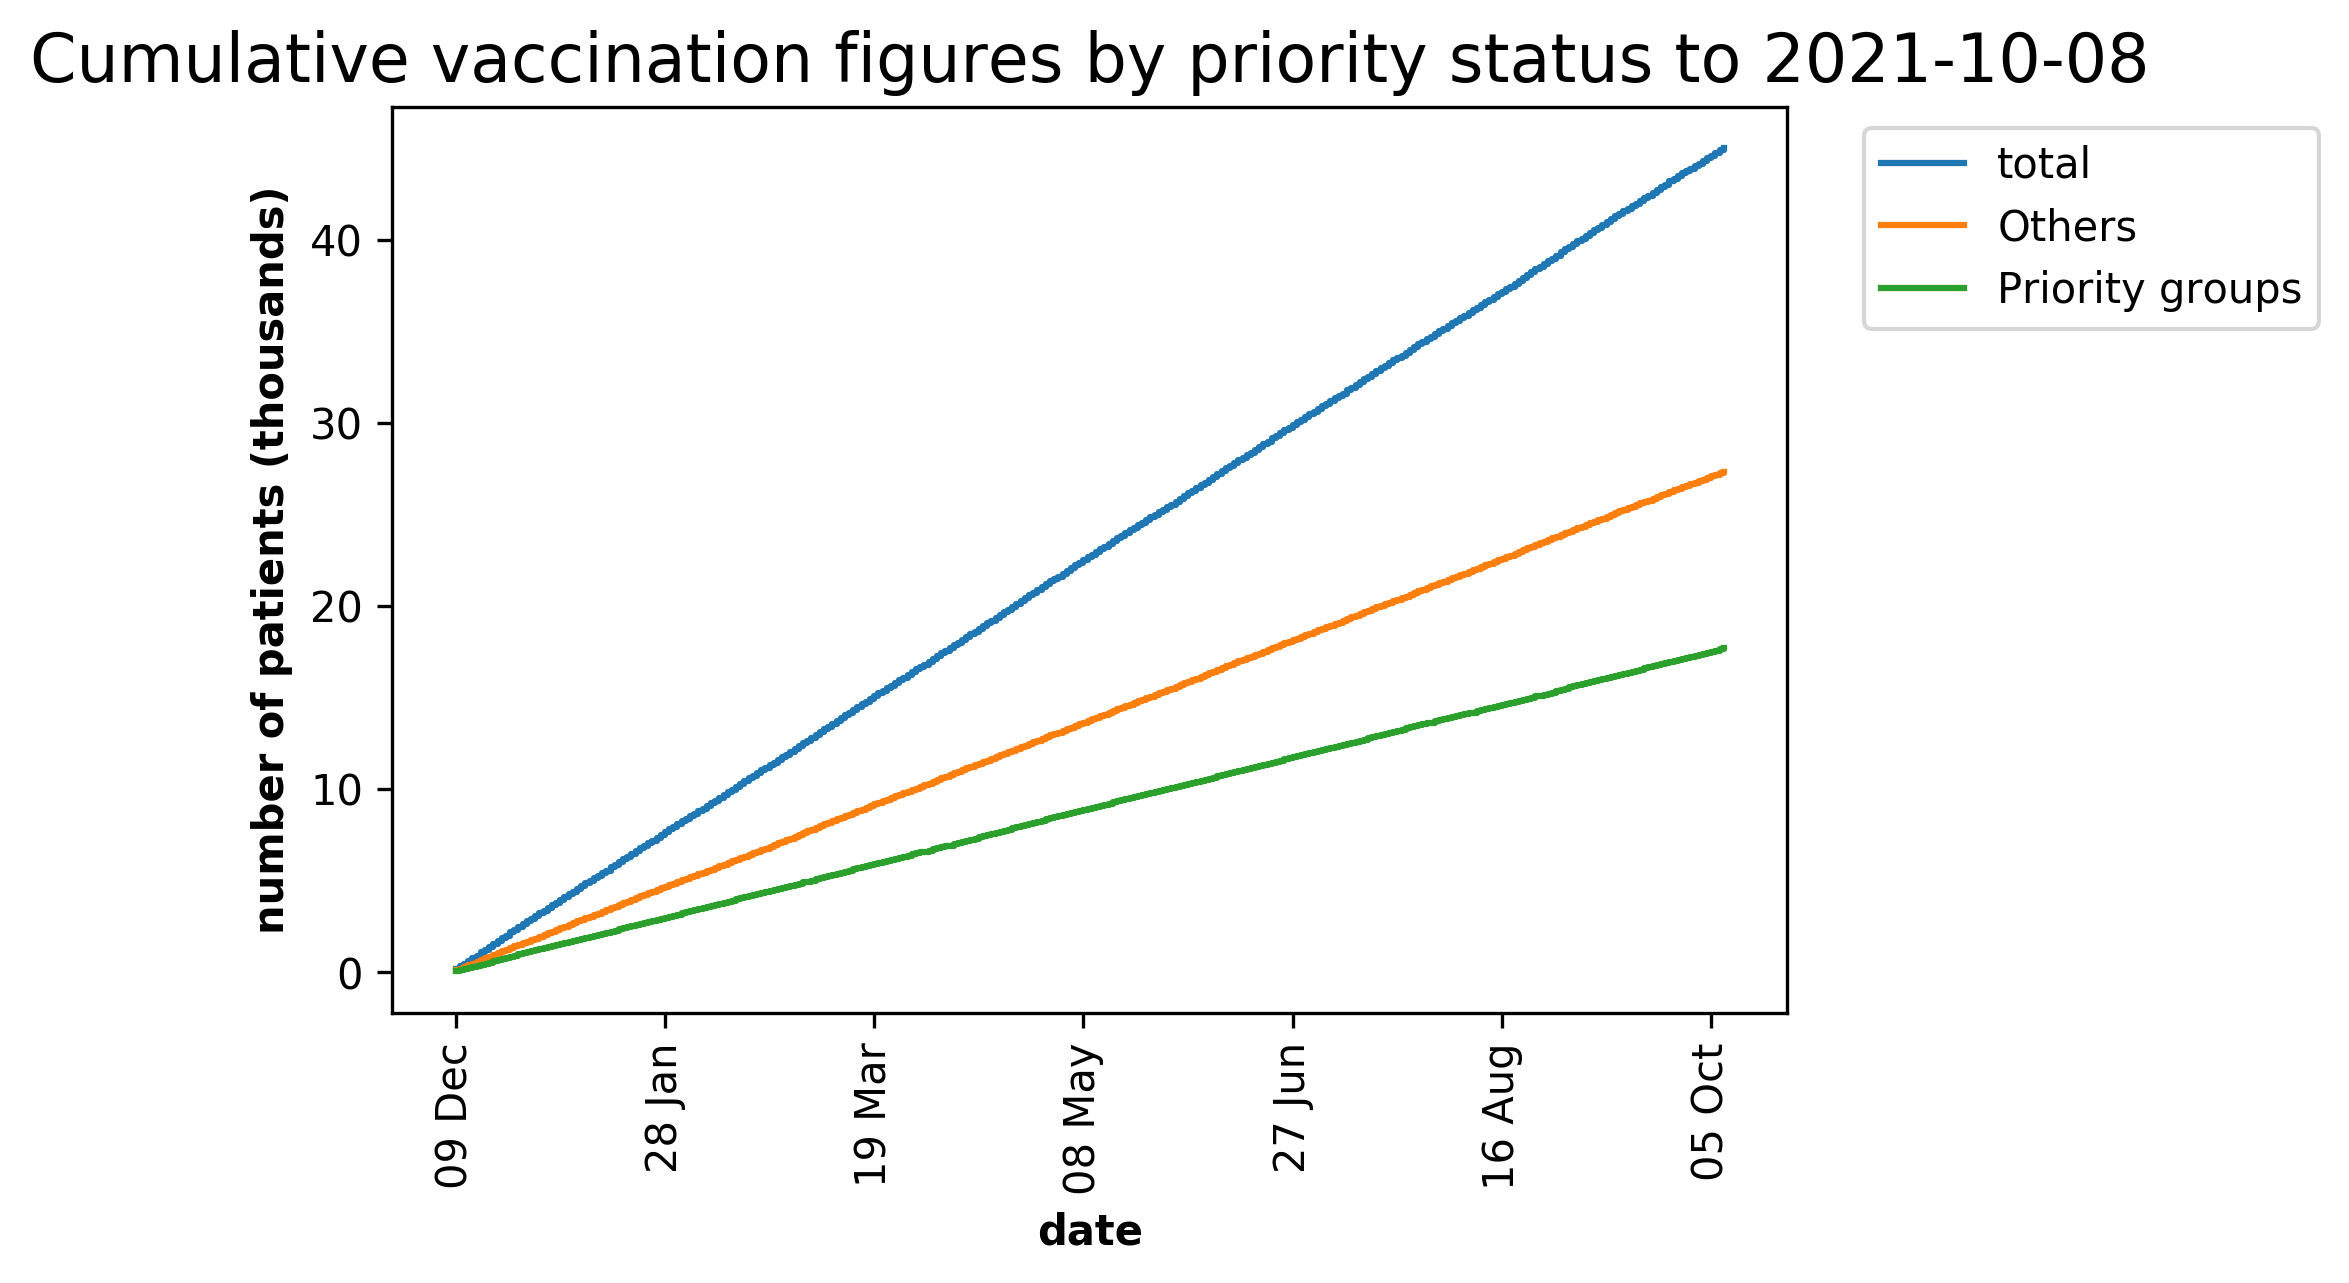

**Note:** 'Priority groups' only includes those identified as being in a priority group by our methodology.                 'Others' includes everyone aged 18-49 except those who are shielding or have a learning disability.<br><br>

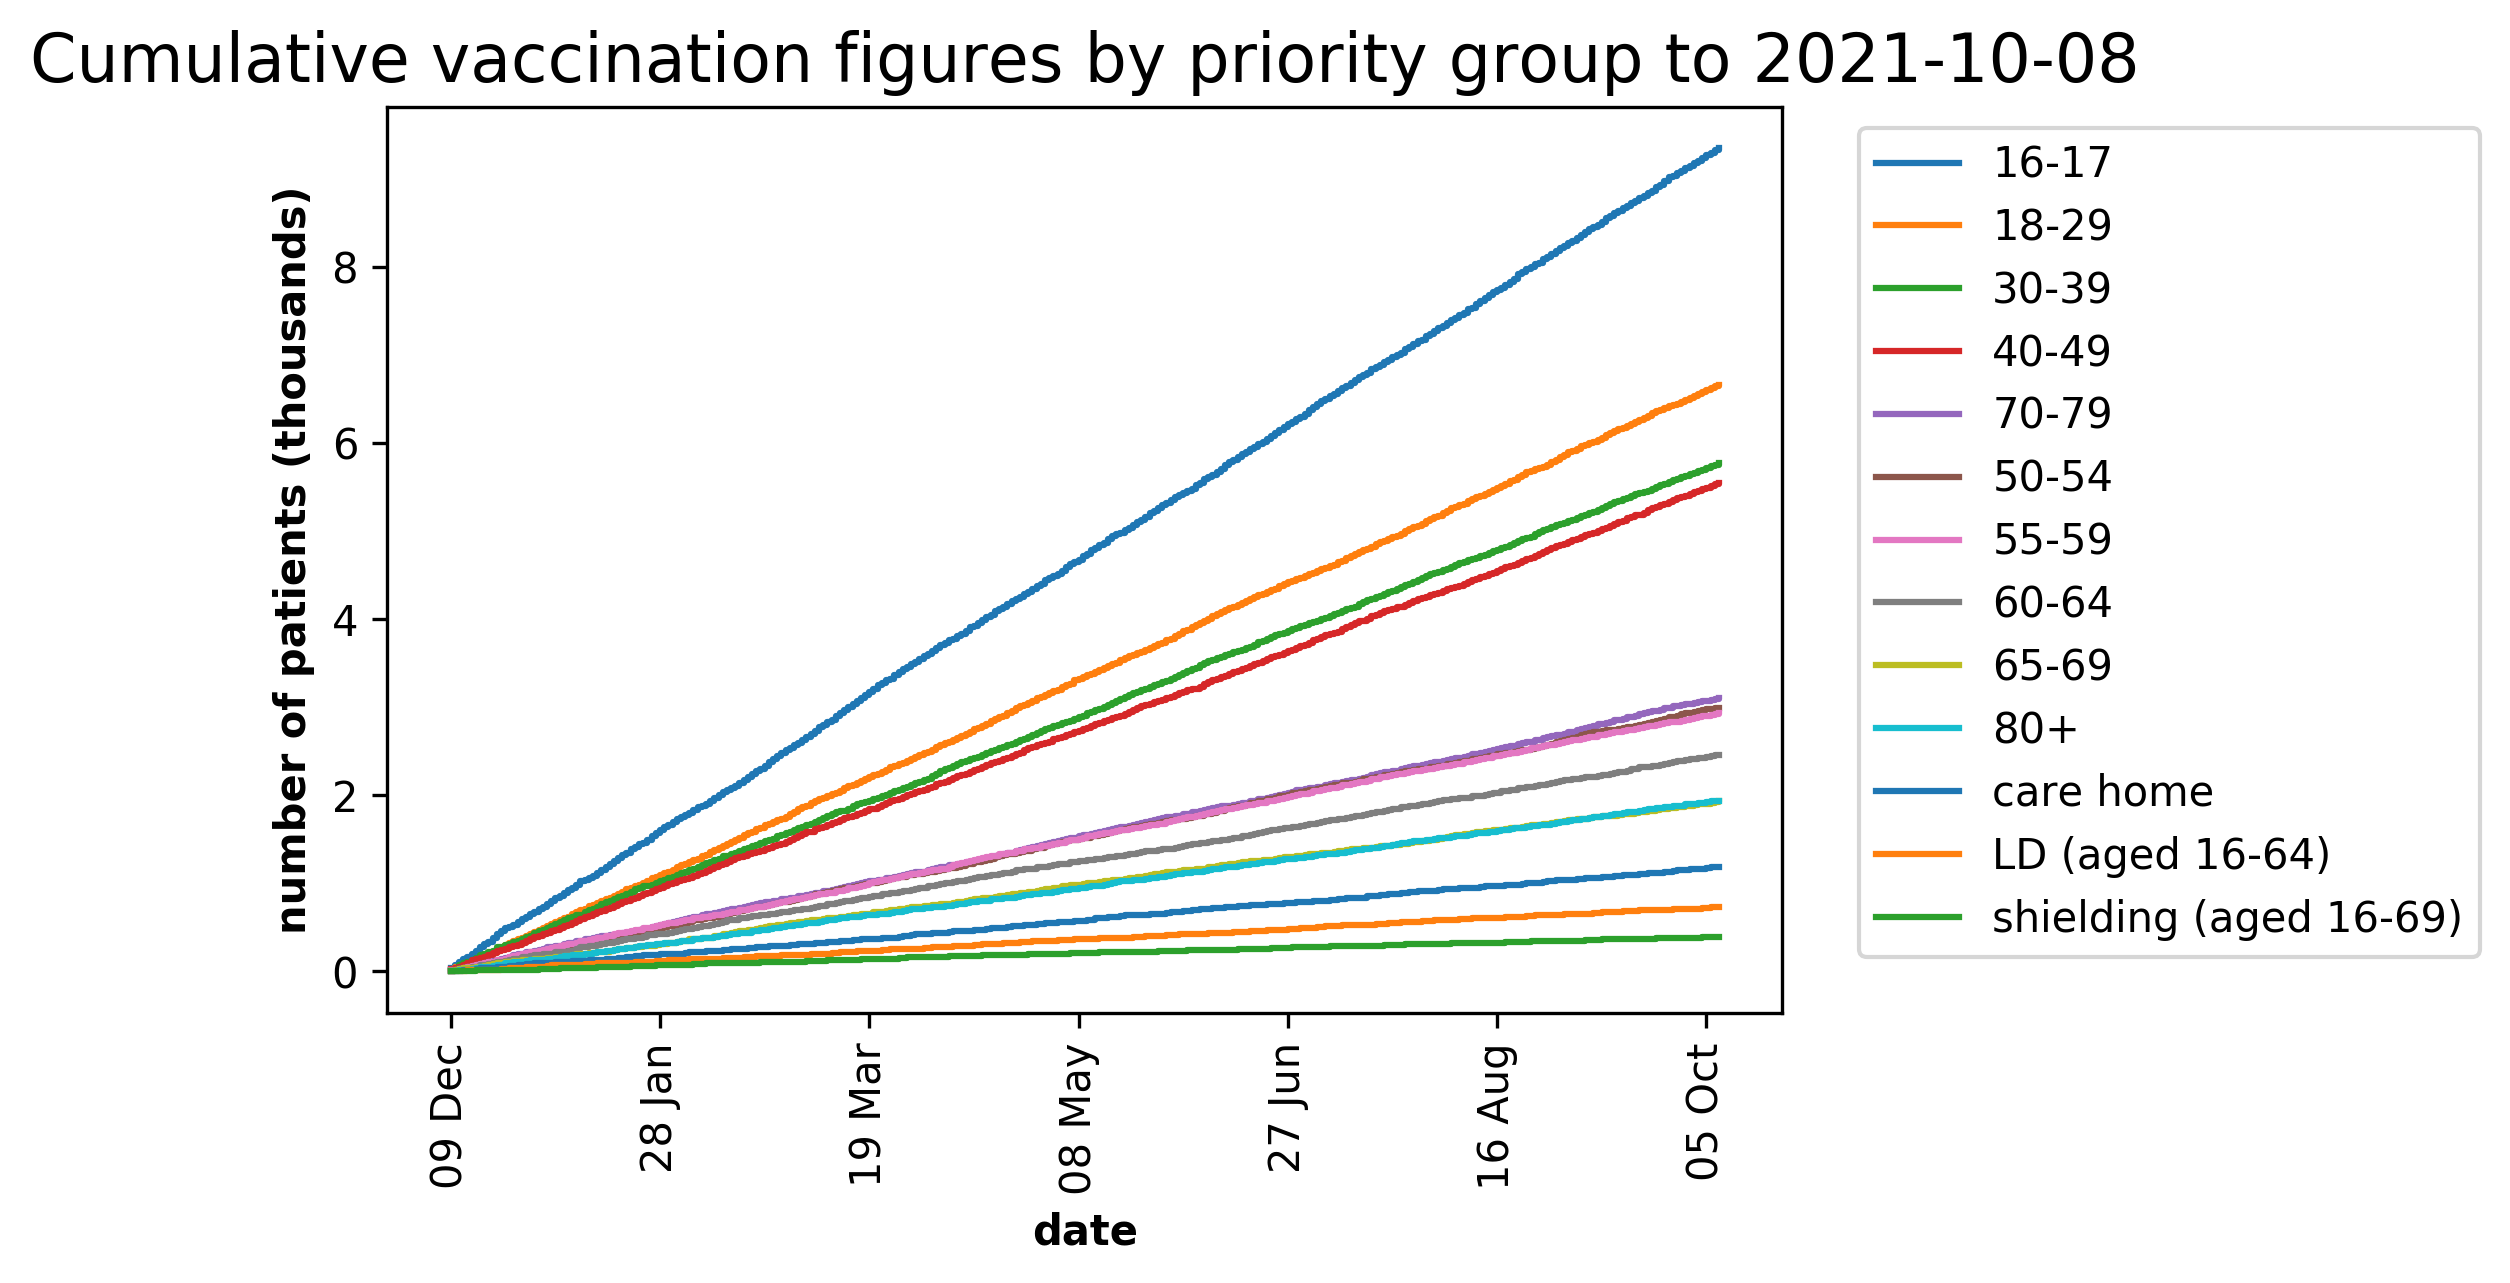

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *
from image_formats import pick_image_format

IMAGE_FORMAT = pick_image_format()

show_chart(f"Cumulative vaccination figures by priority status.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")
display(Markdown("**Note:** 'Priority groups' only includes those identified as being in a priority group by our methodology. \
                'Others' includes everyone aged 18-49 except those who are shielding or have a learning disability.<br><br>"))
show_chart(f"Cumulative vaccination figures by priority group.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")


# 
## Trends in vaccination rates of **80+** population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*_Latest overall cohort rate_ calculated as at latest date for vaccinations recorded across all TPP practices.**

## 80+ population

### COVID vaccinations among 80+ population
 ### by Sex

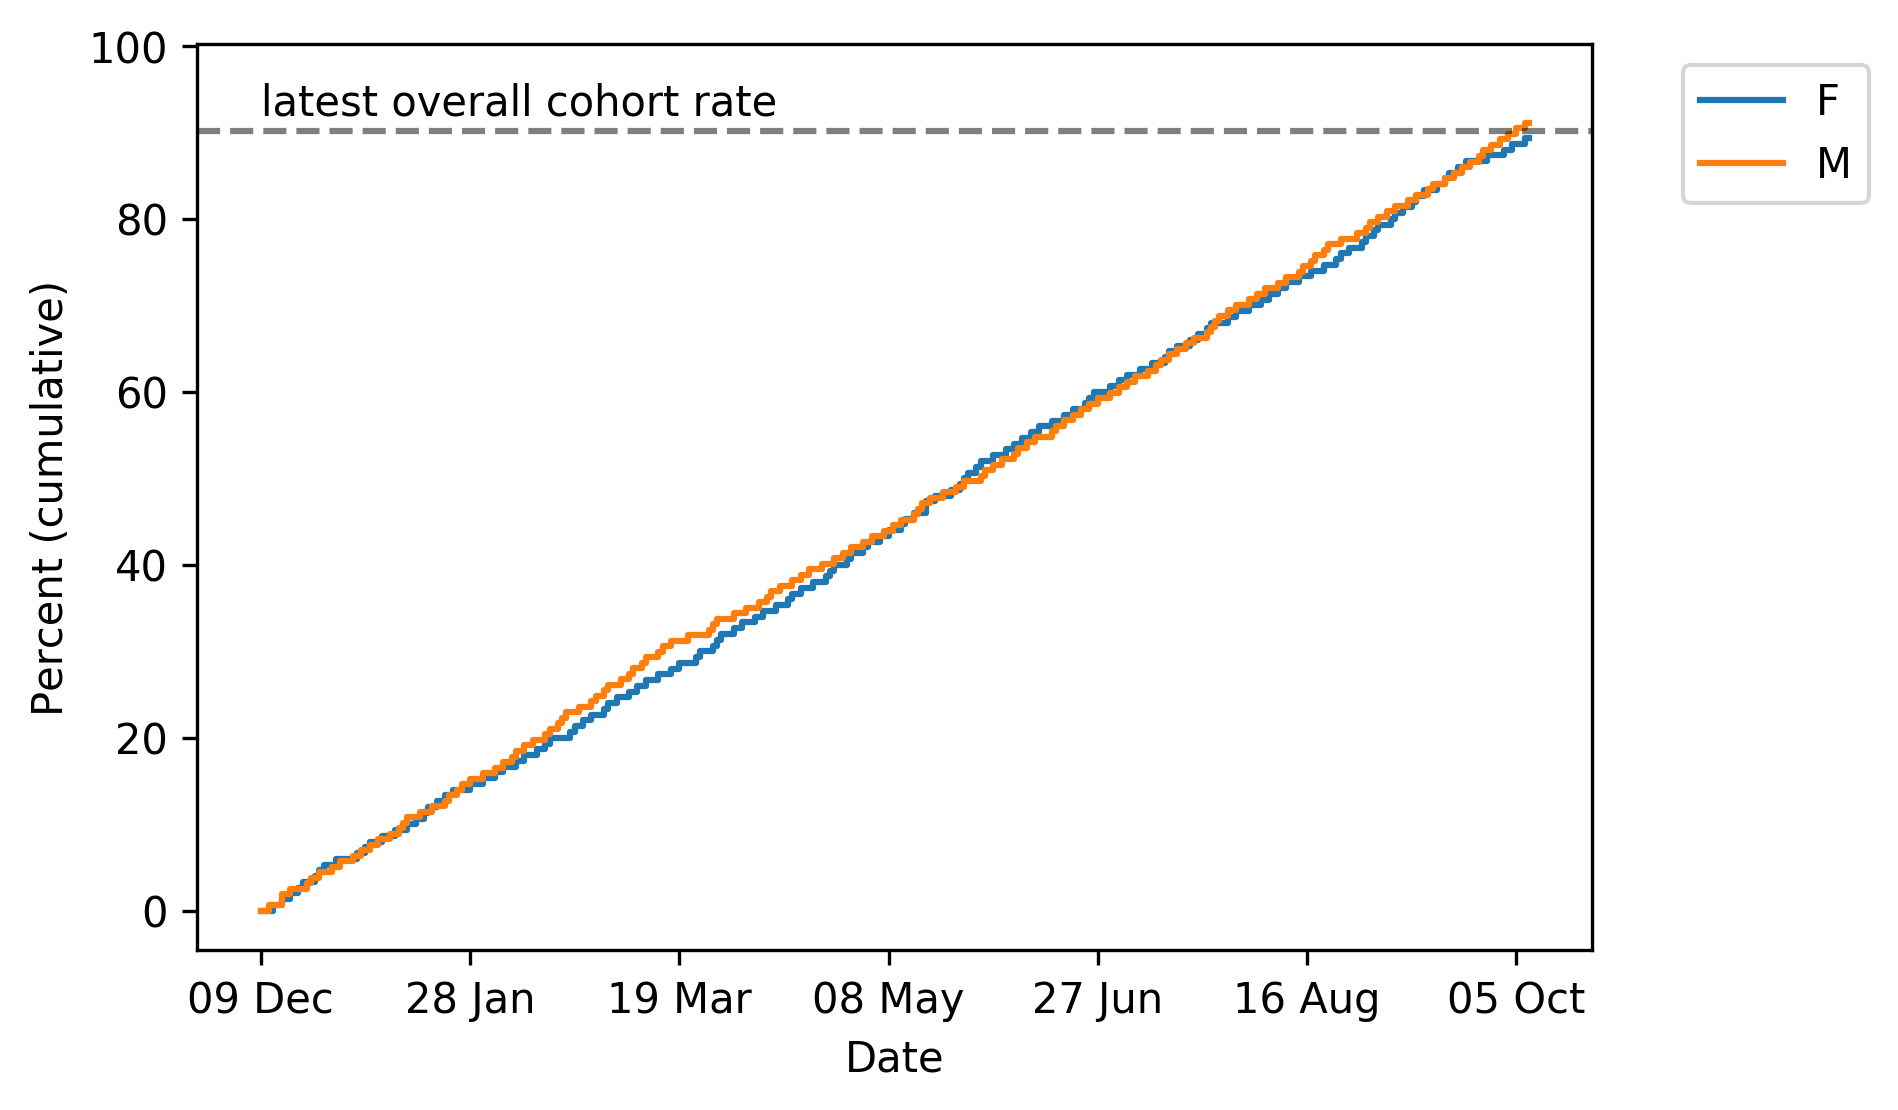

### COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

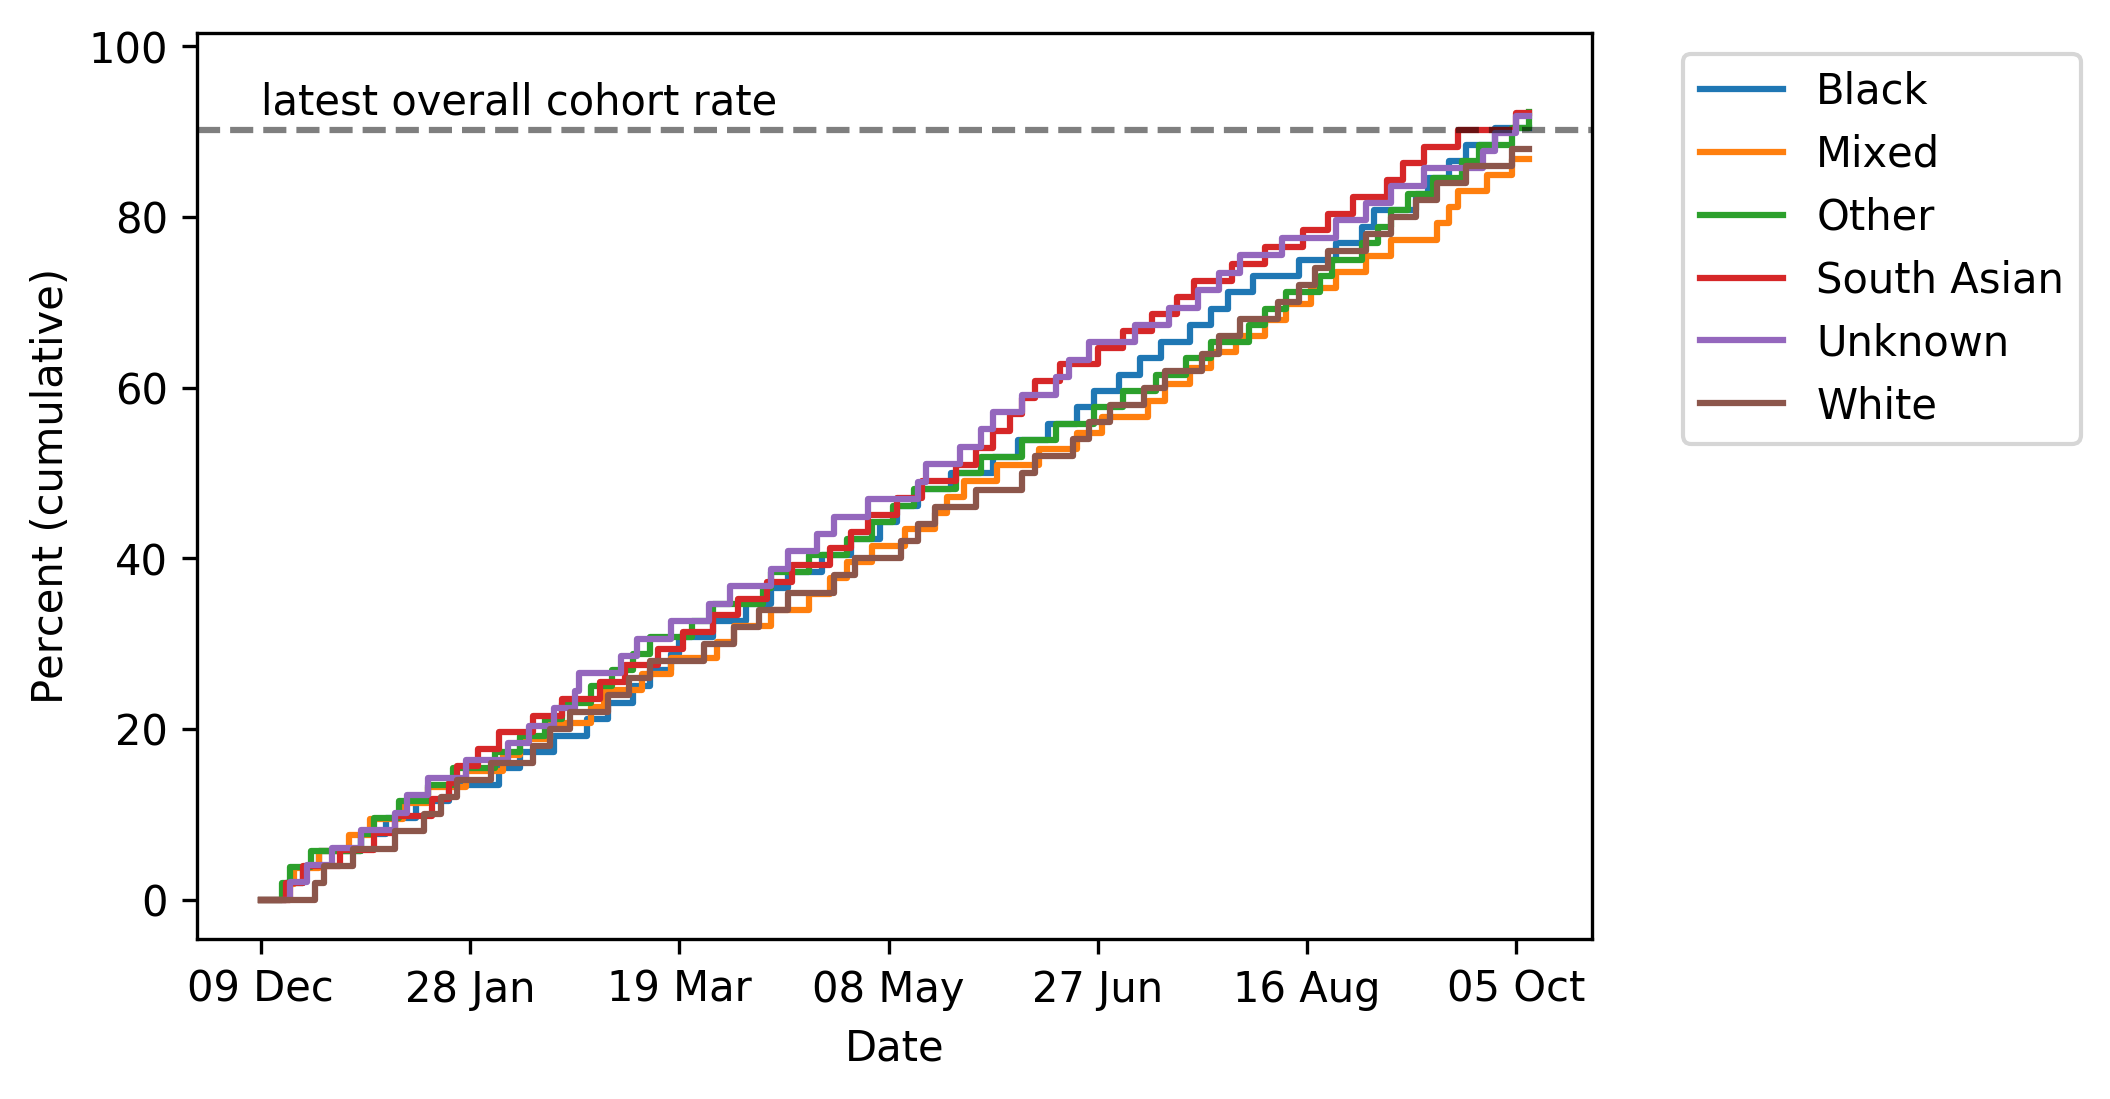

### COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

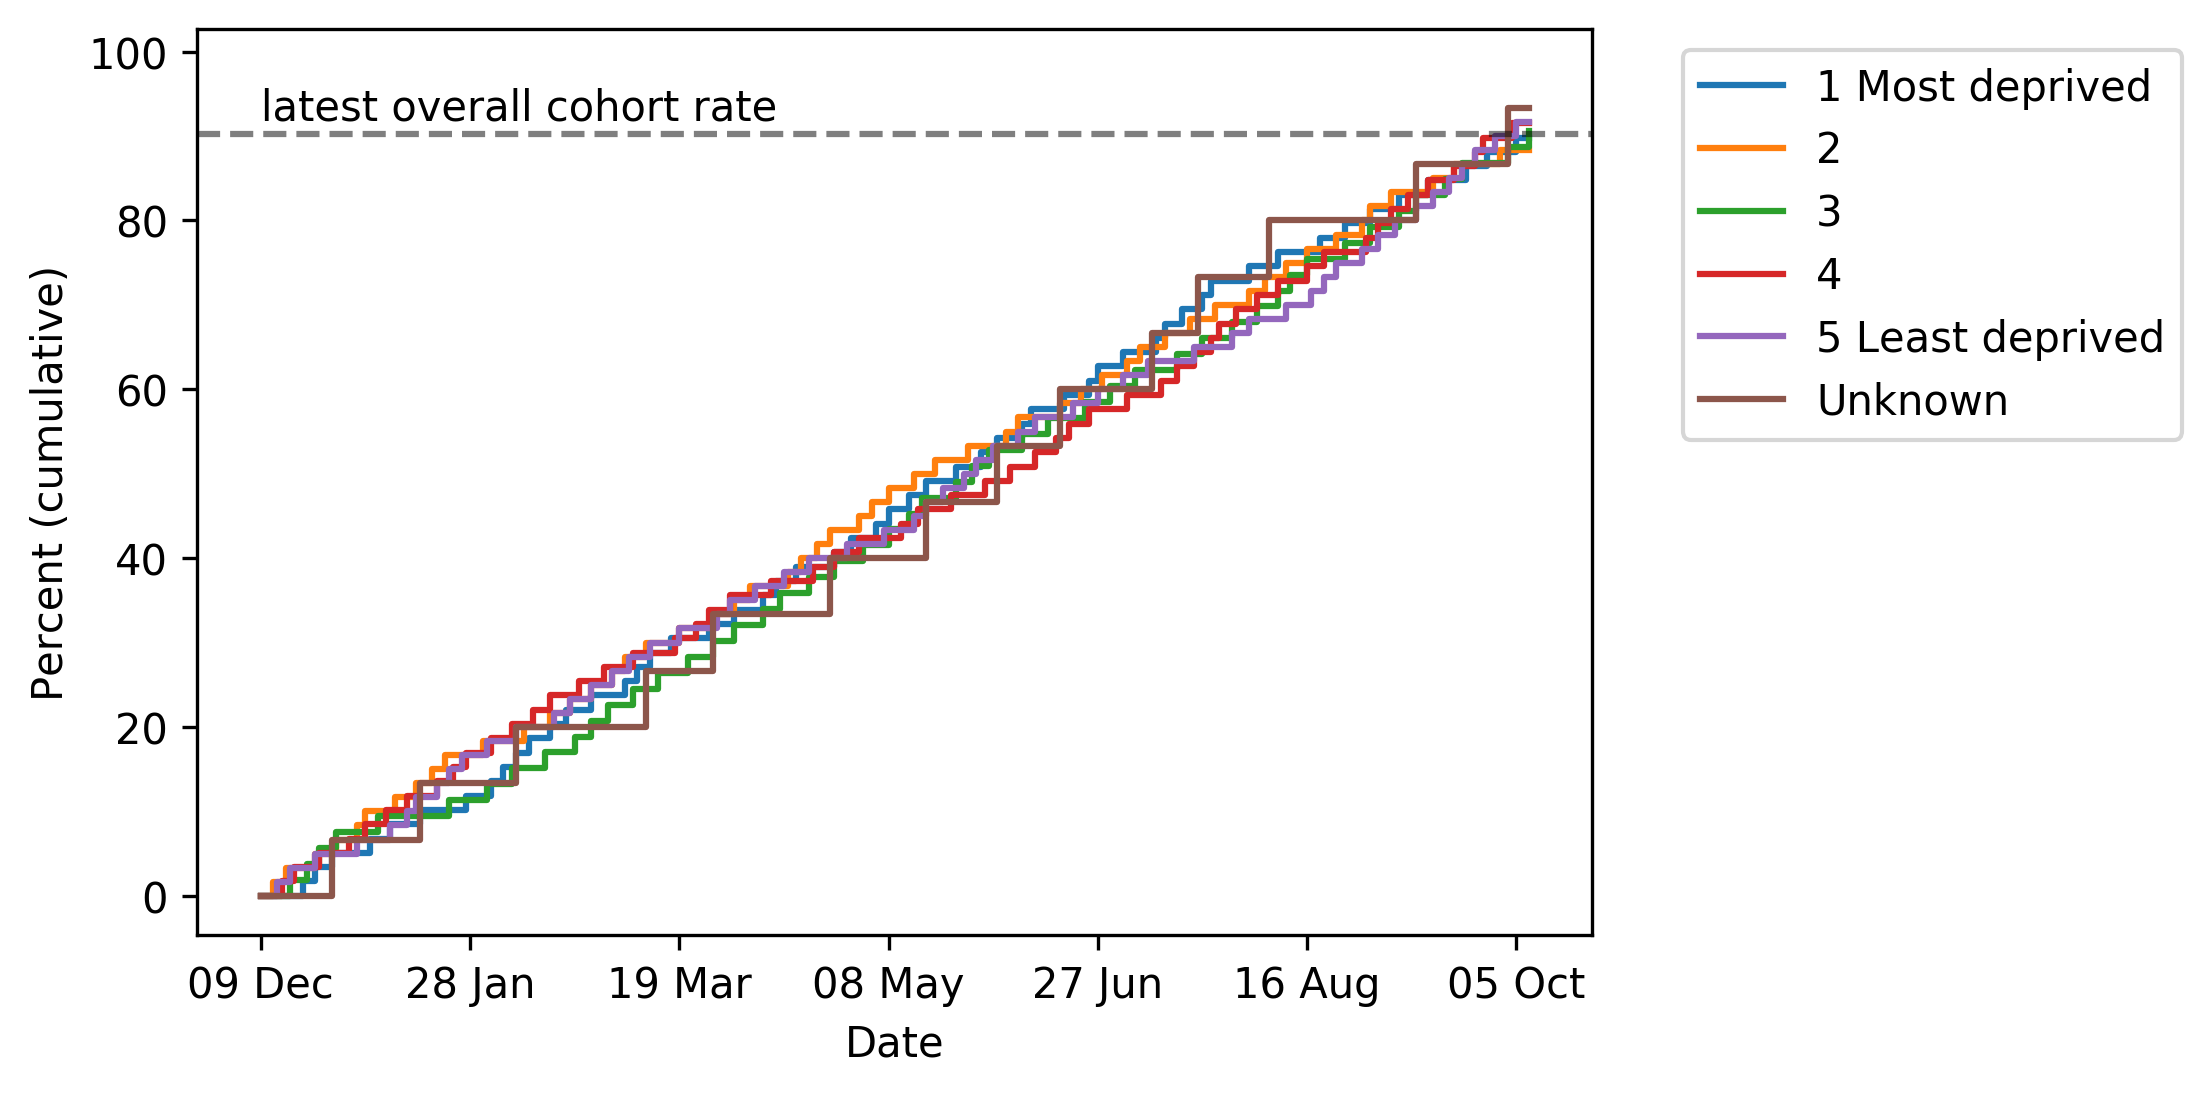

### COVID vaccinations among 80+ population
 ### by BMI

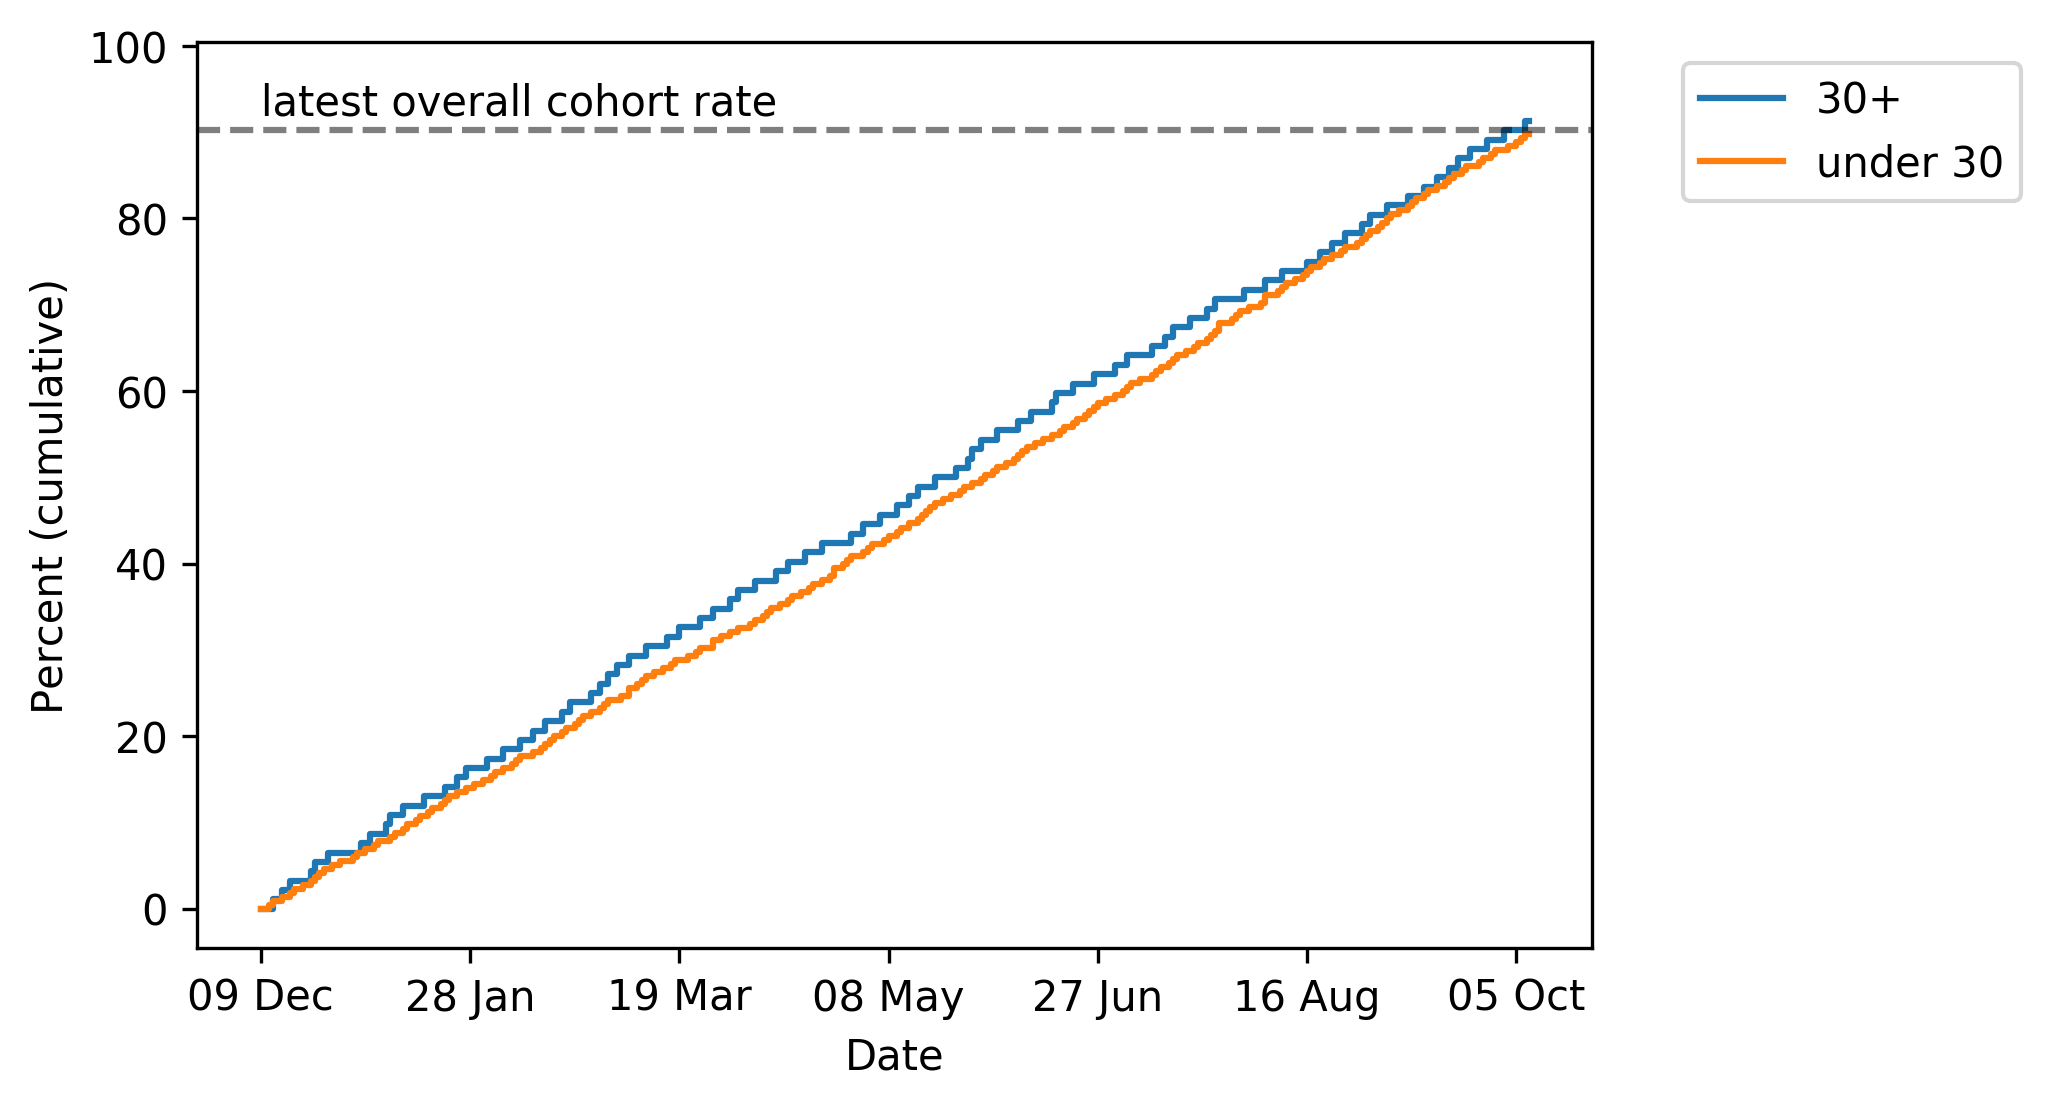

### COVID vaccinations among 80+ population
 ### by Housebound

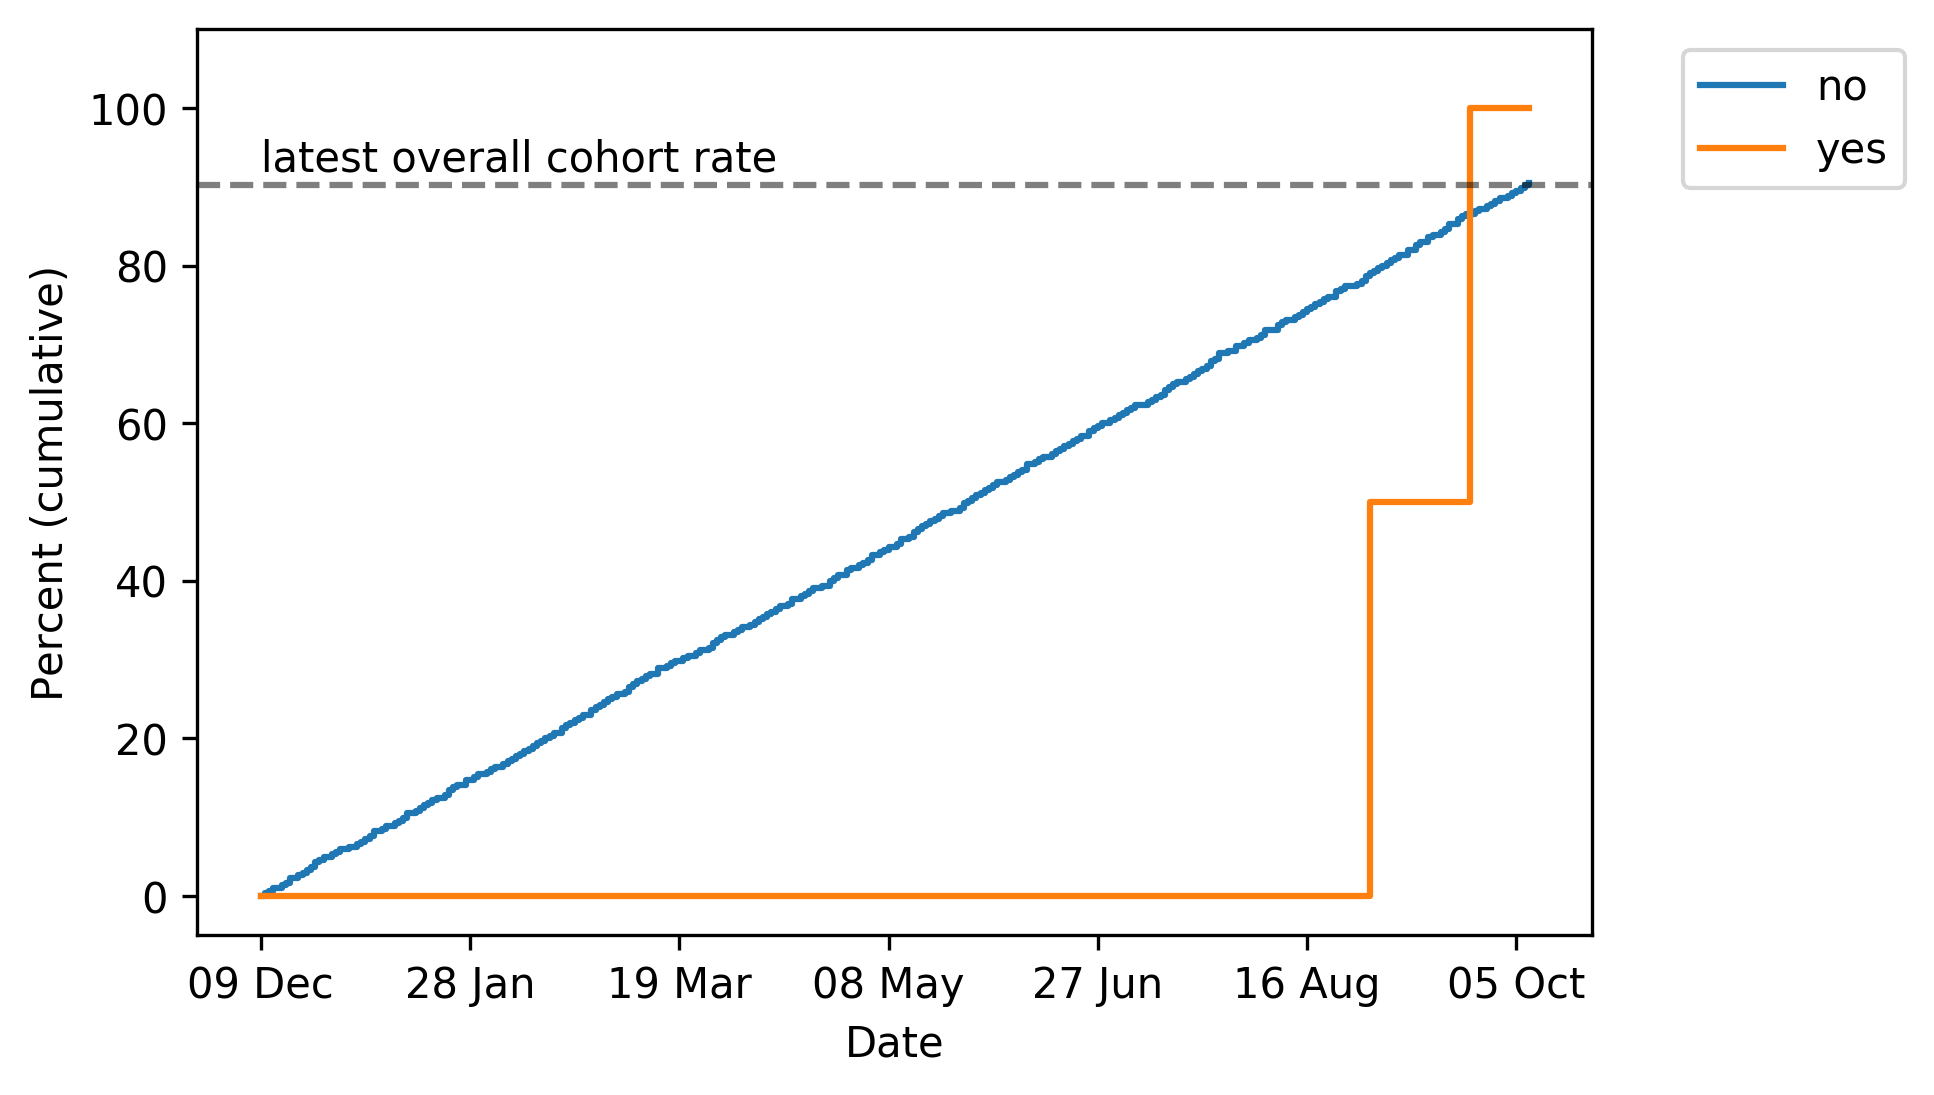

### COVID vaccinations among 80+ population
 ### by Dialysis

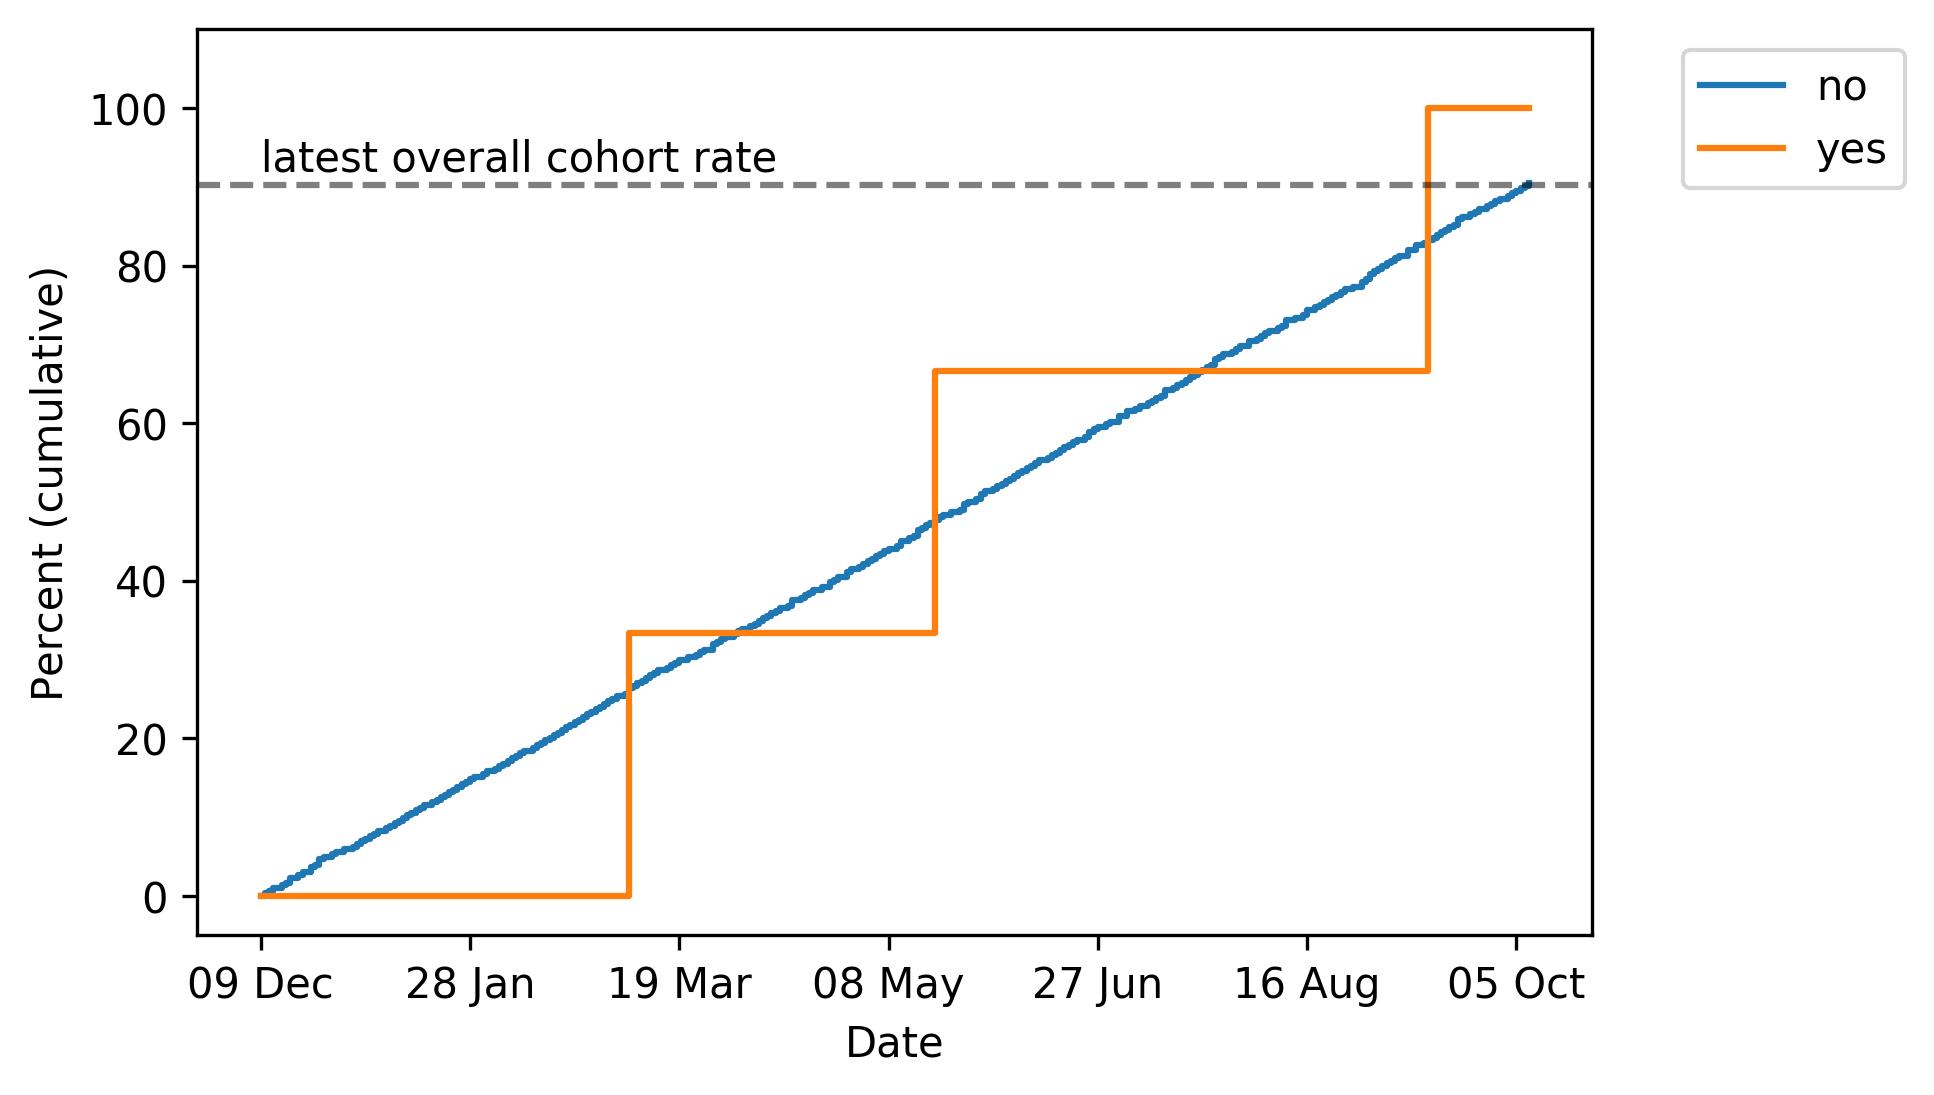

### COVID vaccinations among 80+ population
 ### by Dementia

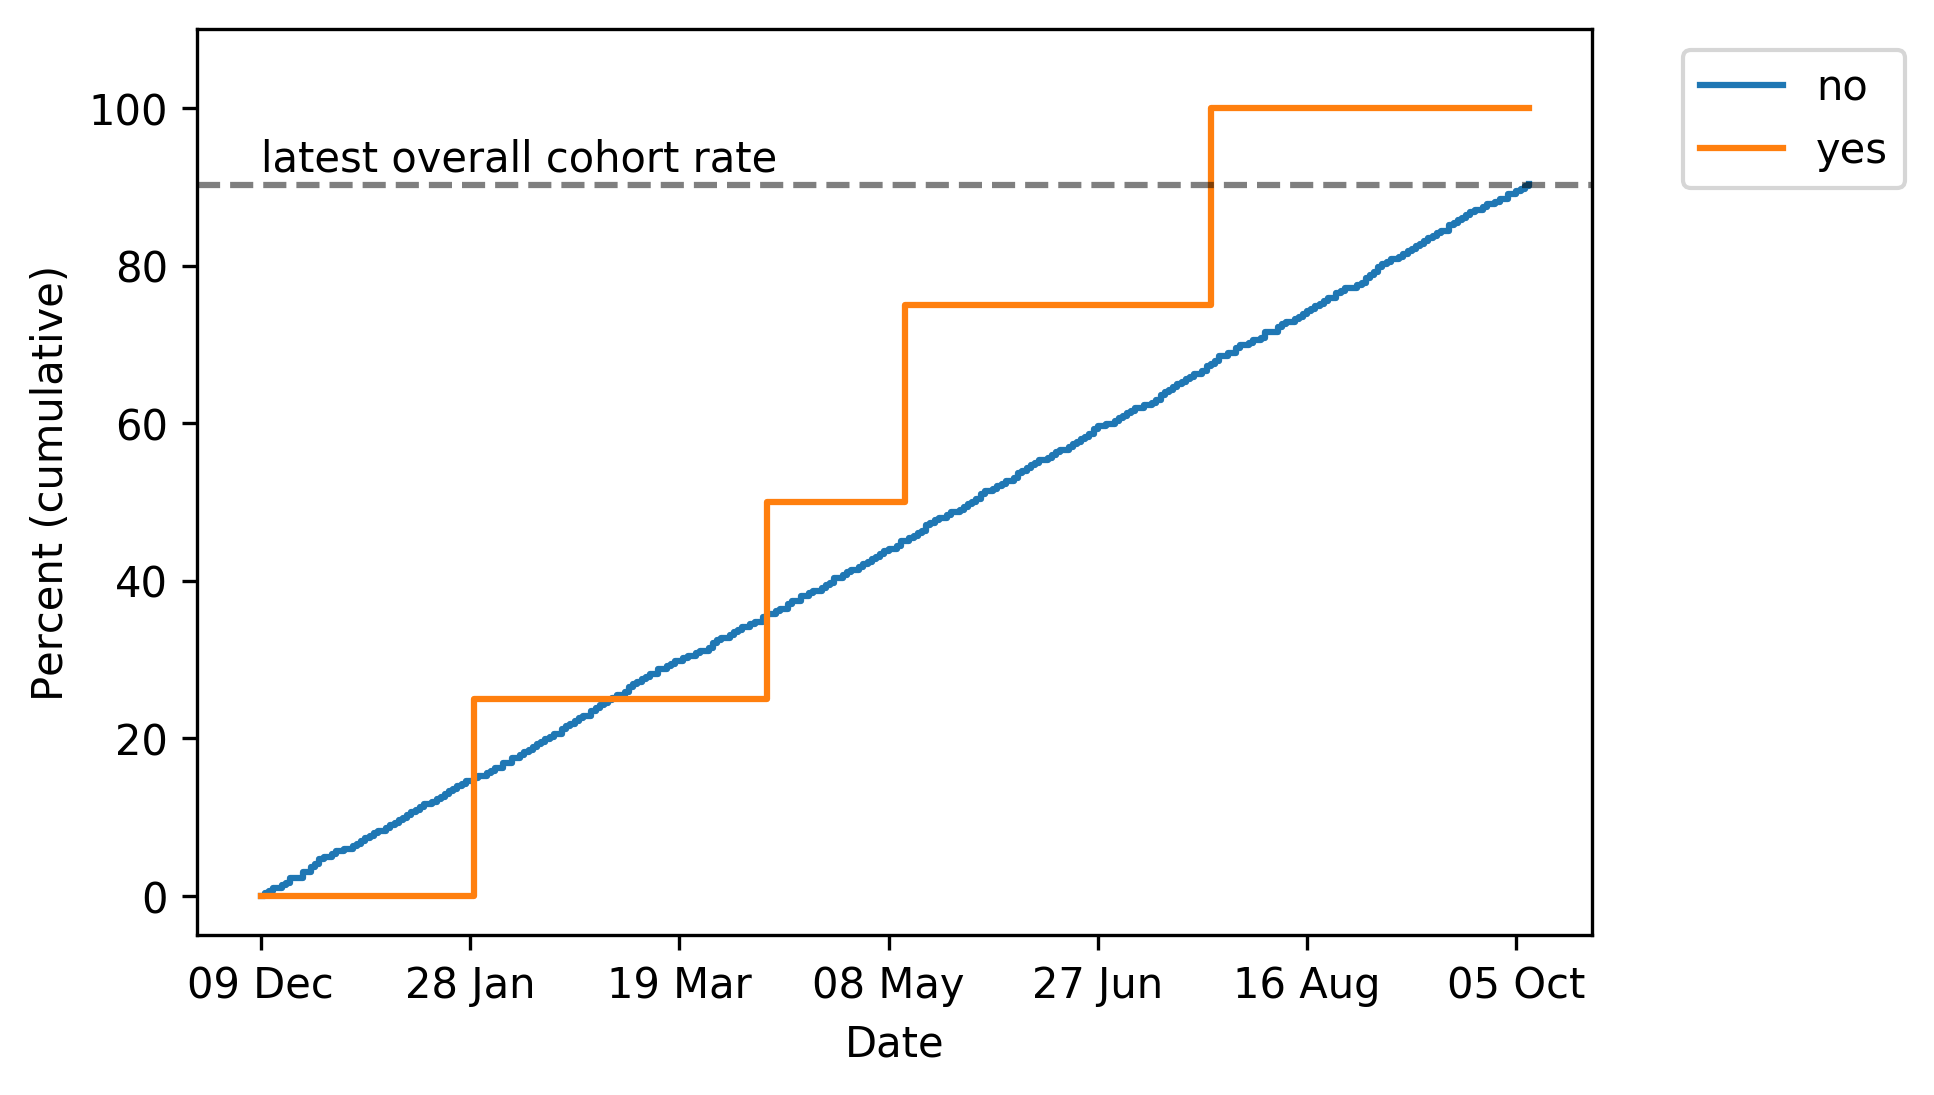

### COVID vaccinations among 80+ population
 ### by Learning disability

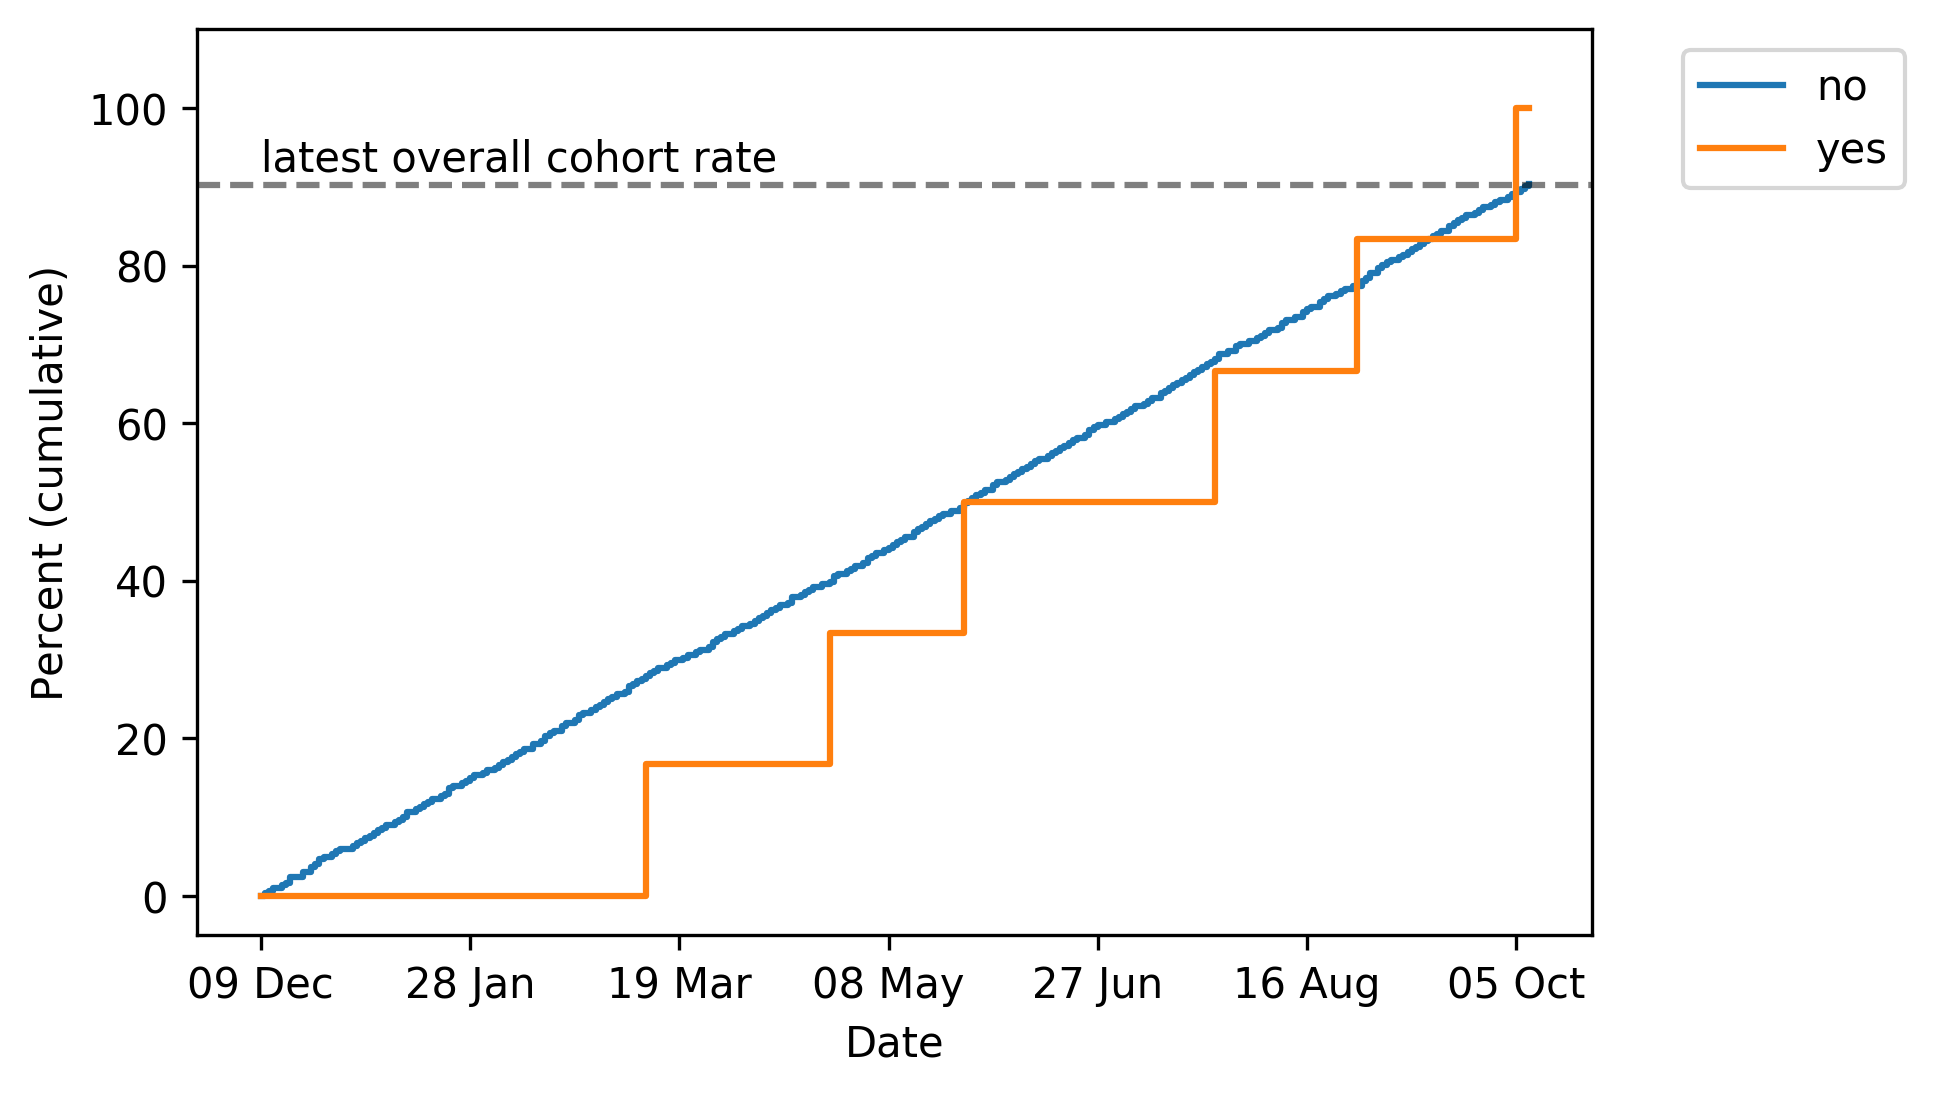

### COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

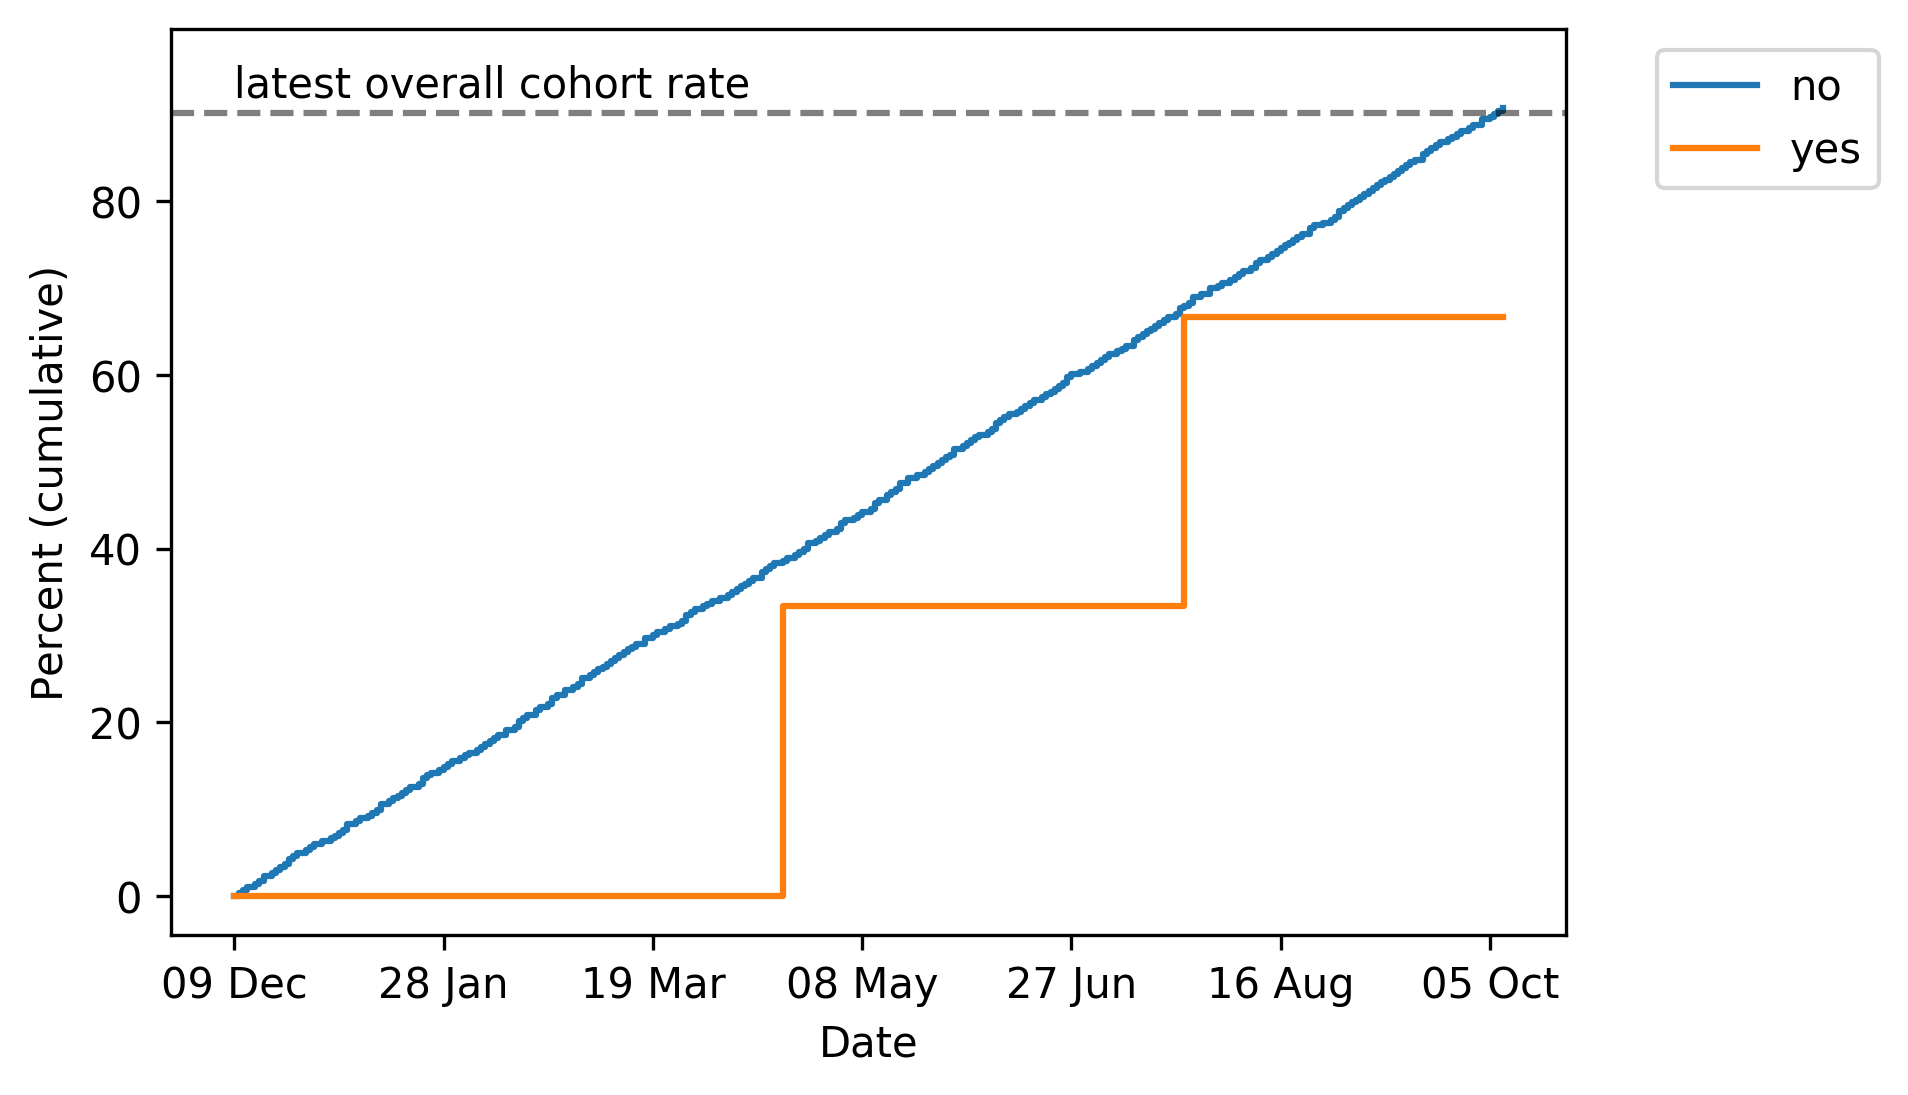

### COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

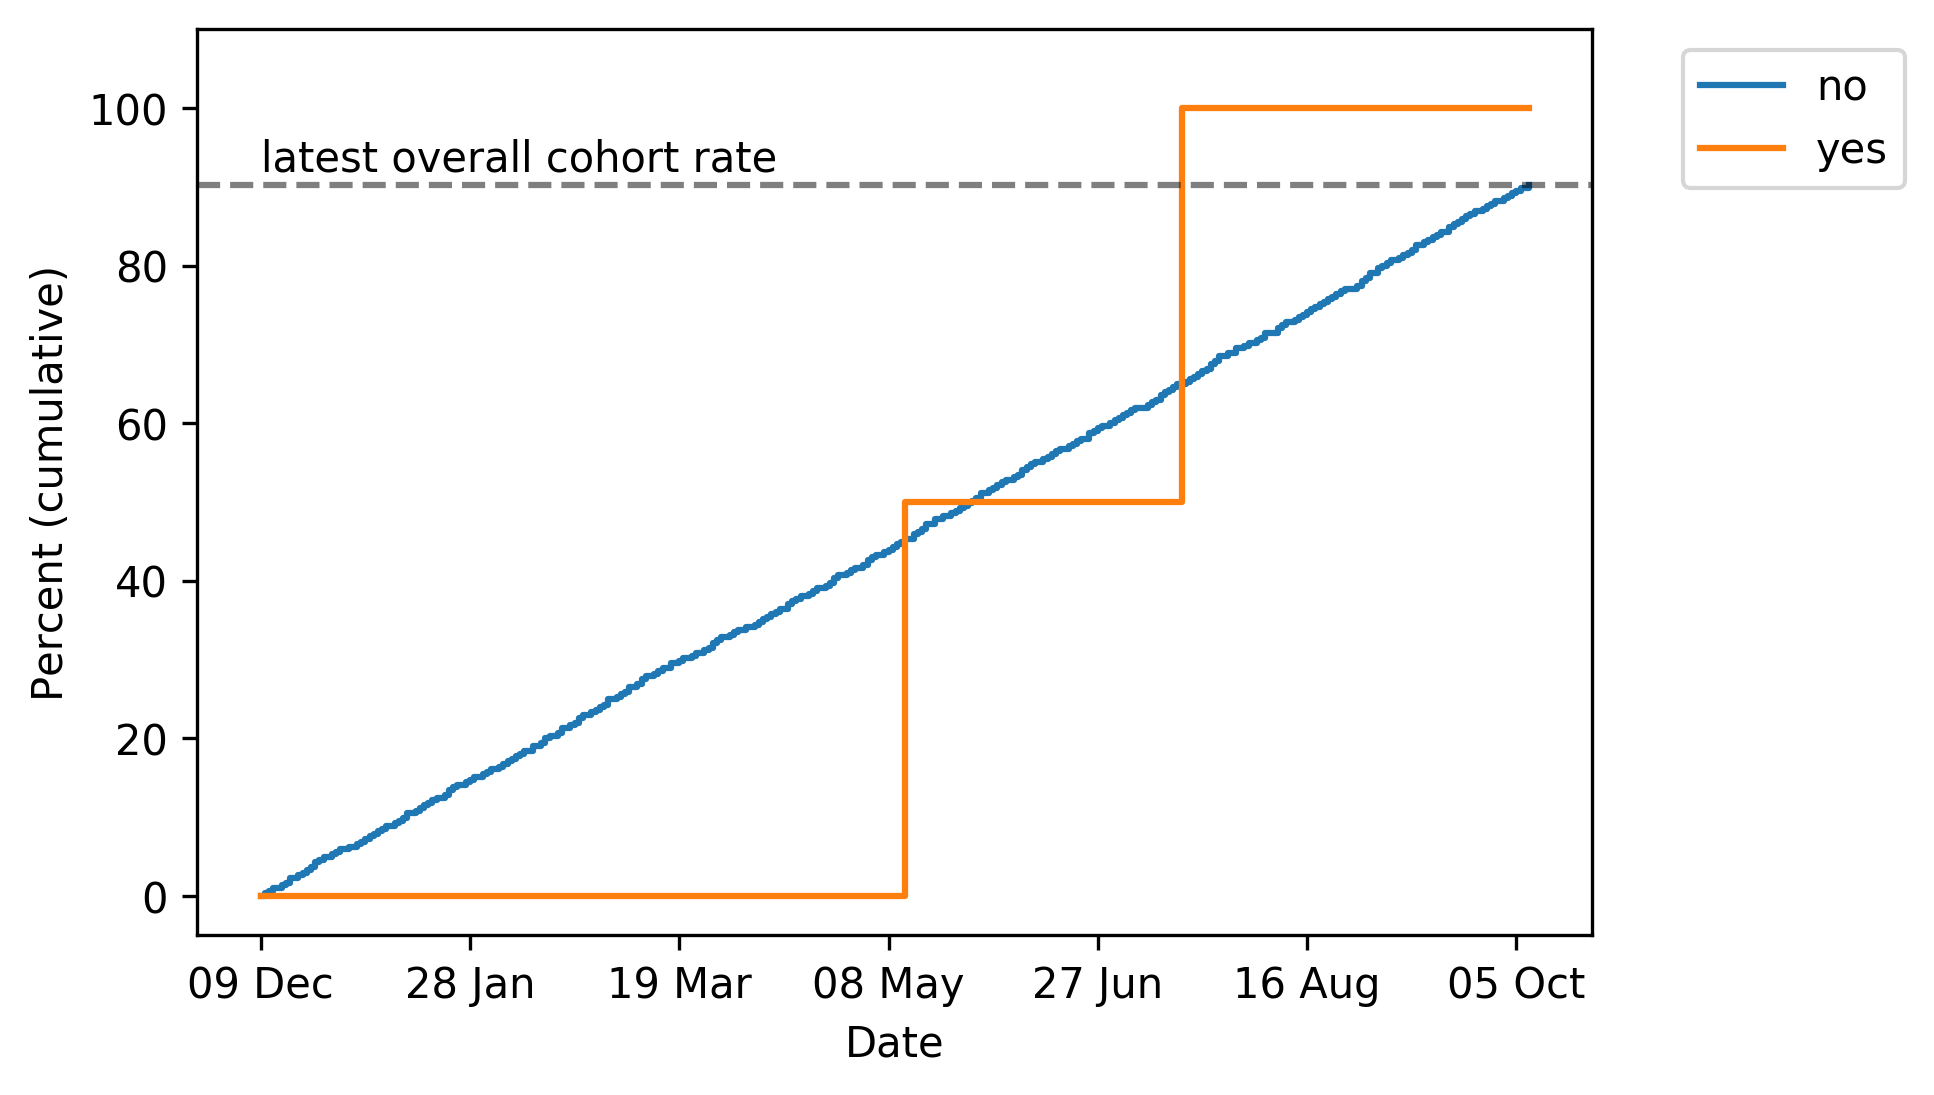

### COVID vaccinations among 80+ population
 ### by Age band

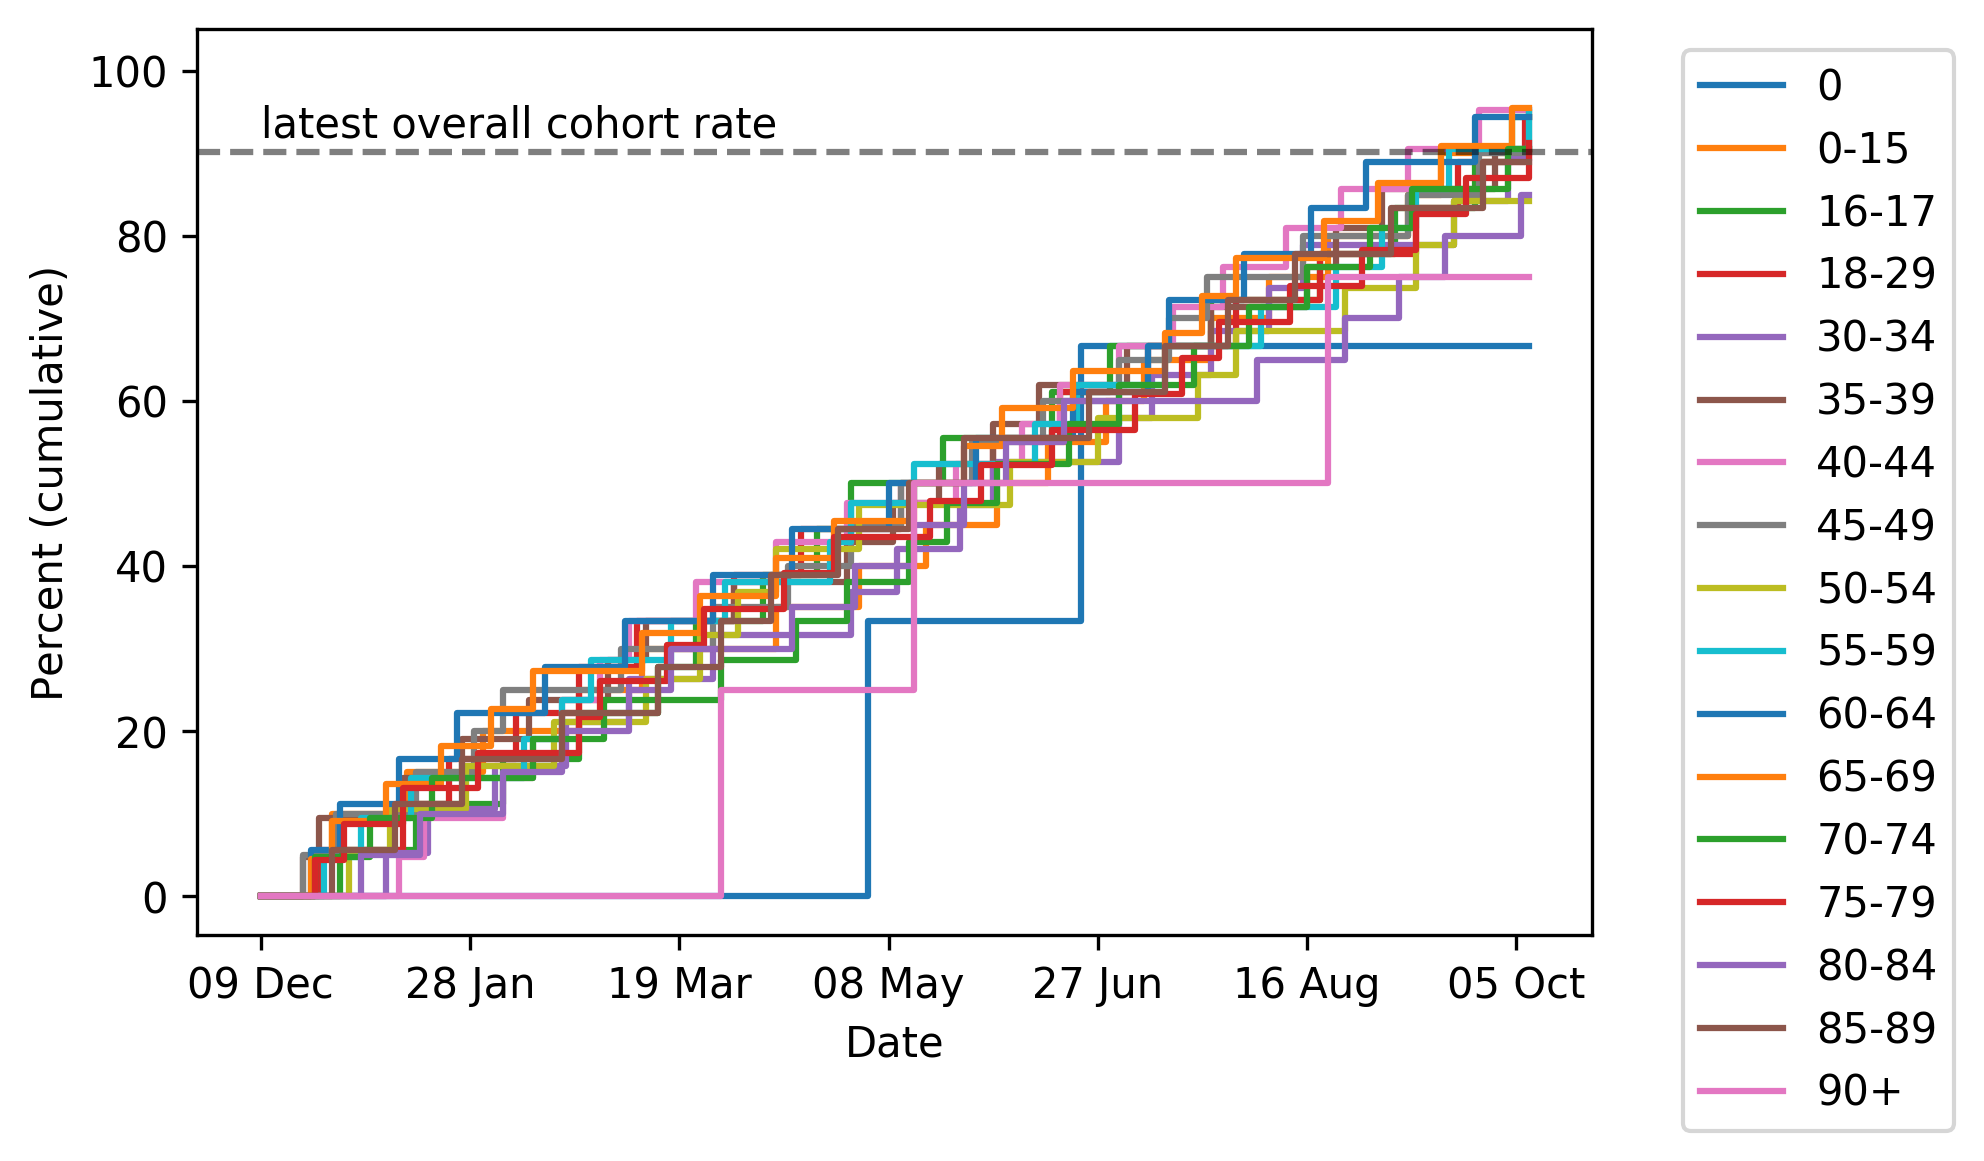

In [4]:
chartlist = find_and_sort_filenames(foldername="figures", file_extension=IMAGE_FORMAT.extension)
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item, IMAGE_FORMAT)

# 
## Trends in vaccination rates of **70-79** population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**
    

## 70-79 population

### COVID vaccinations among 70-79 population
 ### by Sex

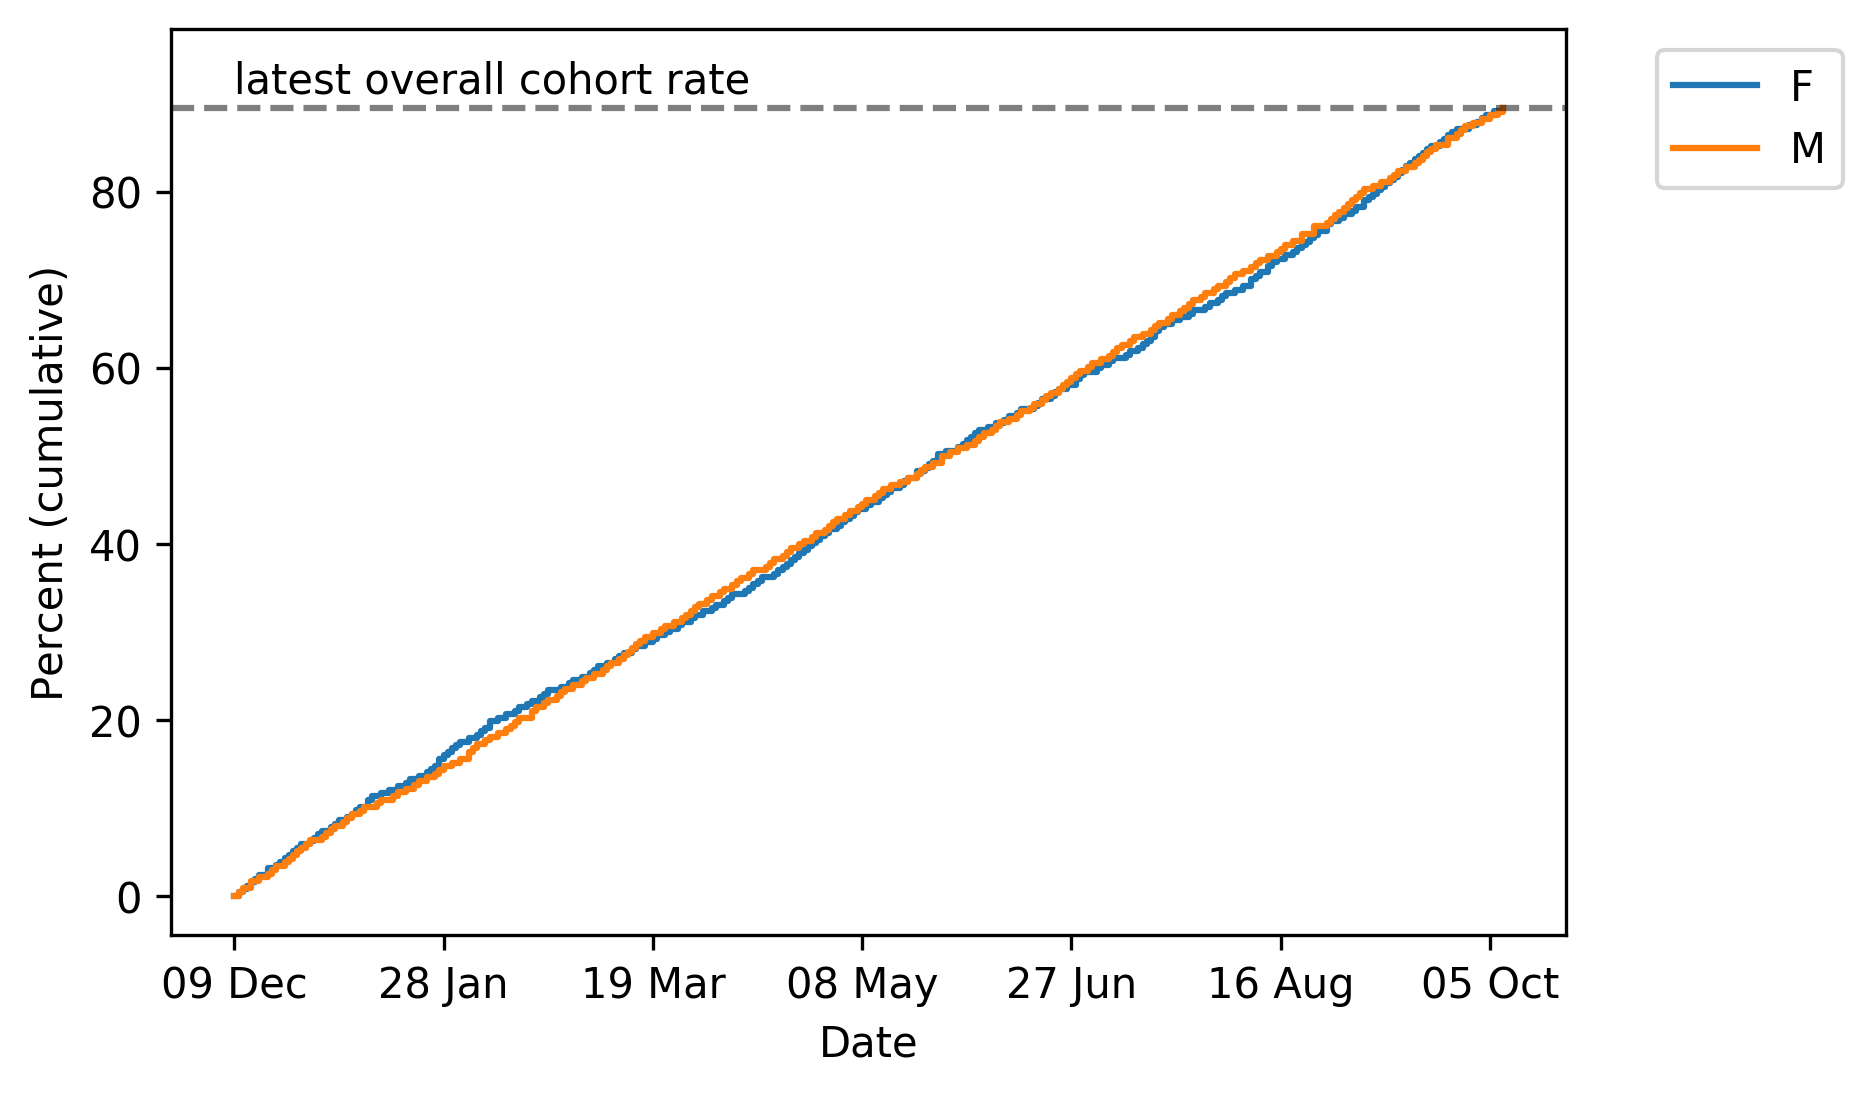

### COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

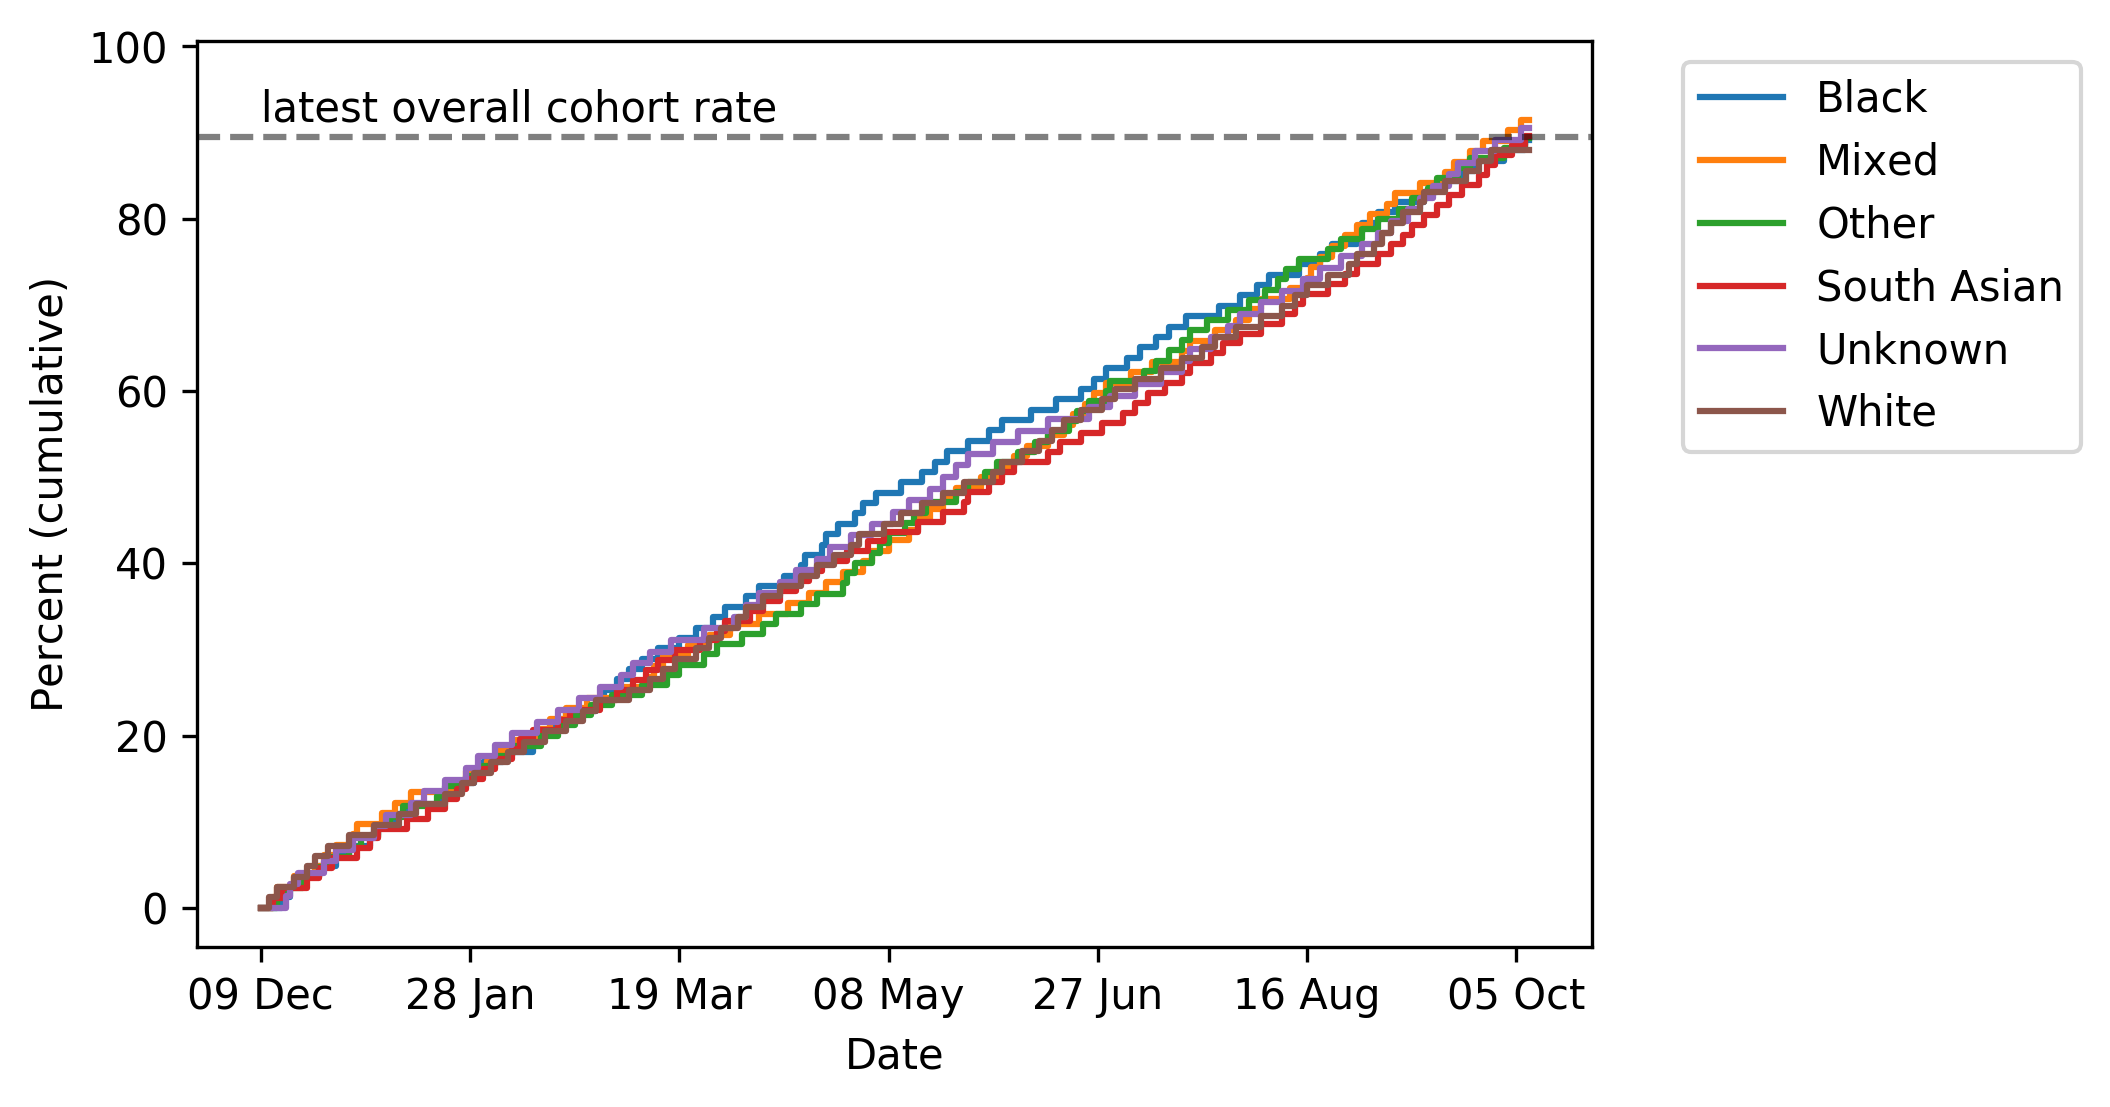

### COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

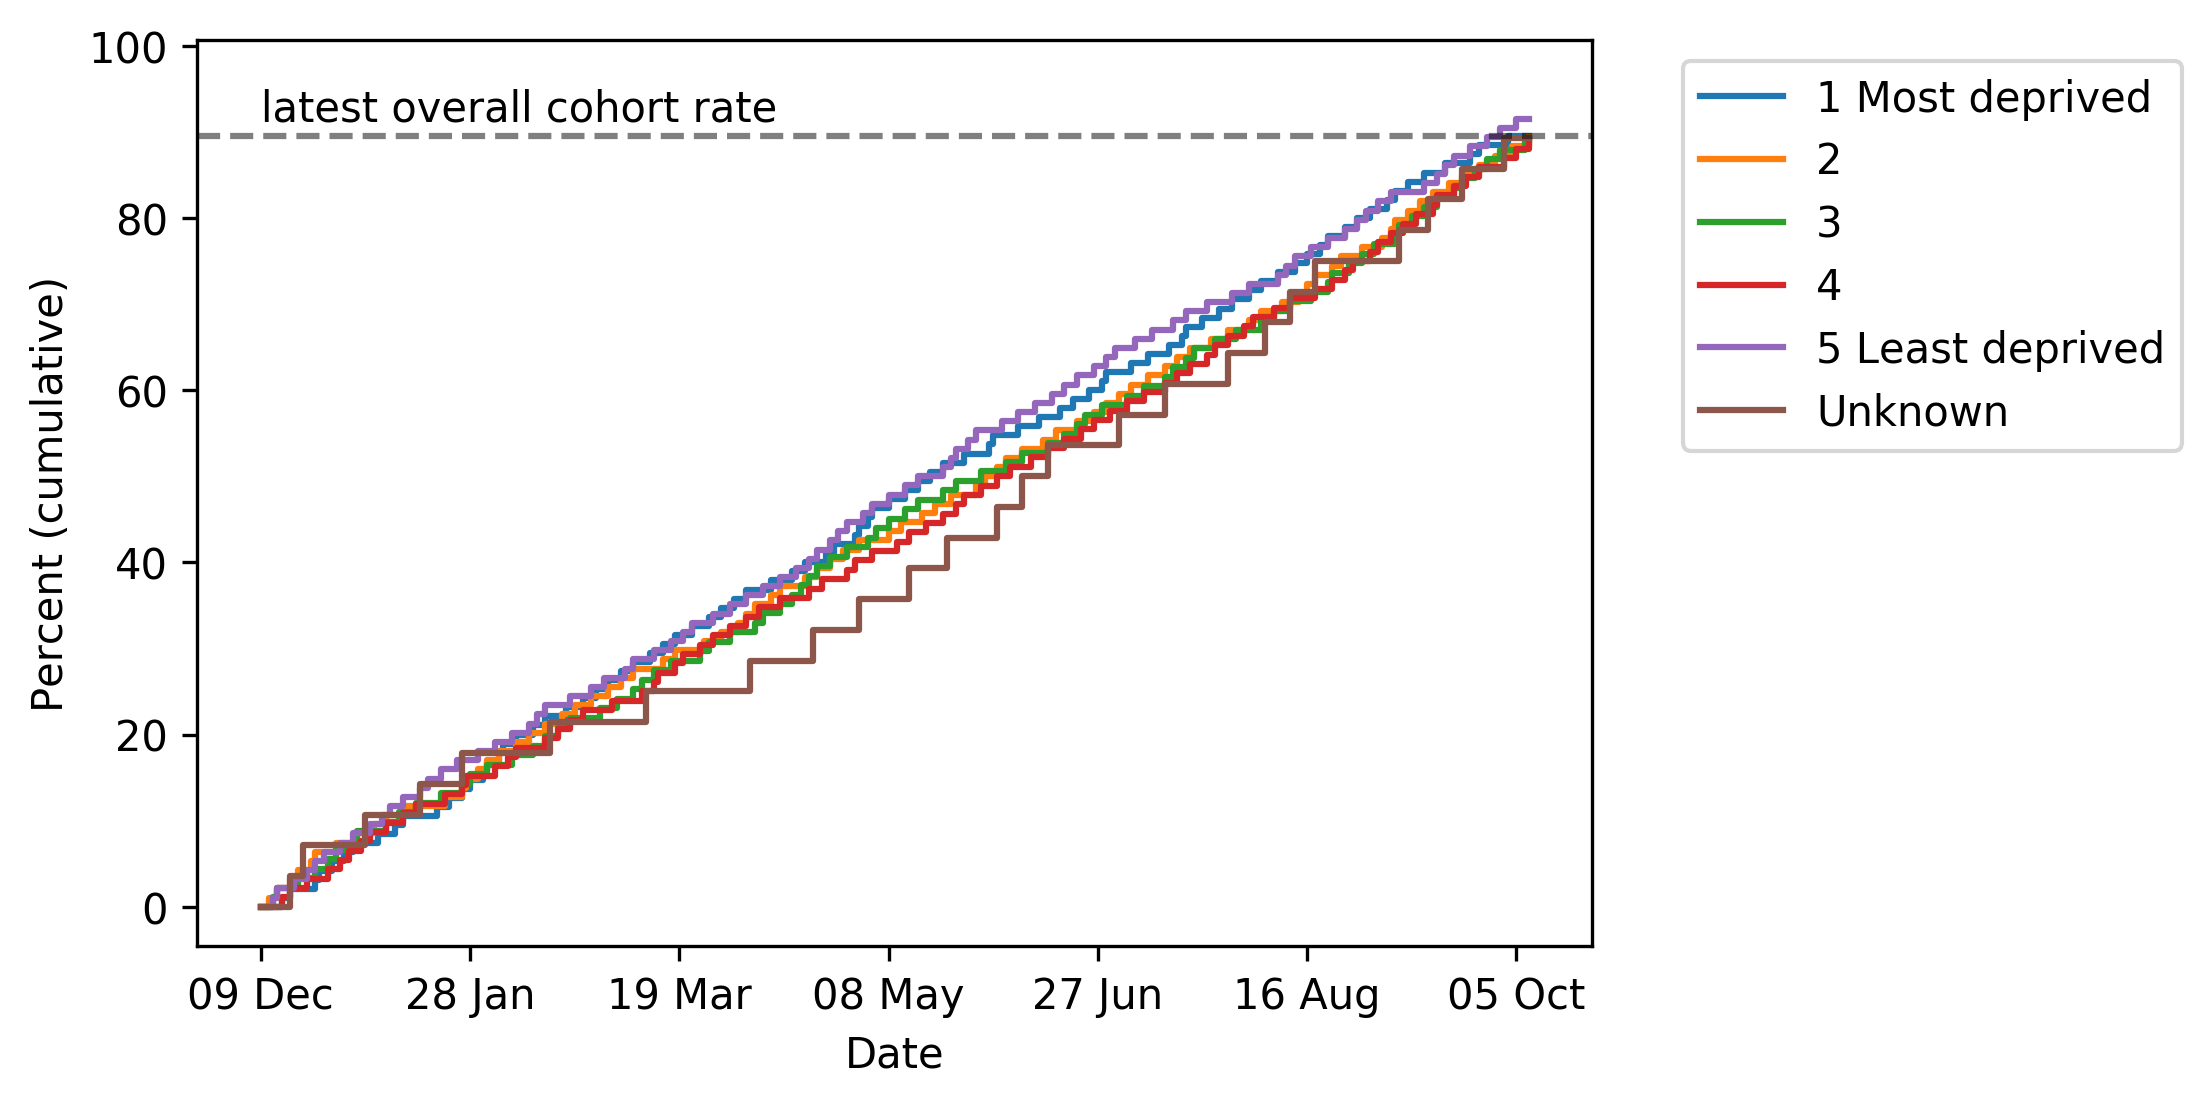

### COVID vaccinations among 70-79 population
 ### by BMI

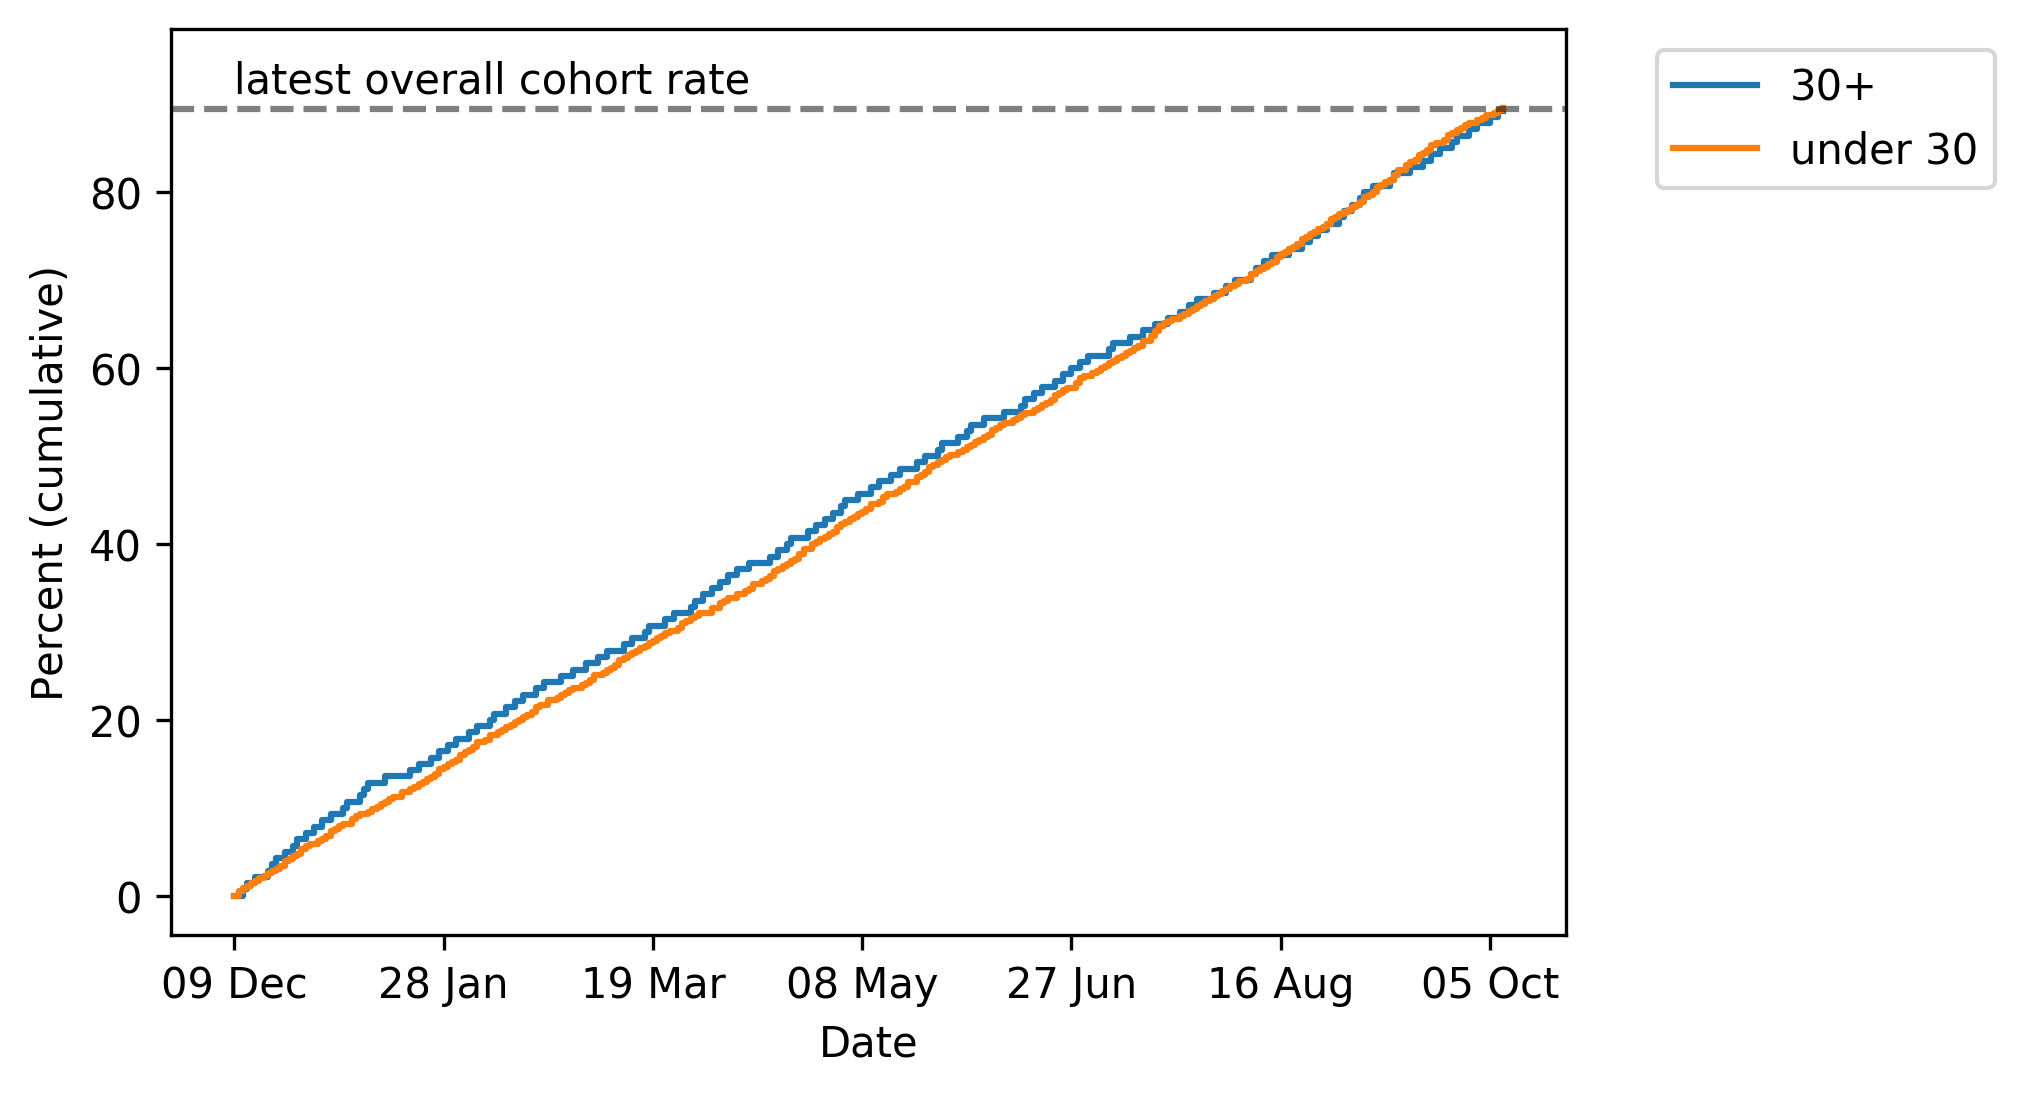

### COVID vaccinations among 70-79 population
 ### by Housebound

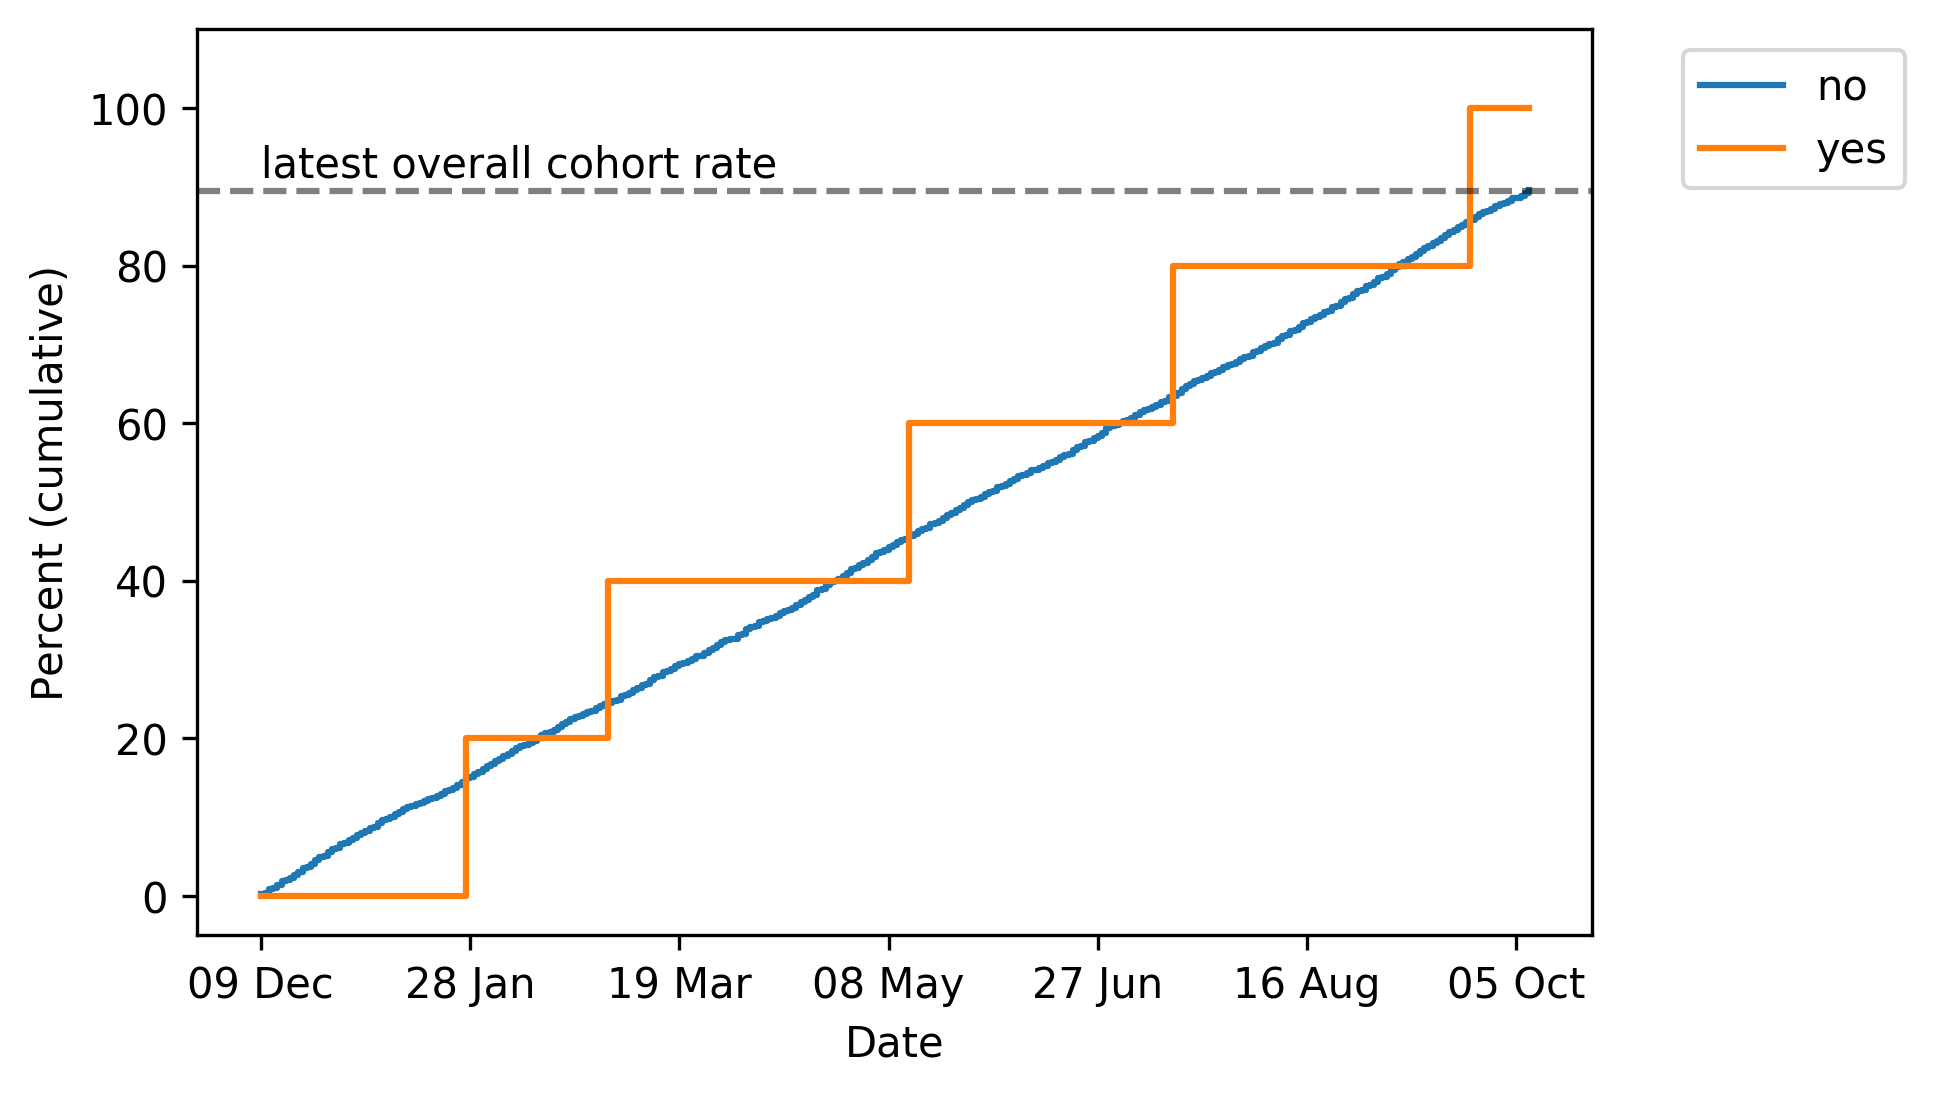

### COVID vaccinations among 70-79 population
 ### by Dialysis

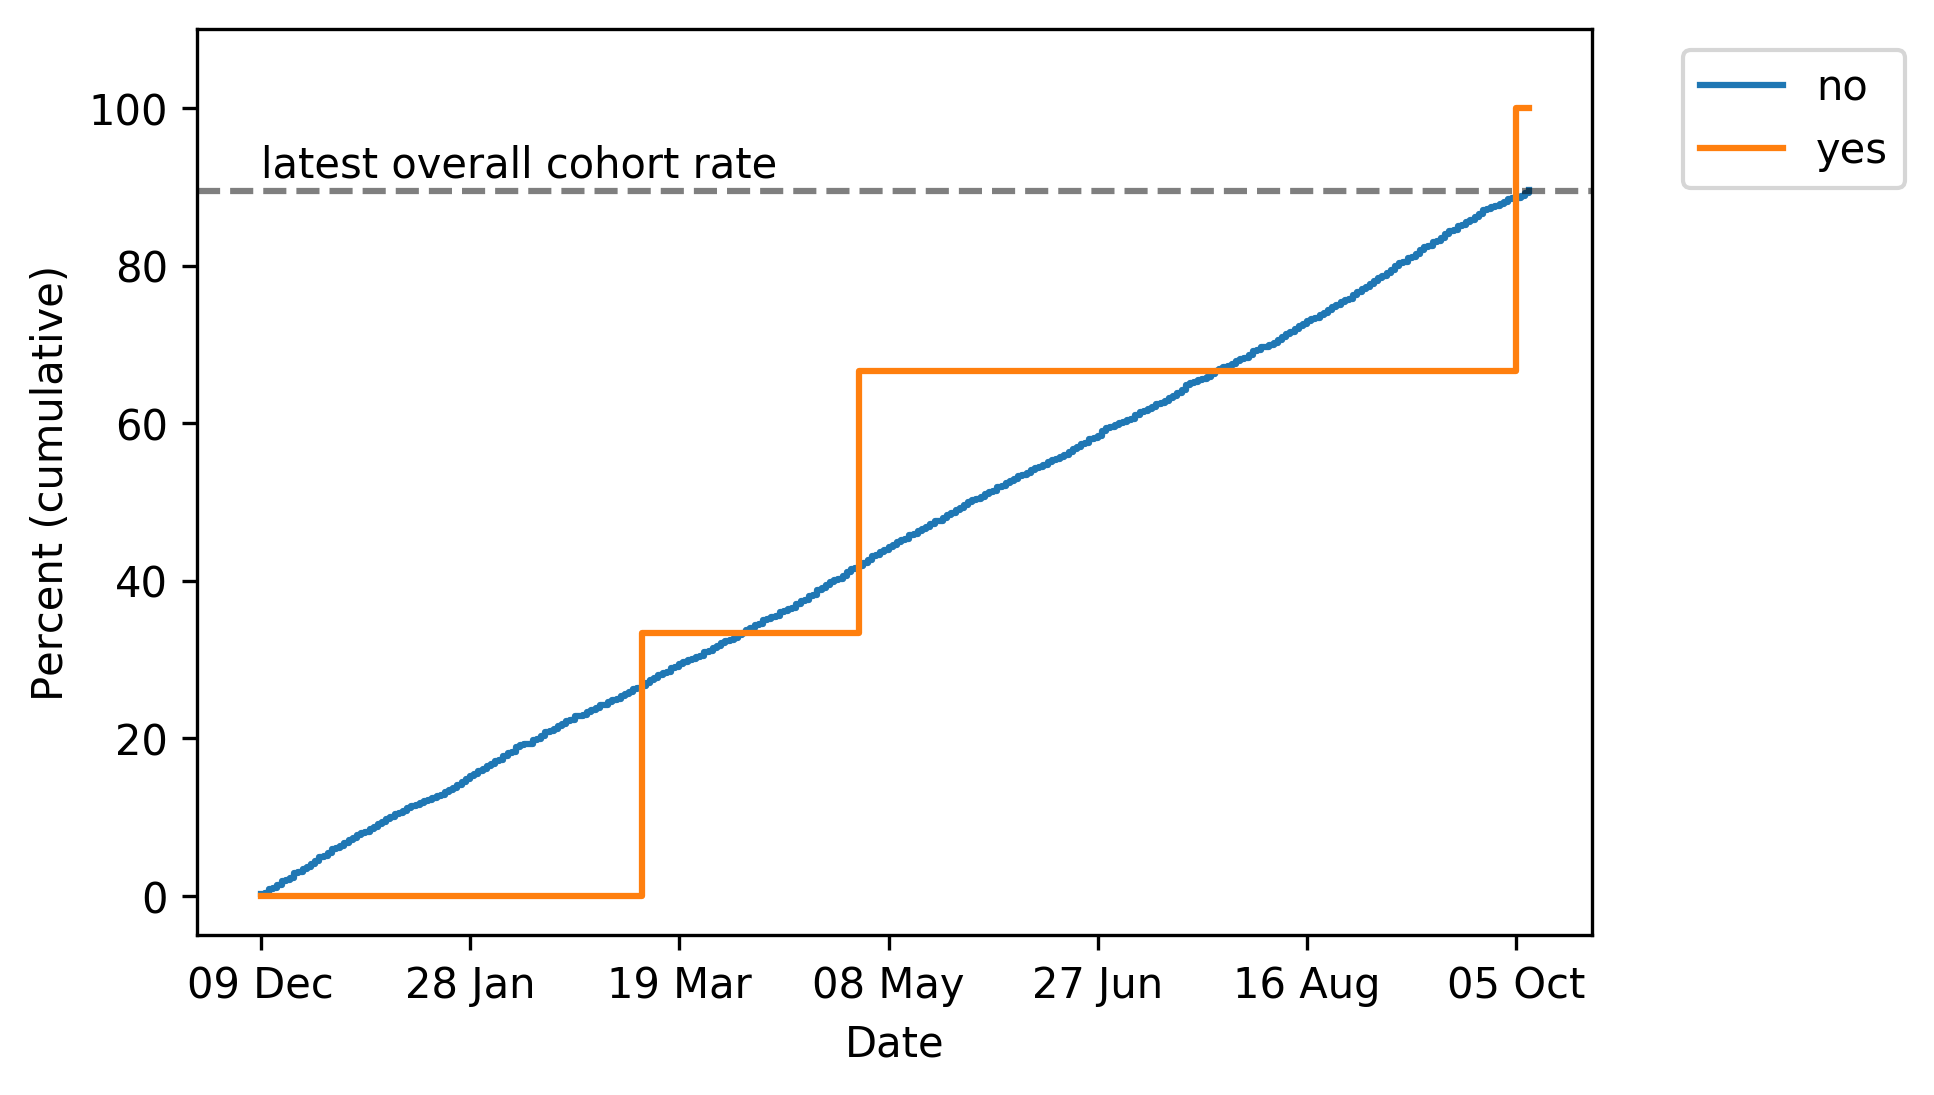

### COVID vaccinations among 70-79 population
 ### by Dementia

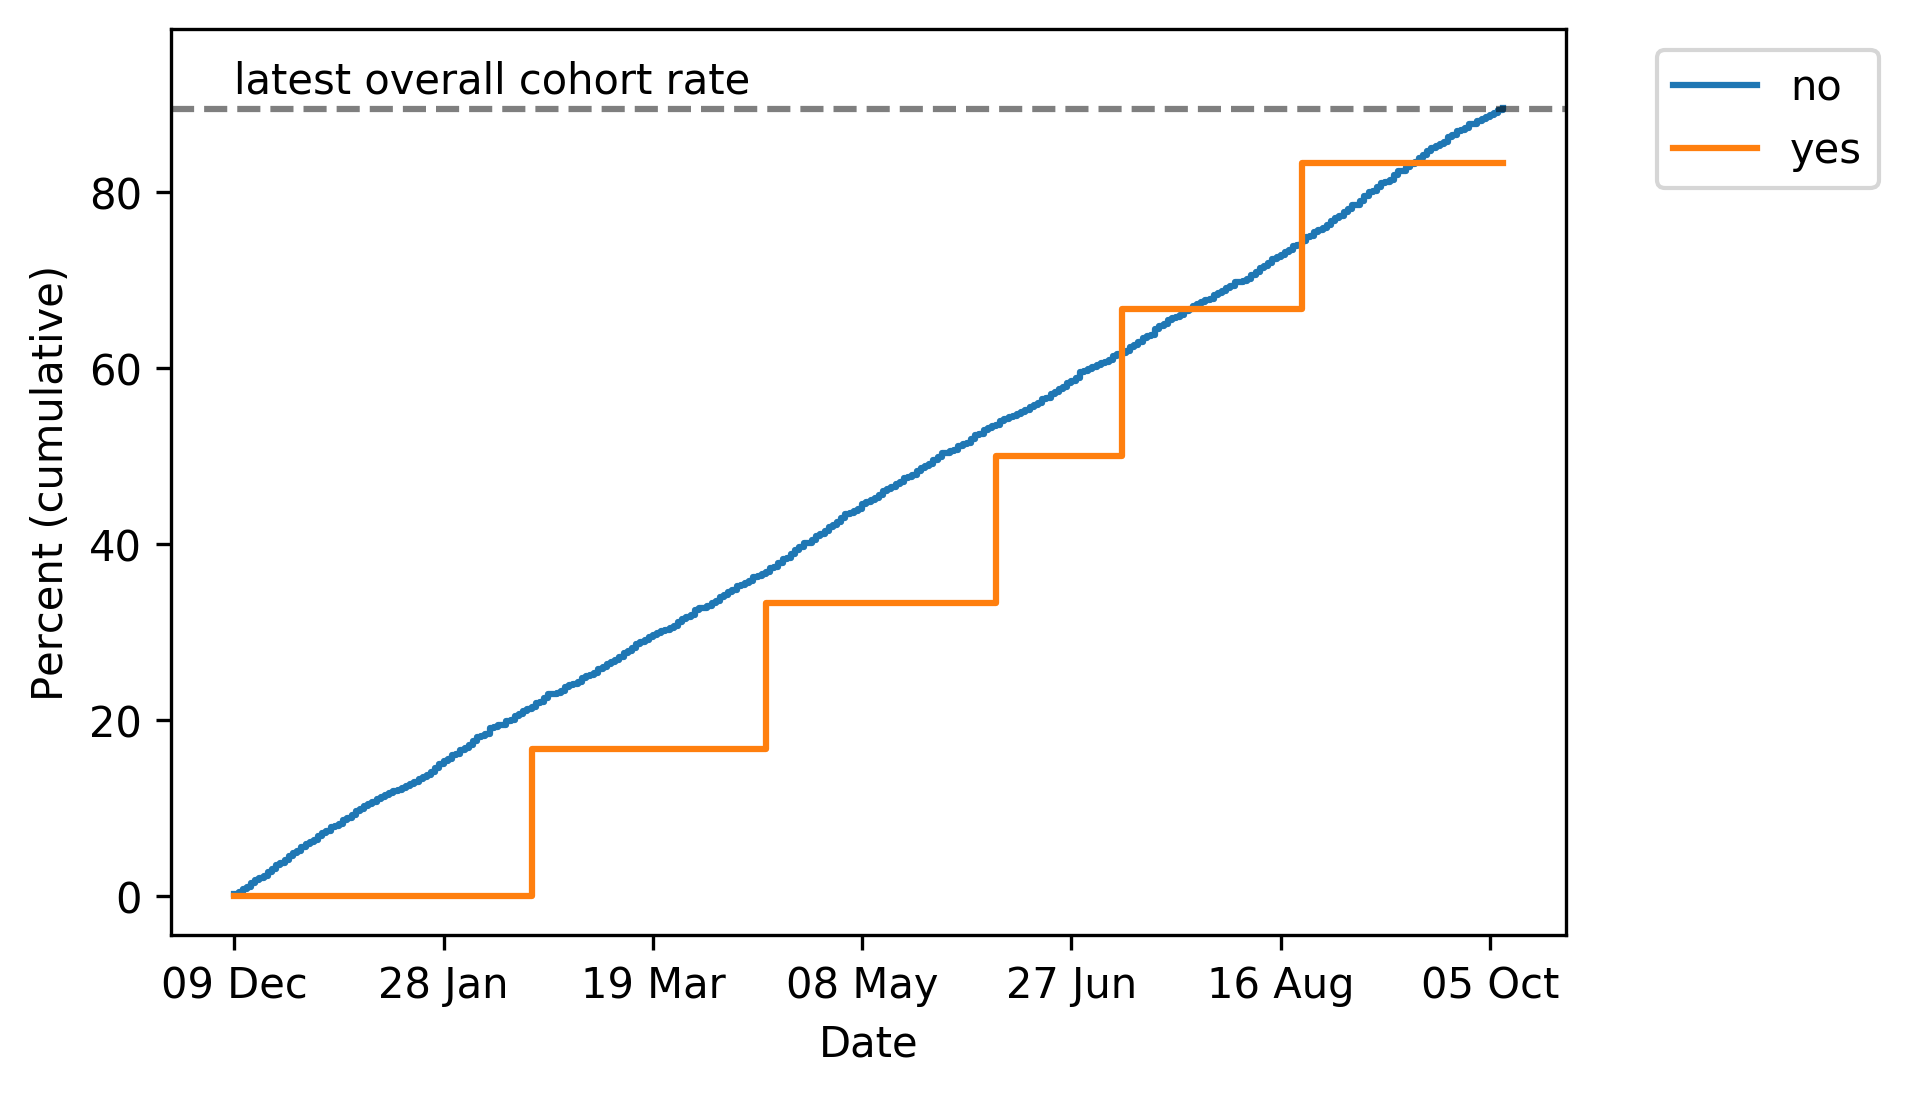

### COVID vaccinations among 70-79 population
 ### by Learning disability

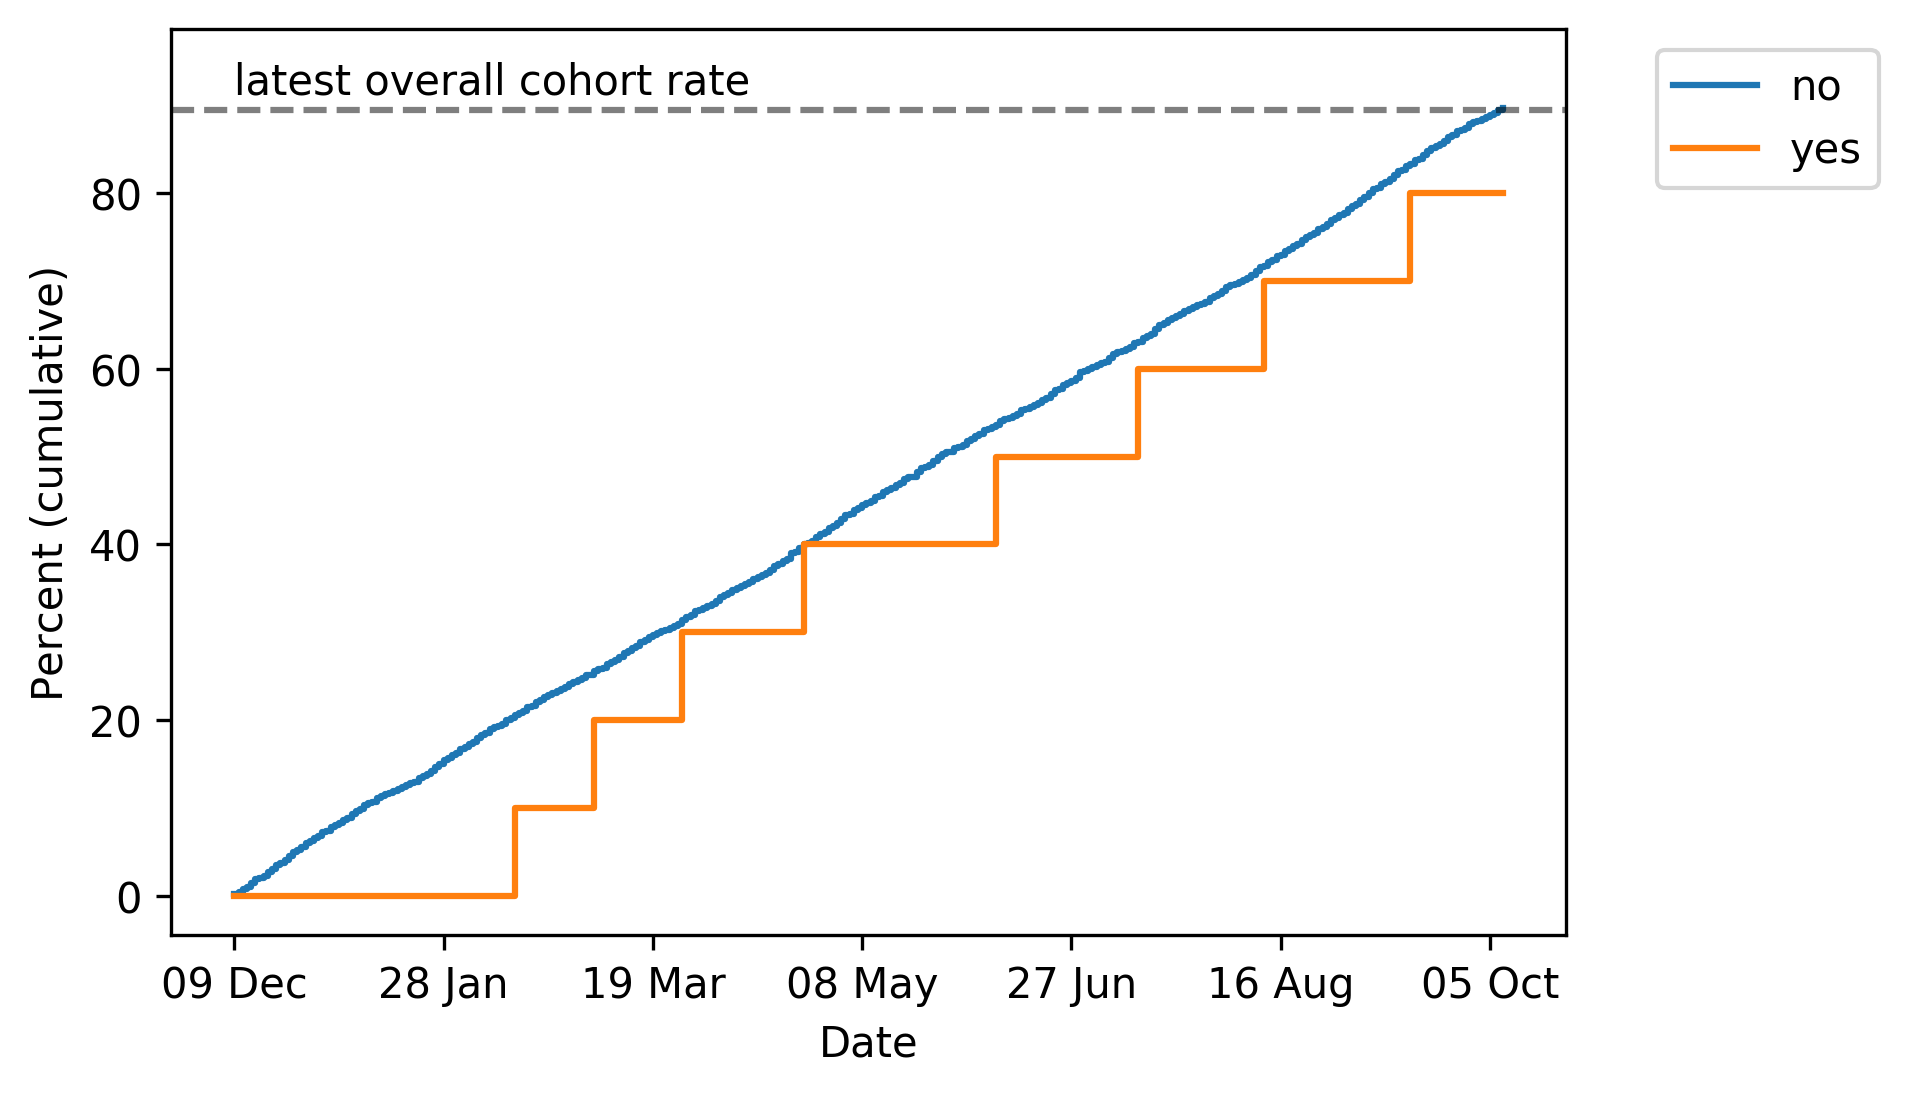

### COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

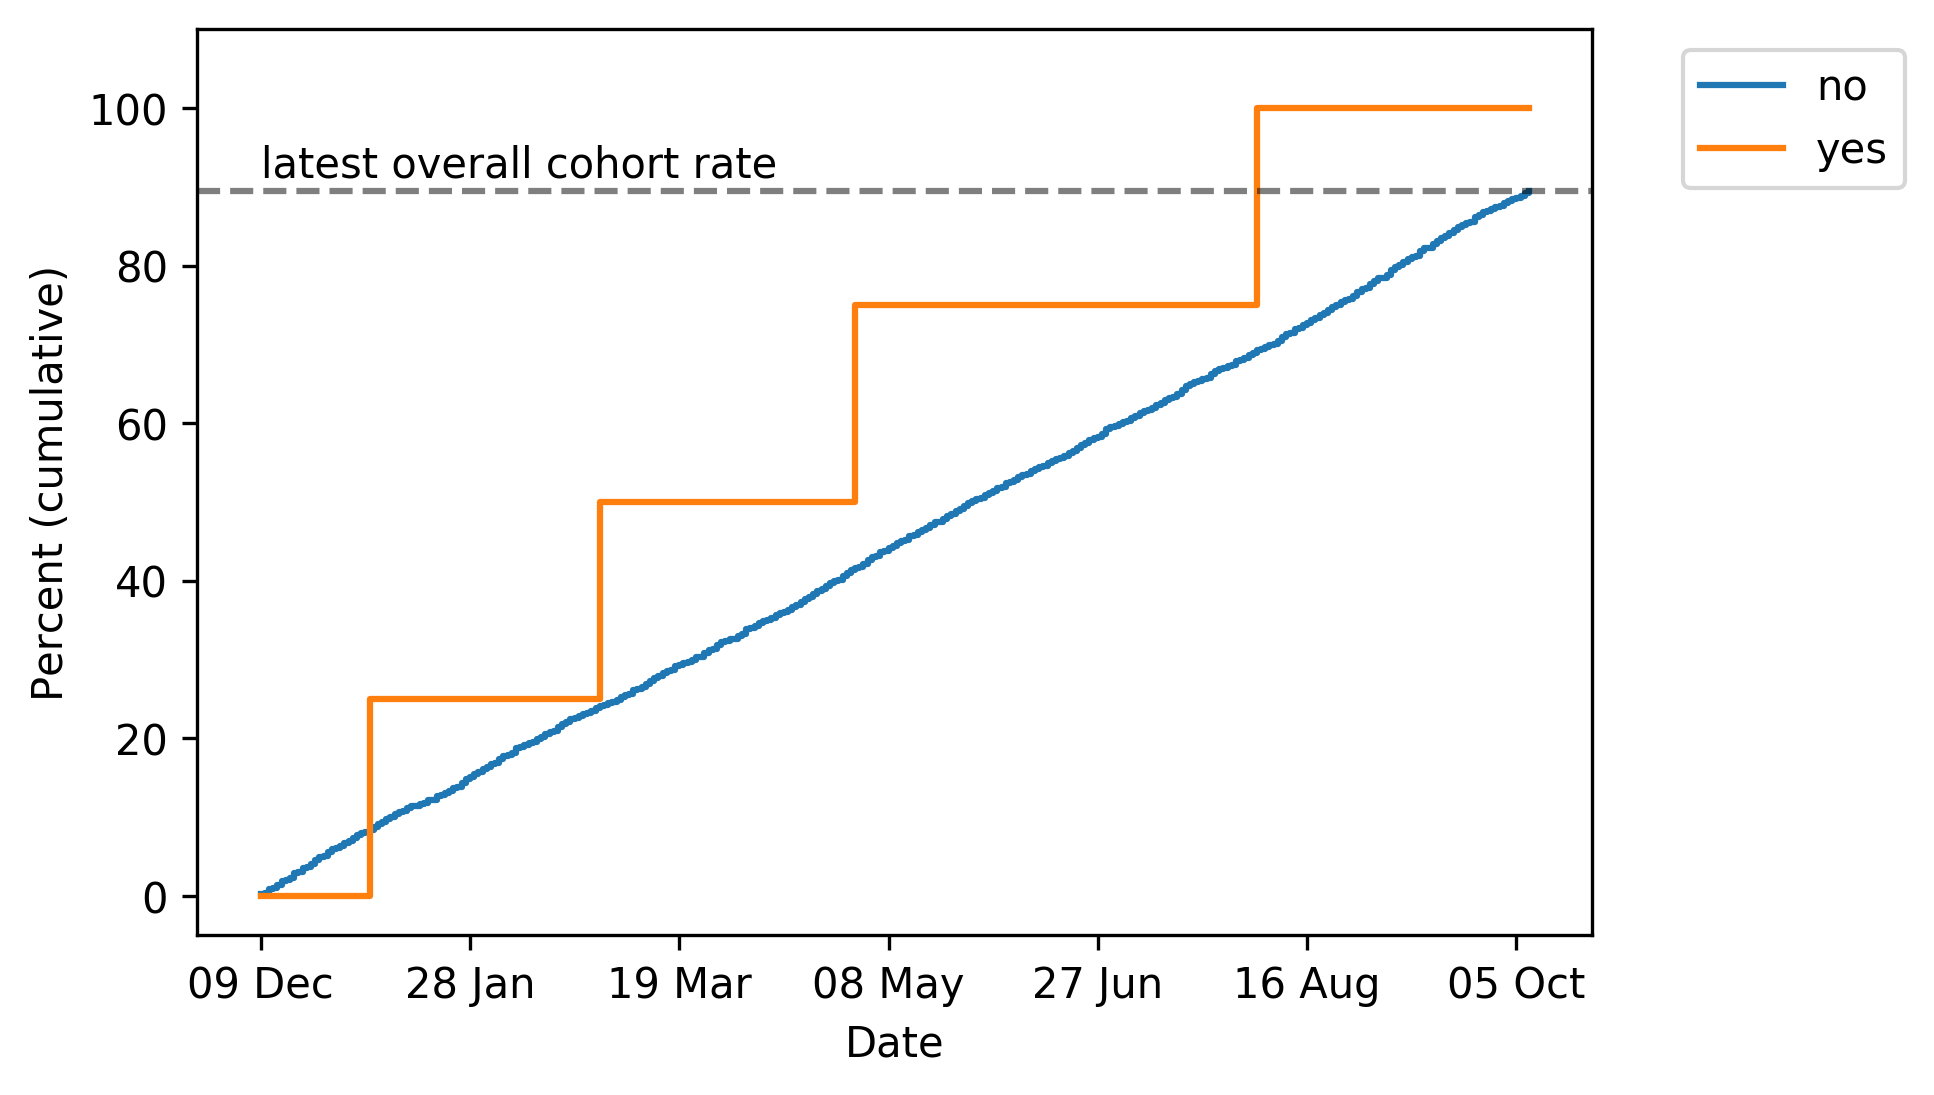

### COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

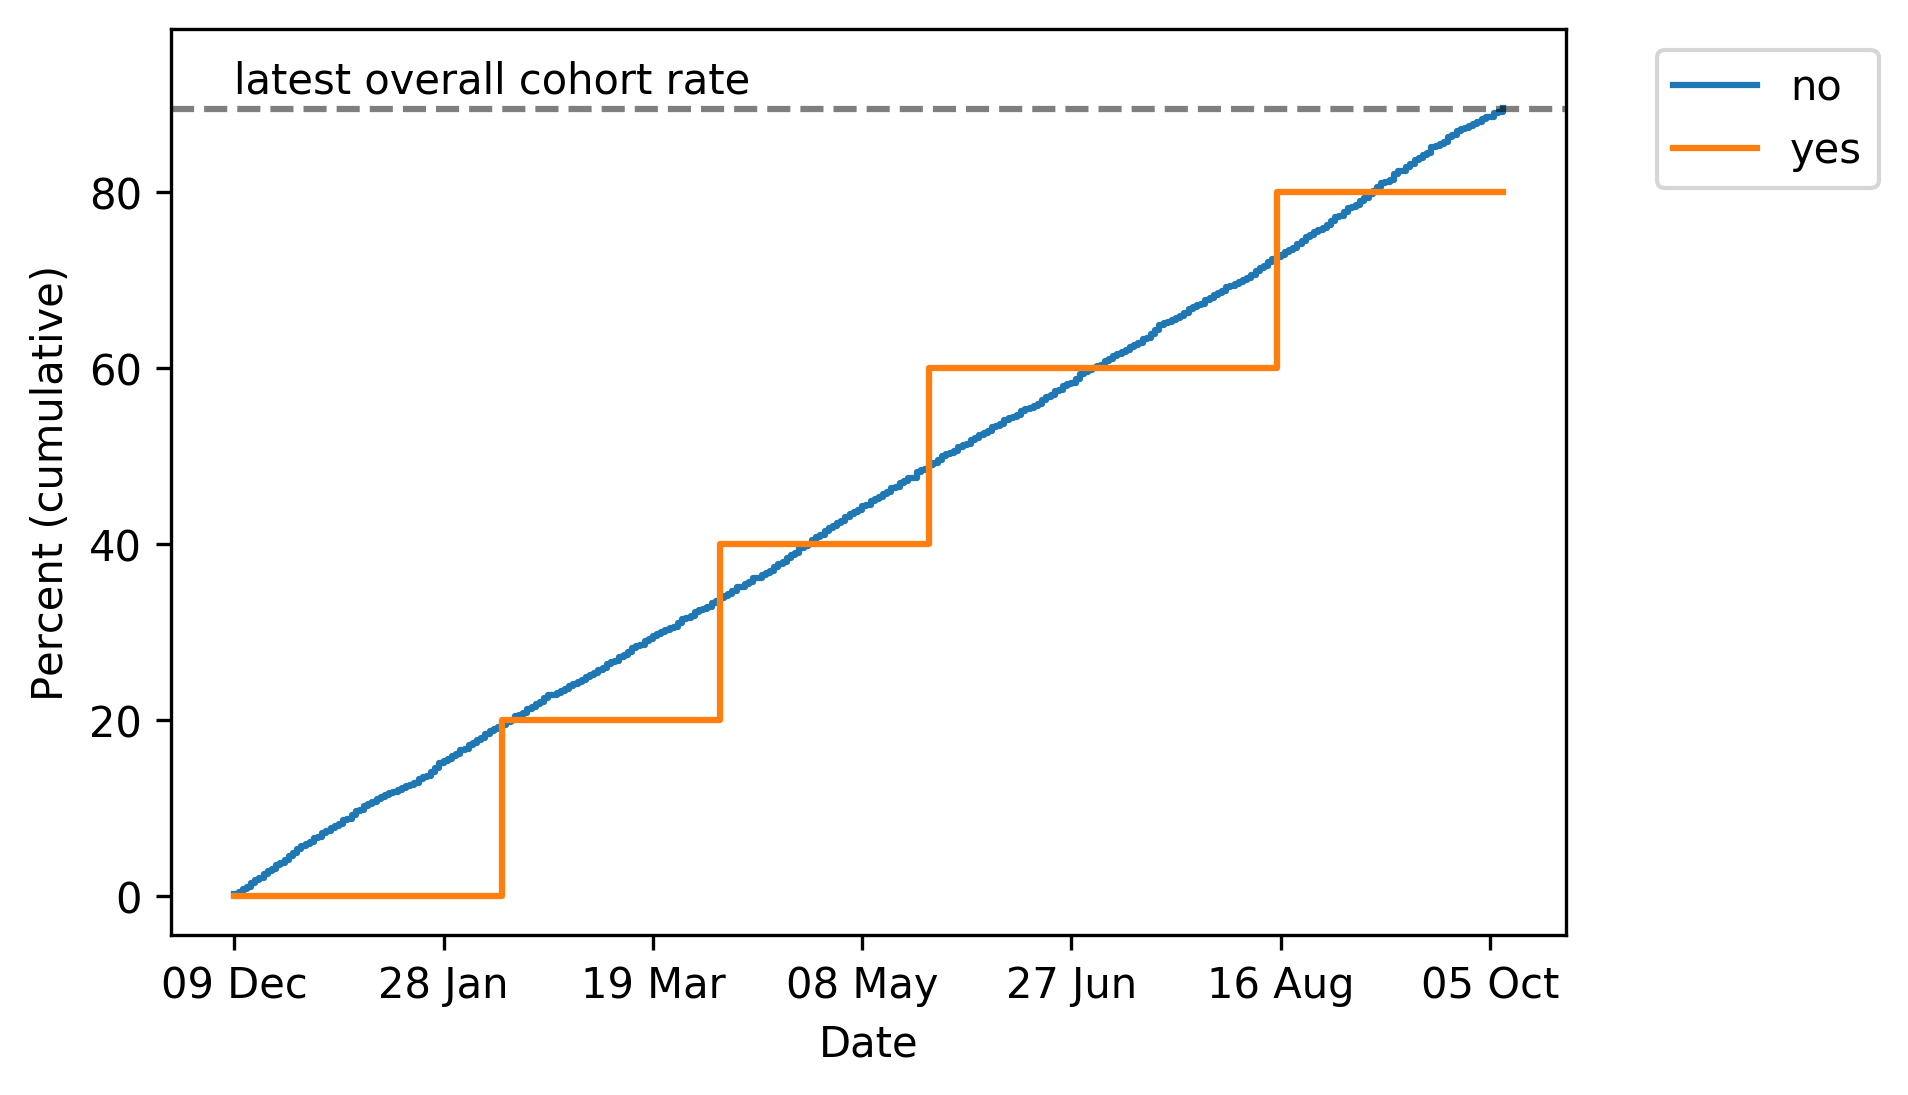

### COVID vaccinations among 70-79 population
 ### by Age band

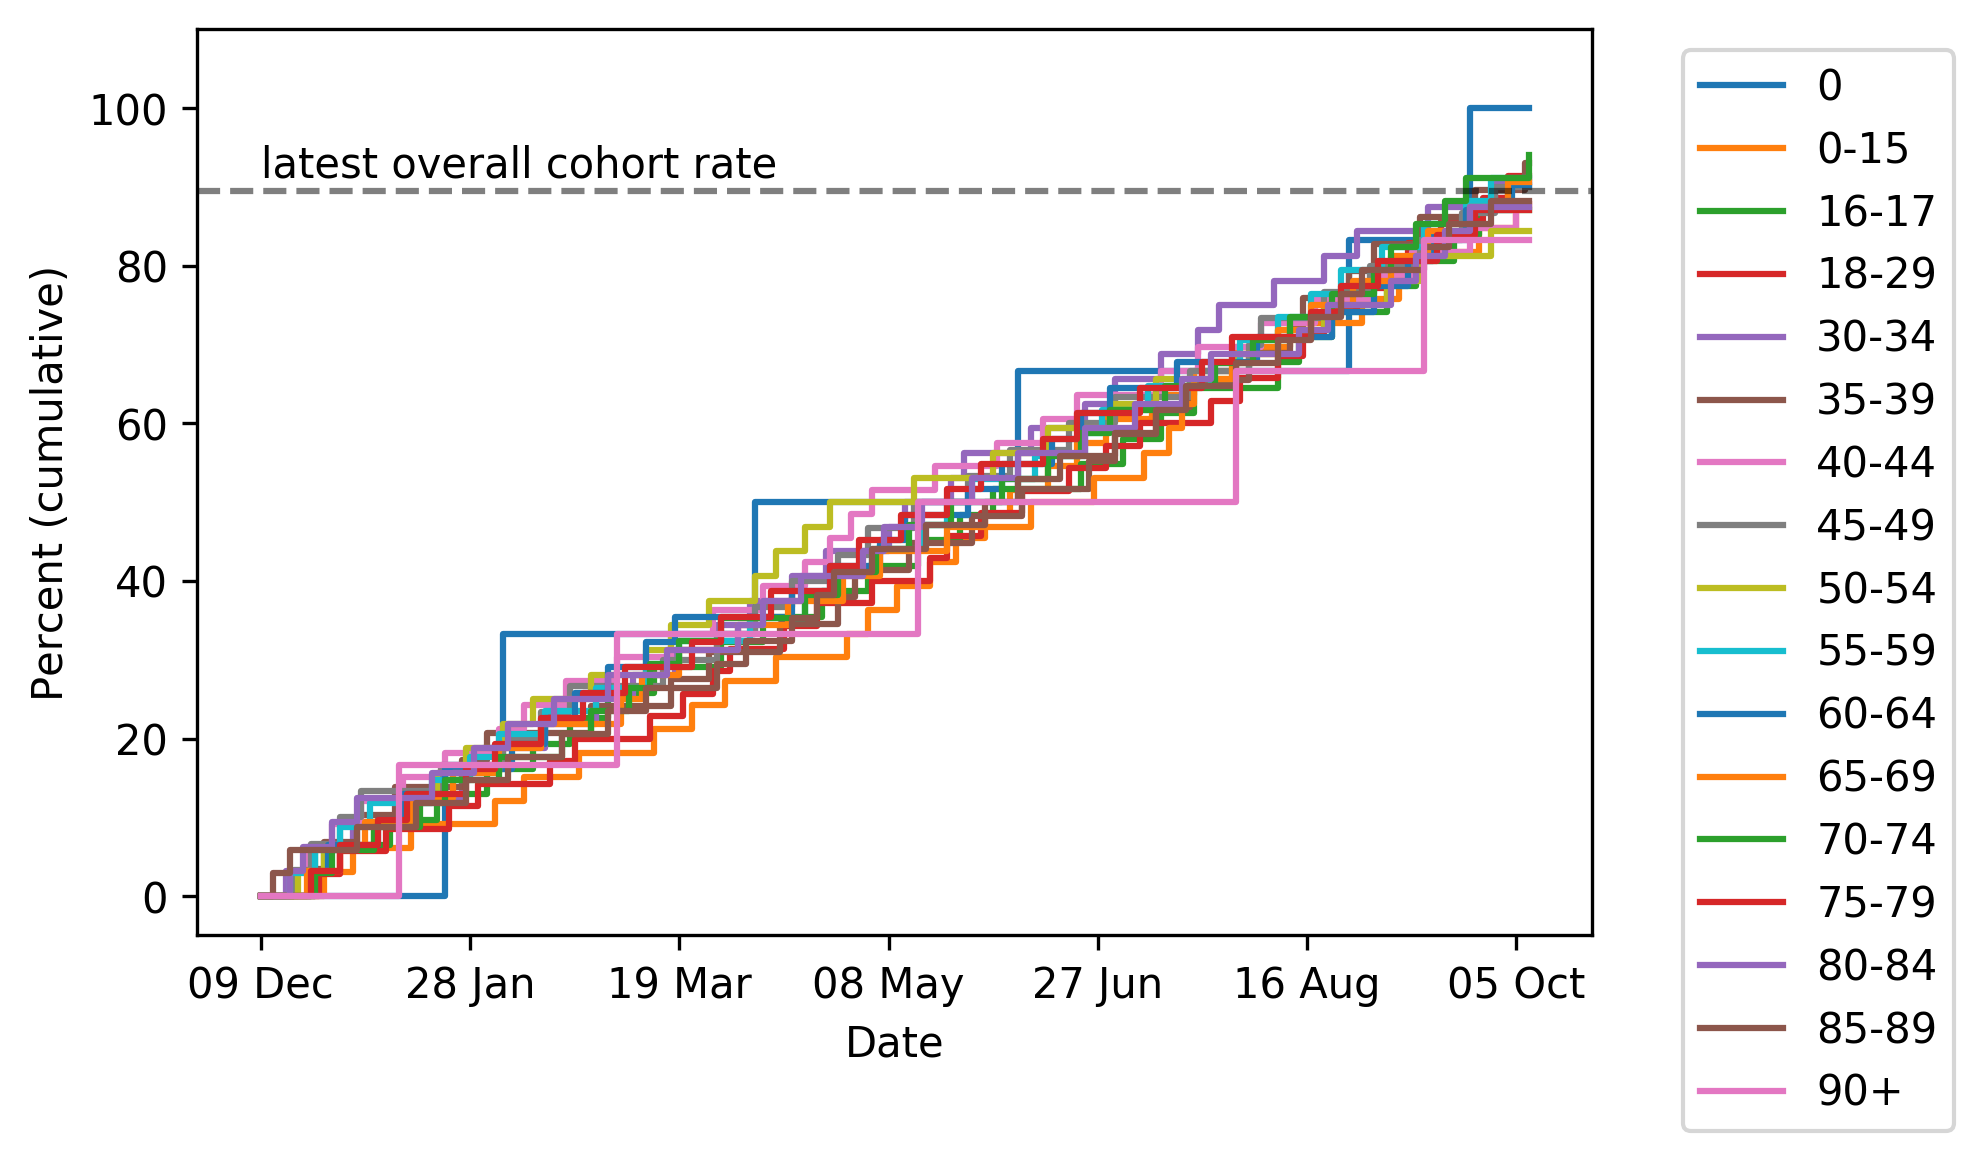

In [5]:
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of **shielding** population according to demographic/clinical features, cumulatively by day. <a name='charts_shield' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## Shielding population (aged 16-69)

### COVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

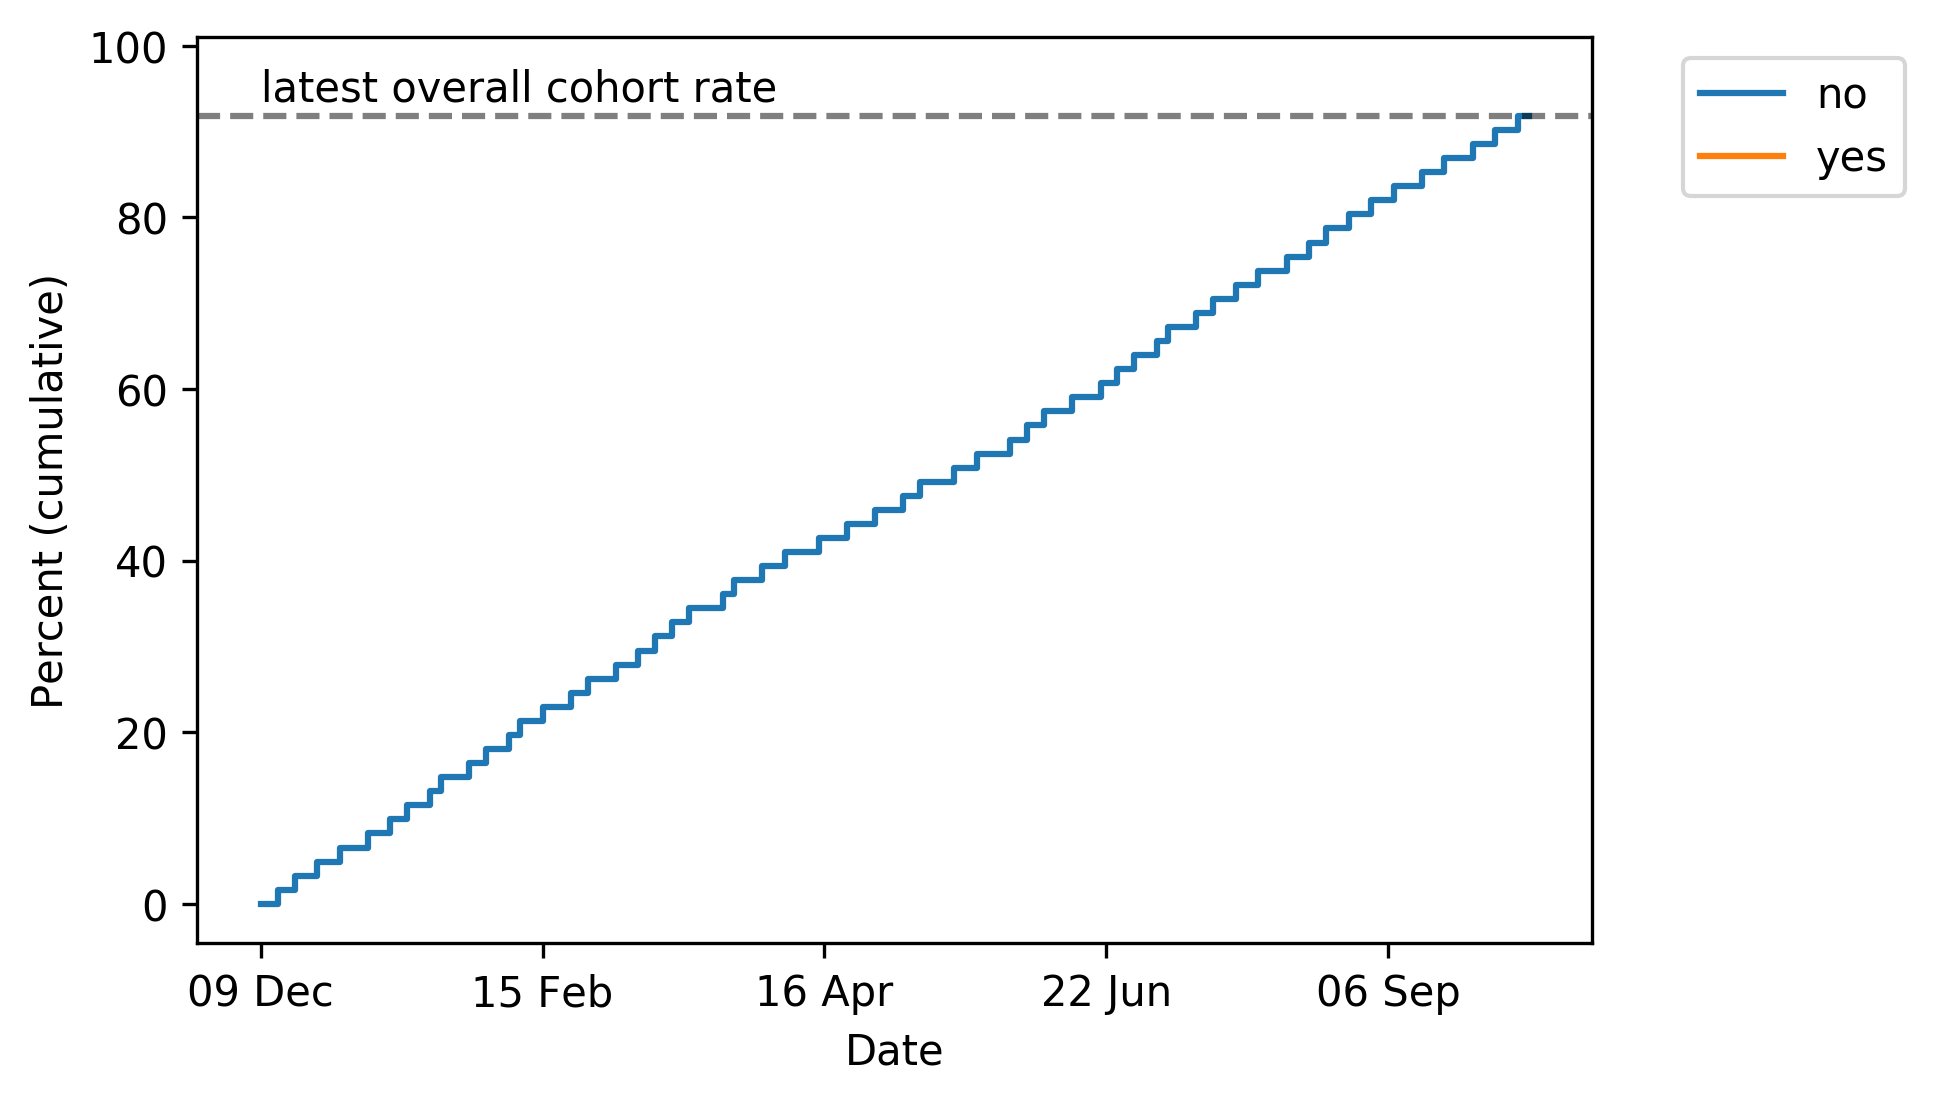

### COVID vaccinations among shielding (aged 16-69) population
 ### by Age band

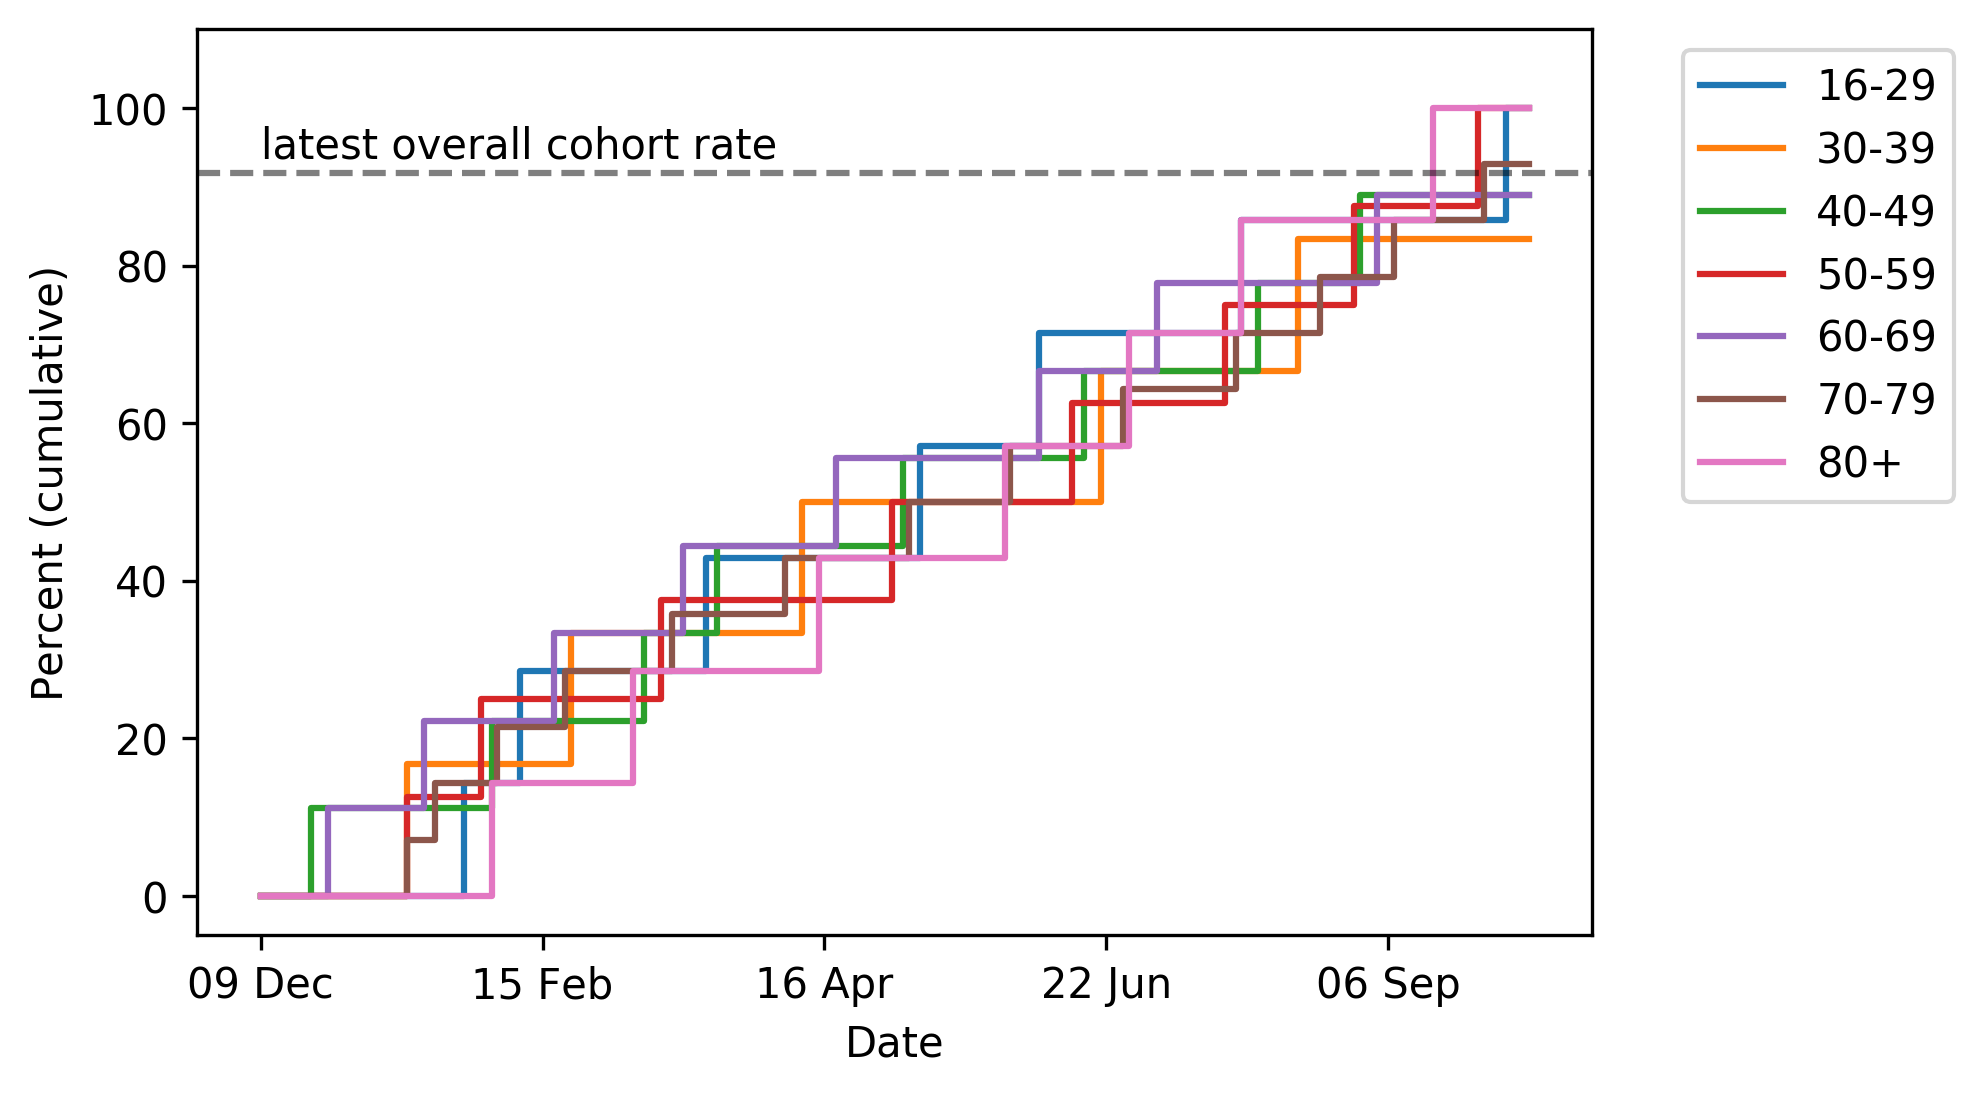

### COVID vaccinations among shielding (aged 16-69) population
 ### by Sex

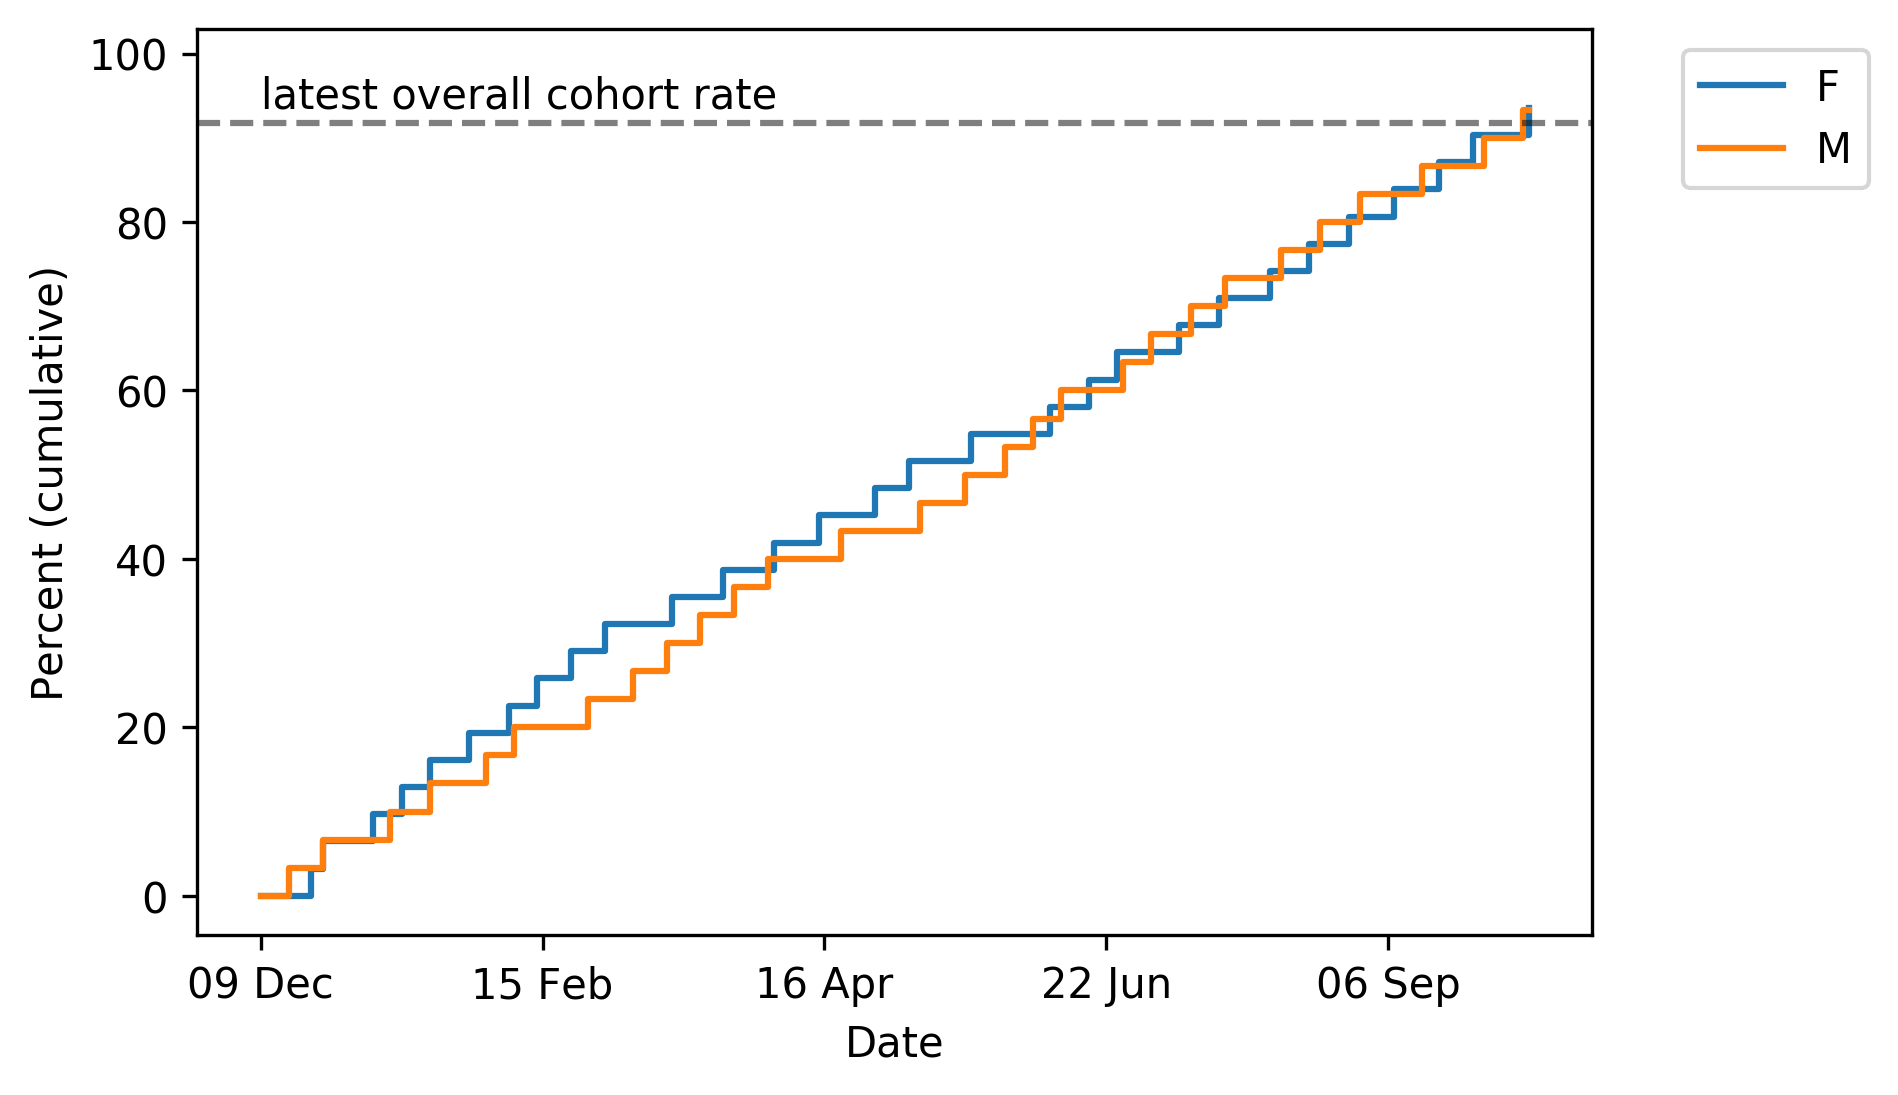

### COVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

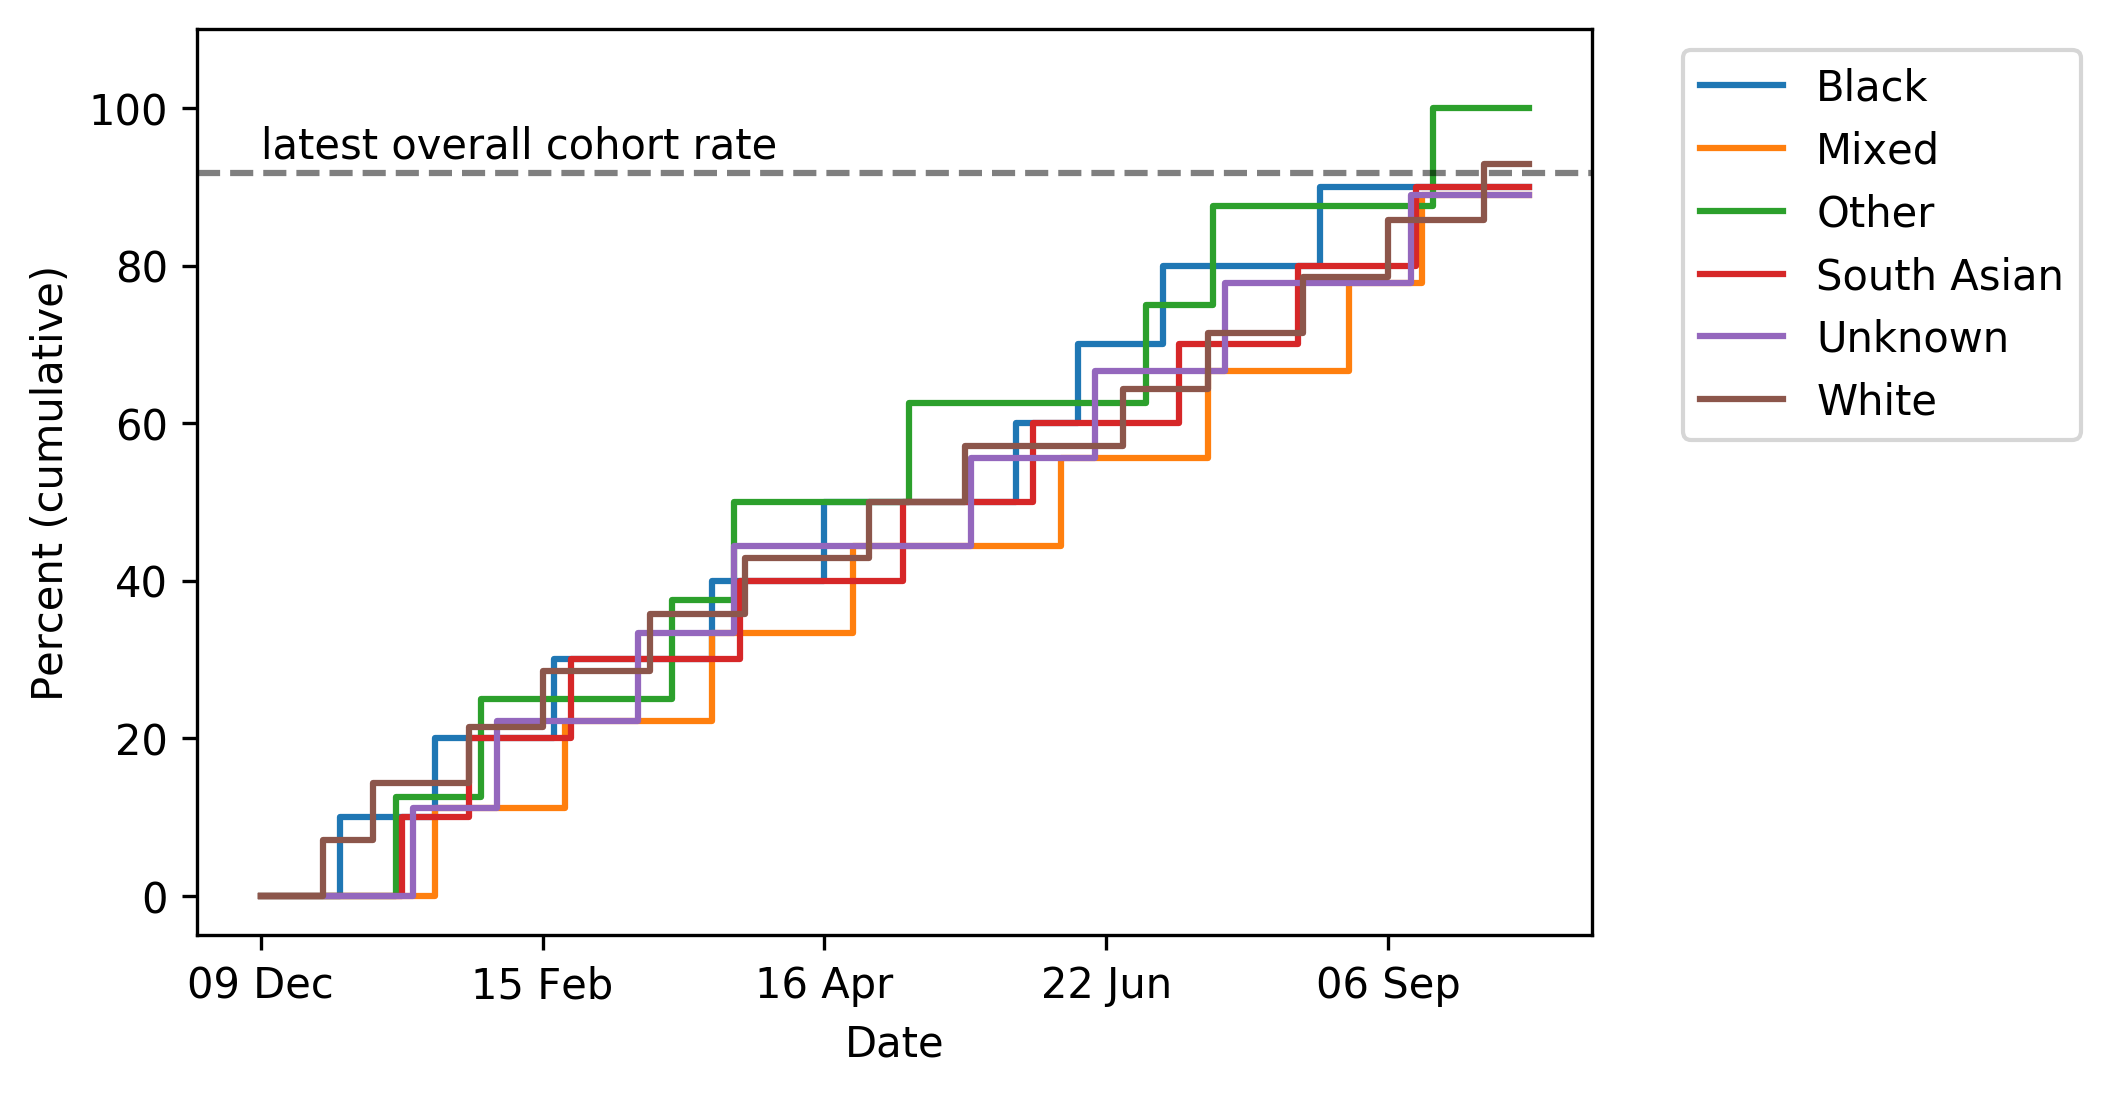

### COVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

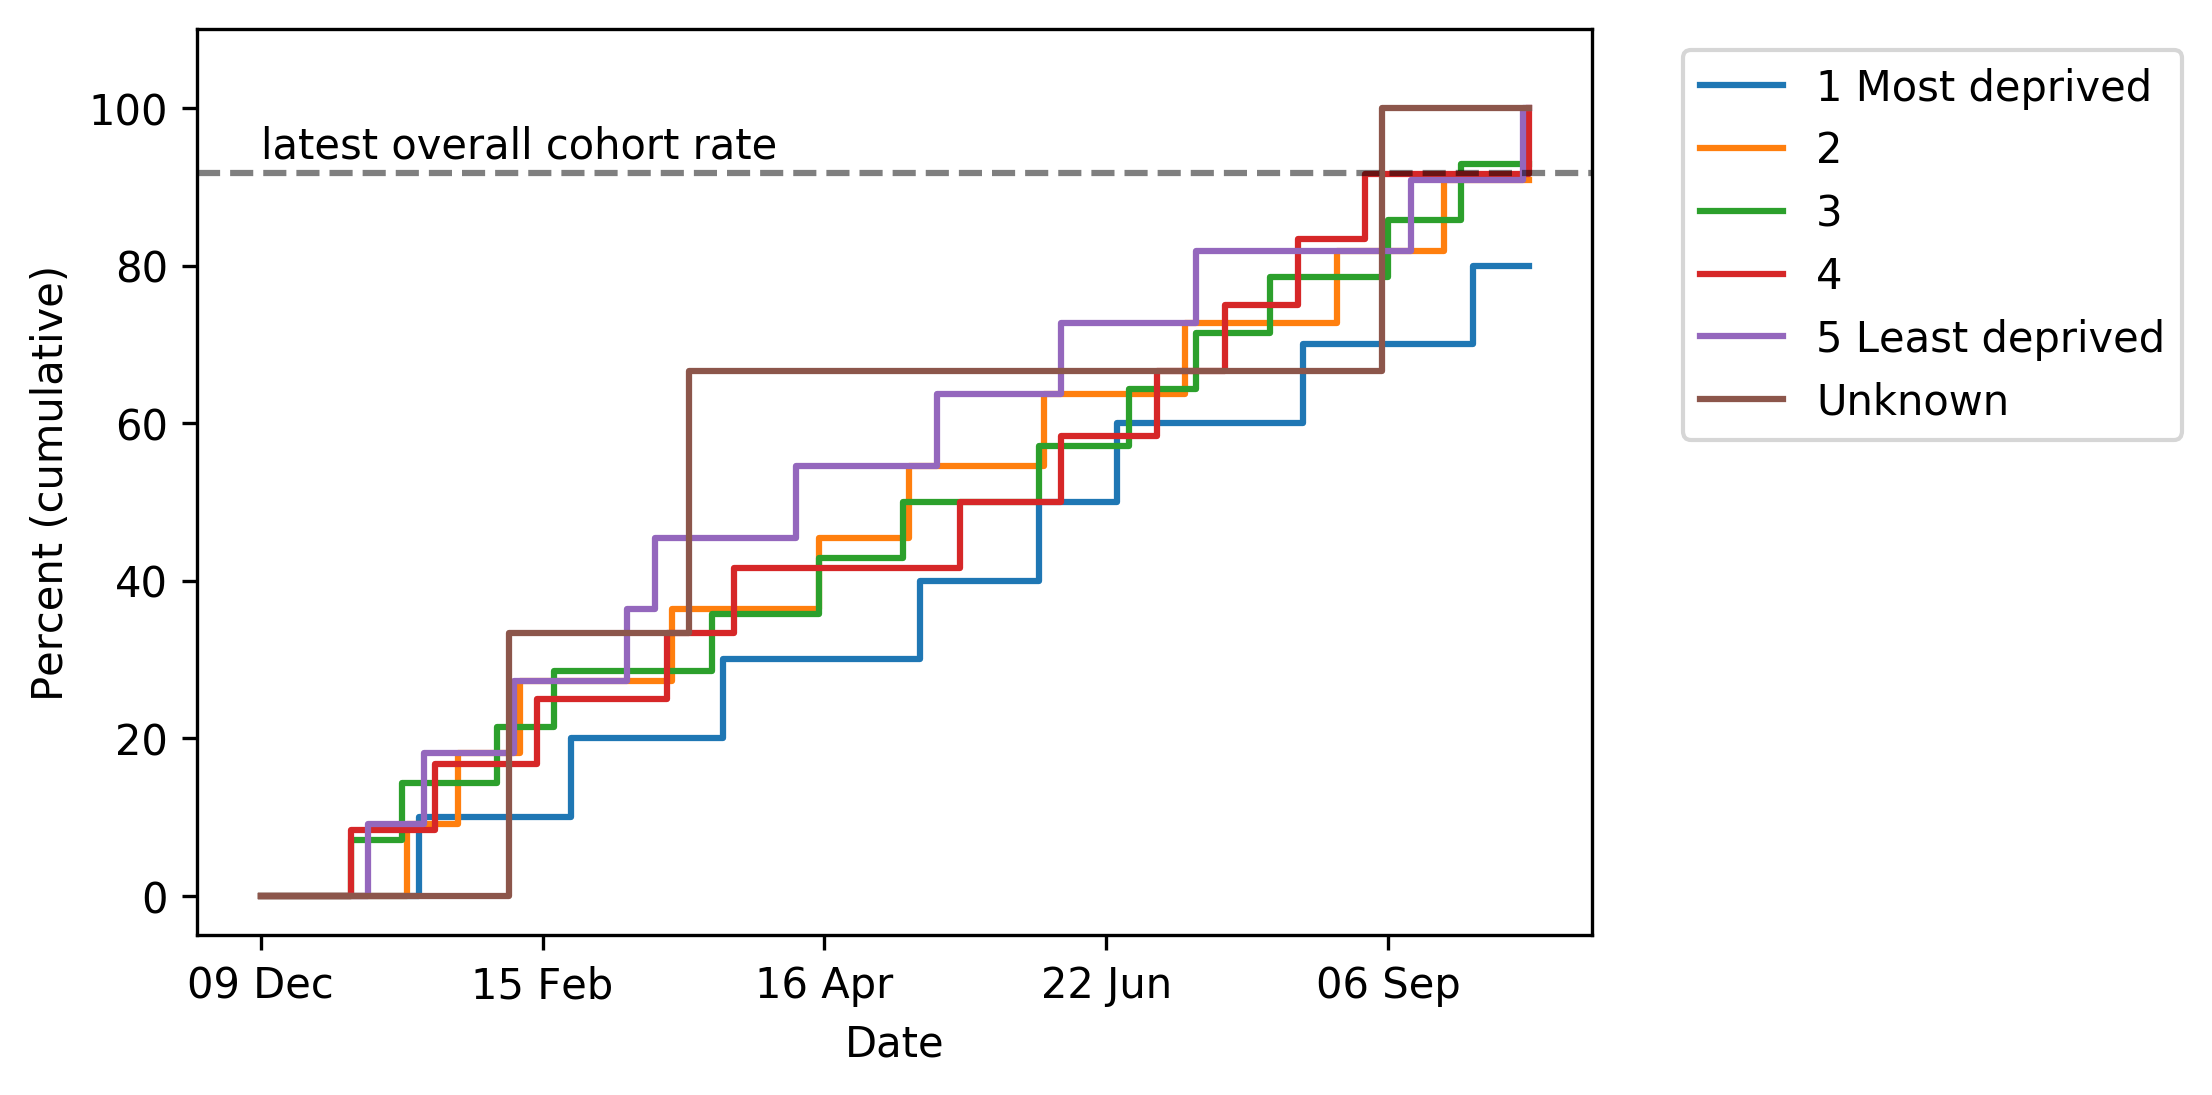

### COVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

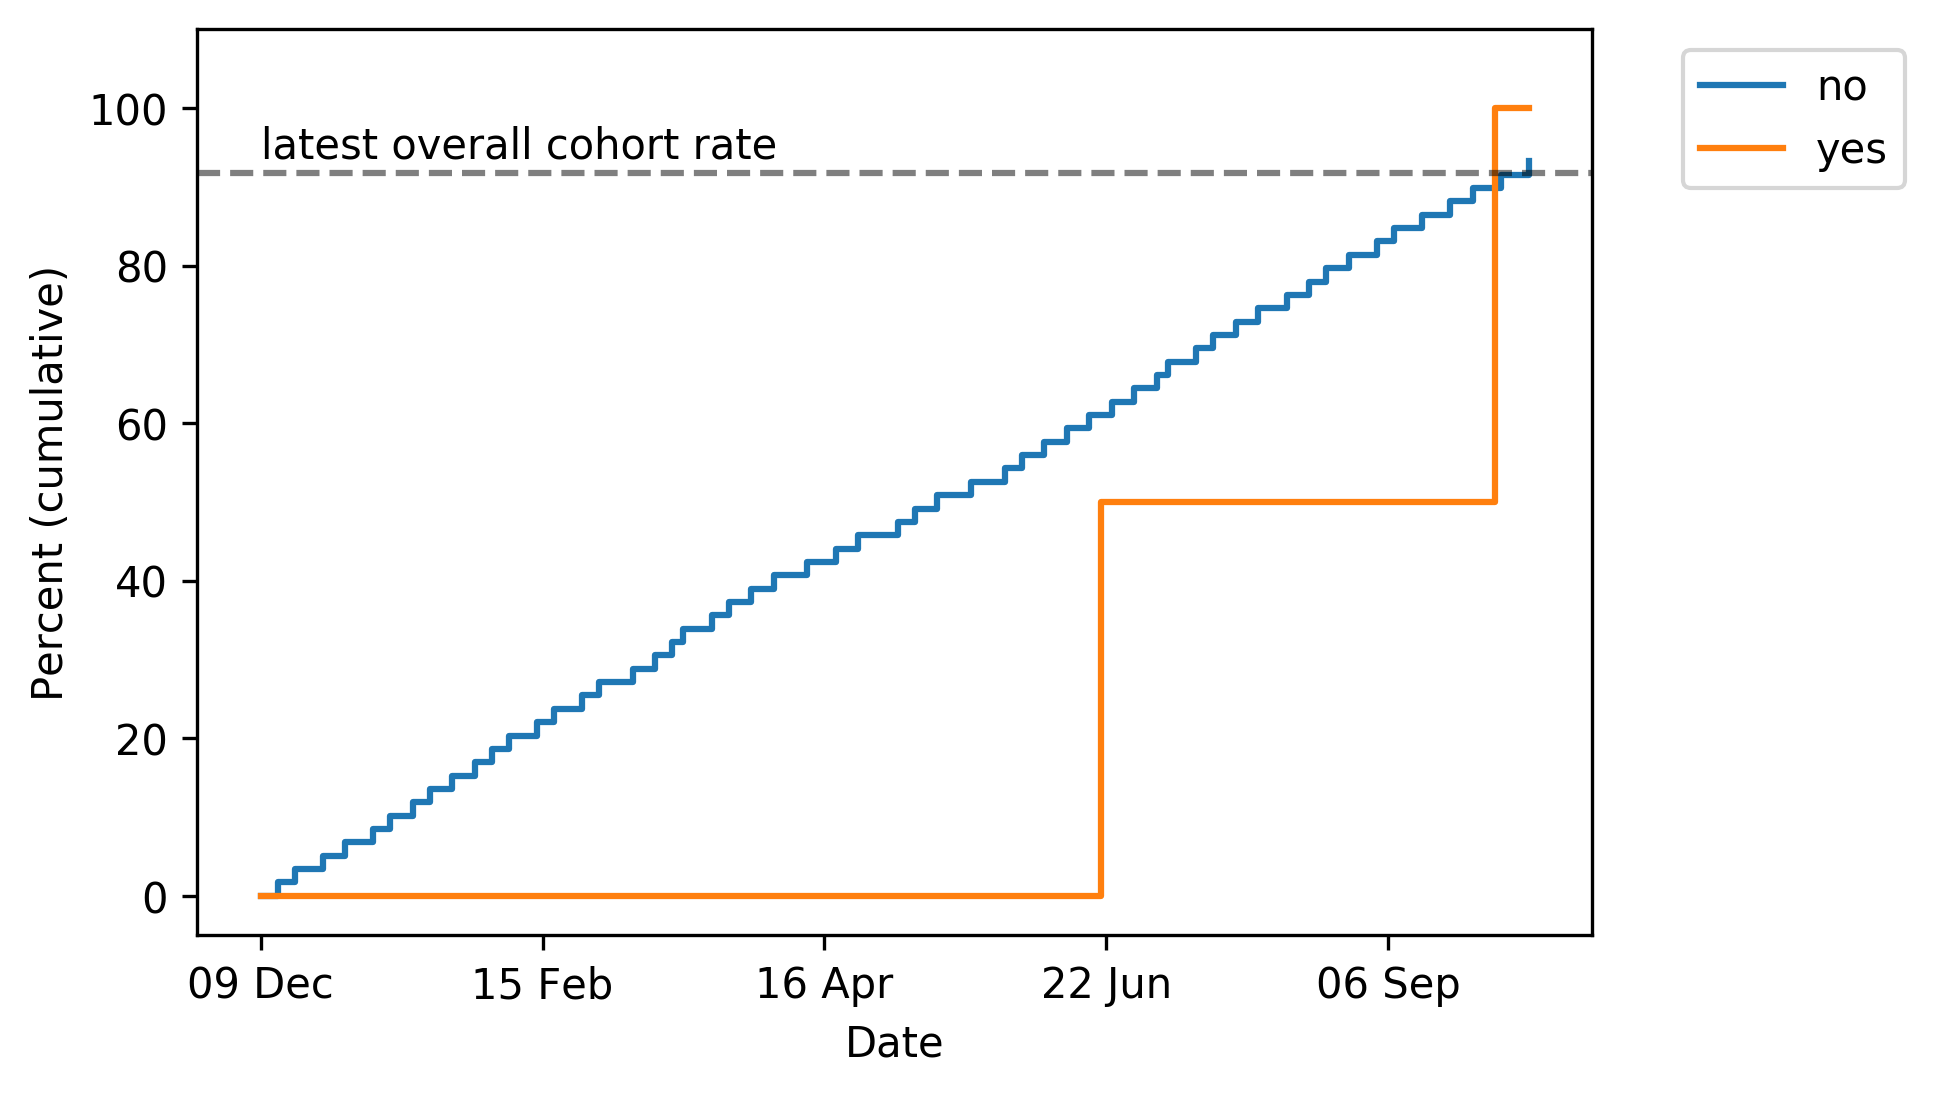

In [6]:
display(Markdown("## Shielding population (aged 16-69)"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="shielding (aged 16-69)", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 65-69 population according to demographic/clinical features, cumulatively by day. <a name='charts65' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 65-69 population

### COVID vaccinations among 65-69 population
 ### by Sex

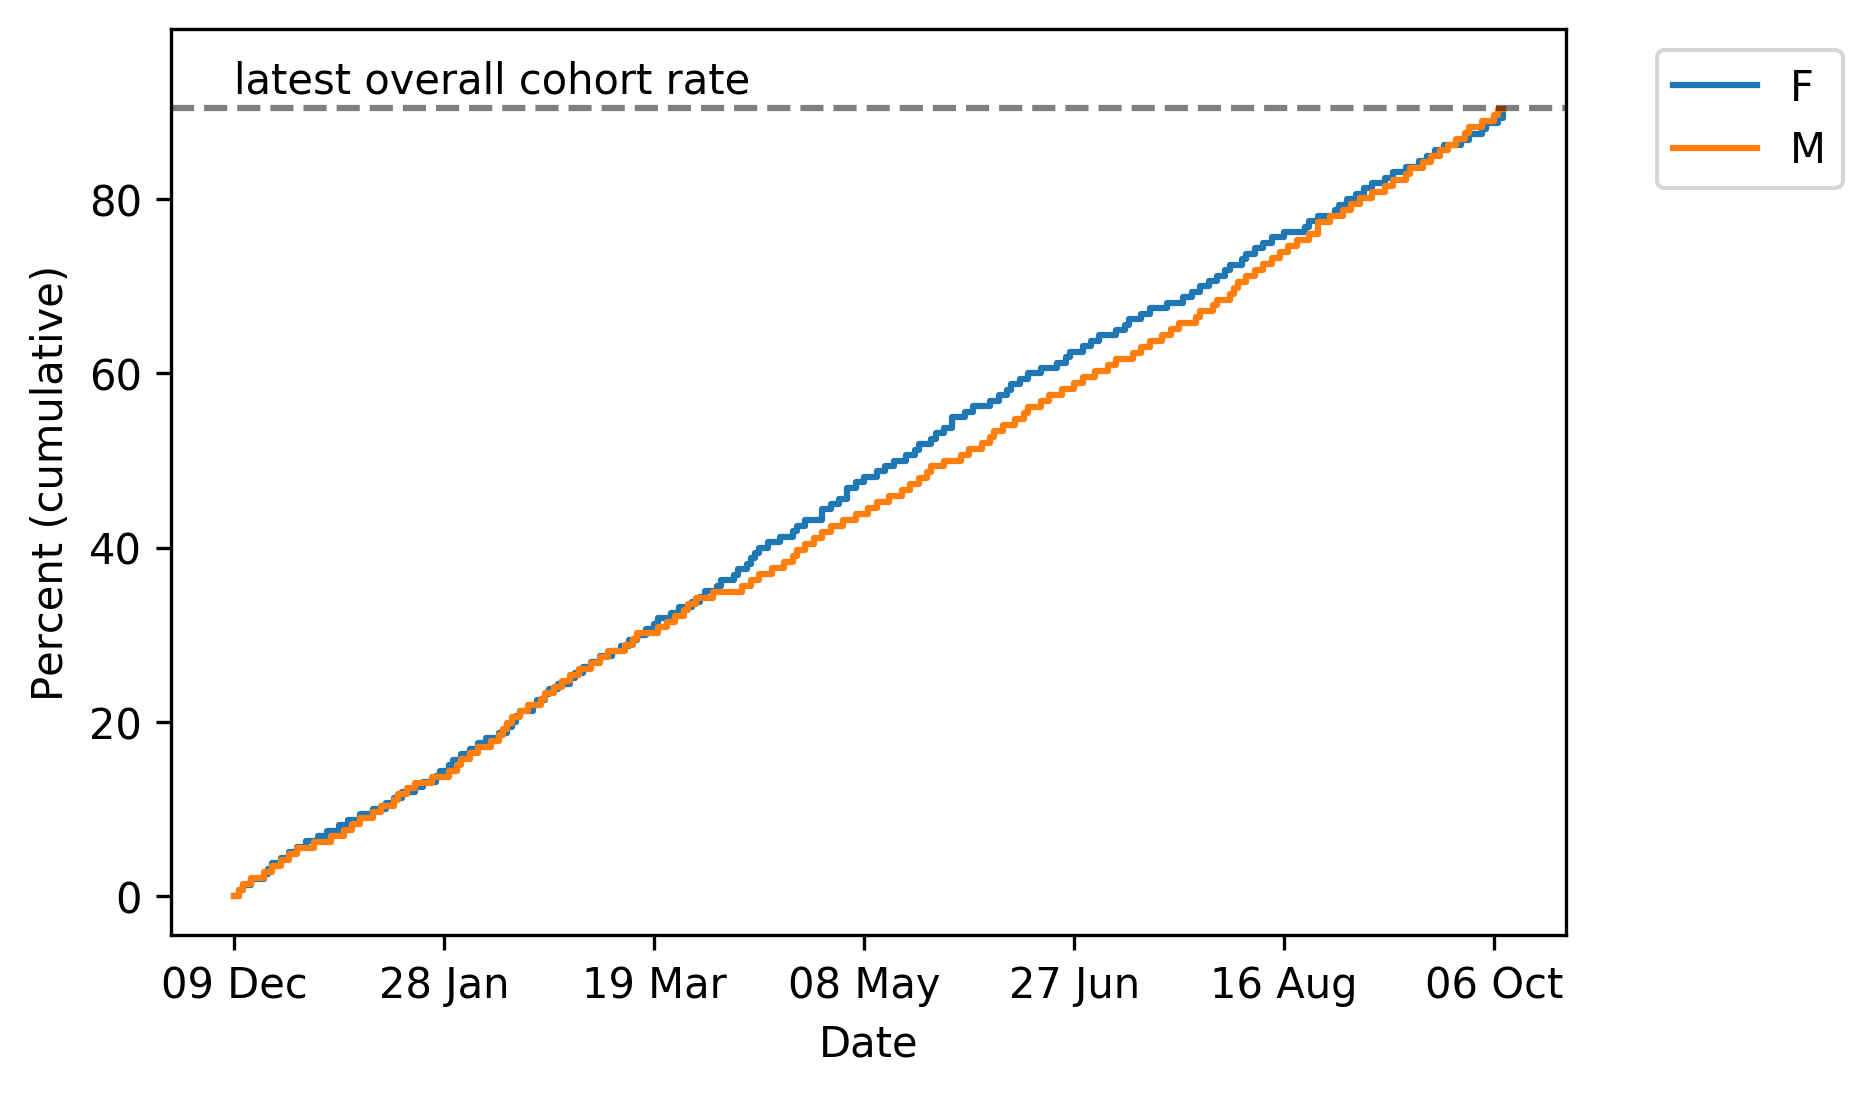

### COVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

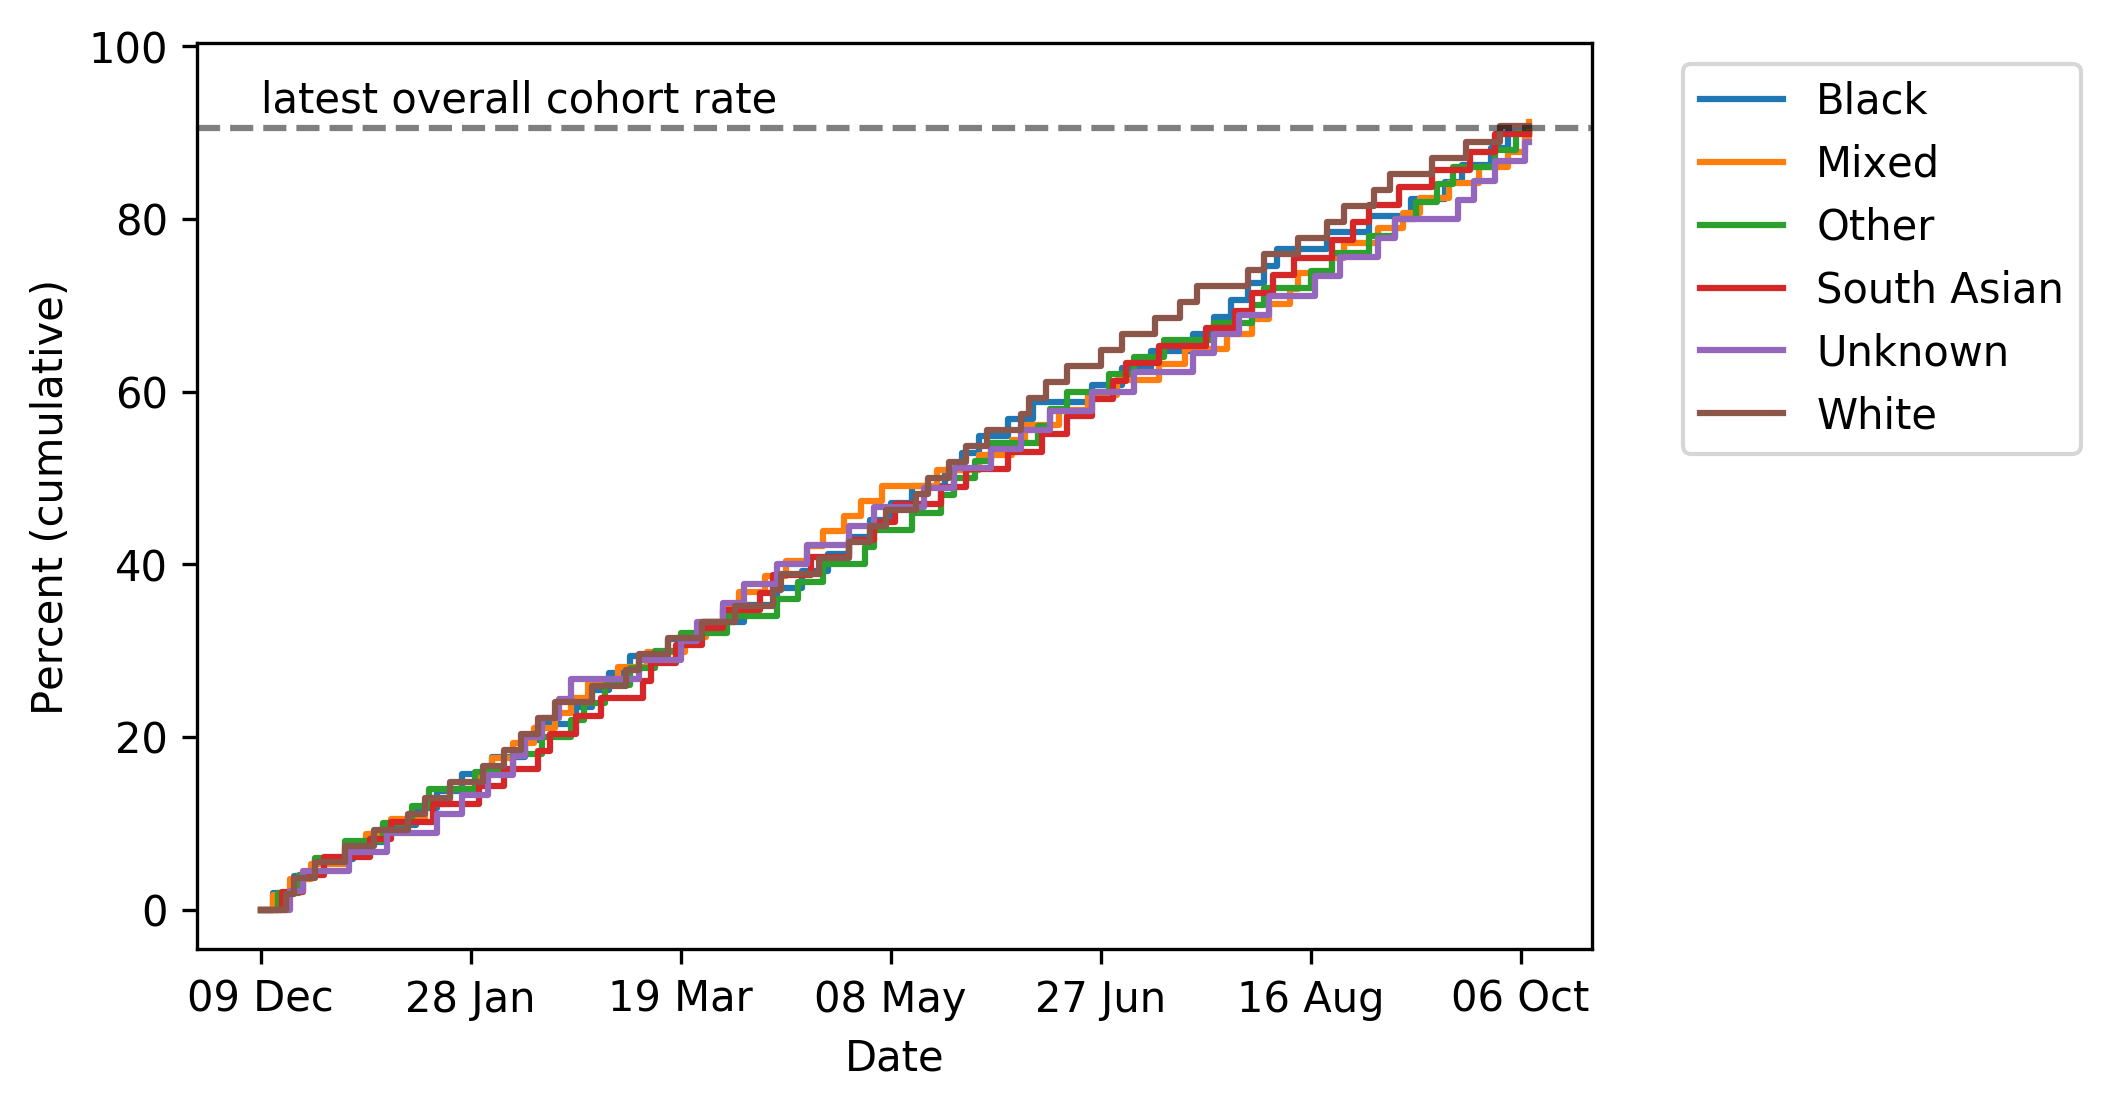

### COVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

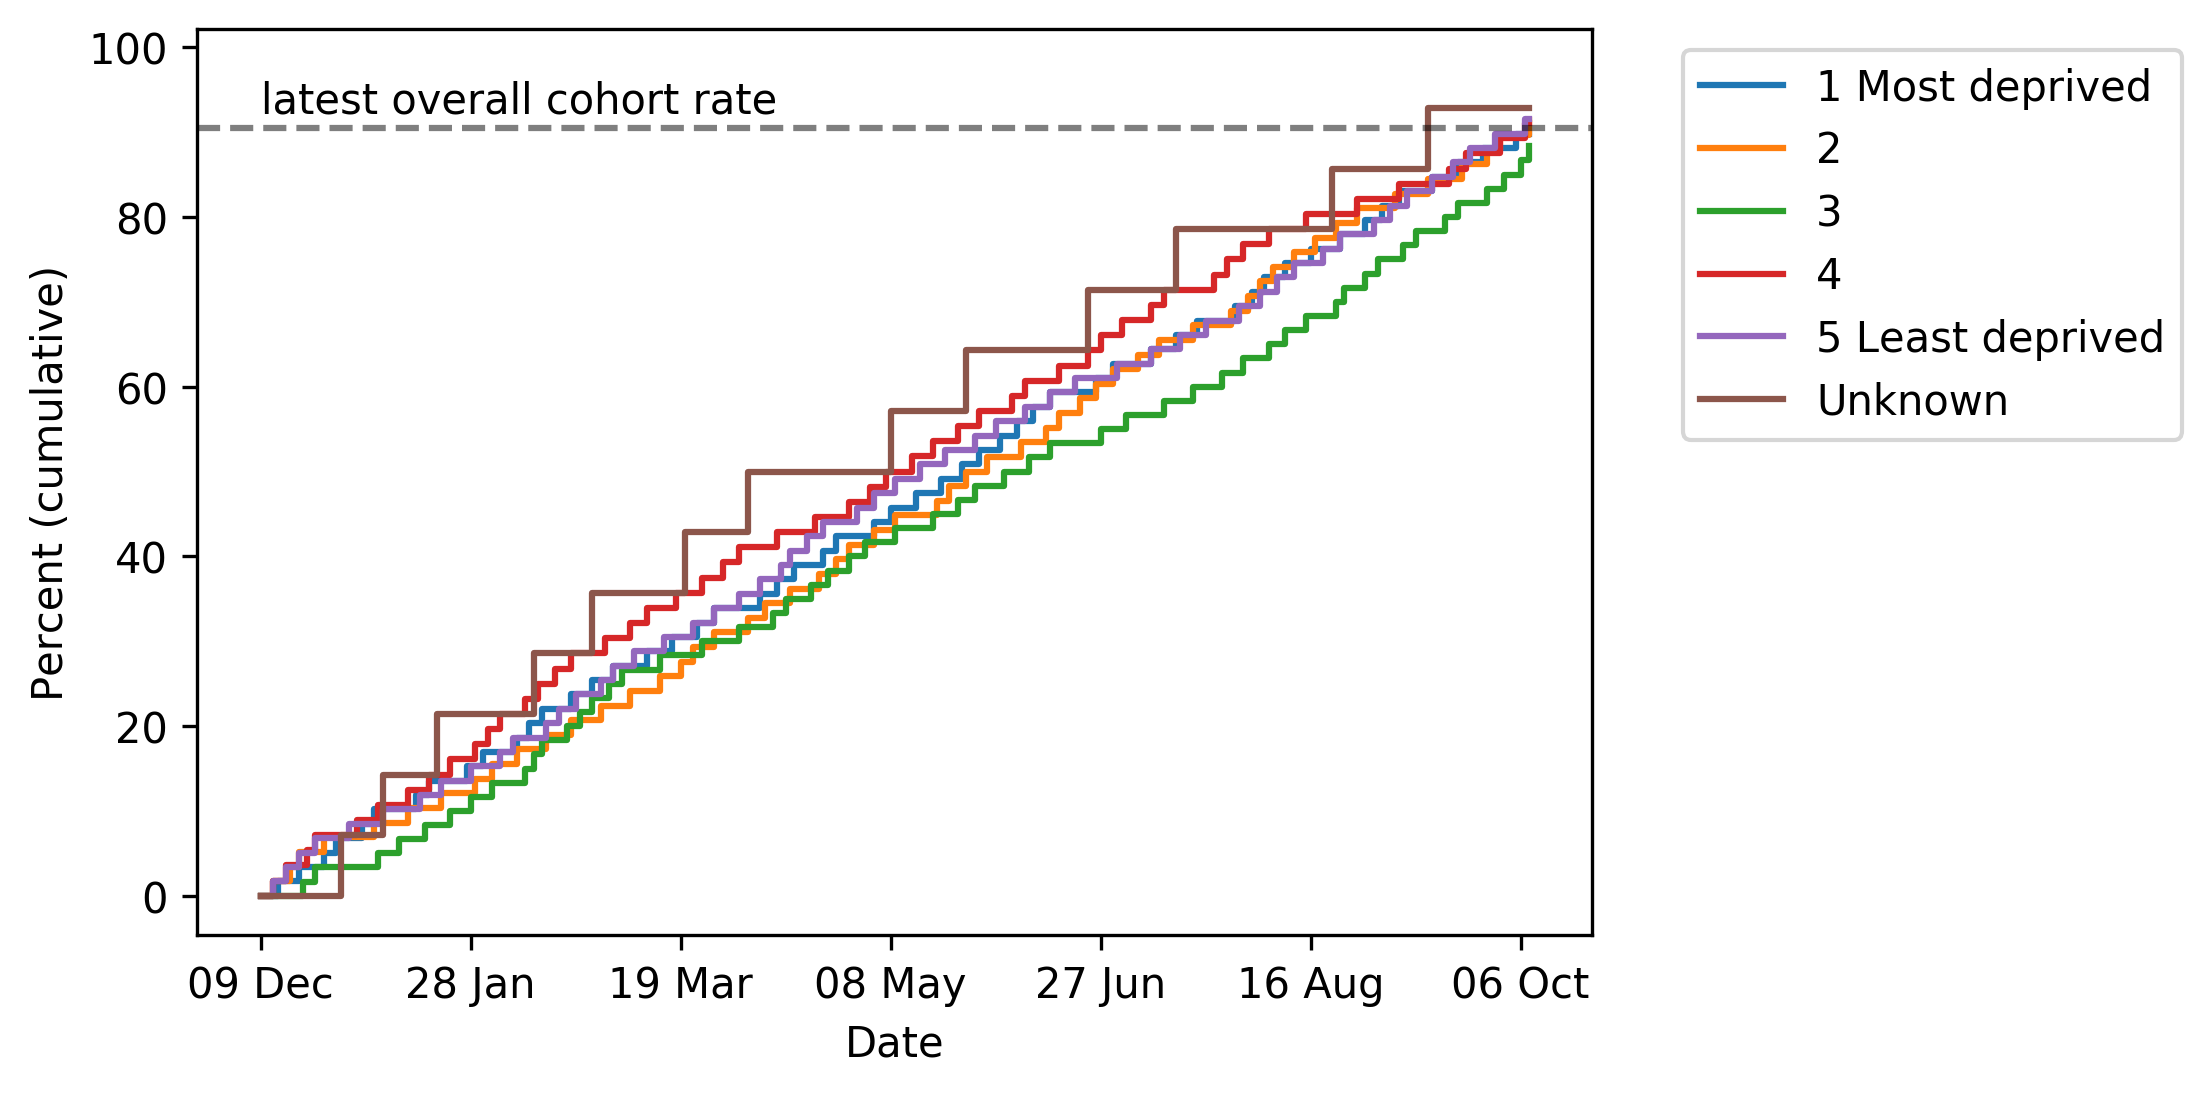

### COVID vaccinations among 65-69 population
 ### by BMI

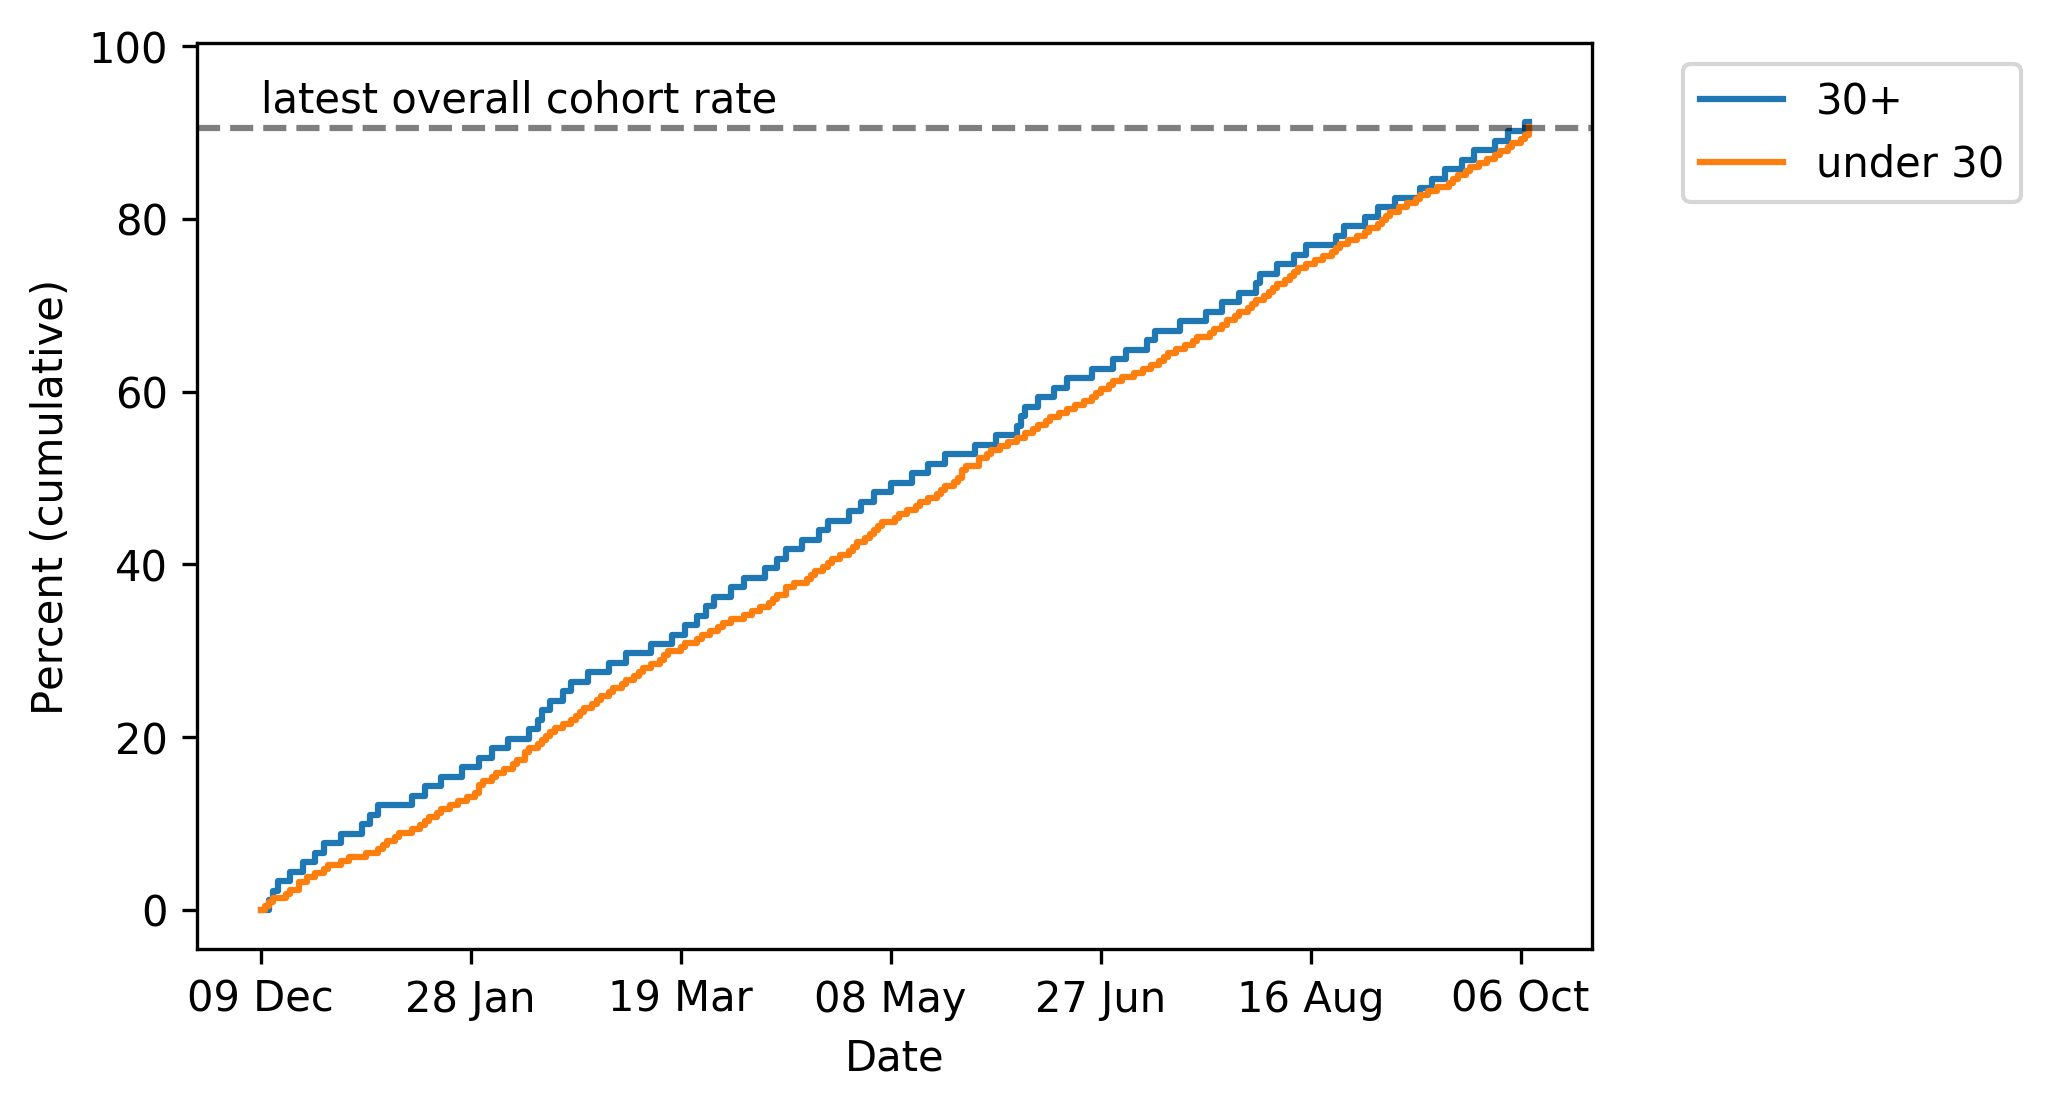

### COVID vaccinations among 65-69 population
 ### by Housebound

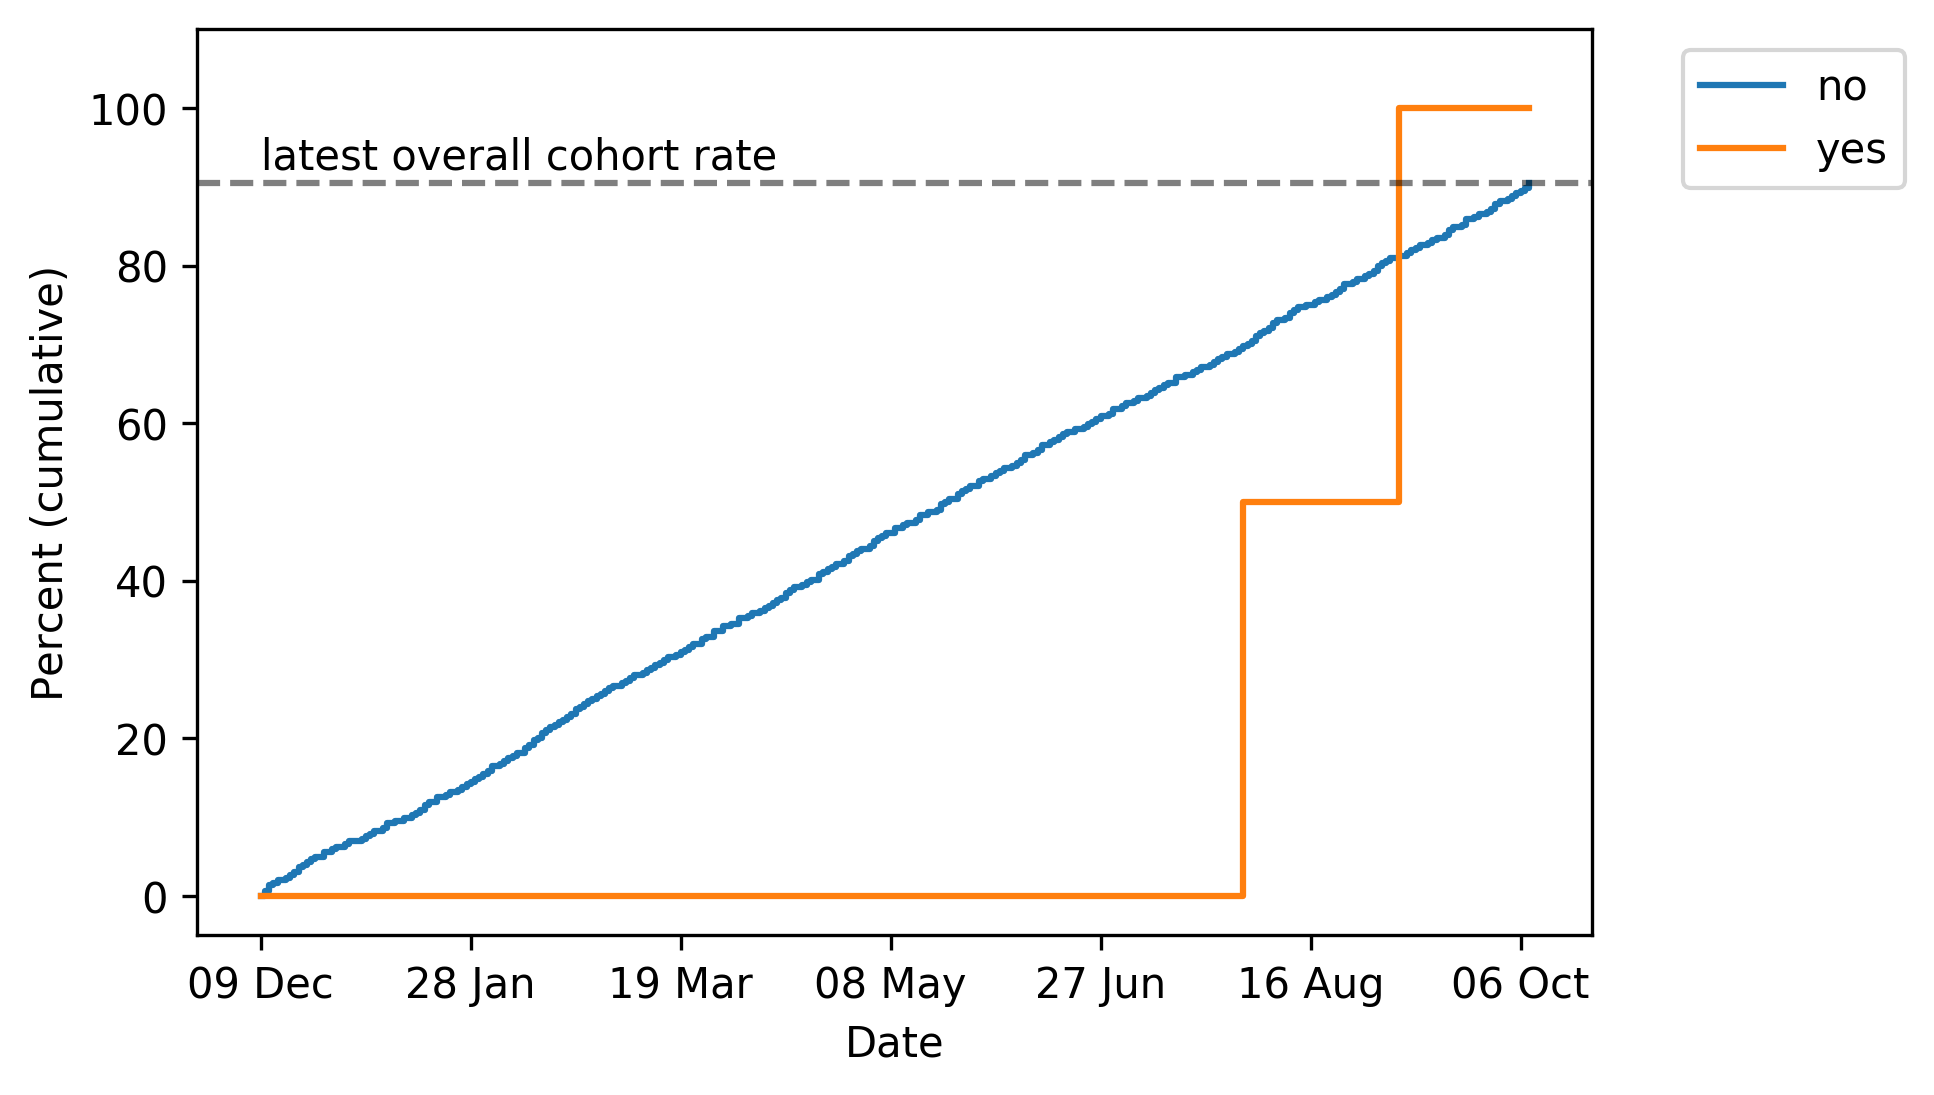

### COVID vaccinations among 65-69 population
 ### by Dementia

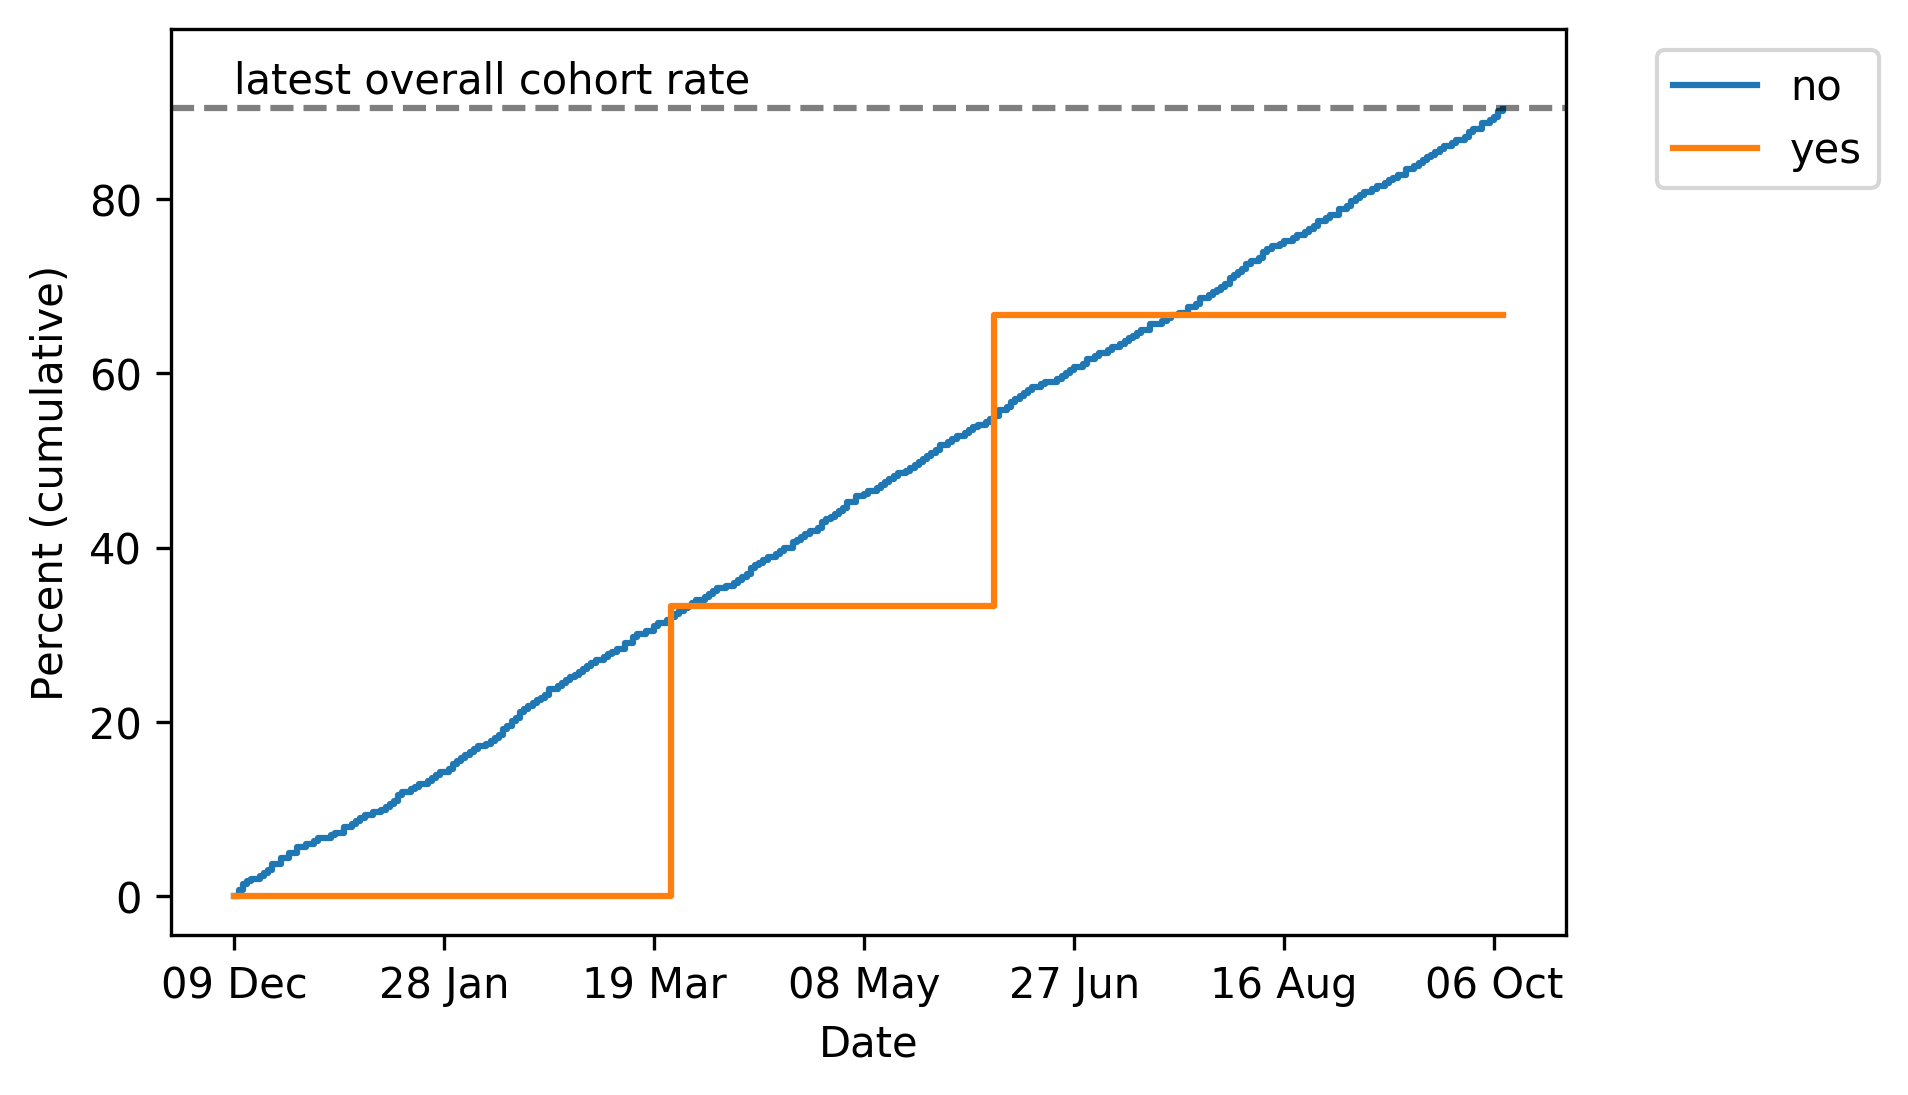

### COVID vaccinations among 65-69 population
 ### by Learning disability

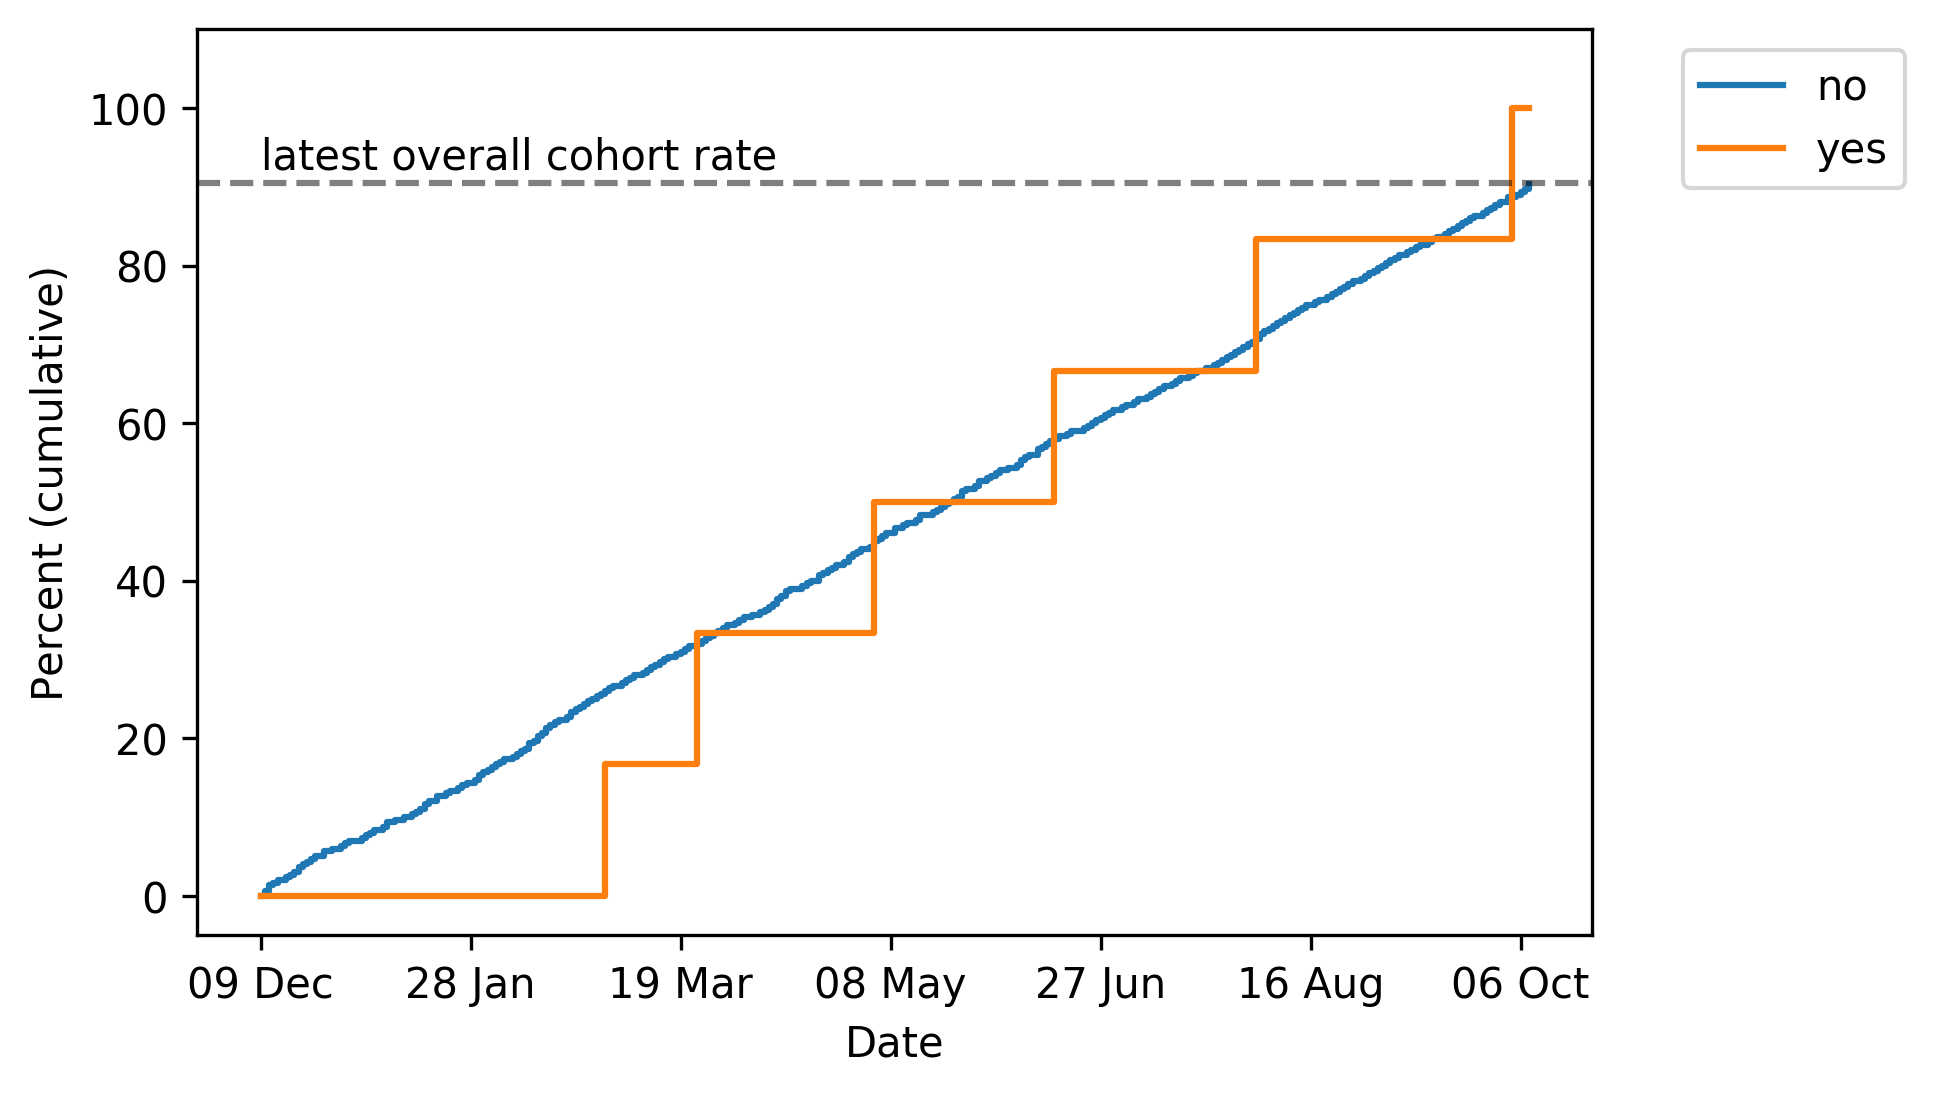

### COVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

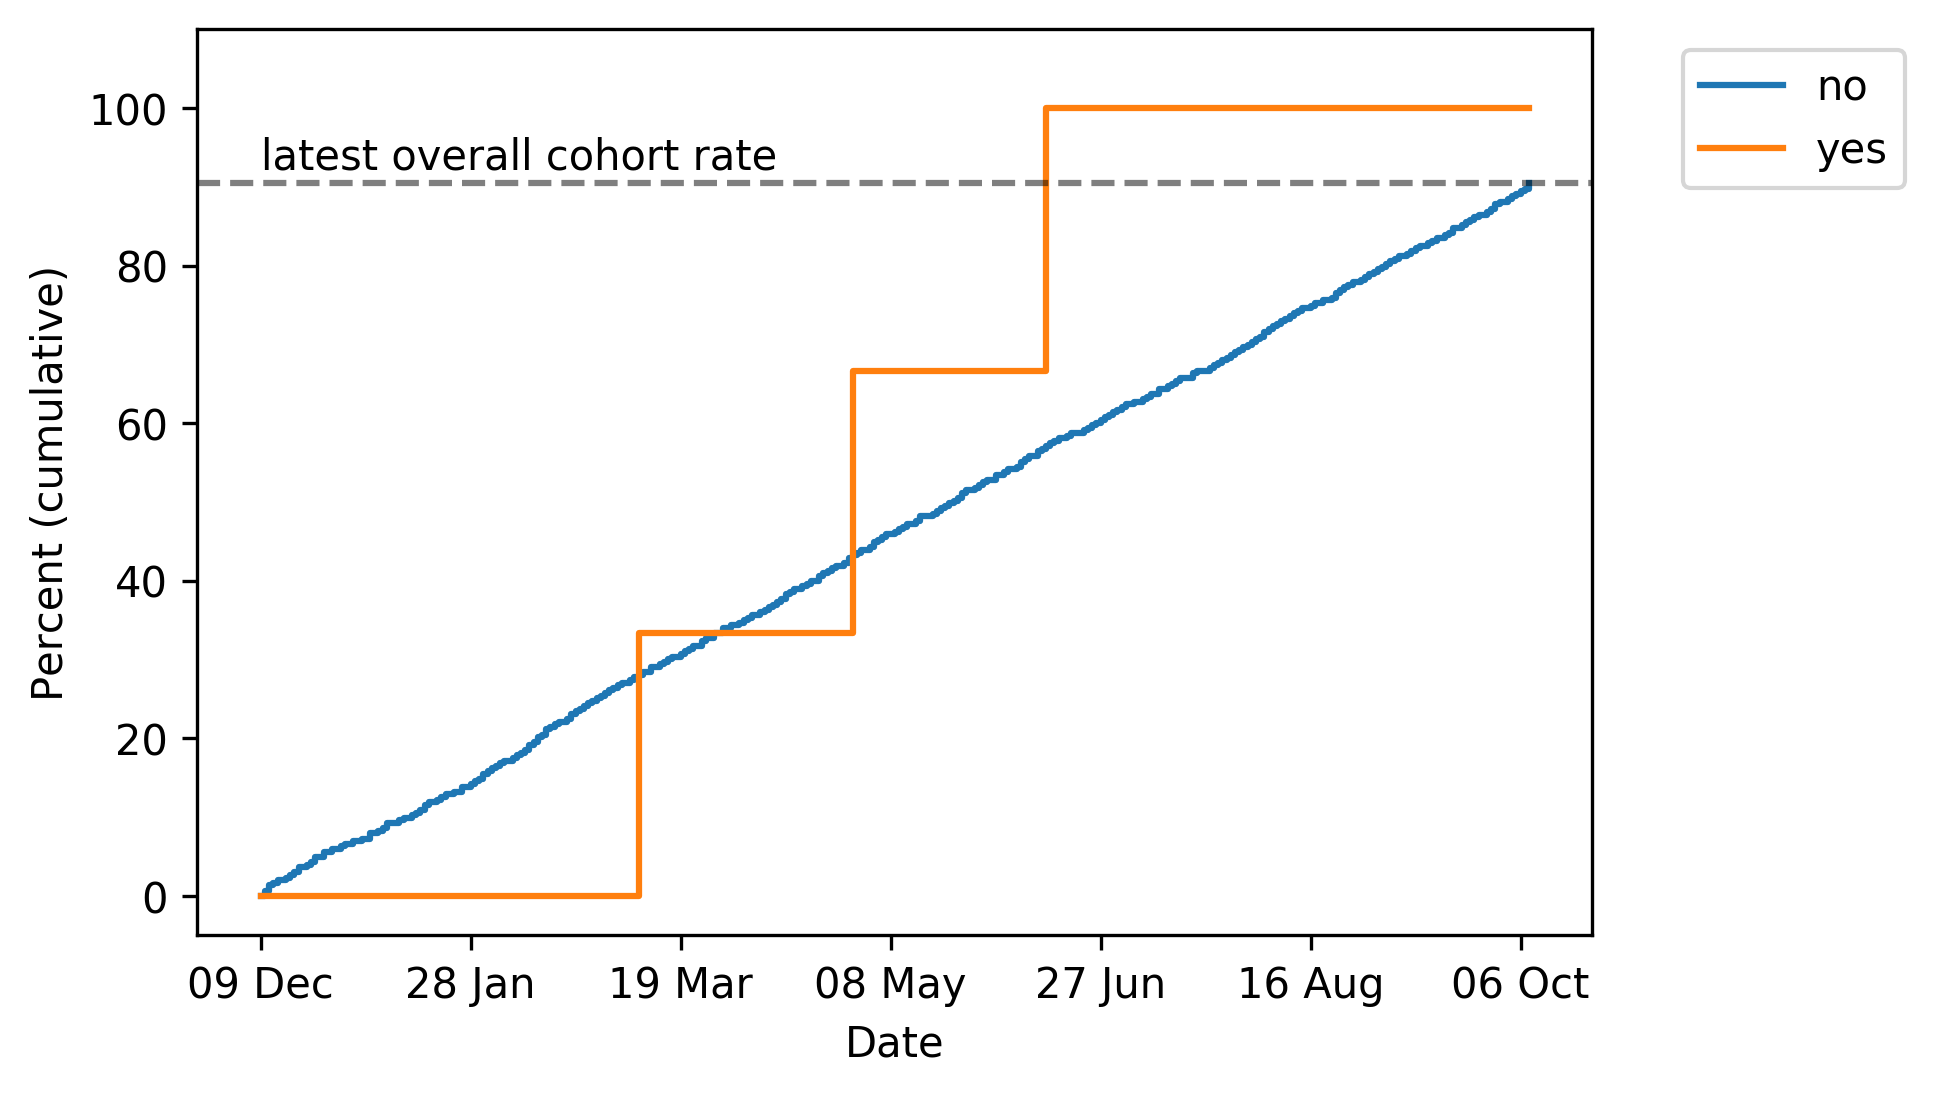

### COVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

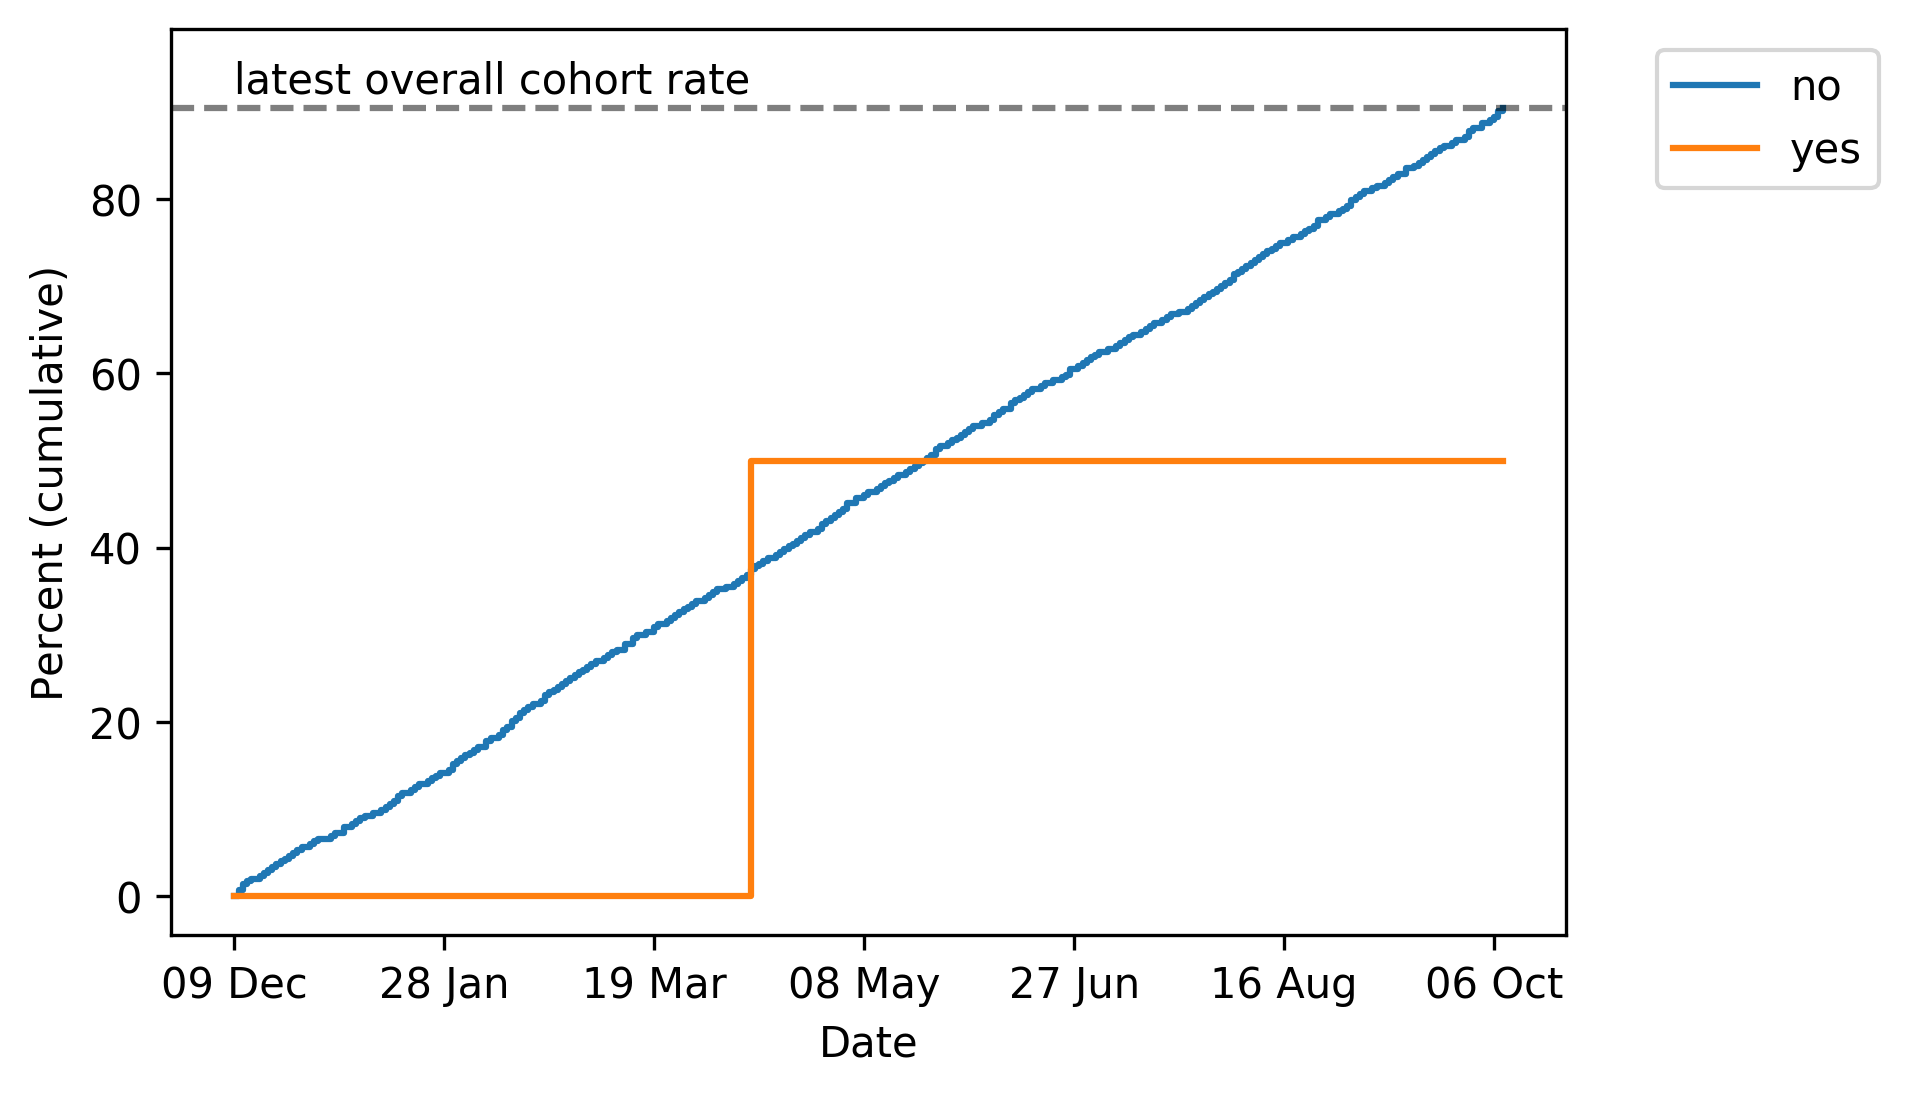

In [7]:
display(Markdown("## 65-69 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="65-69", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 60-64 population according to demographic/clinical features, cumulatively by day. <a name='charts60' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 60-64 population

### COVID vaccinations among 60-64 population
 ### by Sex

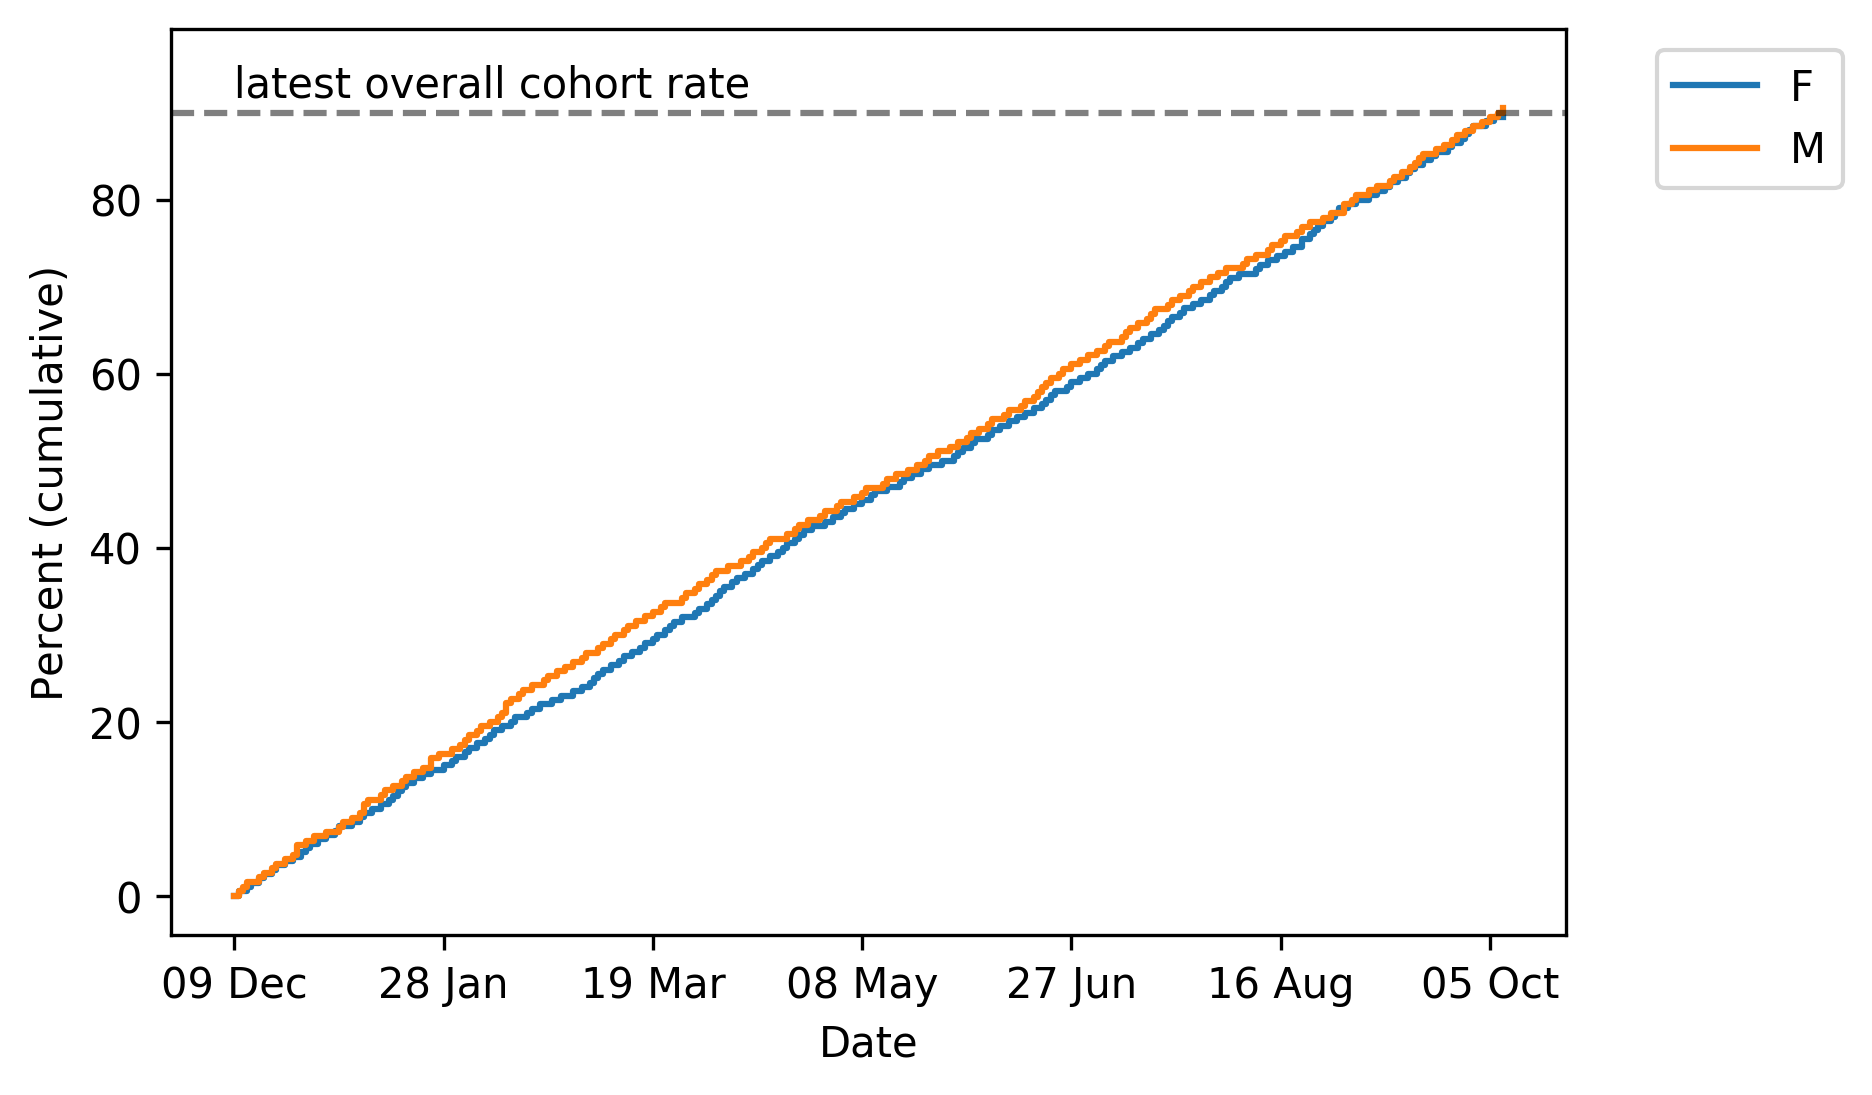

### COVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

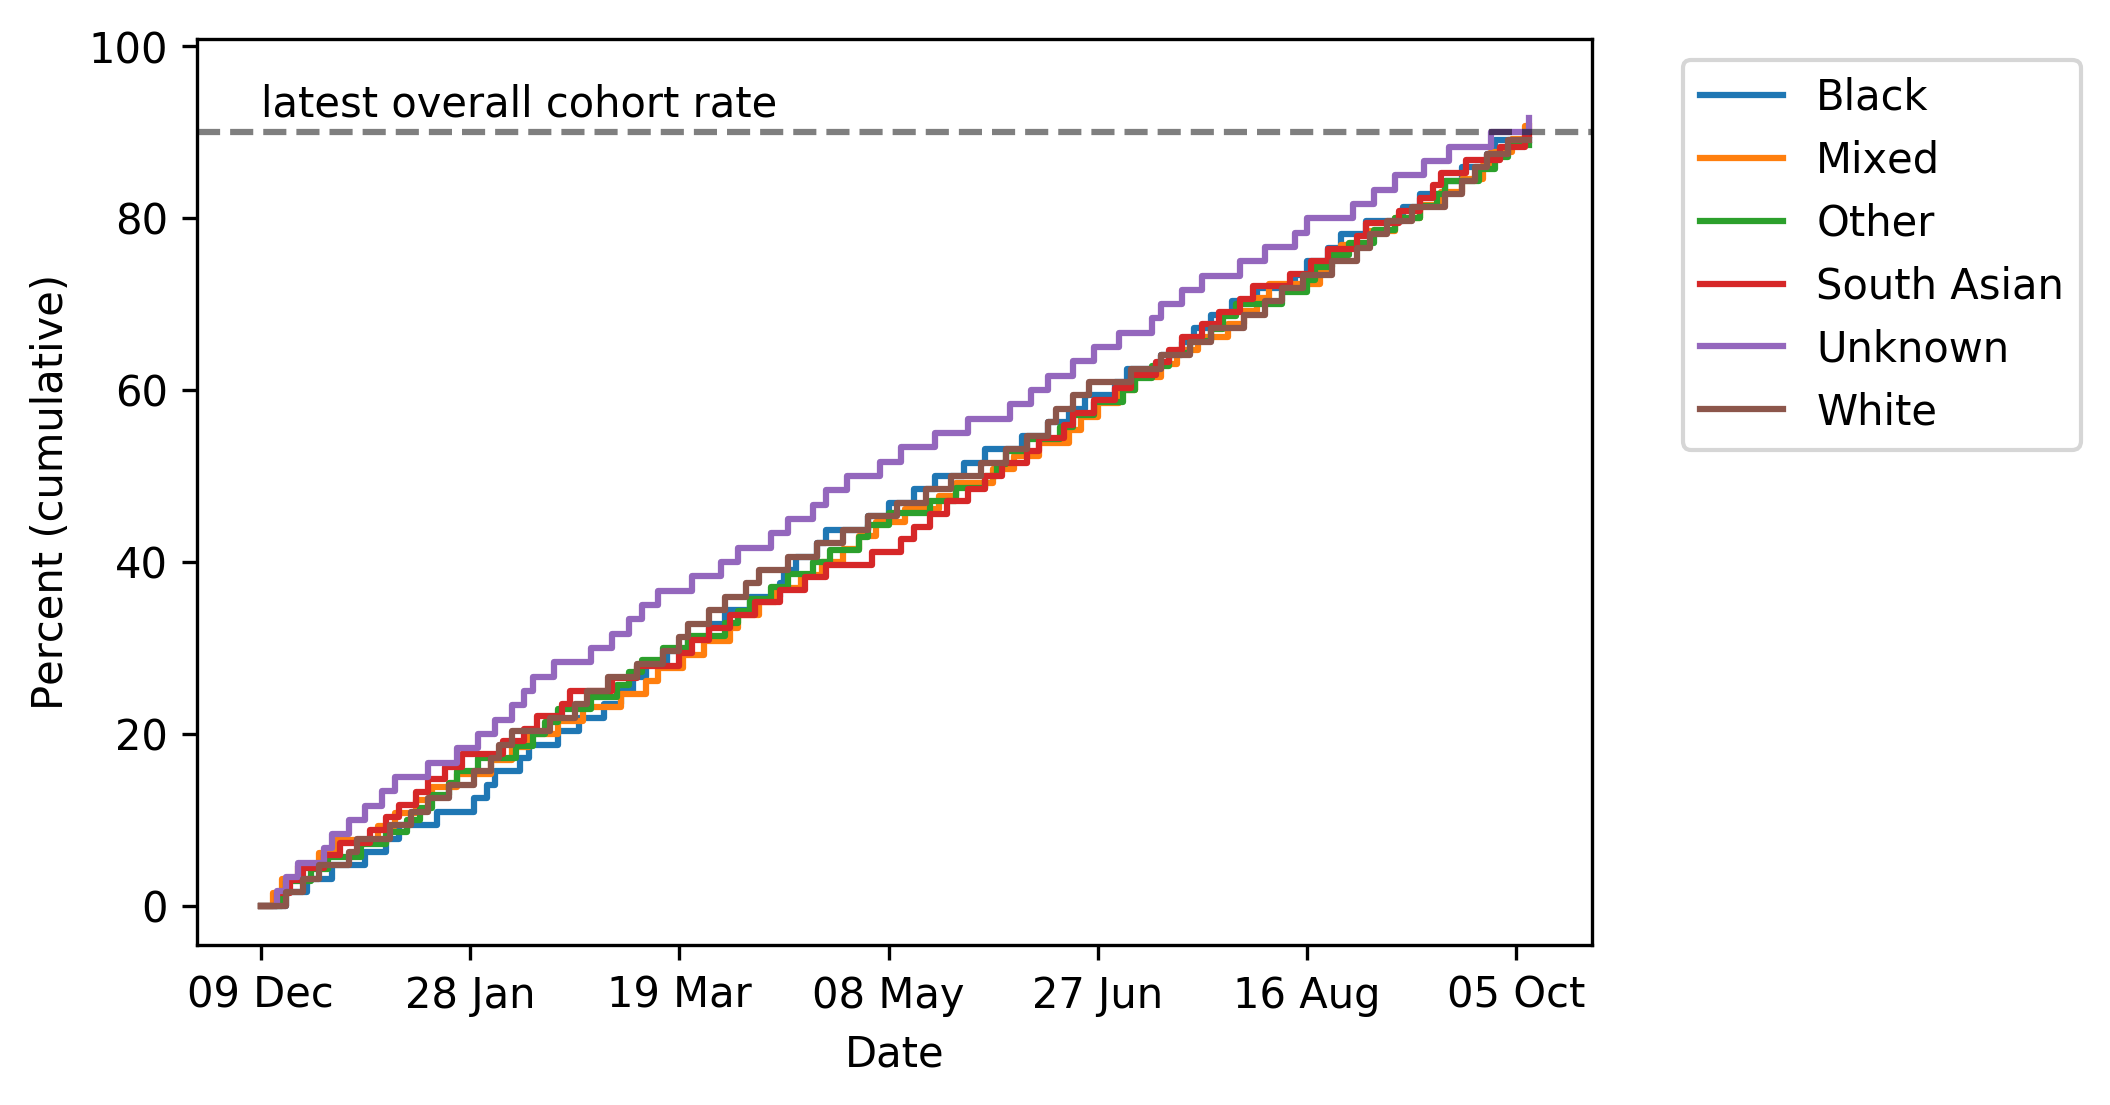

### COVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

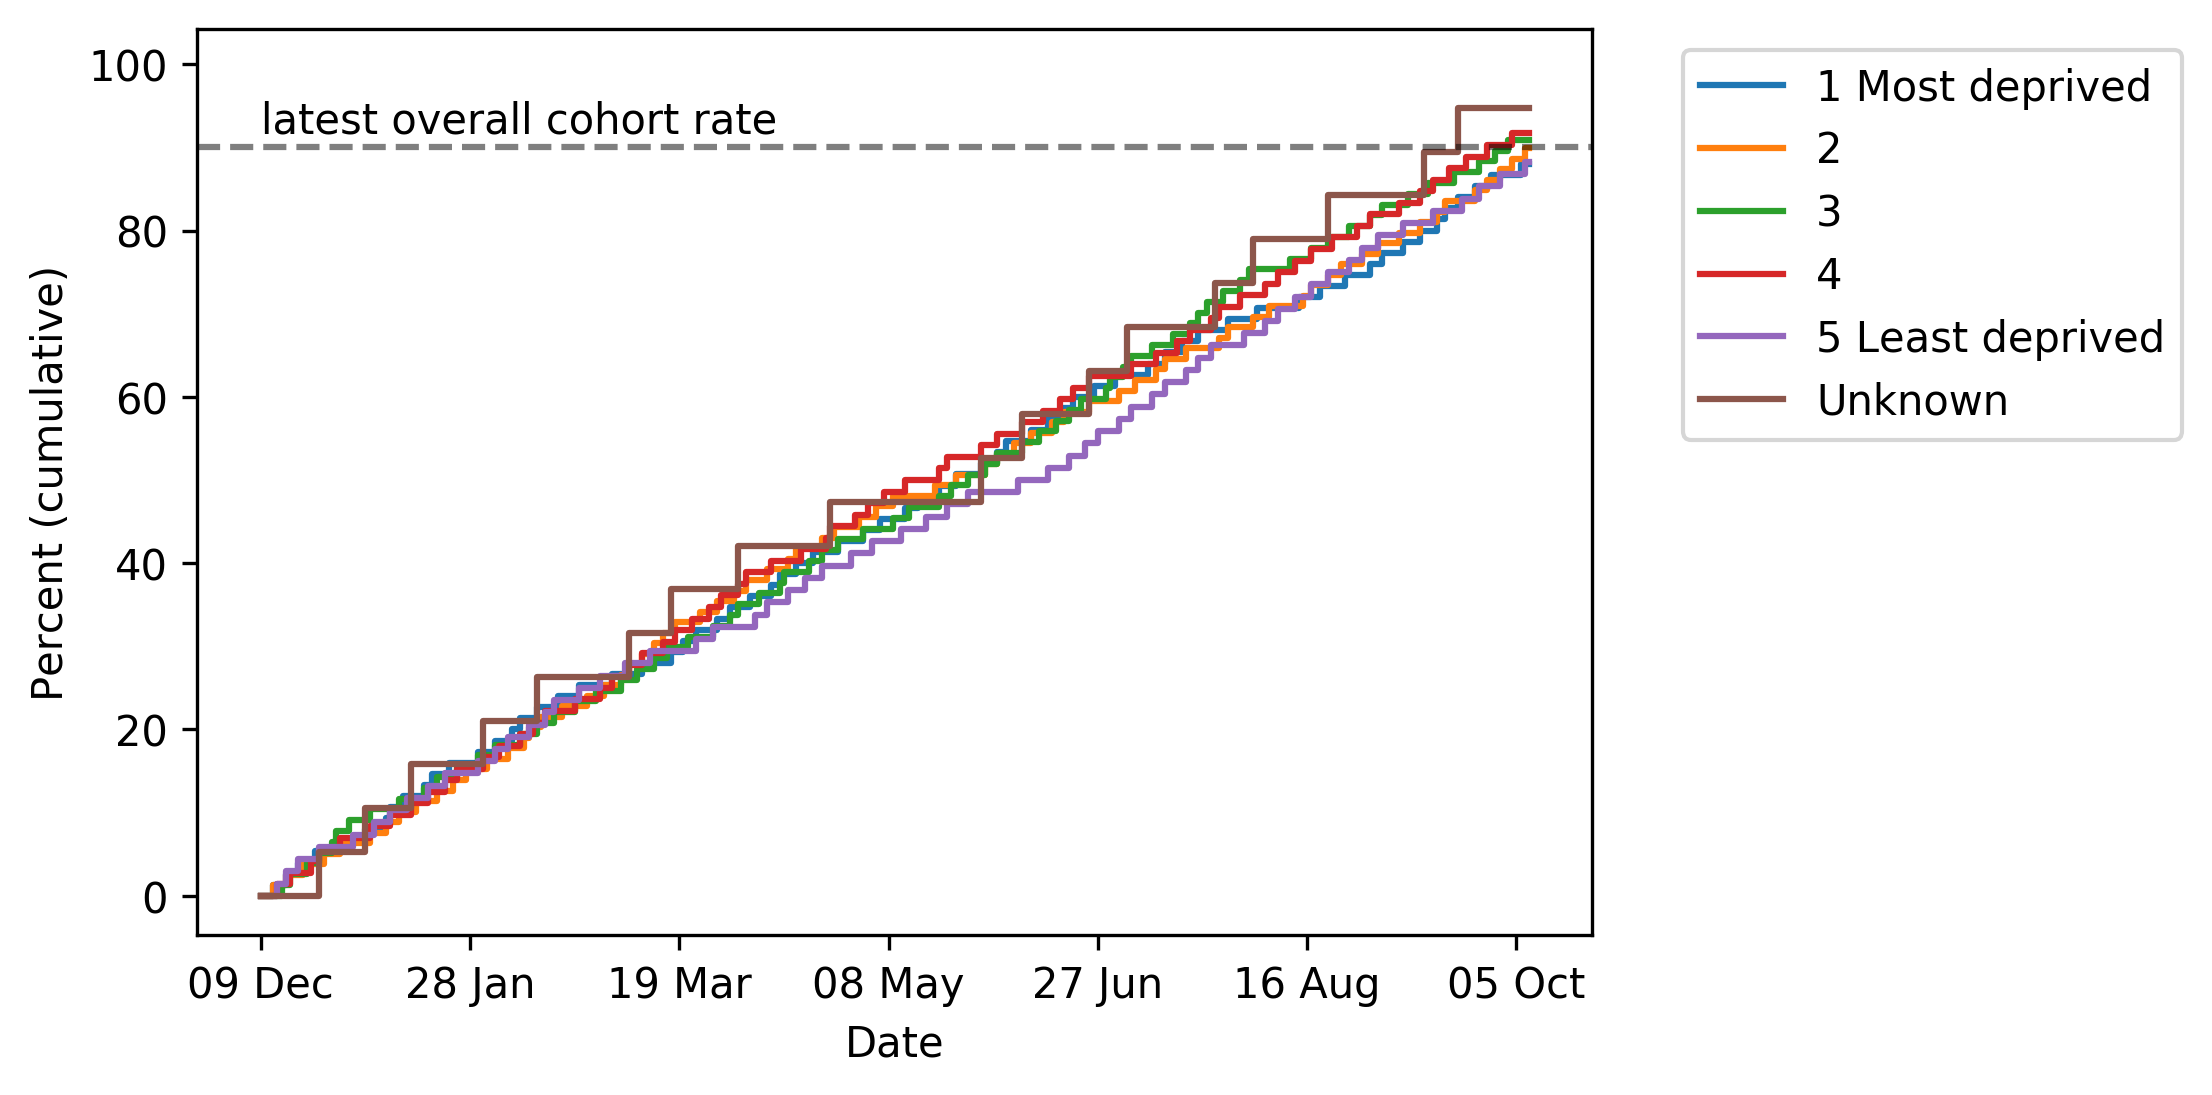

### COVID vaccinations among 60-64 population
 ### by BMI

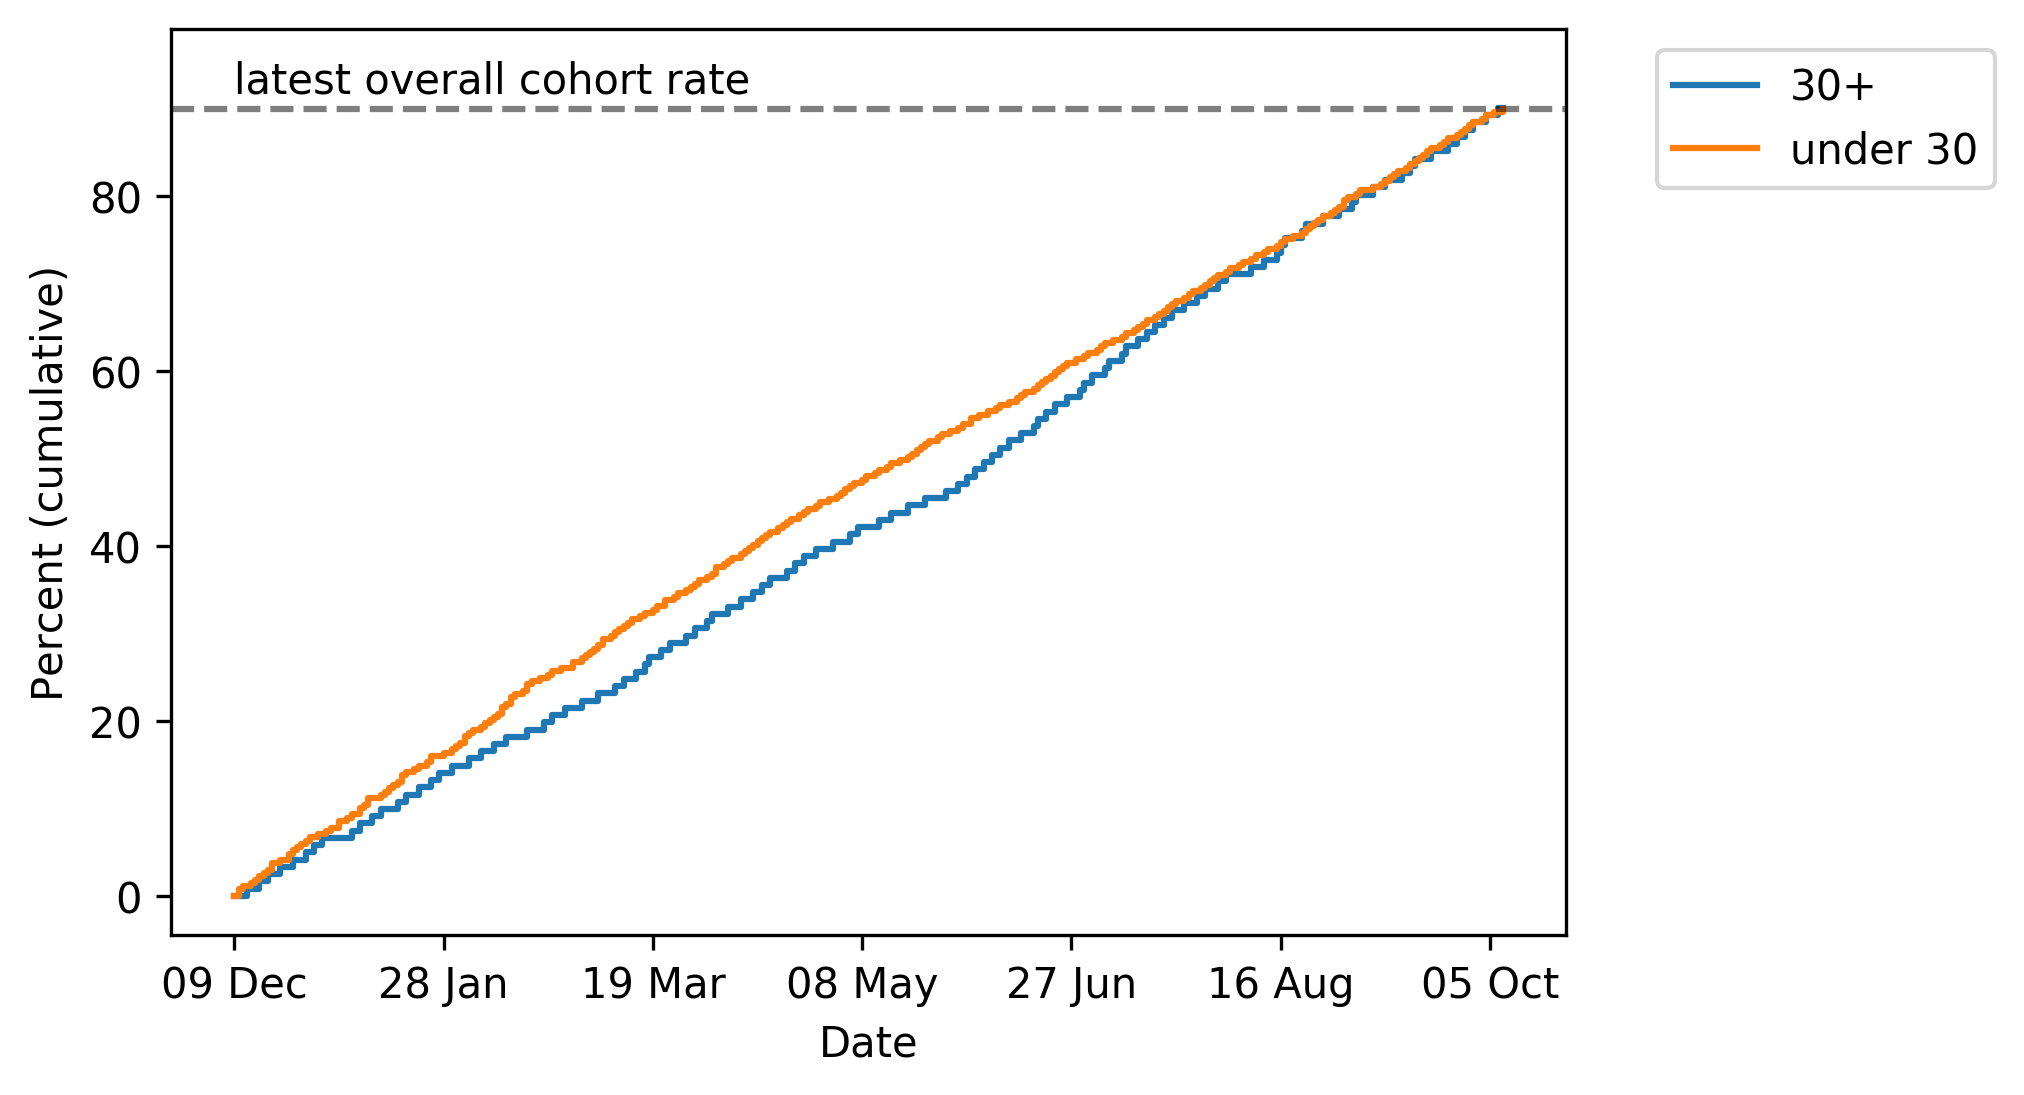

### COVID vaccinations among 60-64 population
 ### by Dementia

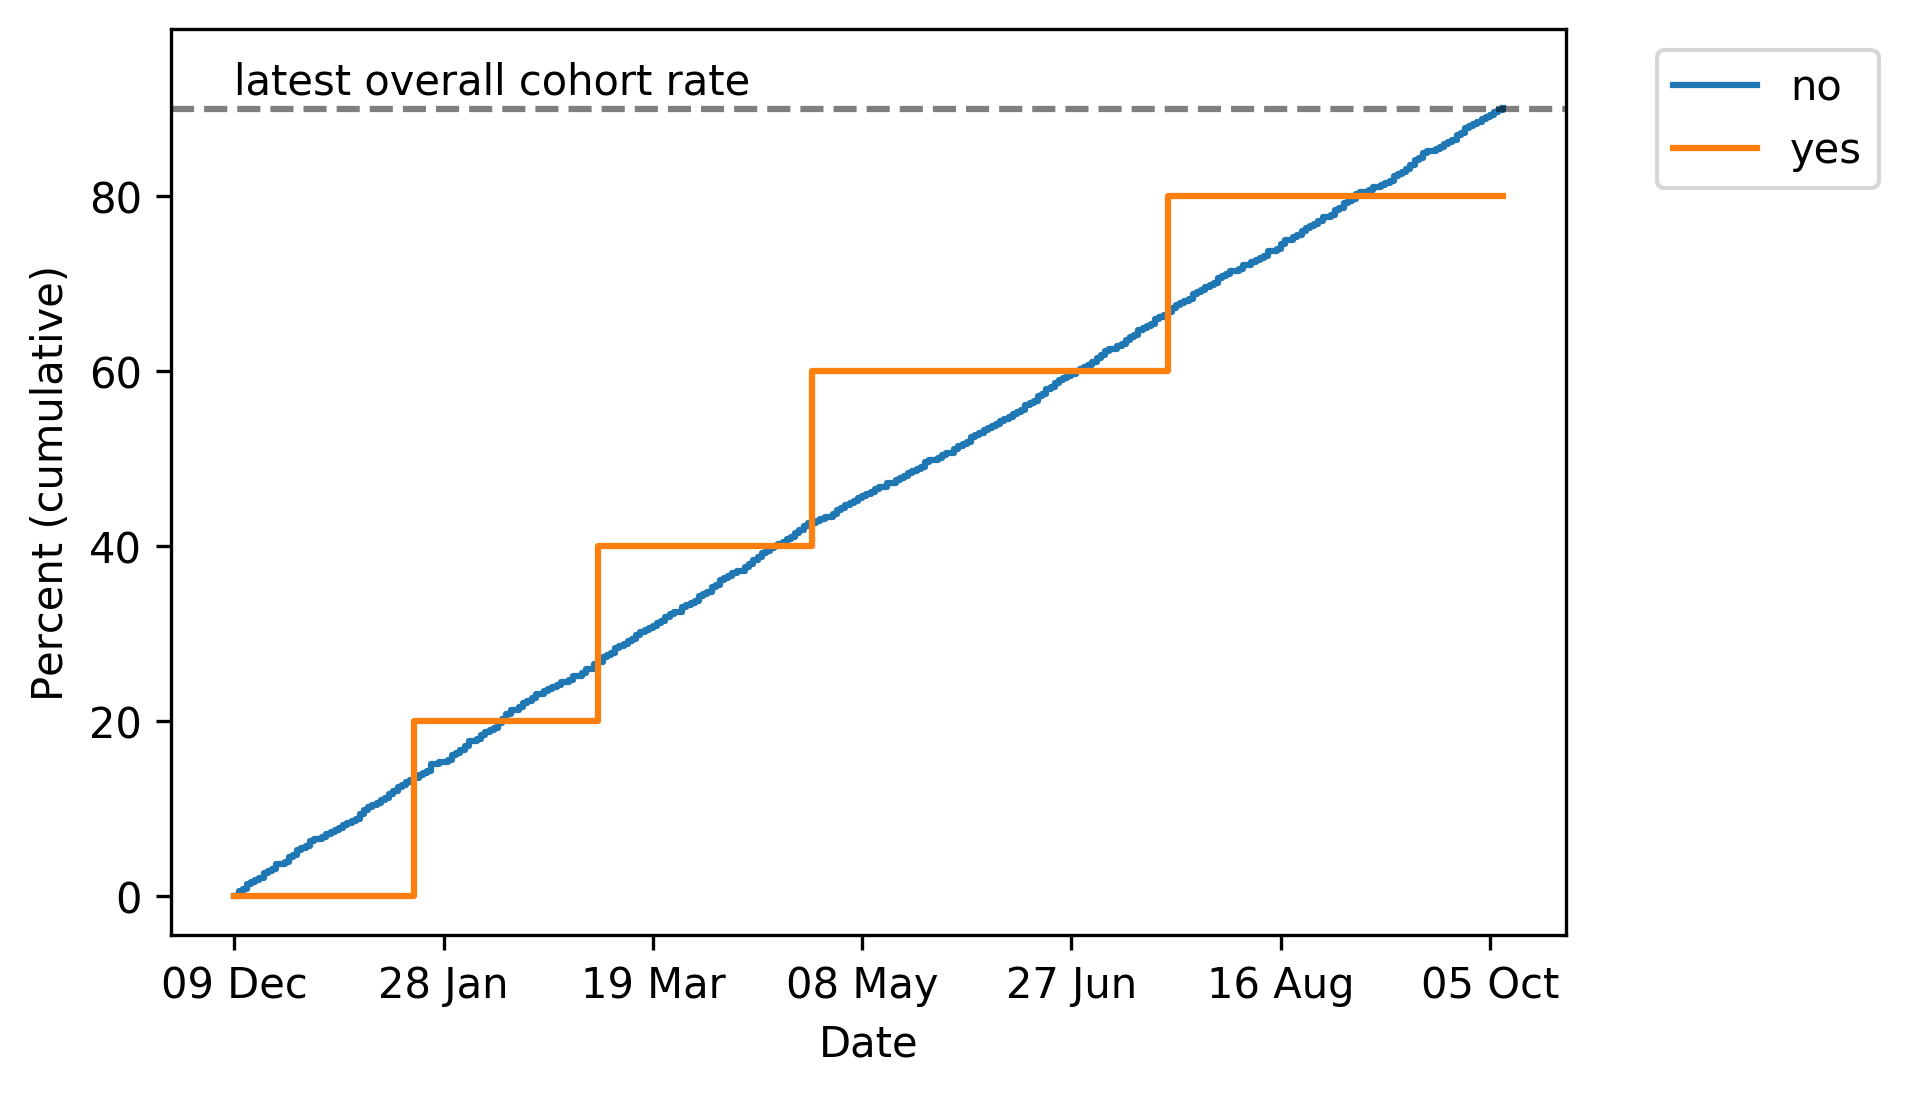

### COVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

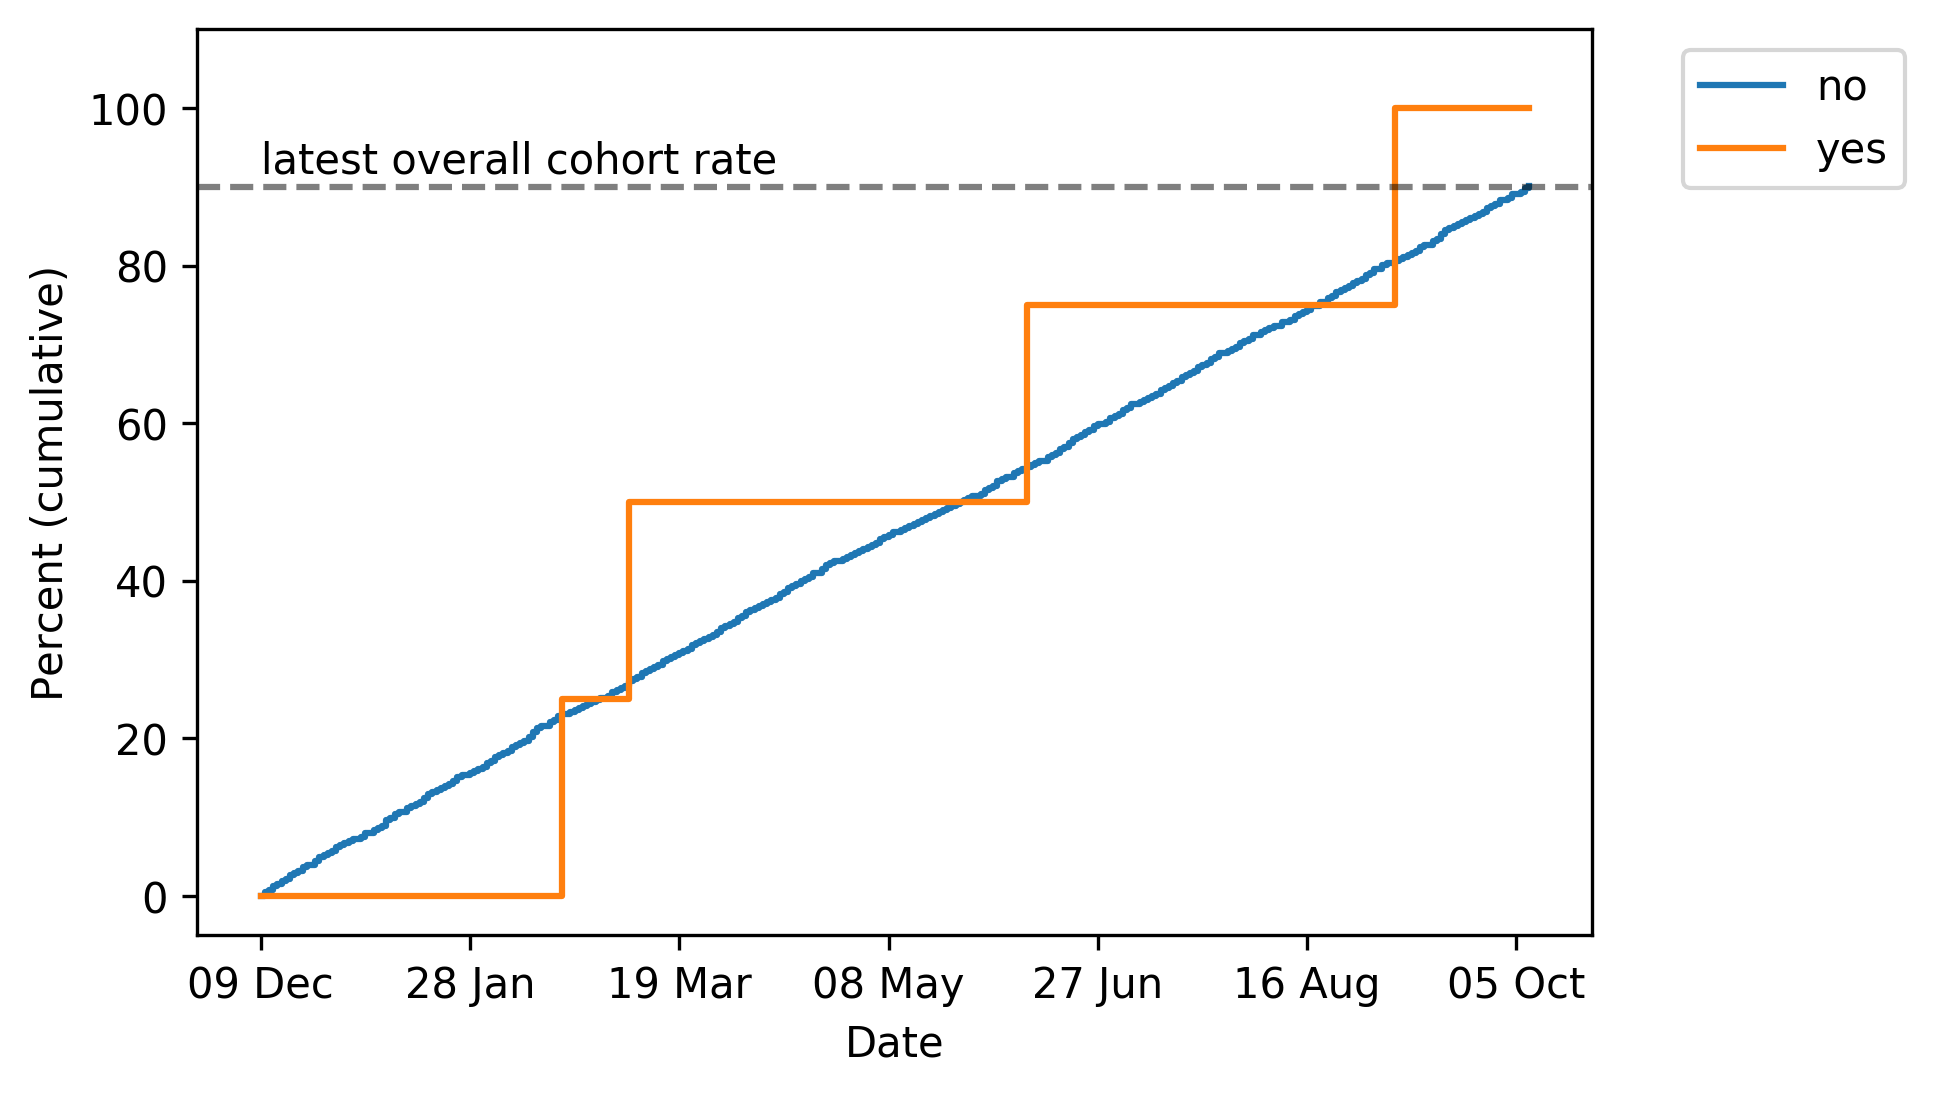

### COVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

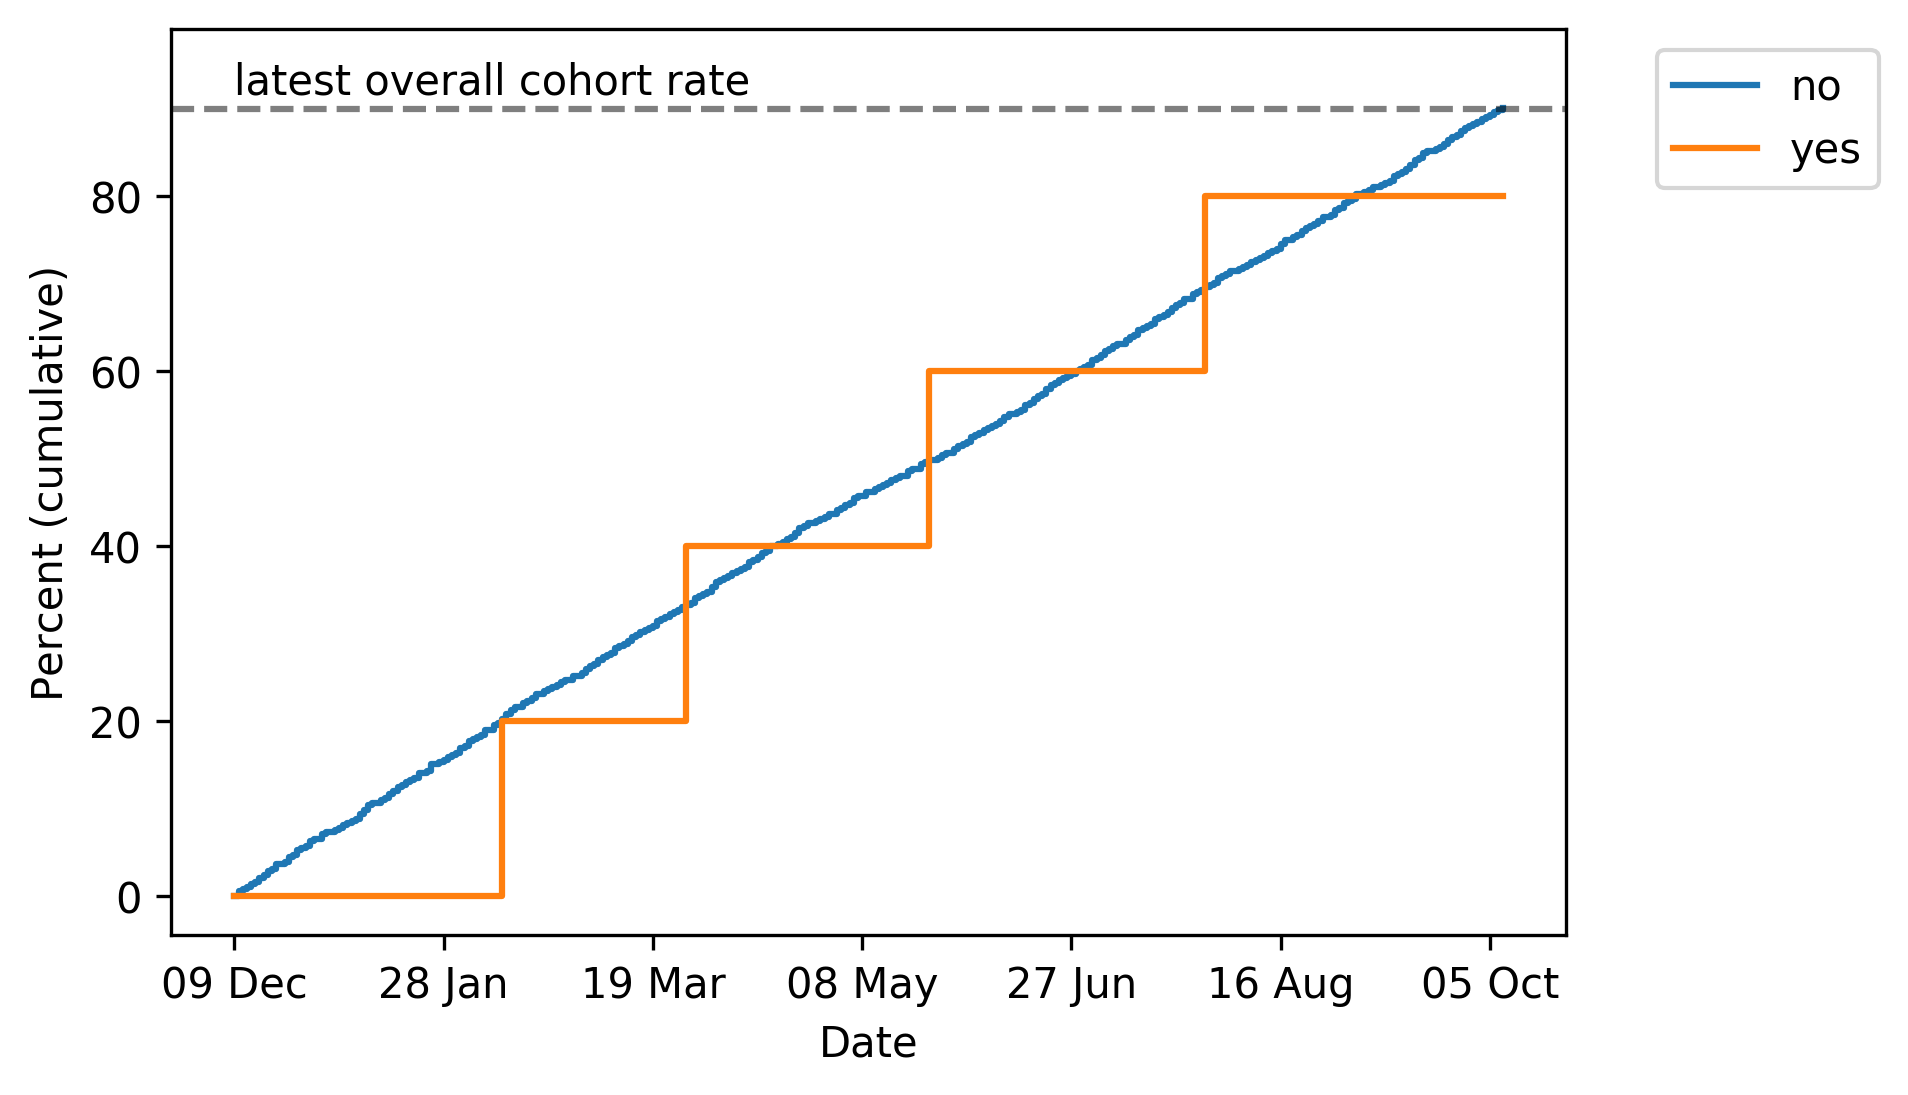

In [8]:
display(Markdown("## 60-64 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="60-64", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 55-59 population according to demographic/clinical features, cumulatively by day. <a name='charts55' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 55-59 population

### COVID vaccinations among 55-59 population
 ### by Sex

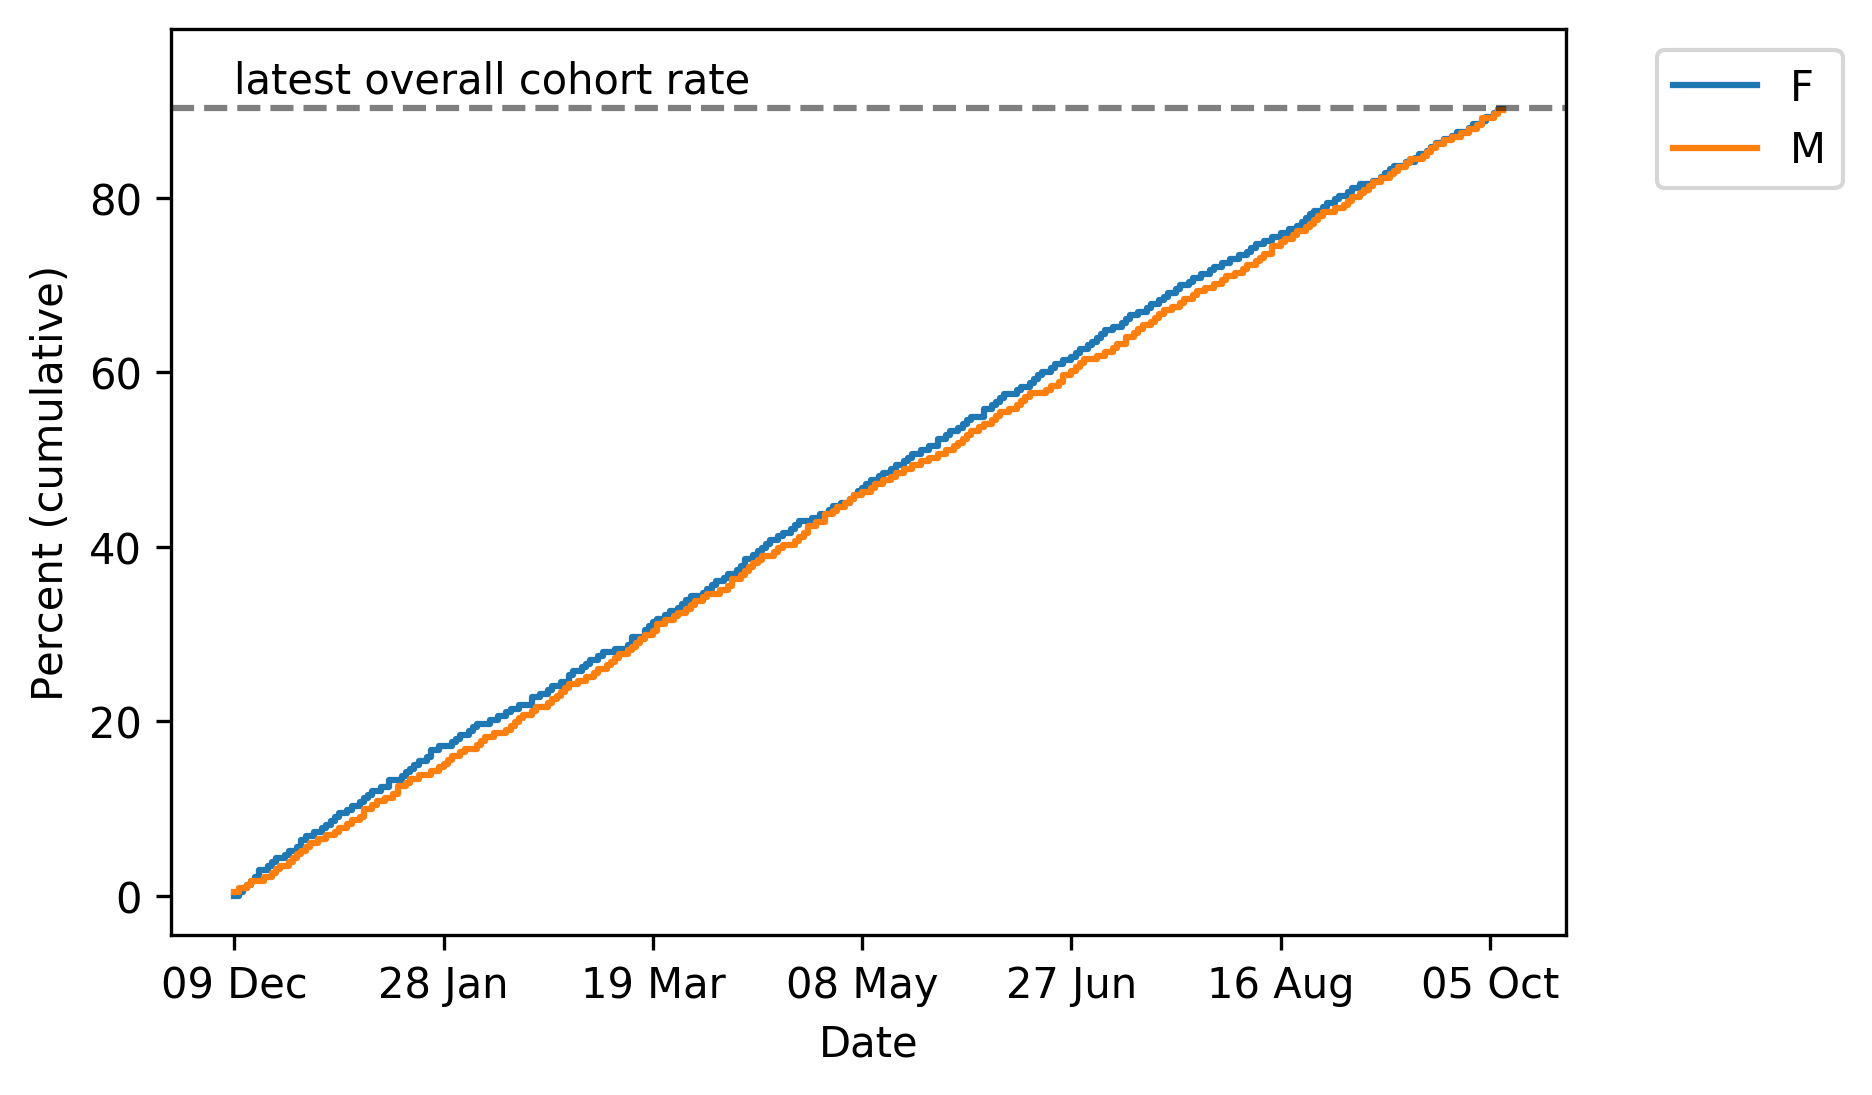

### COVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

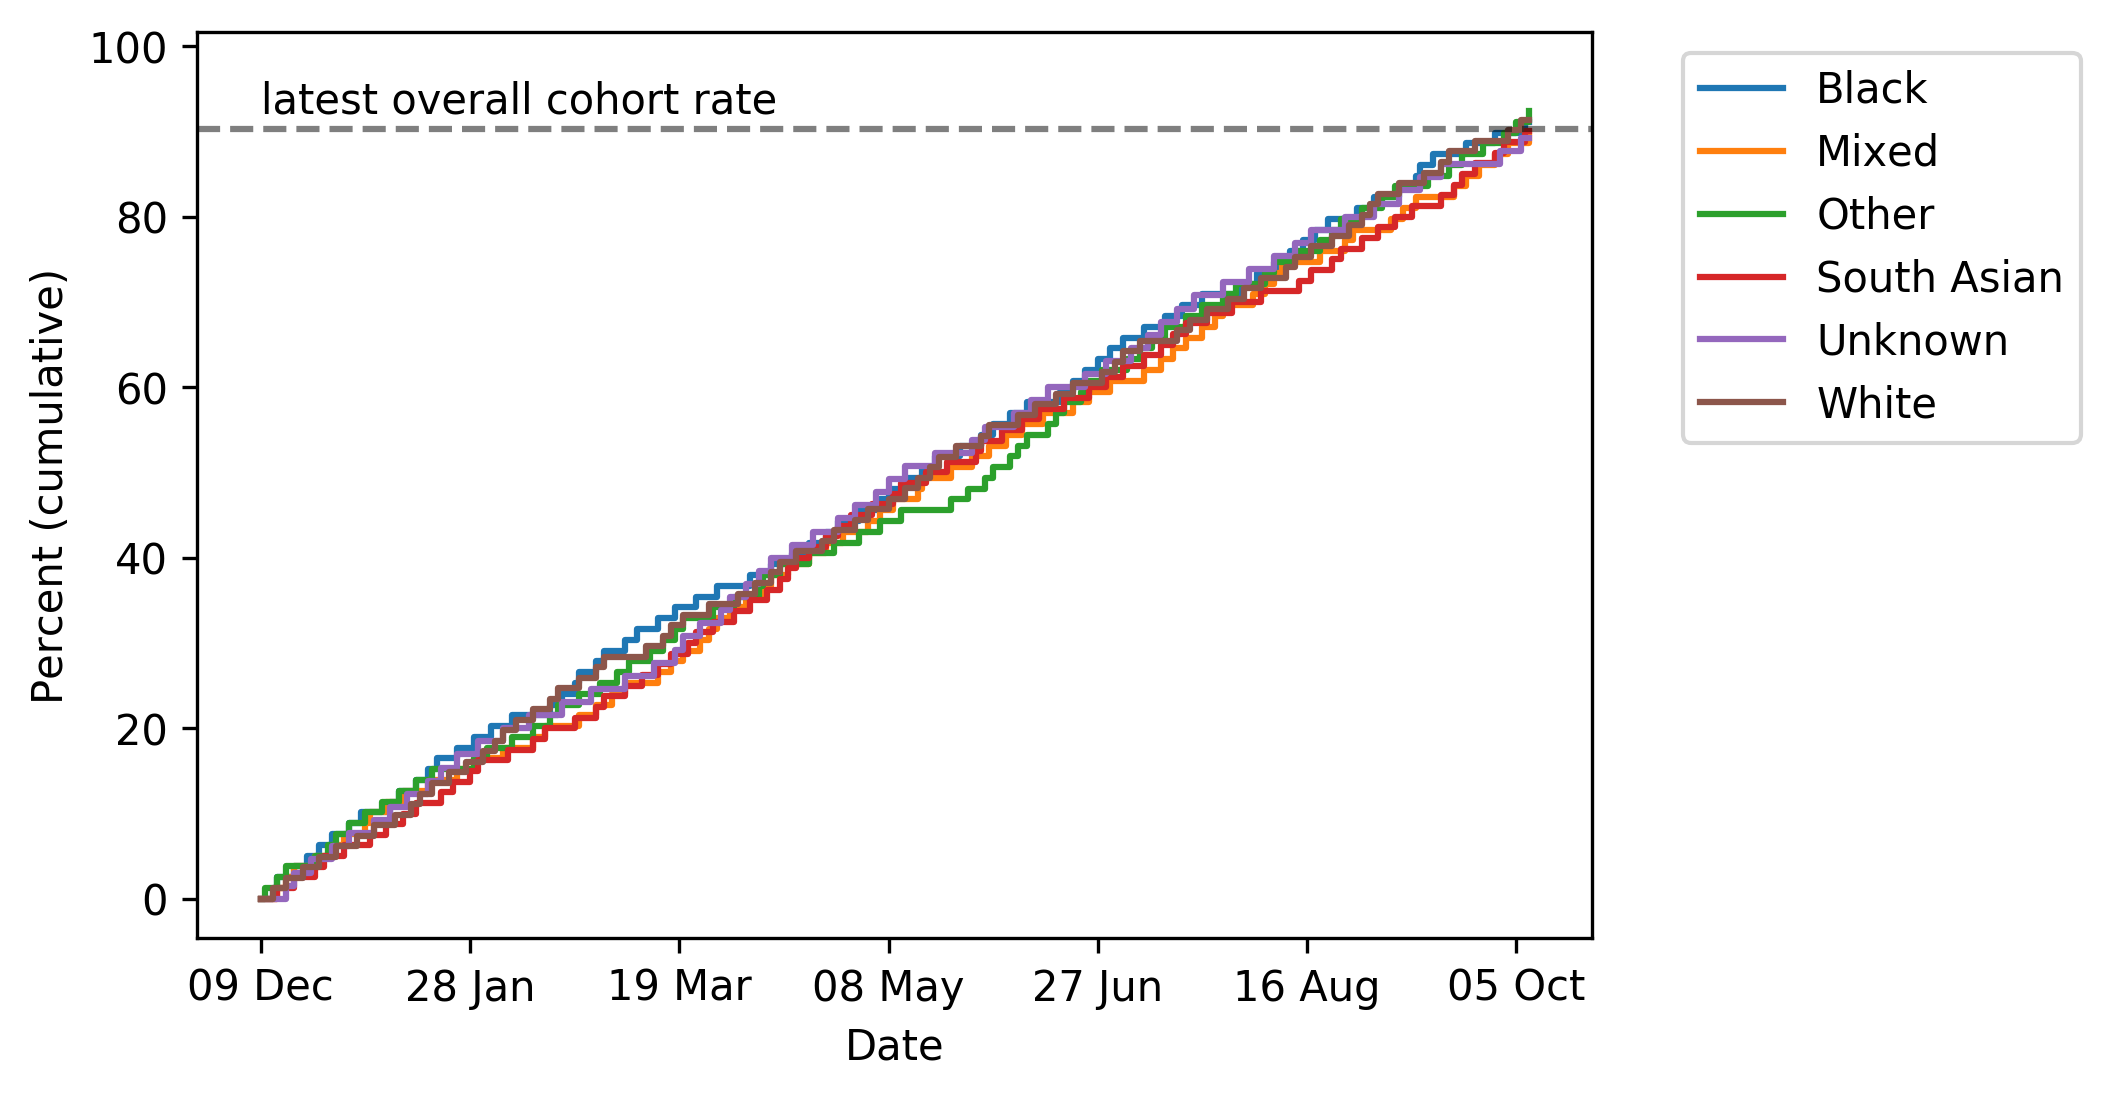

### COVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

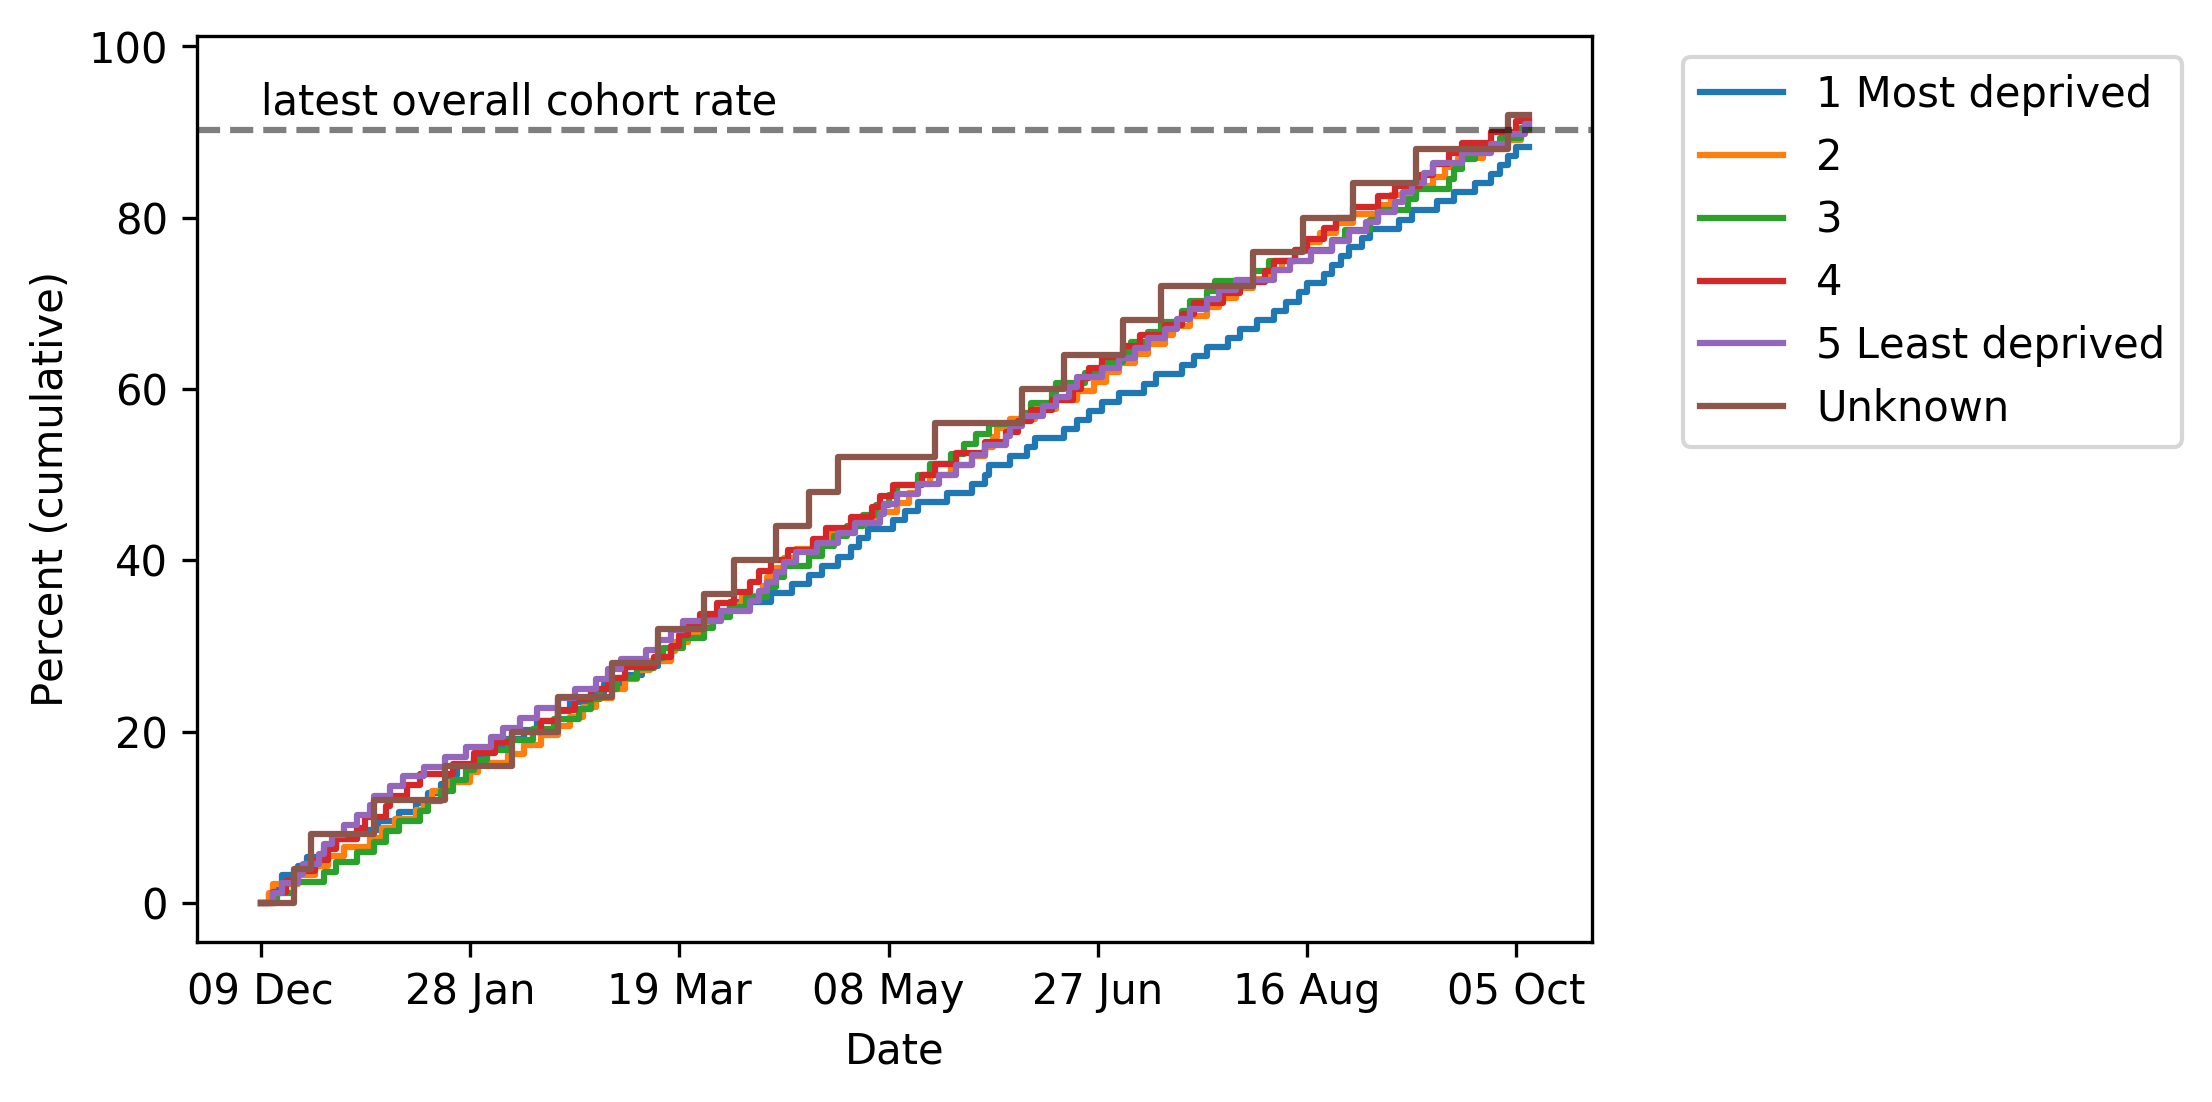

### COVID vaccinations among 55-59 population
 ### by BMI

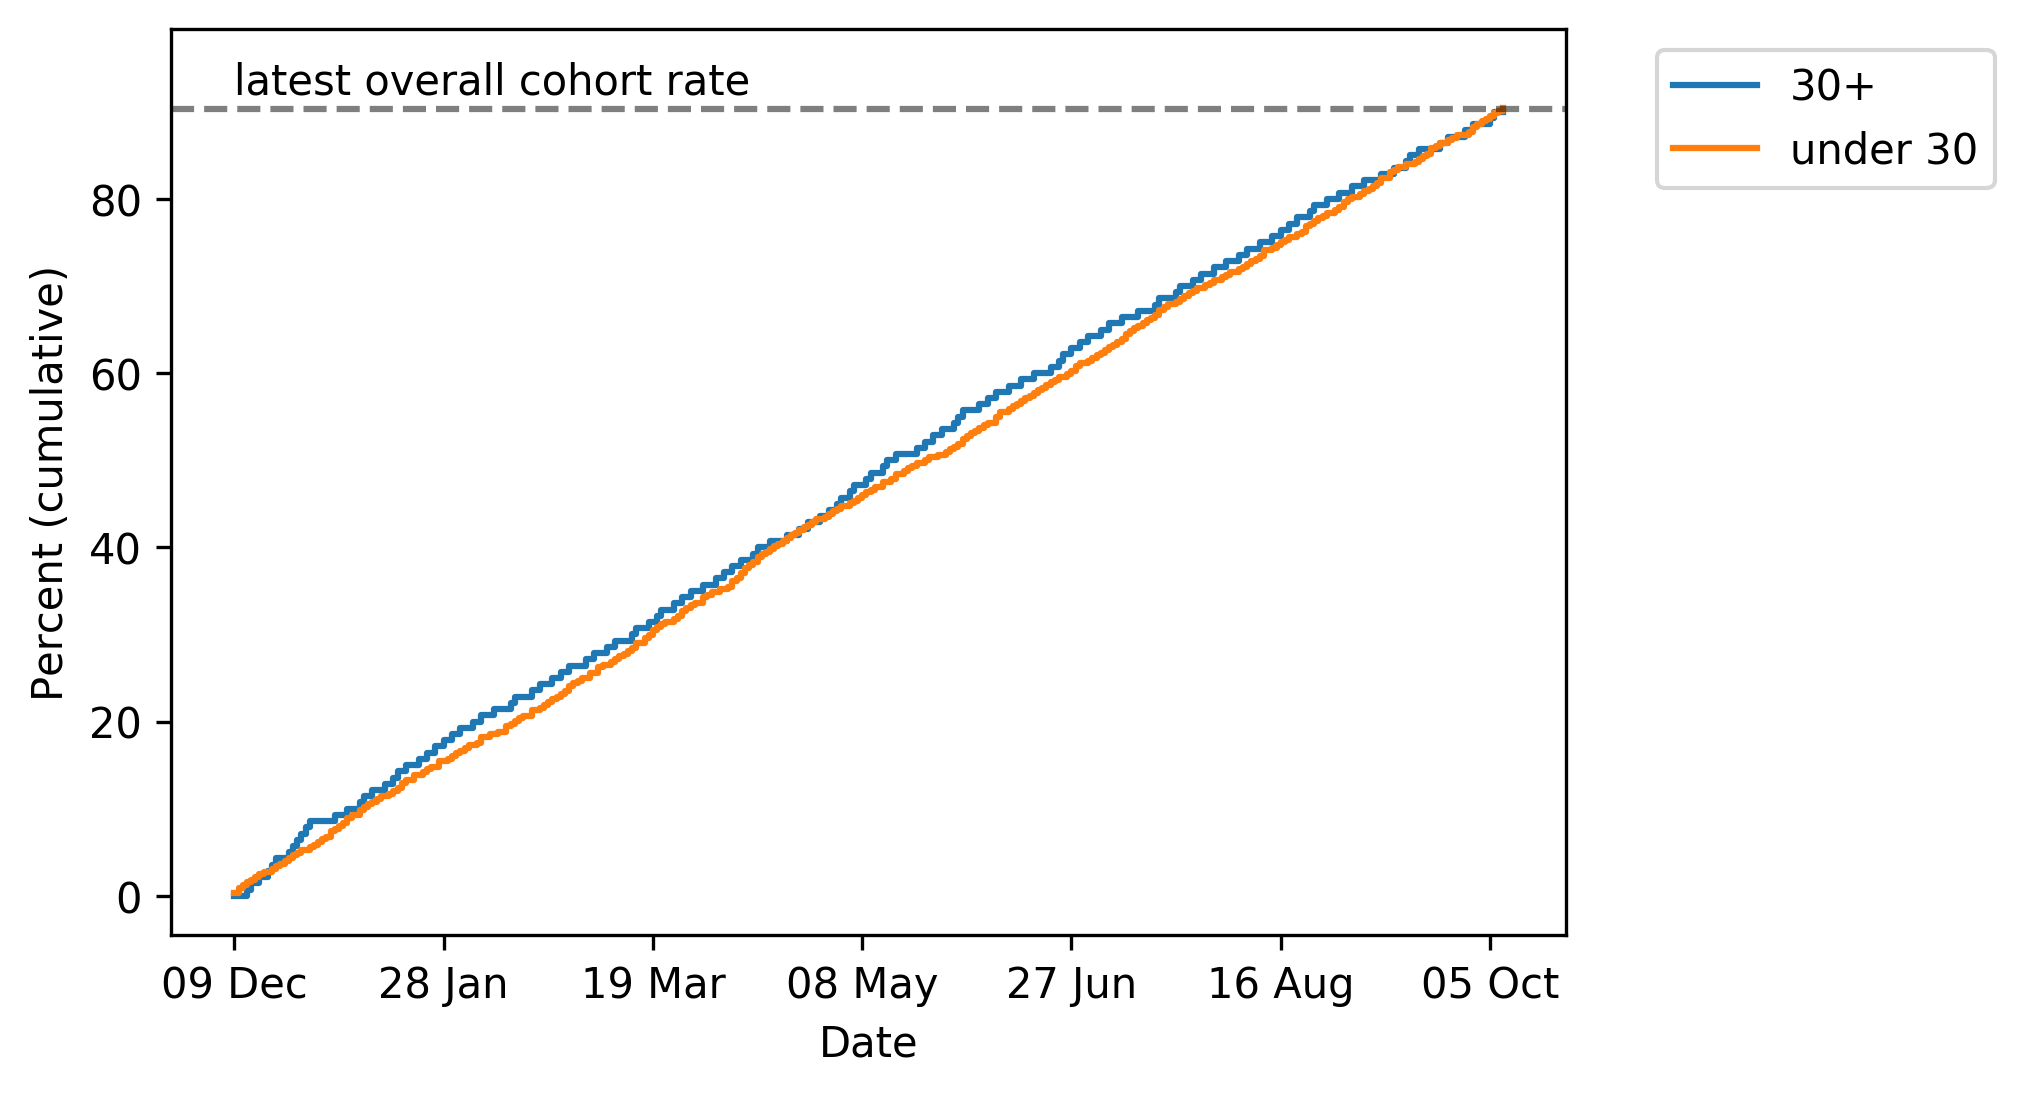

### COVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

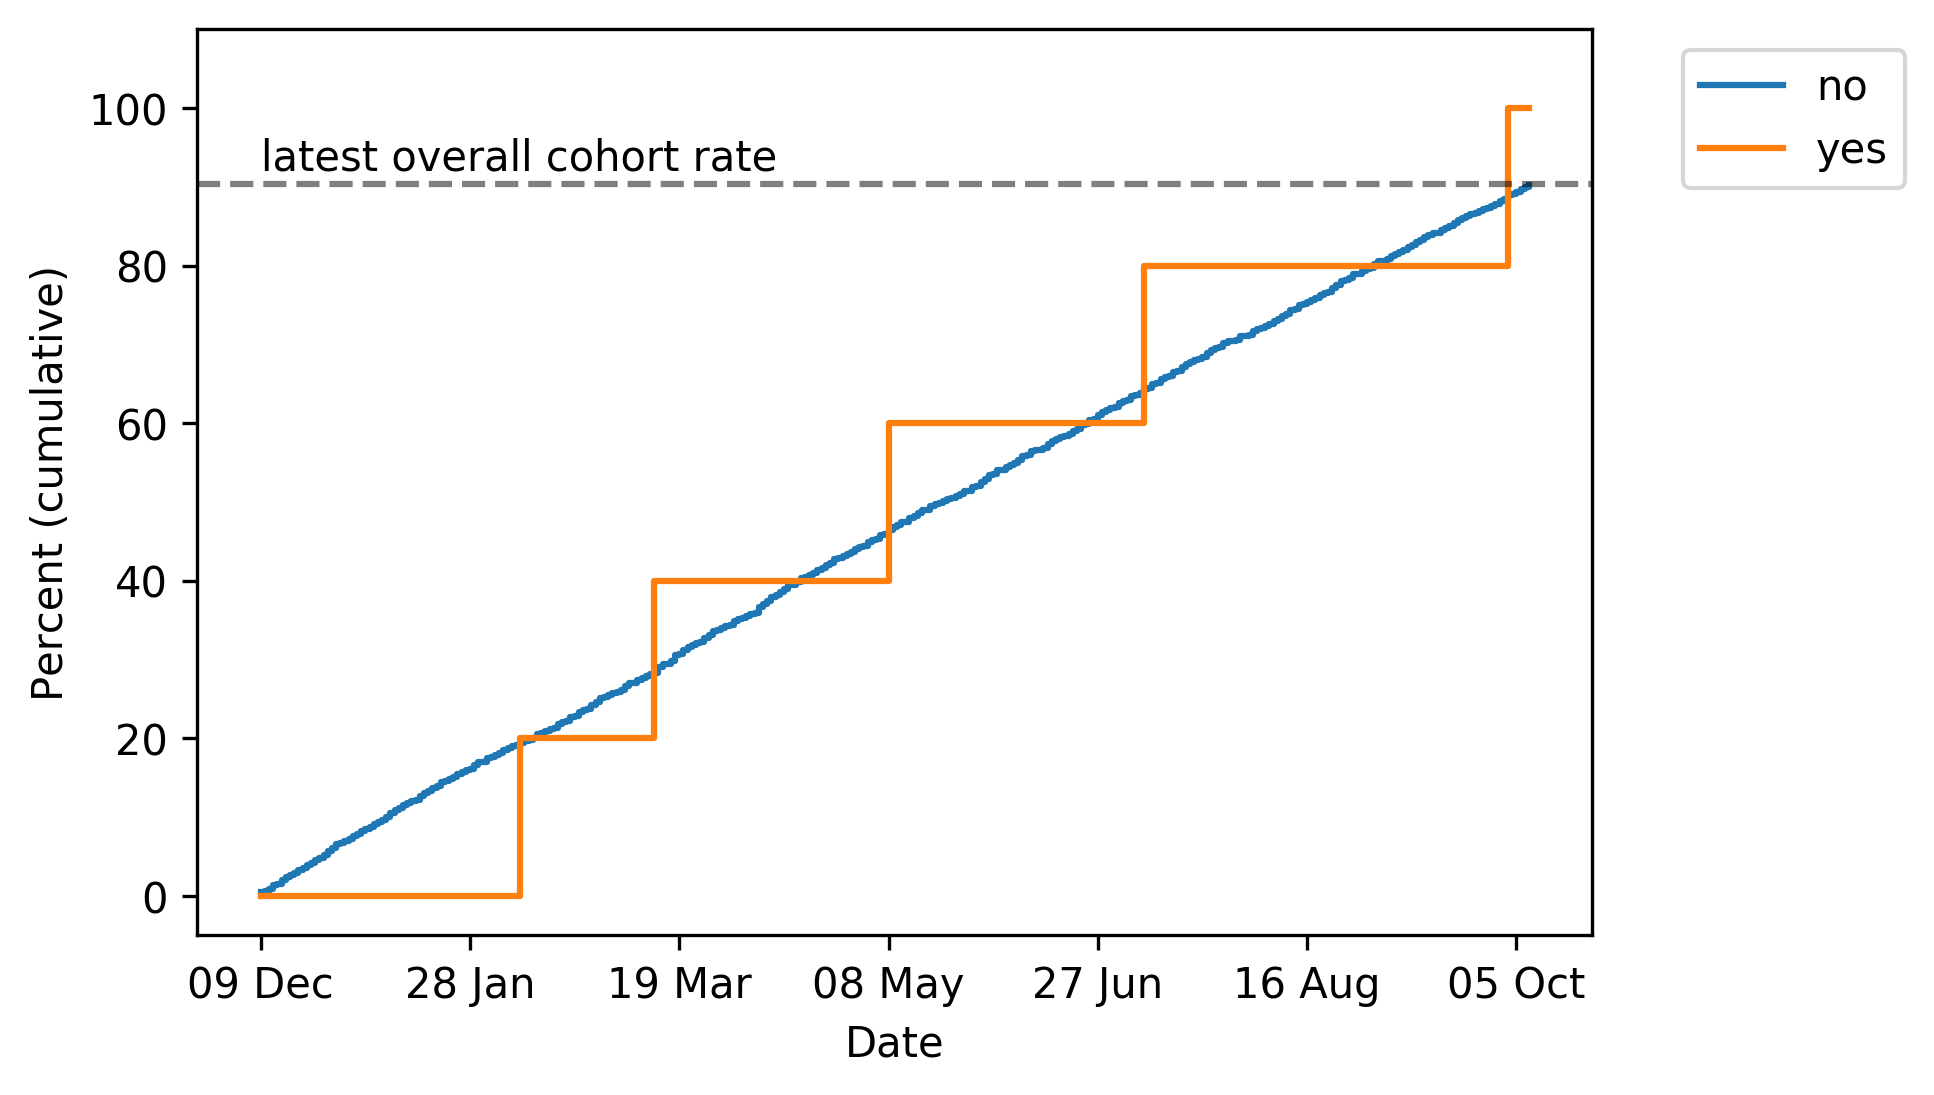

### COVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

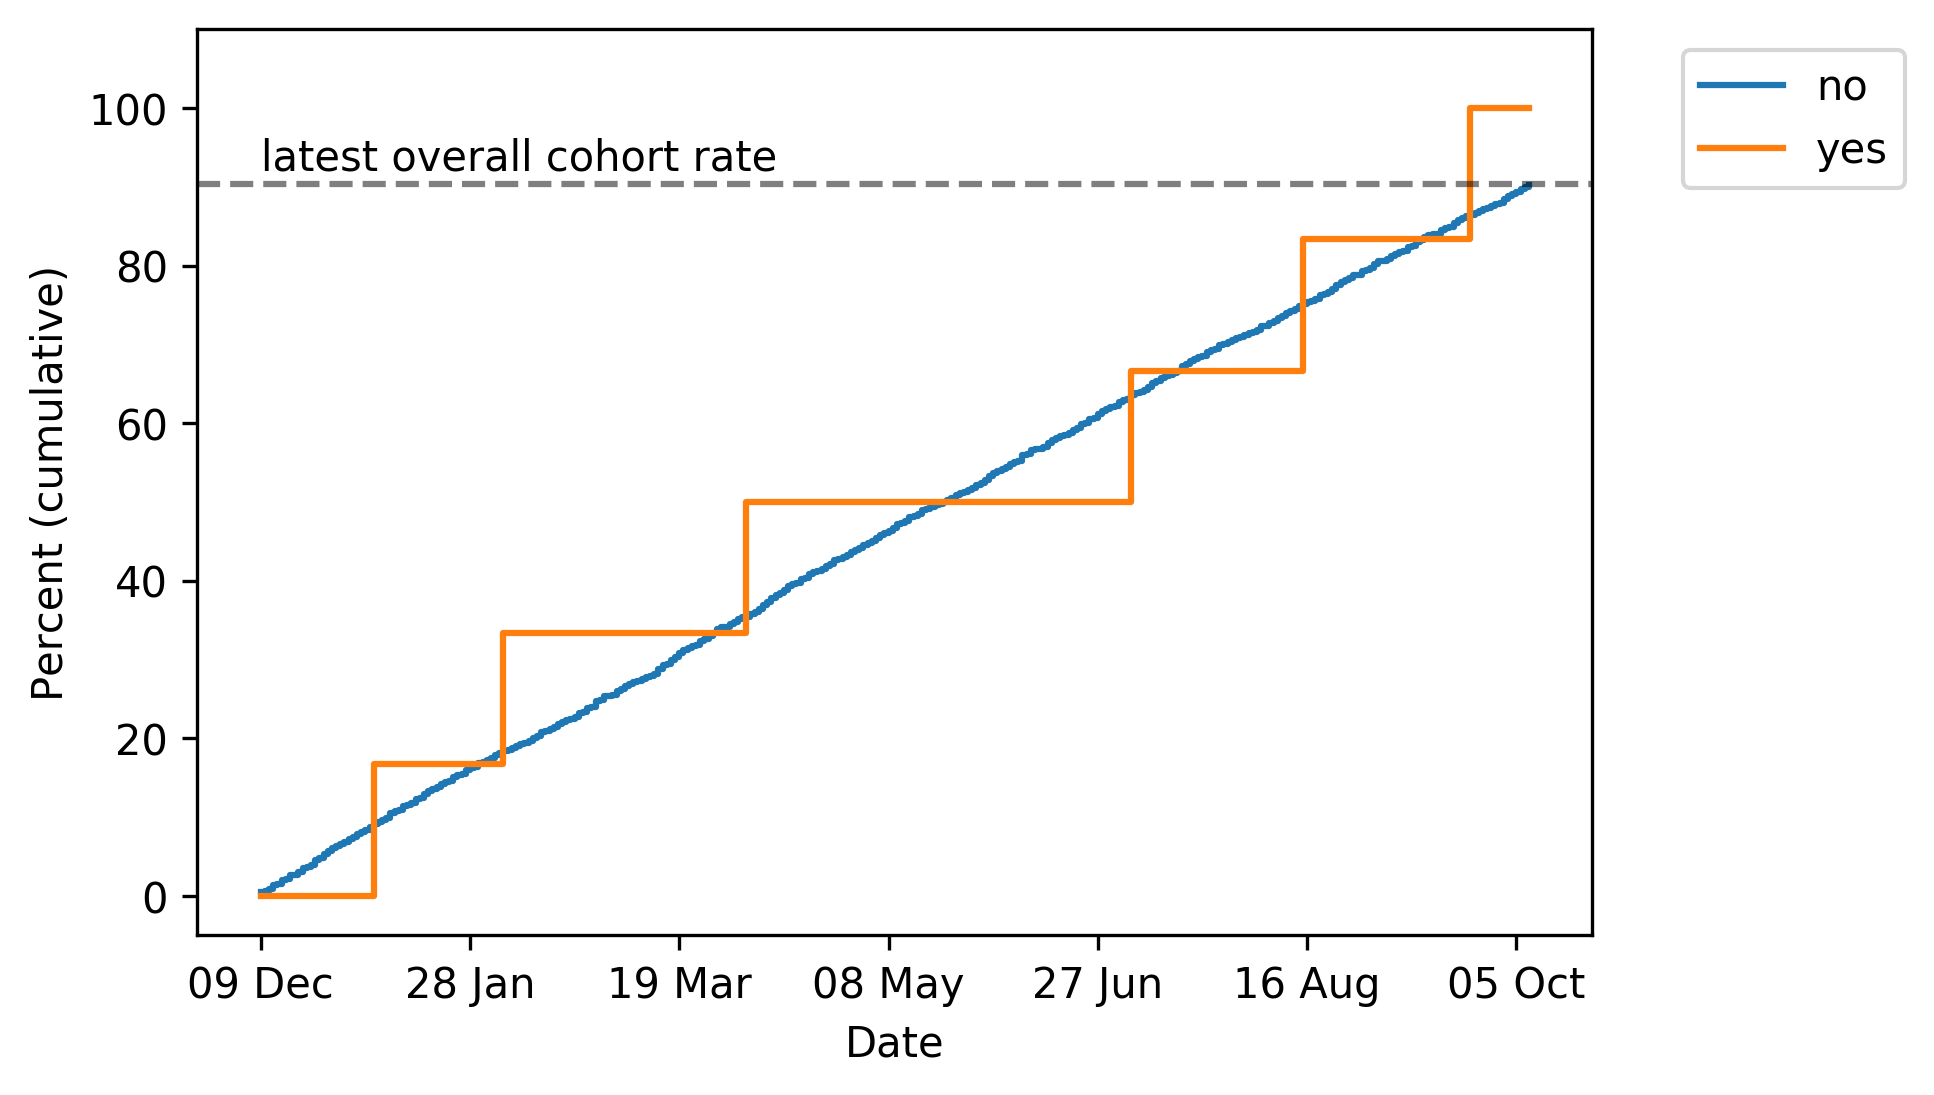

In [9]:
display(Markdown("## 55-59 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="55-59", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 50-54 population according to demographic/clinical features, cumulatively by day. <a name='charts50' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

+

## 50-54 population

### COVID vaccinations among 50-54 population
 ### by Sex

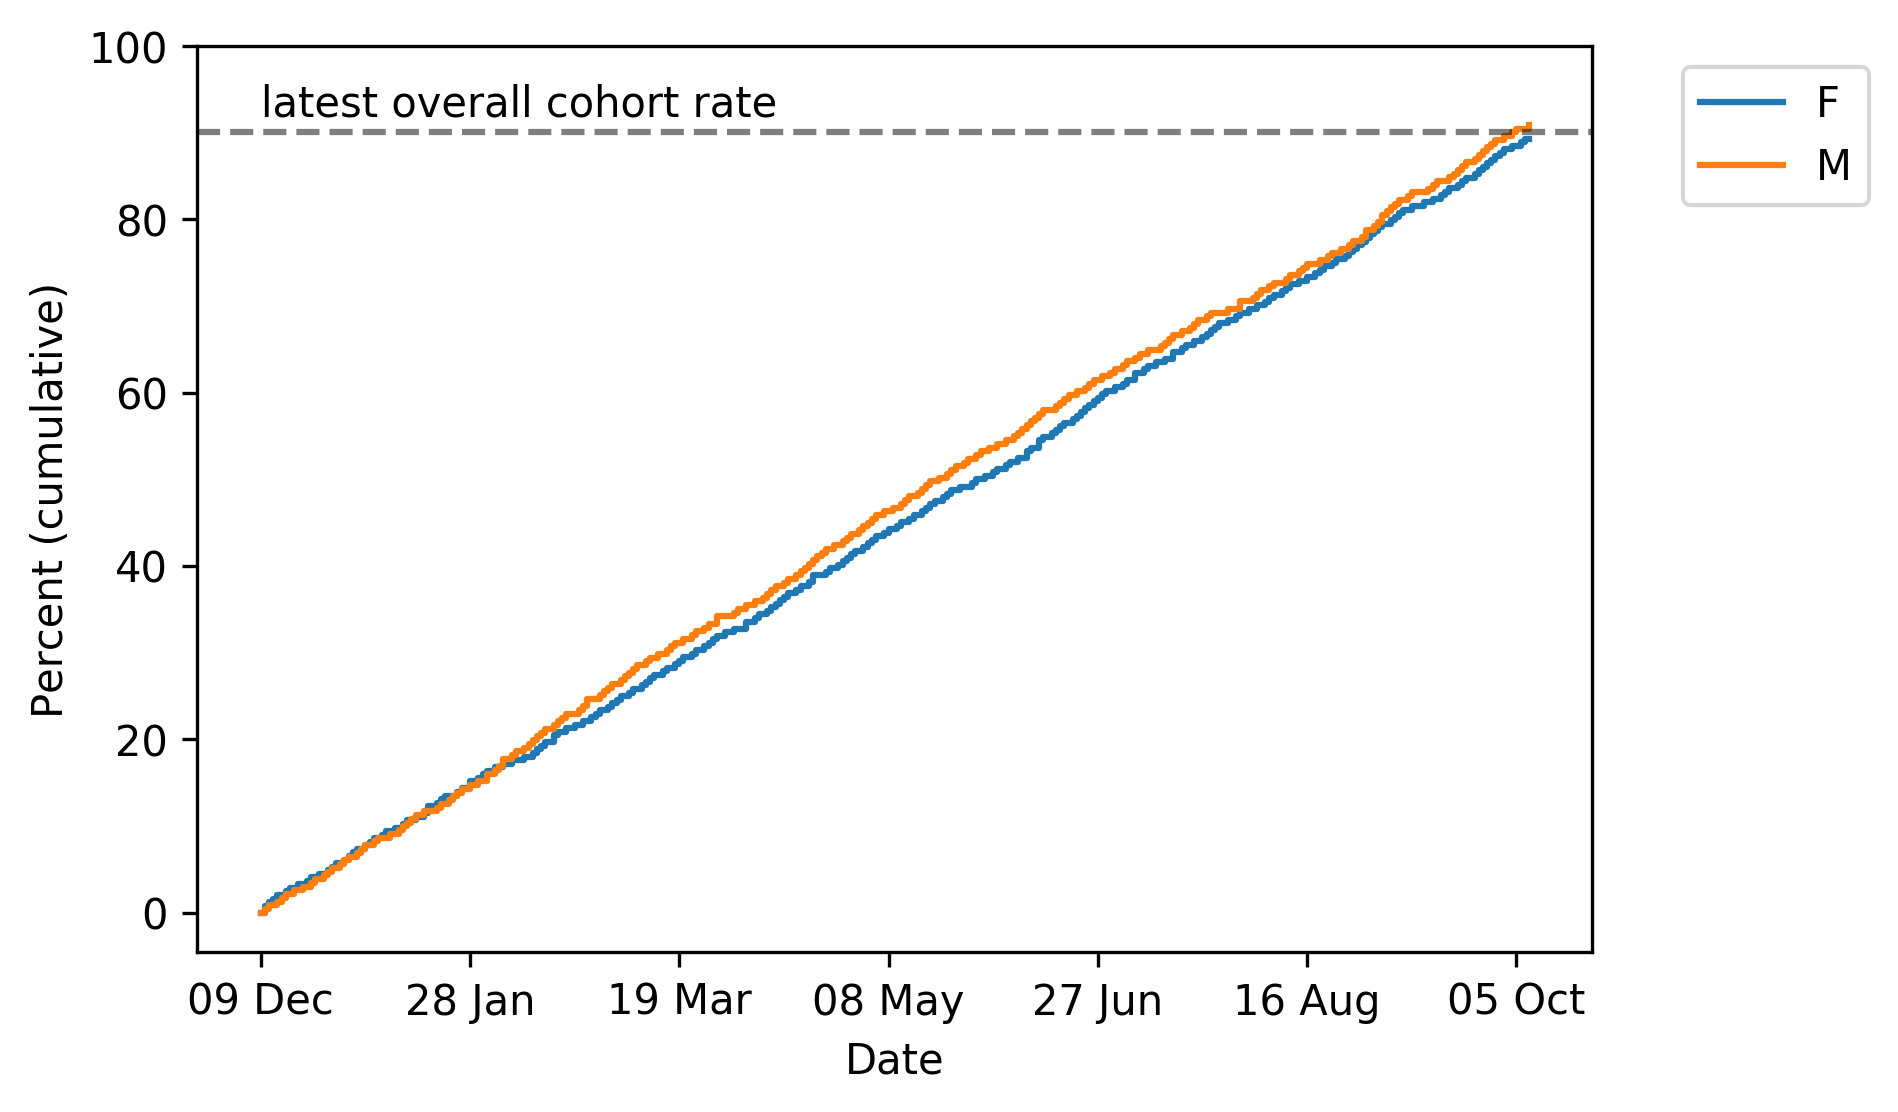

### COVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

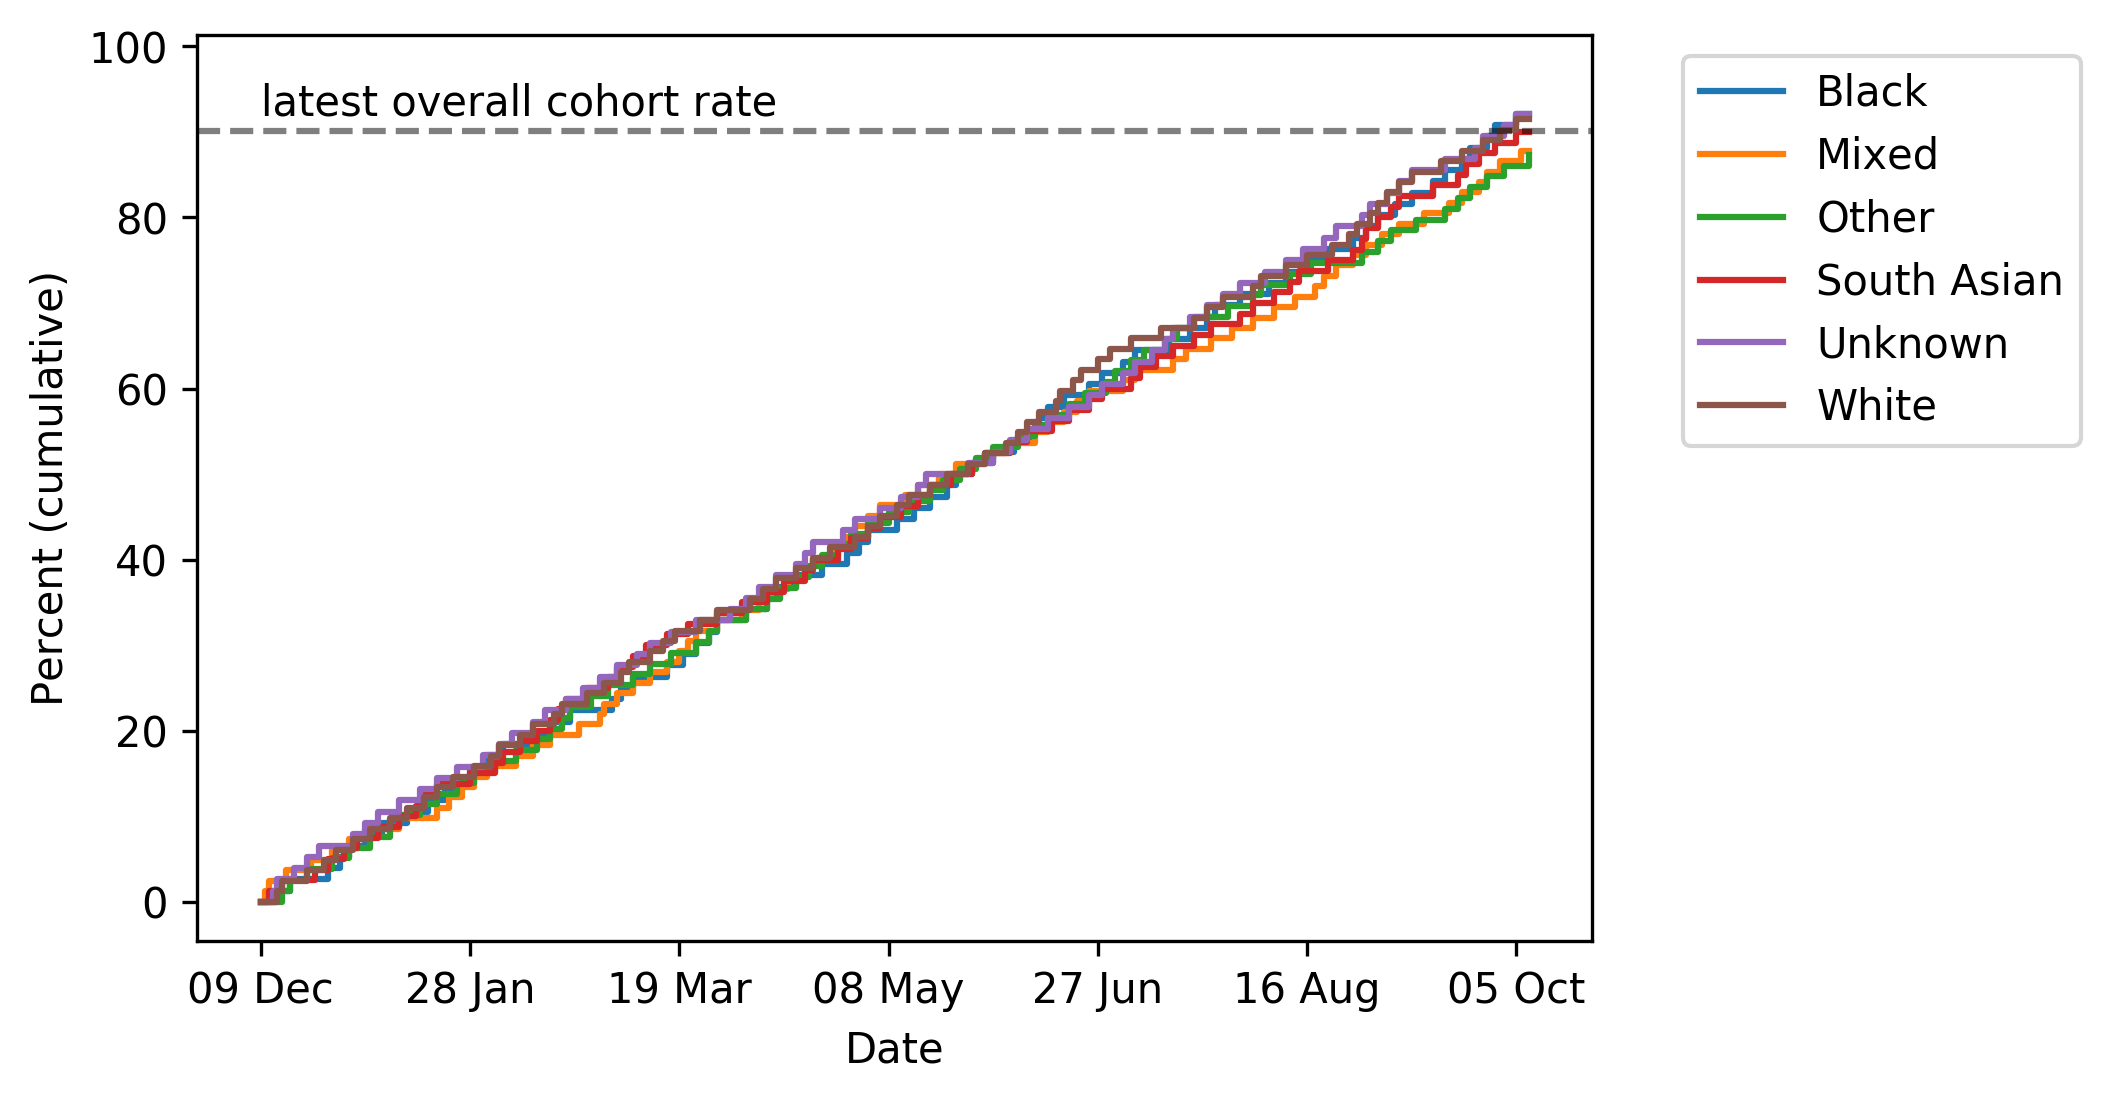

### COVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

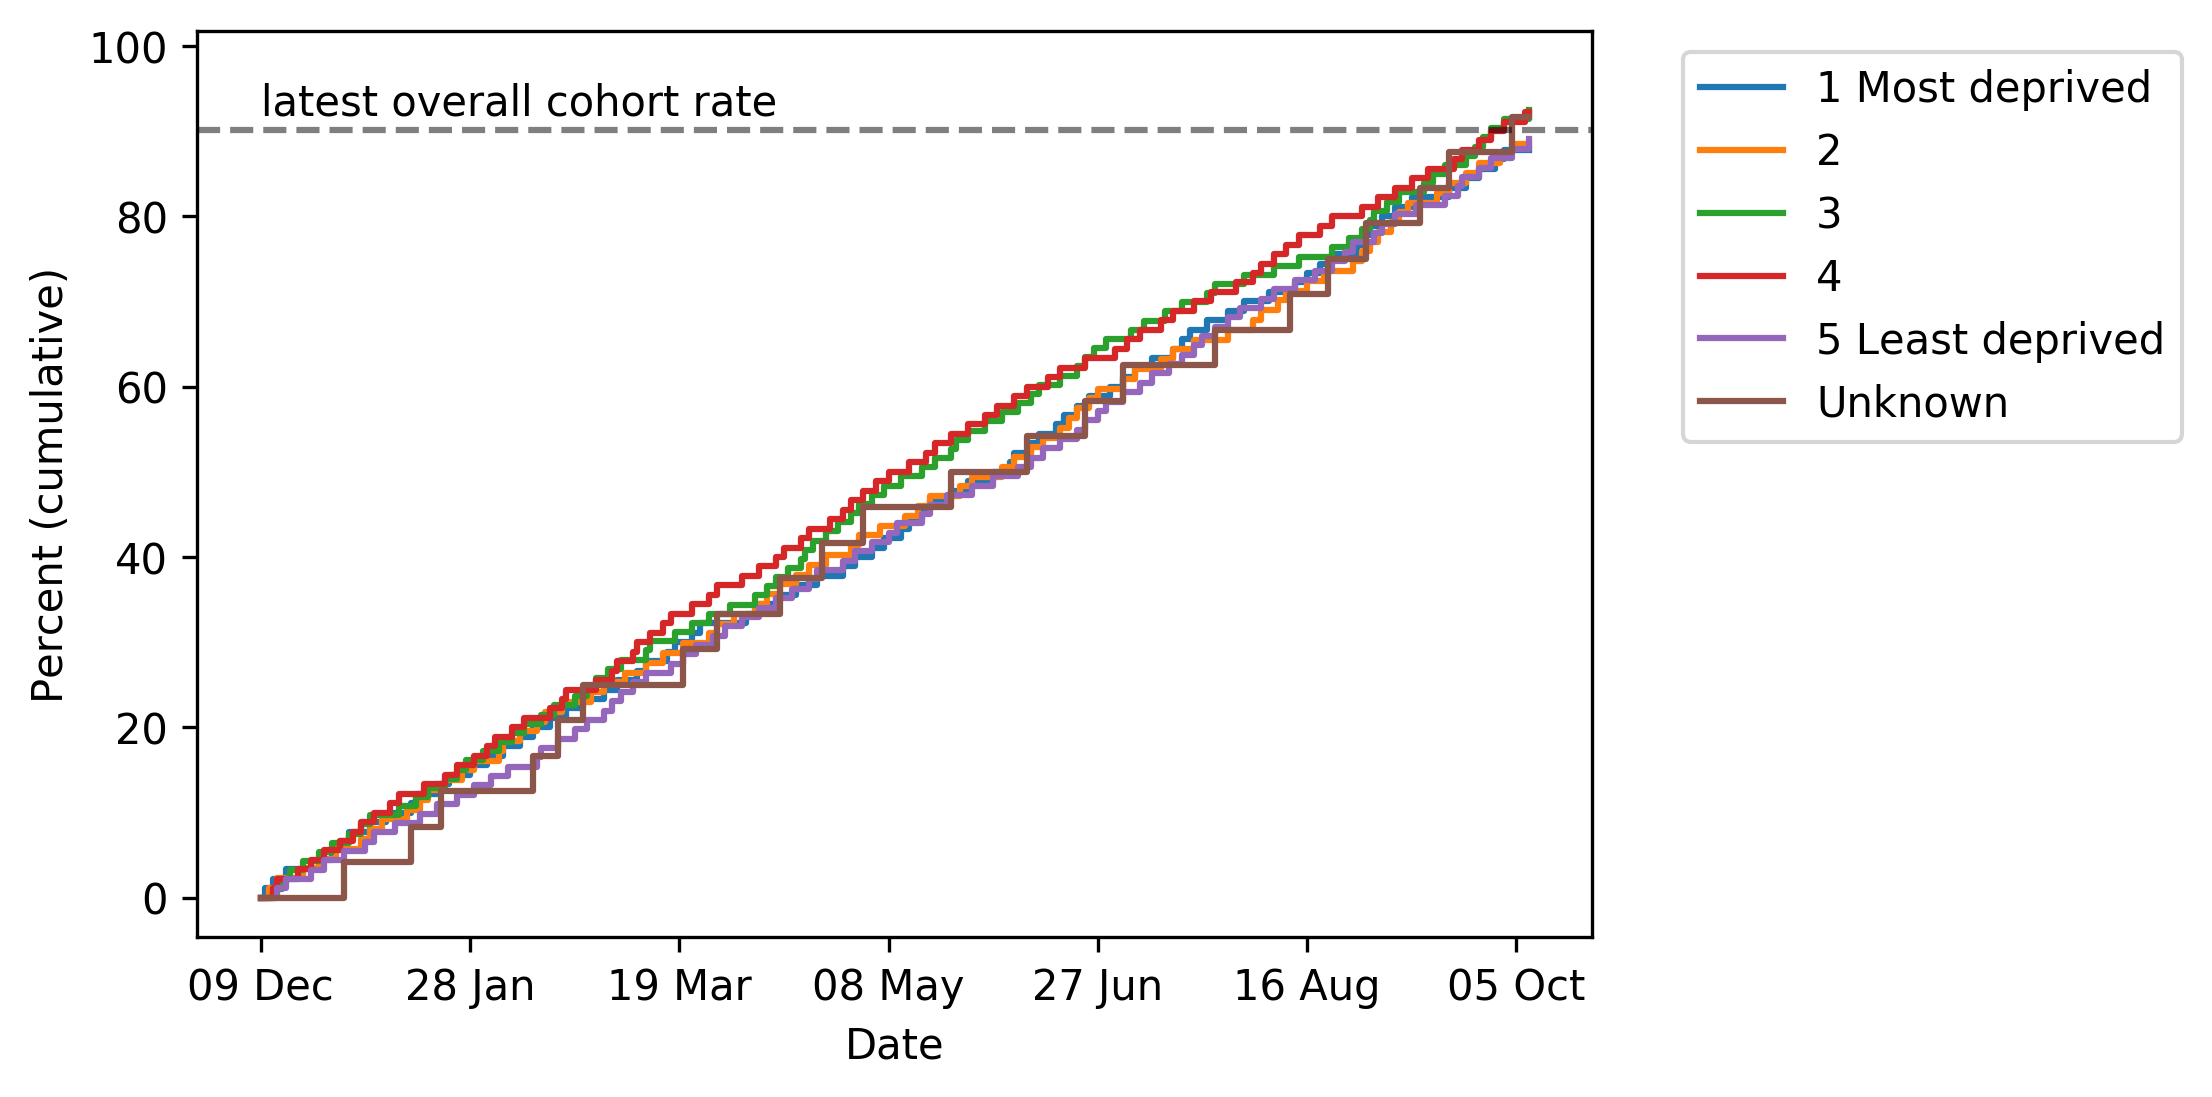

### COVID vaccinations among 50-54 population
 ### by BMI

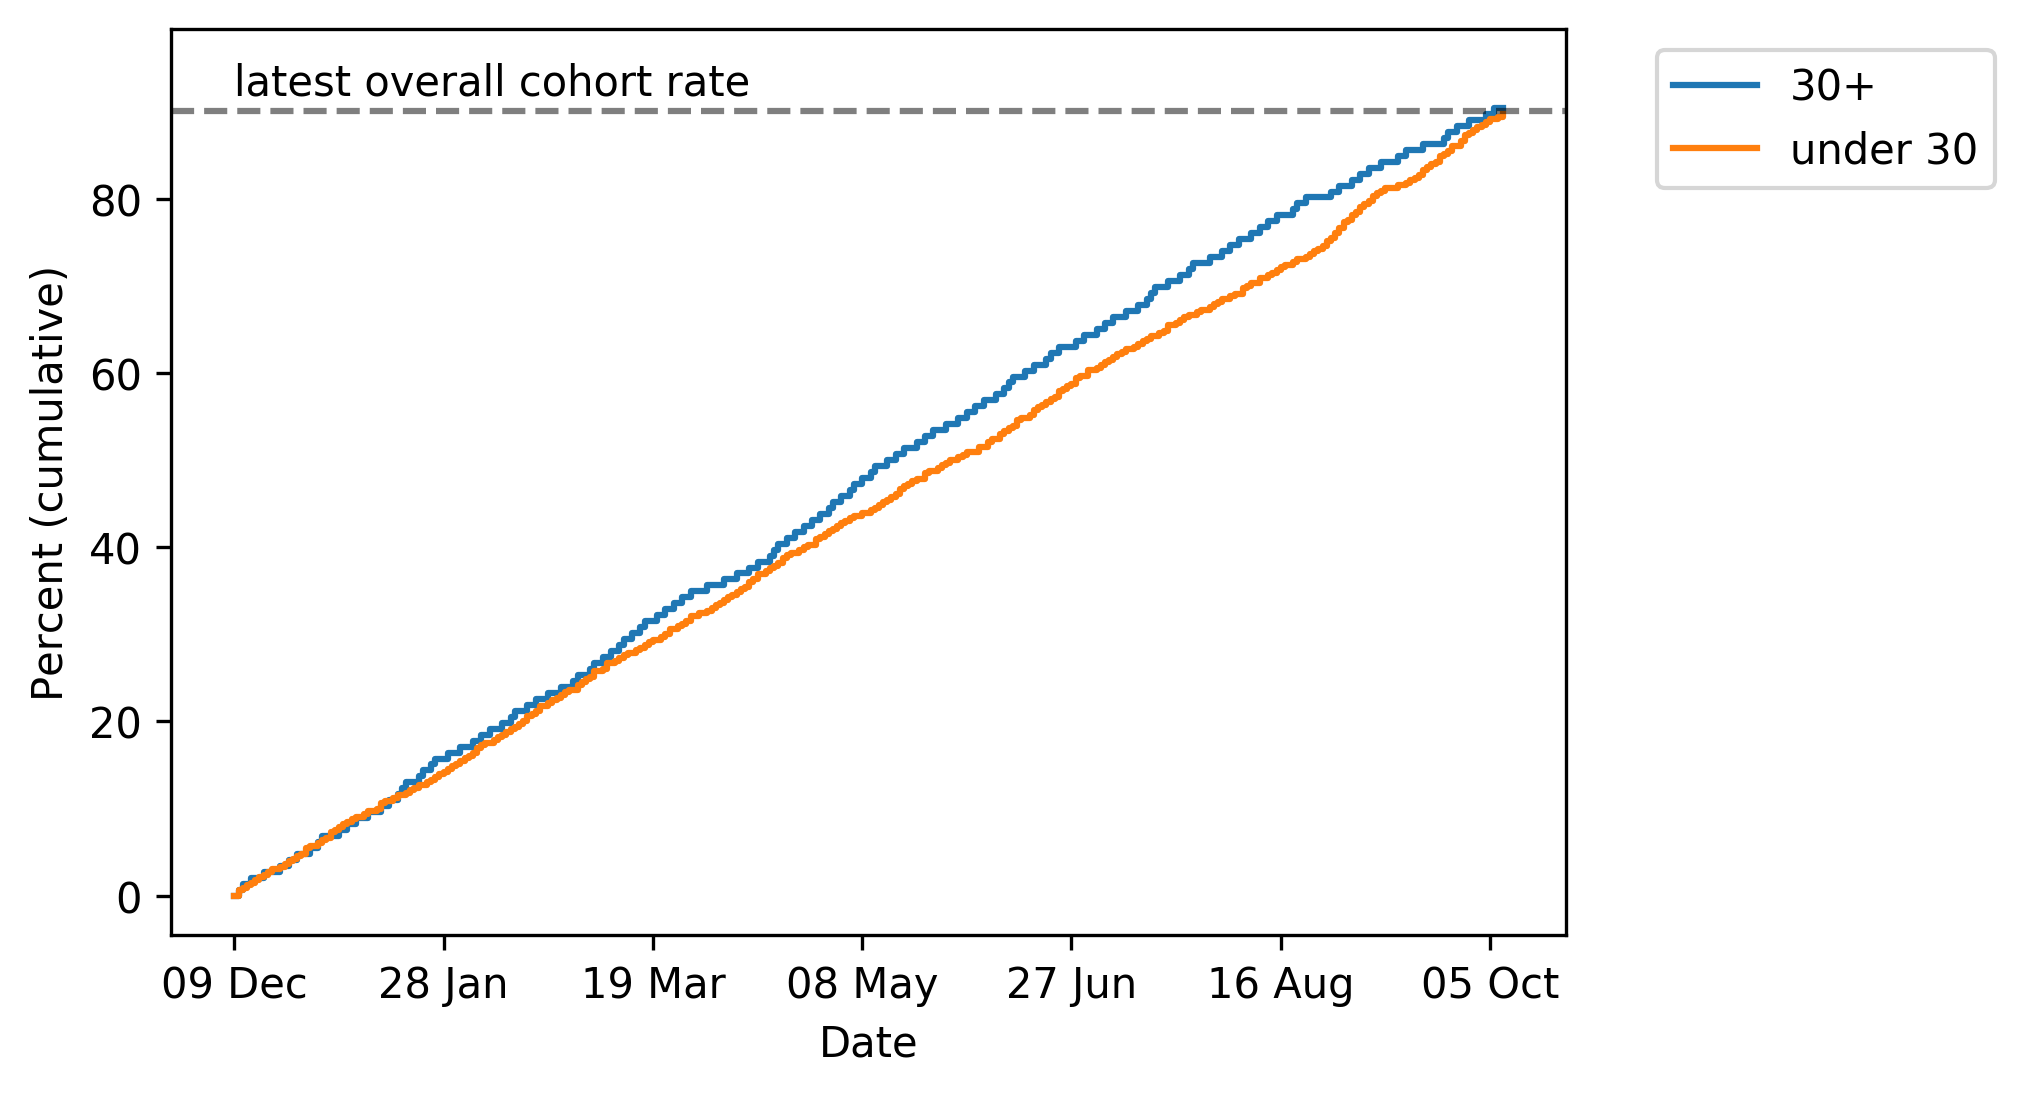

### COVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

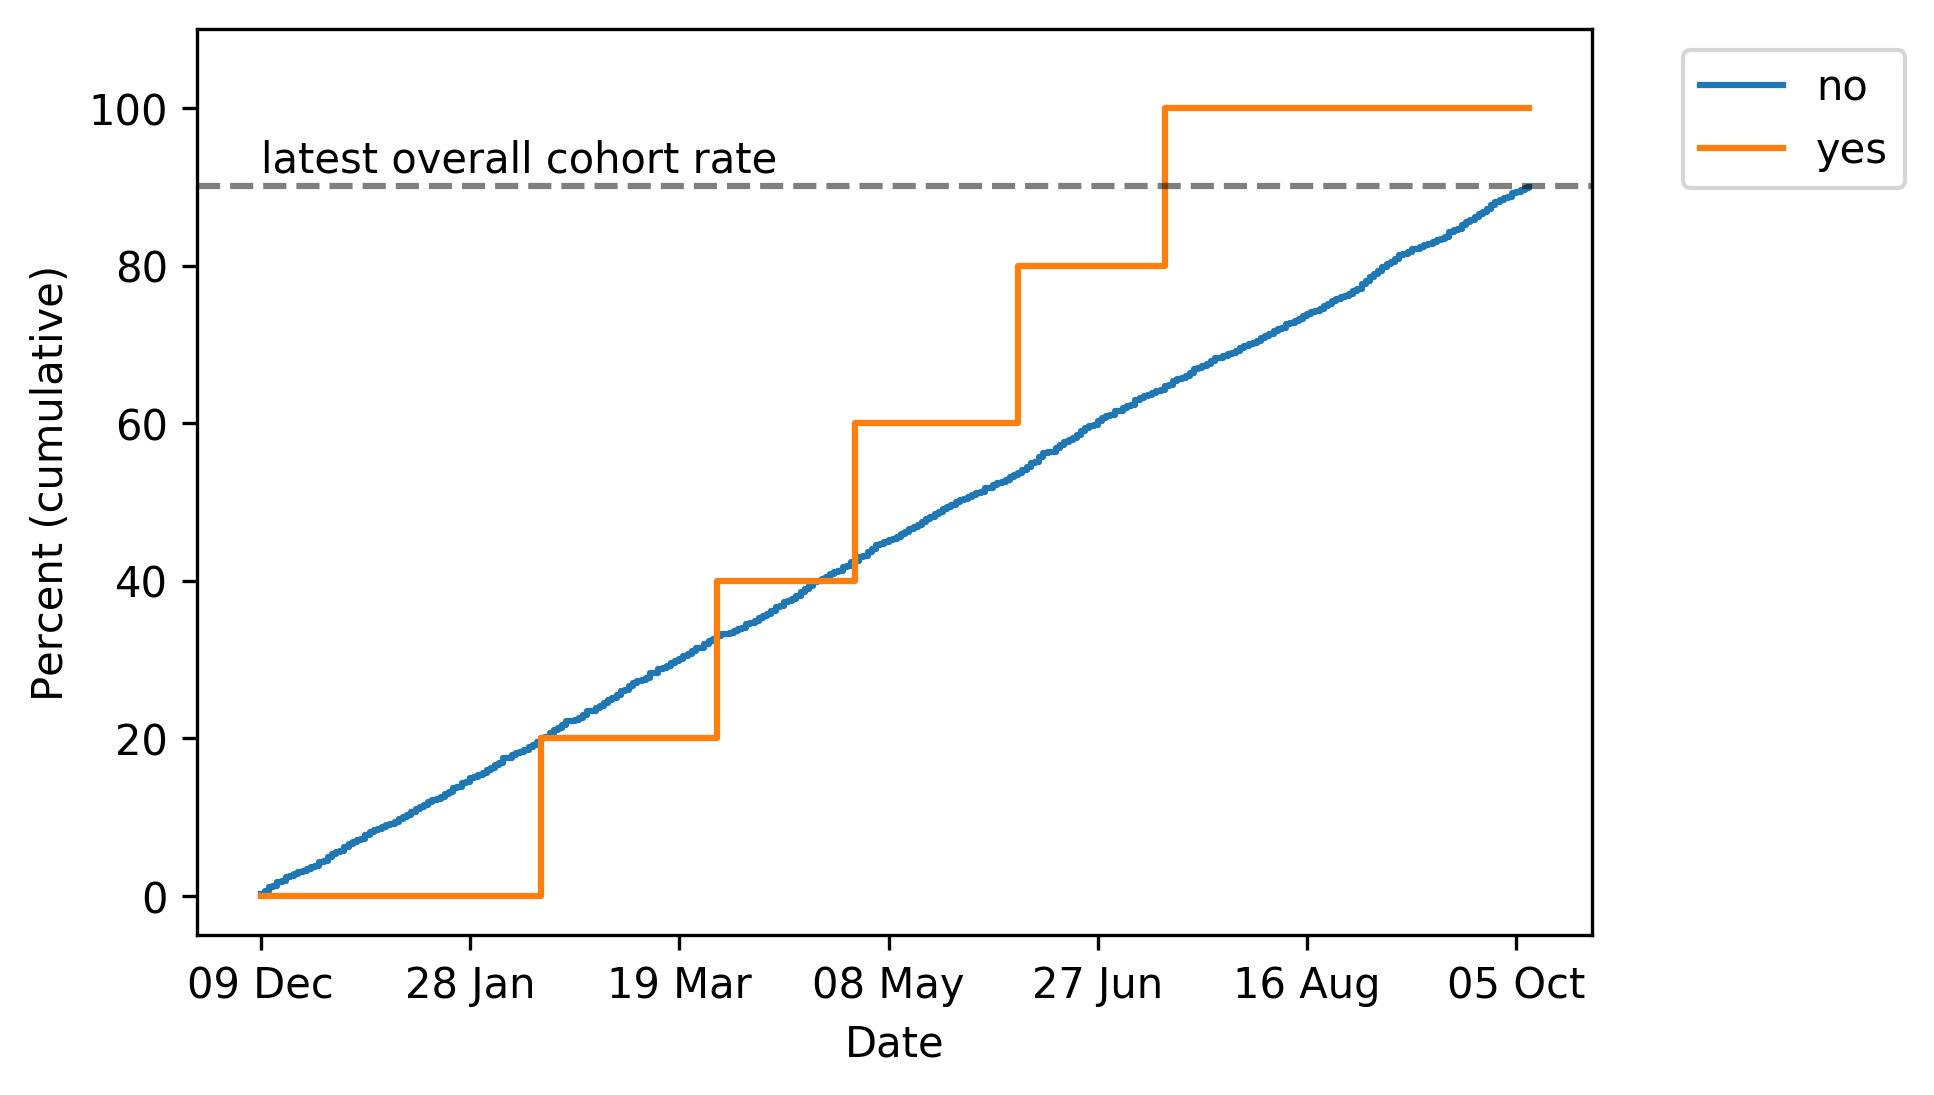

### COVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

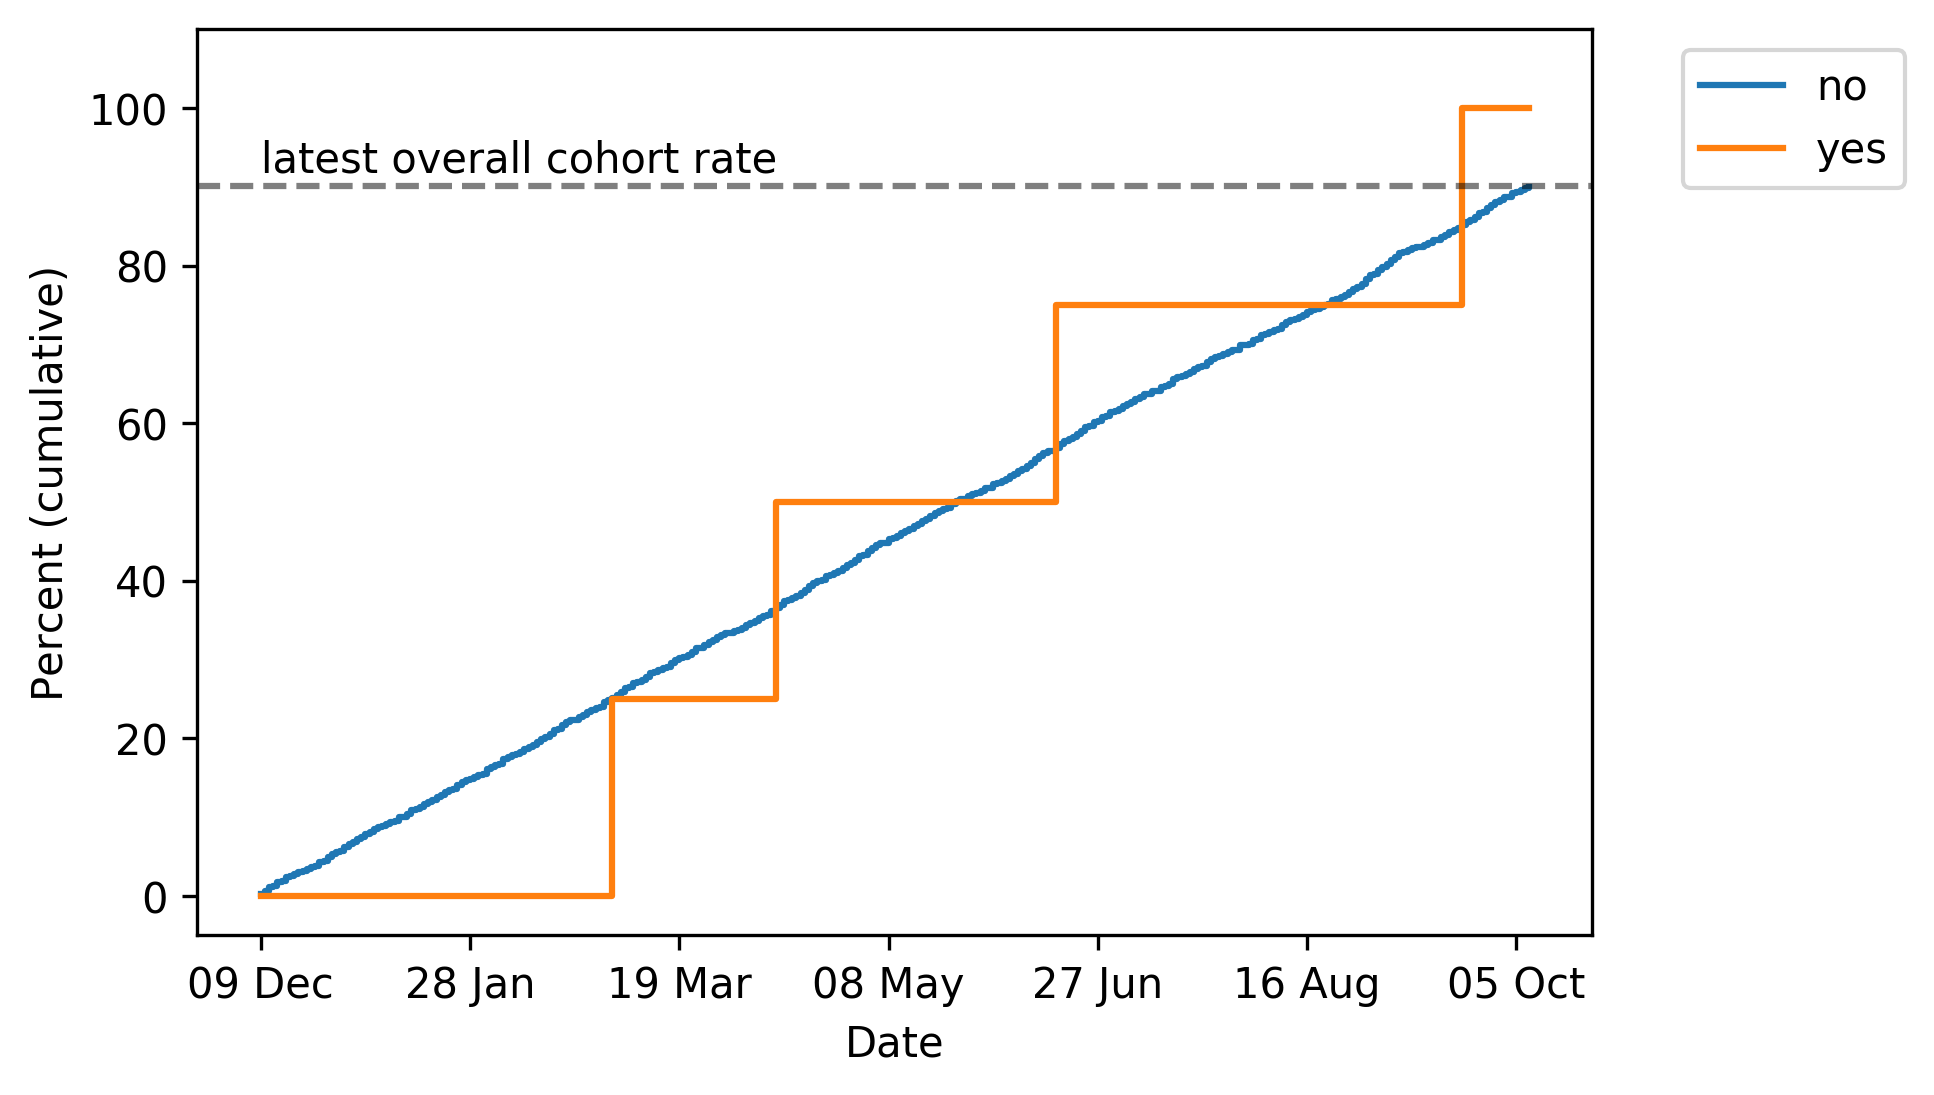

In [10]:
display(Markdown("## 50-54 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="50-54", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 40-49 population according to demographic/clinical features, cumulatively by day. <a name='charts40' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 40-49 population

### COVID vaccinations among 40-49 population
 ### by Sex

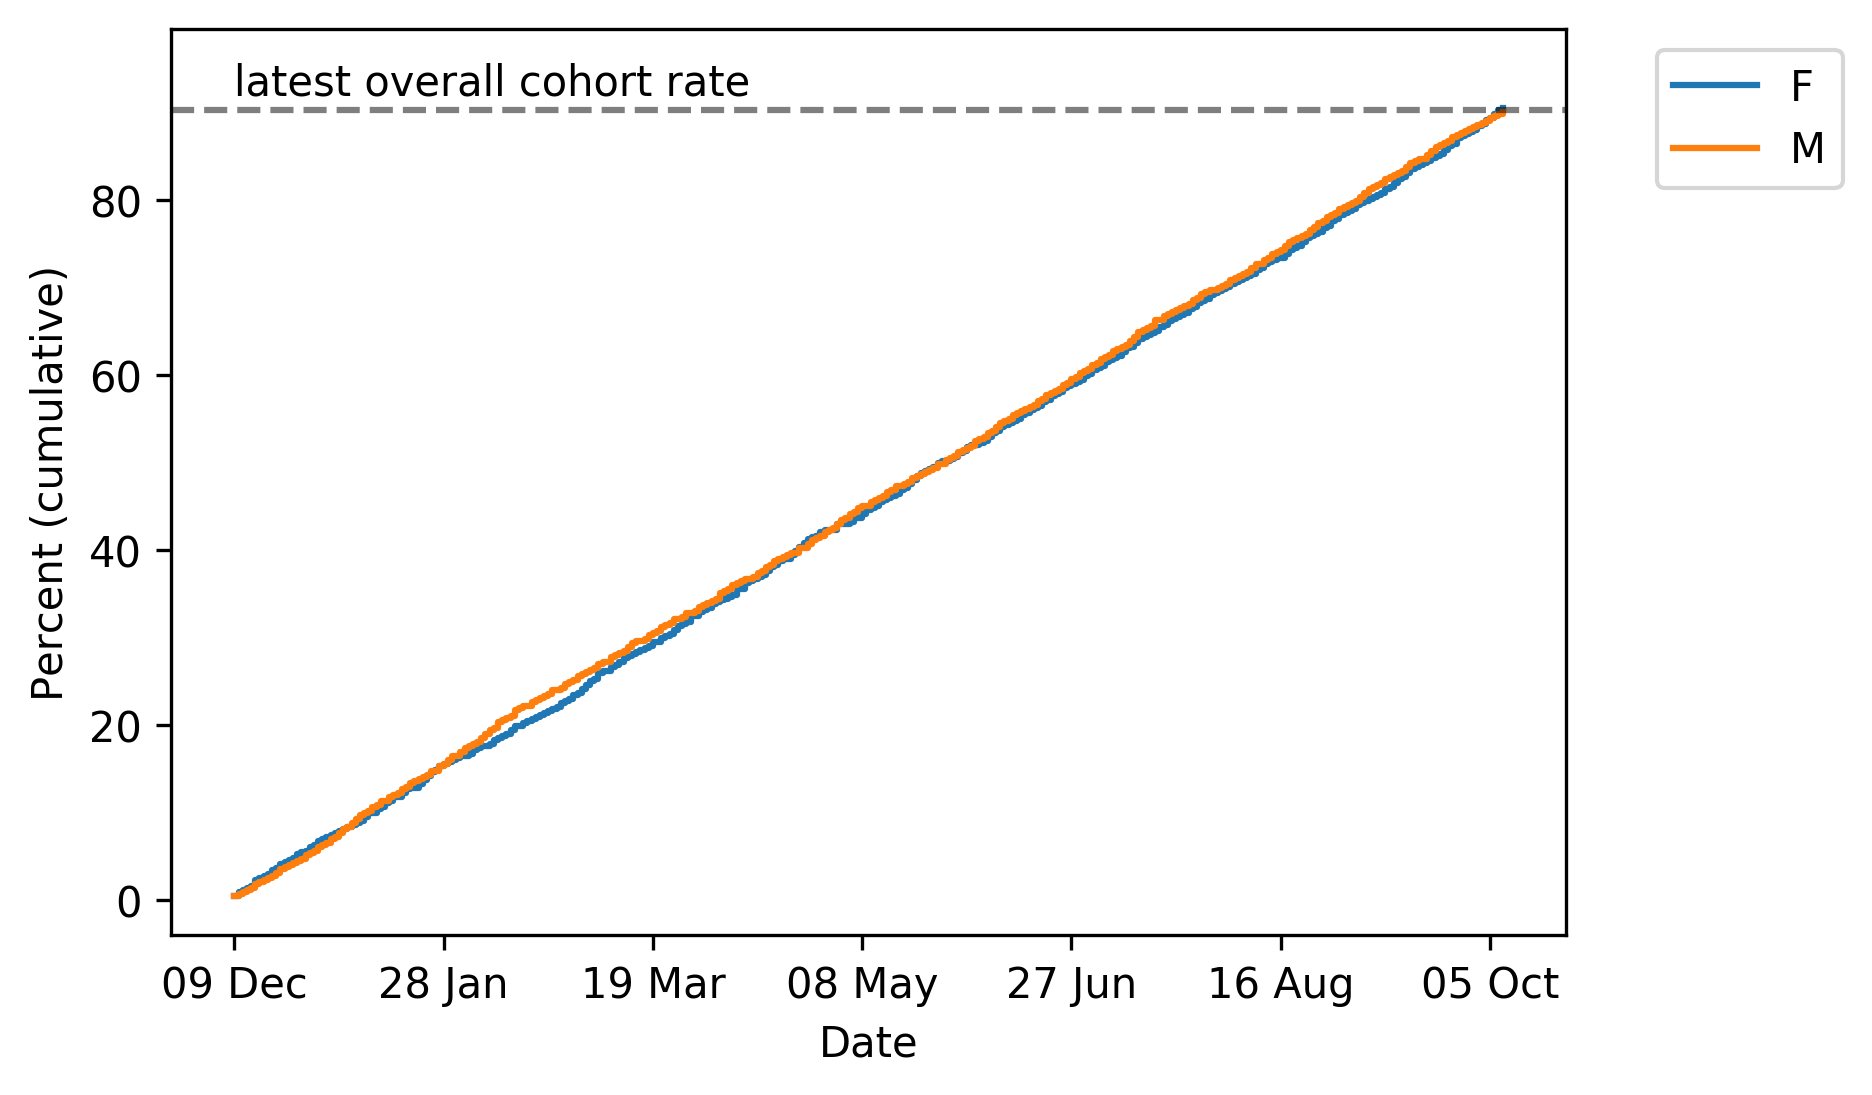

### COVID vaccinations among 40-49 population
 ### by Ethnicity (broad categories)

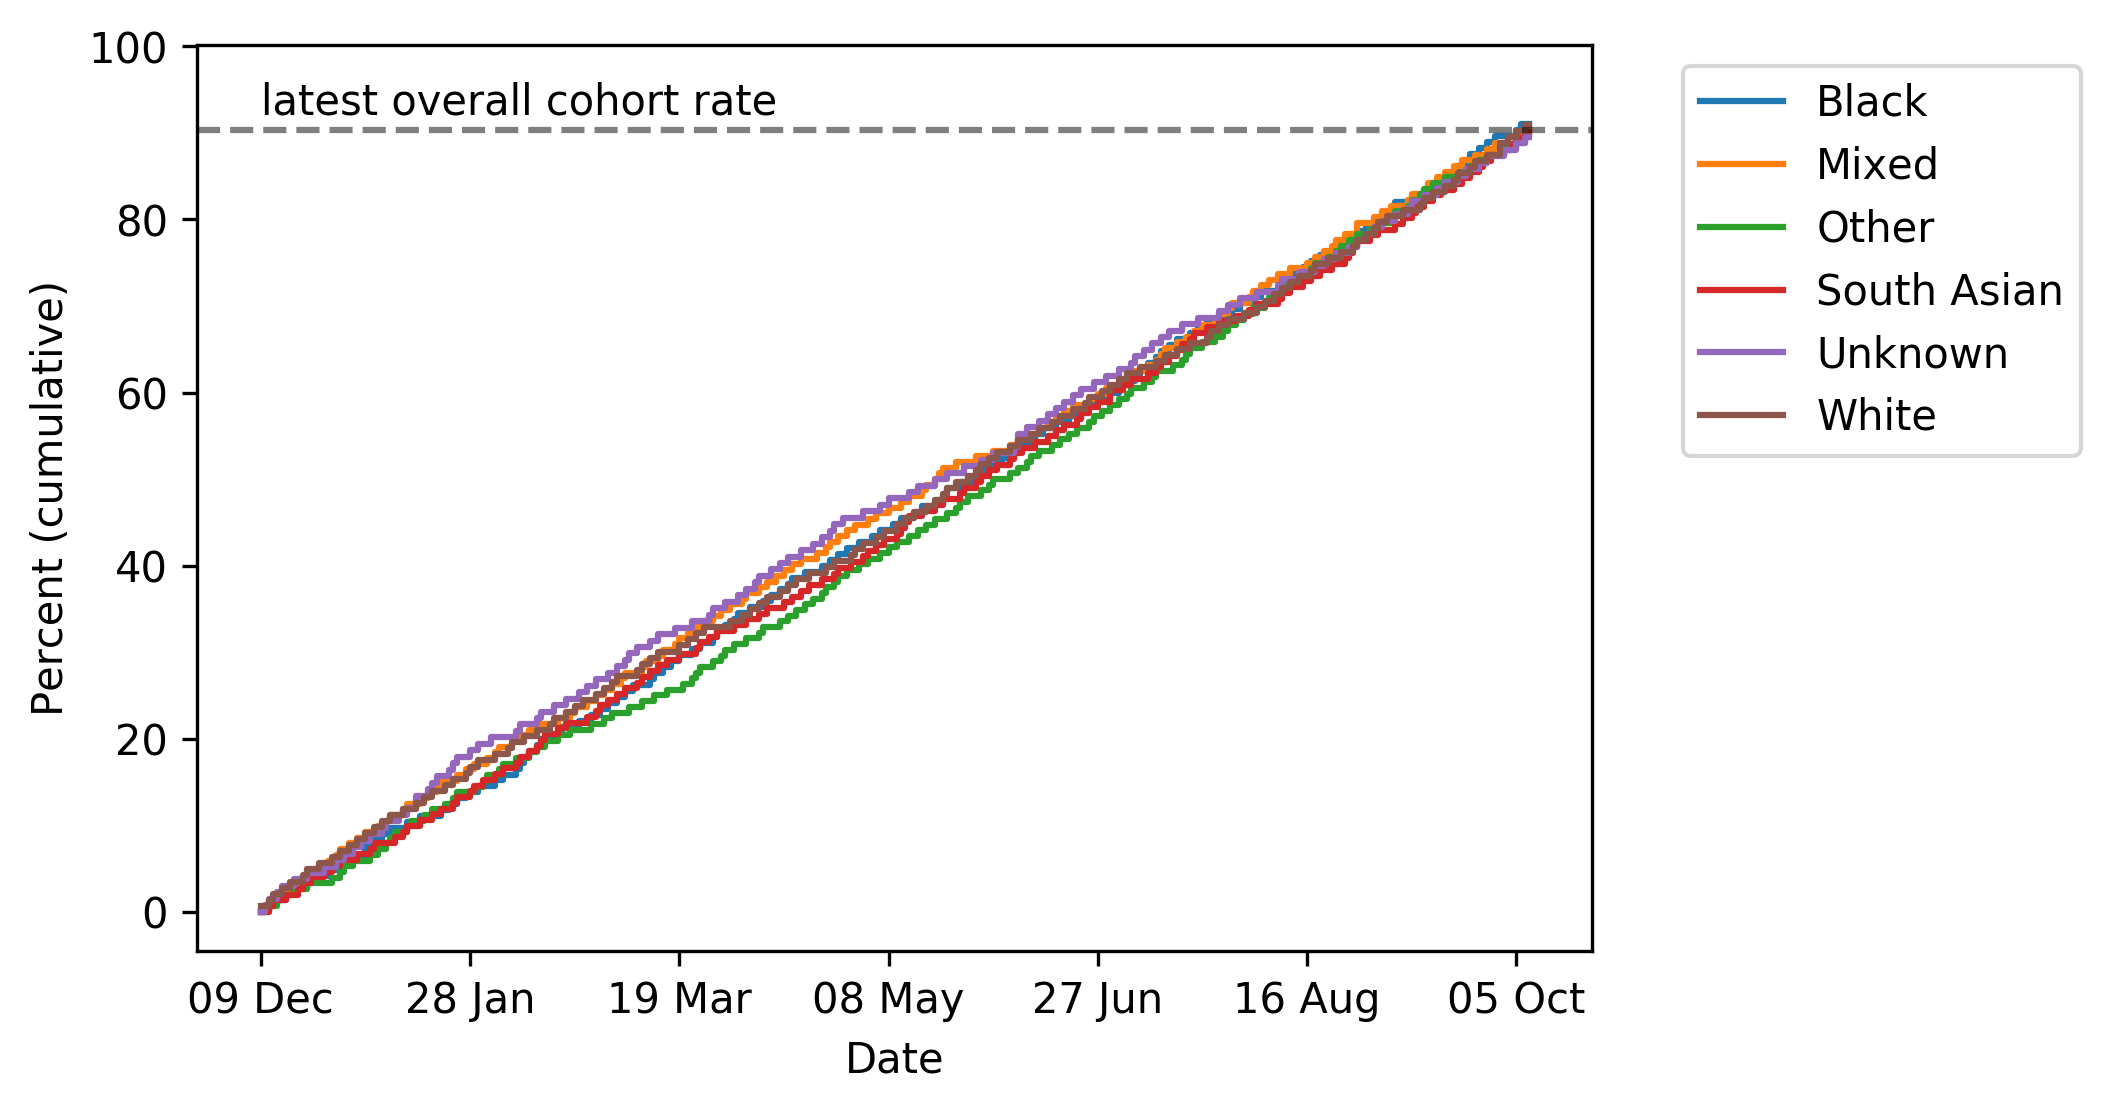

### COVID vaccinations among 40-49 population
 ### by Index of Multiple Deprivation (quintiles)

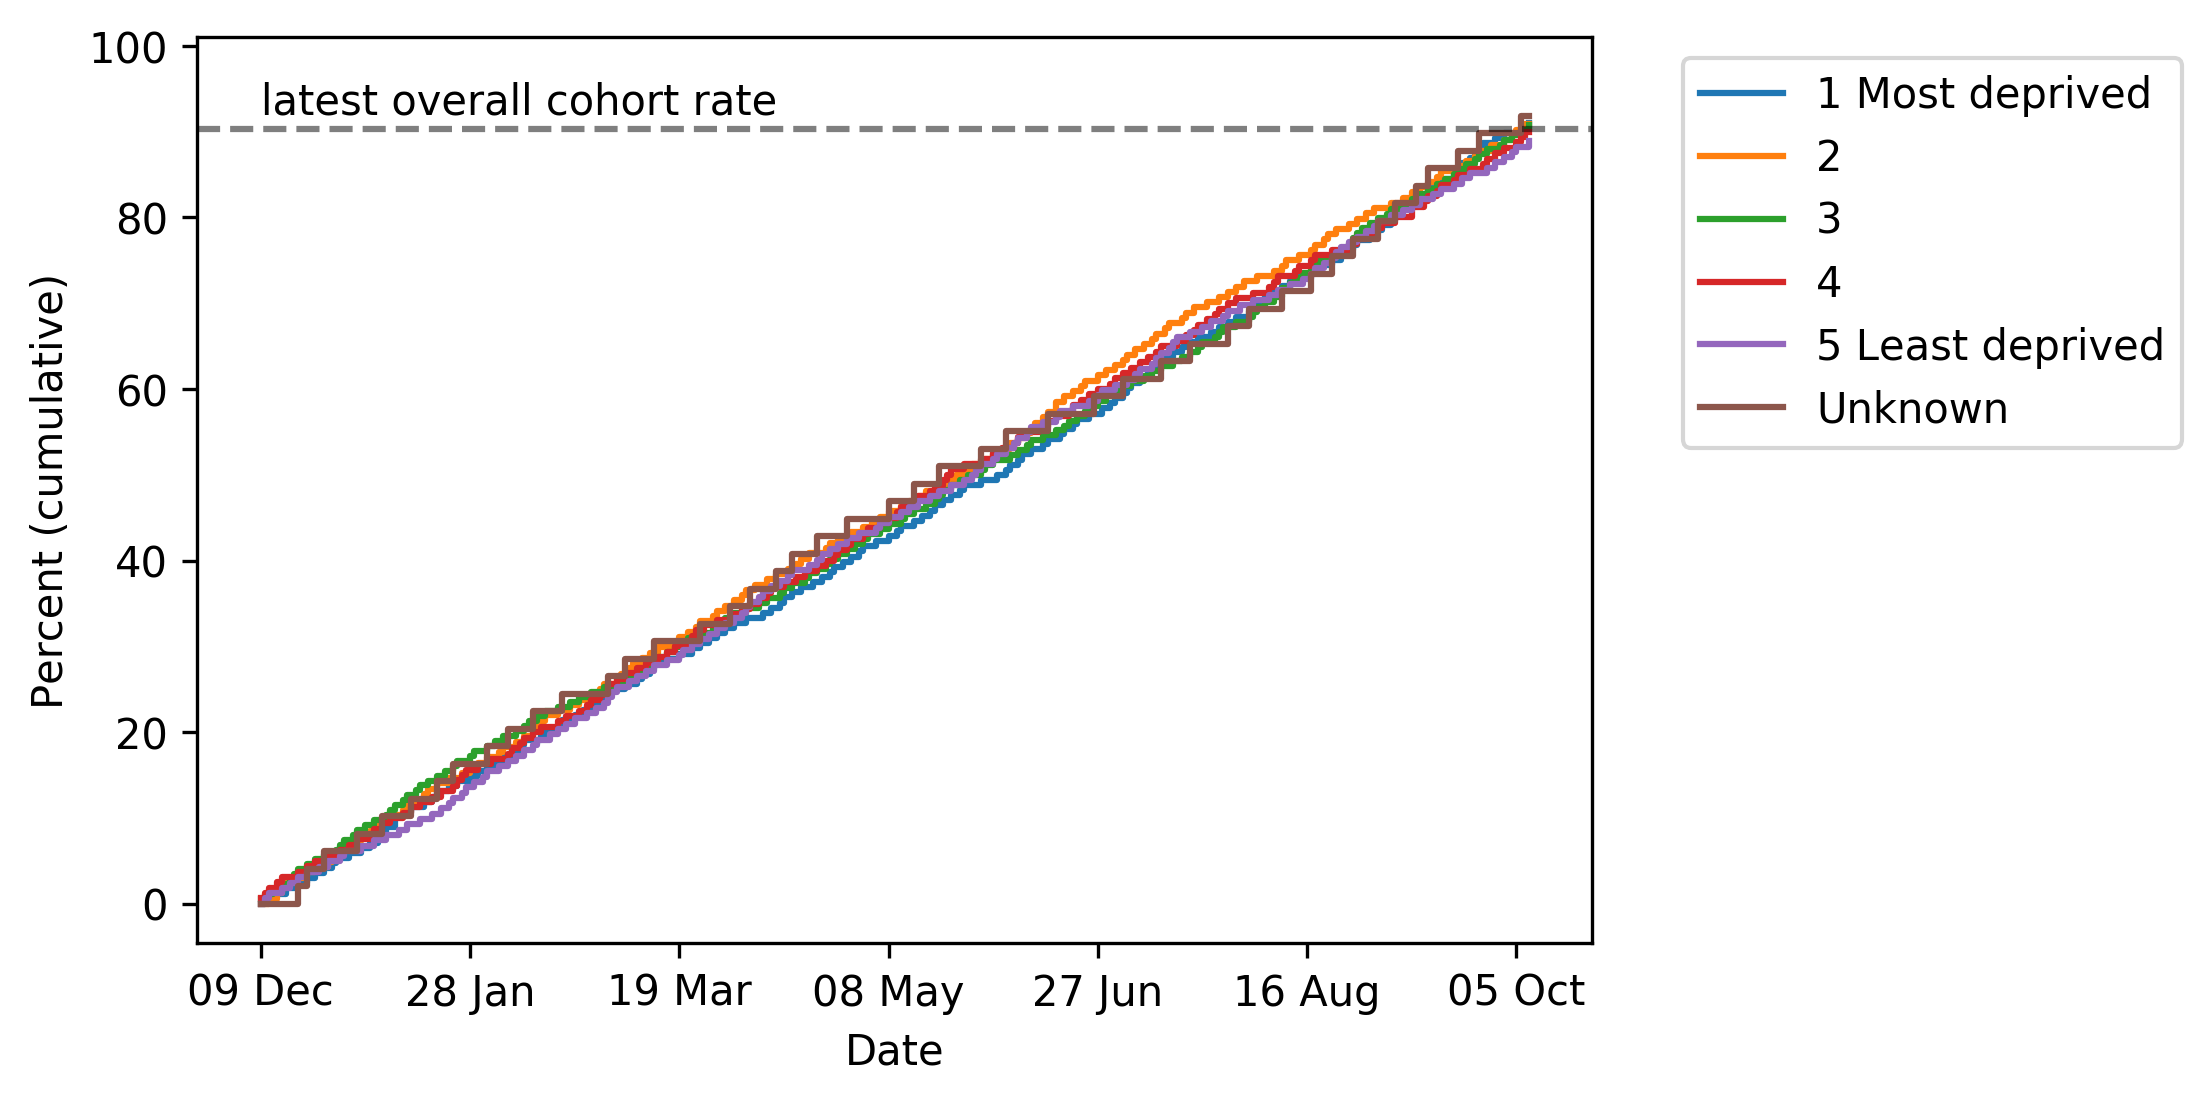

In [11]:
display(Markdown("## 40-49 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="40-49", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />
  - <a href=#Cumulative-vaccination-figures-among-80+-population>80+</a>  population
  - <a href=#Cumulative-vaccination-figures-among-70-79-population>70-79</a>  population
  - <a href=#Cumulative-vaccination-figures-among-care-home-population>care home (65+)</a> population
  - <a href=#Cumulative-vaccination-figures-among-shielding-(aged-16-69)-population>shielding (aged 16-69)</a>  population
  - <a href=#Cumulative-vaccination-figures-among-65-69-population>65-69</a>  population
  - <a href=#Cumulative-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population>LD (aged 16-64)</a> populations.
  - <a href=#Cumulative-vaccination-figures-among-60-64-population>60-64</a>  population
  - <a href=#Cumulative-vaccination-figures-among-55-59-population>55-59</a>  population
  - <a href=#Cumulative-vaccination-figures-among-50-54-population>50-54</a>  population
  - <a href=#Cumulative-vaccination-figures-among-40-49-population>40-49</a>  population
  - <a href=#Cumulative-vaccination-figures-among-18-39-population>18-39</a>  population
  - <a href=#Cumulative-vaccination-figures-among-16-17-population>16-17</a>  population
<br>

In [12]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="Cumulative vaccination figures",
                            files_to_exclude=[])
    
for filename in tablelist:
    df, title = import_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)
    show_table(df, title, latest_date_fmt, show_carehomes=True)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1939   
Sex                                       F                                                         938   
                                          M                                                        1001   
Age band                                  0                                                          14   
                                          0-15                                                      126   
                                          16-17                                                     119   
                                          18-29                                                     119   
                                          30-34                                                     119   
                                          35-39                                                     133   
                                          40-44                                                     140   
                                          45-49                                                     133   
                                          50-54                                                     112   
                                          55-59                                                     140   
                                          60-64                                                     119   
                                          65-69                                                     147   
                                          70-74                                                     133   
                                          75-79                                                     147   
                                          80-84                                                     119   
                                          85-89                                                     112   
                                          90+                                                        21   
Ethnicity (broad categories)              Black                                                     329   
                                          Mixed                                                     322   
                                          Other                                                     336   
                                          South Asian                                               329   
                                          Unknown                                                   315   
                                          White                                                     308   
ethnicity 16 groups                        African                                                  119   
                                           Bangladeshi or British Bangladeshi                        91   
                                           Caribbean                                                112   
                                           Chinese                                                  105   
                                           Other                                                    105   
                                           Other Asian                                              105   
                                          British or Mixed British                                  105   
                                          Indian or British Indian                                   98   
                                          Irish                                                      98   
                                          Other Black                                               105   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  3101   
Sex                                       F                                                        1610   
                                          M                                                        1491   
Age band                                  0                                                          42   
                                          0-15                                                      203   
                                          16-17                                                     189   
                                          18-29                                                     224   
                                          30-34                                                     203   
                                          35-39                                                     189   
                                          40-44                                                     203   
                                          45-49                                                     189   
                                          50-54                                                     189   
                                          55-59                                                     217   
                                          60-64                                                     196   
                                          65-69                                                     203   
                                          70-74                                                     224   
                                          75-79                                                     189   
                                          80-84                                                     196   
                                          85-89                                                     210   
                                          90+                                                        35   
Ethnicity (broad categories)              Black                                                     518   
                                          Mixed                                                     525   
                                          Other                                                     532   
                                          South Asian                                               546   
                                          Unknown                                                   469   
                                          White                                                     511   
ethnicity 16 groups                        African                                                  161   
                                           Bangladeshi or British Bangladeshi                       161   
                                           Caribbean                                                161   
                                           Chinese                                                  154   
                                           Other                                                    168   
                                           Other Asian                                              161   
                                          British or Mixed British                                  175   
                                          Indian or British Indian                                  161   
                                          Irish                                                     161   
                                          Other Black                                               161   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                     Group                                   
overall                      overall                          1190   
Sex                          F                                 630   
                             M                                 553   
Age band                     0                                  14   
                             0-15                               91   
                             16-17                              63   
                             18-29                              77   
                             30-34                              91   
                             35-39                              77   
                             40-44                              84   
                             45-49                              77   
                             50-54                              91   
                             55-59                              77   
                             60-64                              63   
                             65-69                              84   
                             70-74                              70   
                             75-79                              77   
                             80-84                              70   
                             85-89                              77   
                             90+                                14   
Ethnicity (broad categories) Black                             182   
                             Mixed                             196   
                             Other                             203   
                             South Asian                       189   
                             Unknown                           196   
                             White                             217   
Dementia                     no                               1183   
                             yes                                 7   

                                          Vaccinated at 08 Oct (%)  \
Category                     Group                                   
overall                      overall                          88.5   
Sex                          F                                88.2   
                             M                                87.8   
Age band                     0                               100.0   
                             0-15                             92.9   
                             16-17                            90.0   
                             18-29                            84.6   
                             30-34                            92.9   
                             35-39                            91.7   
                             40-44                            92.3   
                             45-49                            84.6   
                             50-54                            86.7   
                             55-59                            91.7   
                             60-64                            90.0   
                             65-69                            85.7   
                             70-74                            83.3   
                             75-79                            91.7   
                             80-84                            83.3   
                             85-89                            91.7   
                             90+                             100.0   
Ethnicity (broad categories) Black                            86.7   
                             Mixed                            90.3   
                             Other                            82.9   
                             South Asian                      87.1   
                             Unknown                          90.3   
                             White                 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                        
overall                                   overall                                392   
newly shielded since feb 15               no                                     392   
                                          yes                                      0   
Sex                                       F                                      203   
                                          M                                      196   
Age band                                  16-29                                   49   
                                          30-39                                   35   
                                          40-49                                   56   
                                          50-59                                   56   
                                          60-69                                   56   
                                          70-79                                   91   
                                          80+                                     49   
Ethnicity (broad categories)              Black                                   63   
                                          Mixed                                   56   
                                          Other                                   56   
                                          South Asian                             63   
                                          Unknown                                 56   
                                          White                                   91   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         56   
                                          2                                       70   
                                          3                                       91   
                                          4                                       84   
                                          5 Least deprived                        77   
                                          Unknown                                 21   
Learning disability                       no                                     385   
                                          yes                                     14   

                                                            Vaccinated at 08 Oct (%)  \
Category                                  Group                                        
overall                                   overall                               91.8   
newly shielded since feb 15               no                                    91.8   
                                          yes                                    0.0   
Sex                                       F                                     93.5   
                                          M                                     93.3   
Age band                                  16-29                                100.0   
                                          30-39                                 83.3   
                                          40-49                                 88.9   
                                          50-59                                100.0   
                                          60-69                                 88.9   
                                          70-79                                 92.9   
                                          80+                                  100.0   
Ethnicity (broad categories)              Black                                 90.0   
                                          Mixed                                 88.9   
                                          Other                                100.0   
                                          South Asian                           90.0   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1939   
Sex                                       F                                                        1008   
                                          M                                                         924   
Ethnicity (broad categories)              Black                                                     322   
                                          Mixed                                                     364   
                                          Other                                                     315   
                                          South Asian                                               308   
                                          Unknown                                                   280   
                                          White                                                     343   
ethnicity 16 groups                        African                                                   84   
                                           Bangladeshi or British Bangladeshi                       112   
                                           Caribbean                                                 91   
                                           Chinese                                                  112   
                                           Other                                                    126   
                                           Other Asian                                              112   
                                          British or Mixed British                                   98   
                                          Indian or British Indian                                  105   
                                          Irish                                                      84   
                                          Other Black                                               119   
                                          Other White                                                98   
                                          Other mixed                                               112   
                                          Pakistani or British Pakistani                            105   
                                          Unknown                                                   301   
                                          White + Asian                                              91   
                                          White + Black African                                     105   
                                          White + Black Caribbean                                    91   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           371   
                                          2                                                         371   
                                          3                                                         371   
                                          4                                                         357   
                                          5 Least deprived                                          378   
                                          Unknown                                                    91   
BMI                                       30+                                                       581   
                                          under 30                                                 1358   
Housebound                                no                                                       1925   
                                          yes                                                        14   
Chronic cardi

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                     Group                                   
overall                      overall                           735   
Sex                          F                                 357   
                             M                                 378   
Age band                     0                                  14   
                             0-15                               42   
                             16-17                              42   
                             18-29                              42   
                             30-34                              49   
                             35-39                              56   
                             40-44                              63   
                             45-49                              49   
                             50-54                              28   
                             55-59                              56   
                             60-64                              49   
                             65-69                              49   
                             70-74                              49   
                             75-79                              49   
                             80-84                              35   
                             85-89                              49   
                             90+                                 7   
Ethnicity (broad categories) Black                             133   
                             Mixed                             105   
                             Other                             112   
                             South Asian                       133   
                             Unknown                           119   
                             White                             133   

                                          Vaccinated at 08 Oct (%)  \
Category                     Group                                   
overall                      overall                          90.5   
Sex                          F                                89.5   
                             M                                91.5   
Age band                     0                               100.0   
                             0-15                             85.7   
                             16-17                            85.7   
                             18-29                           100.0   
                             30-34                            87.5   
                             35-39                            88.9   
                             40-44                           100.0   
                             45-49                            87.5   
                             50-54                            80.0   
                             55-59                            88.9   
                             60-64                            87.5   
                             65-69                           100.0   
                             70-74                            87.5   
                             75-79                            87.5   
                             80-84                            83.3   
                             85-89                            87.5   
                             90+                             100.0   
Ethnicity (broad categories) Black                            86.4   
                             Mixed                            88.2   
                             Other                            88.9   
                             South Asian                      90.5   
                             Unknown                          94.4   
                             White                            90.5   

                                          Total eligible  \
Category                     Group                         


**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

## 
 ## Cumulative vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2457   
Sex                                       F                                                        1253   
                                          M                                                        1204   
Ethnicity (broad categories)              Black                                                     399   
                                          Mixed                                                     413   
                                          Other                                                     434   
                                          South Asian                                               427   
                                          Unknown                                                   385   
                                          White                                                     399   
ethnicity 16 groups                        African                                                  126   
                                           Bangladeshi or British Bangladeshi                       140   
                                           Caribbean                                                133   
                                           Chinese                                                  126   
                                           Other                                                    154   
                                           Other Asian                                              119   
                                          British or Mixed British                                  154   
                                          Indian or British Indian                                  119   
                                          Irish                                                     140   
                                          Other Black                                               126   
                                          Other White                                               119   
                                          Other mixed                                               105   
                                          Pakistani or British Pakistani                            140   
                                          Unknown                                                   371   
                                          White + Asian                                             133   
                                          White + Black African                                     133   
                                          White + Black Caribbean                                   126   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           462   
                                          2                                                         497   
                                          3                                                         490   
                                          4                                                         462   
                                          5 Least deprived                                          420   
                                          Unknown                                                   126   
BMI                                       30+                                                       763   
                                          under 30                                                 1694   
Chronic cardiac disease                   no                                                       2443   
                                          yes                                                        21   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2933   
Sex                                       F                                                        1470   
                                          M                                                        1456   
Ethnicity (broad categories)              Black                                                     504   
                                          Mixed                                                     497   
                                          Other                                                     511   
                                          South Asian                                               504   
                                          Unknown                                                   406   
                                          White                                                     518   
ethnicity 16 groups                        African                                                  140   
                                           Bangladeshi or British Bangladeshi                       154   
                                           Caribbean                                                161   
                                           Chinese                                                  147   
                                           Other                                                    154   
                                           Other Asian                                              175   
                                          British or Mixed British                                  147   
                                          Indian or British Indian                                  175   
                                          Irish                                                     161   
                                          Other Black                                               168   
                                          Other White                                               161   
                                          Other mixed                                               147   
                                          Pakistani or British Pakistani                            140   
                                          Unknown                                                   448   
                                          White + Asian                                             168   
                                          White + Black African                                     154   
                                          White + Black Caribbean                                   140   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           581   
                                          2                                                         581   
                                          3                                                         532   
                                          4                                                         511   
                                          5 Least deprived                                          560   
                                          Unknown                                                   161   
BMI                                       30+                                                       882   
                                          under 30                                                 2051   
Chronic cardiac disease                   no                                                       2905   
                                          yes                                                        21   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2996   
Sex                                       F                                                        1526   
                                          M                                                        1470   
Ethnicity (broad categories)              Black                                                     490   
                                          Mixed                                                     504   
                                          Other                                                     483   
                                          South Asian                                               504   
                                          Unknown                                                   490   
                                          White                                                     525   
ethnicity 16 groups                        African                                                  140   
                                           Bangladeshi or British Bangladeshi                       161   
                                           Caribbean                                                168   
                                           Chinese                                                  154   
                                           Other                                                    161   
                                           Other Asian                                              147   
                                          British or Mixed British                                  175   
                                          Indian or British Indian                                  140   
                                          Irish                                                     154   
                                          Other Black                                               161   
                                          Other White                                               154   
                                          Other mixed                                               161   
                                          Pakistani or British Pakistani                            161   
                                          Unknown                                                   448   
                                          White + Asian                                             189   
                                          White + Black African                                     168   
                                          White + Black Caribbean                                   154   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           553   
                                          2                                                         539   
                                          3                                                         602   
                                          4                                                         581   
                                          5 Least deprived                                          567   
                                          Unknown                                                   154   
BMI                                       30+                                                       924   
                                          under 30                                                 2072   
Chronic cardiac disease                   no                                                       2961   
                                          yes                                                        35   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 40-49 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  5544   
Sex                                       F                                                        2814   
                                          M                                                        2730   
Ethnicity (broad categories)              Black                                                     924   
                                          Mixed                                                     966   
                                          Other                                                     959   
                                          South Asian                                               952   
                                          Unknown                                                   840   
                                          White                                                     910   
ethnicity 16 groups                        African                                                  287   
                                           Bangladeshi or British Bangladeshi                       280   
                                           Caribbean                                                294   
                                           Chinese                                                  287   
                                           Other                                                    287   
                                           Other Asian                                              308   
                                          British or Mixed British                                  287   
                                          Indian or British Indian                                  294   
                                          Irish                                                     315   
                                          Other Black                                               315   
                                          Other White                                               287   
                                          Other mixed                                               287   
                                          Pakistani or British Pakistani                            280   
                                          Unknown                                                   833   
                                          White + Asian                                             315   
                                          White + Black African                                     294   
                                          White + Black Caribbean                                   301   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          1071   
                                          2                                                        1043   
                                          3                                                        1106   
                                          4                                                        1008   
                                          5 Least deprived                                         1008   
                                          Unknown                                                   315   

                                                                               Vaccinated at 08 Oct (%)  \
Category                                  Group                                                           
overall                                   overall                                                  90.3   
Sex                                       F                                                        90.5   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 30-39 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  5768   
Sex                                       F                                                        2926   
                                          M                                                        2842   
Ethnicity (broad categories)              Black                                                     980   
                                          Mixed                                                     994   
                                          Other                                                     994   
                                          South Asian                                               980   
                                          Unknown                                                   826   
                                          White                                                     994   
ethnicity 16 groups                        African                                                  322   
                                           Bangladeshi or British Bangladeshi                       280   
                                           Caribbean                                                336   
                                           Chinese                                                  315   
                                           Other                                                    287   
                                           Other Asian                                              301   
                                          British or Mixed British                                  322   
                                          Indian or British Indian                                  329   
                                          Irish                                                     322   
                                          Other Black                                               294   
                                          Other White                                               329   
                                          Other mixed                                               287   
                                          Pakistani or British Pakistani                            308   
                                          Unknown                                                   819   
                                          White + Asian                                             301   
                                          White + Black African                                     301   
                                          White + Black Caribbean                                   315   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          1085   
                                          2                                                        1141   
                                          3                                                        1043   
                                          4                                                        1120   
                                          5 Least deprived                                         1078   
                                          Unknown                                                   294   

                                                                               Vaccinated at 08 Oct (%)  \
Category                                  Group                                                           
overall                                   overall                                                  90.3   
Sex                                       F                                                        89.5   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 18-29 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  6657   
Sex                                       F                                                        3339   
                                          M                                                        3318   
Ethnicity (broad categories)              Black                                                    1057   
                                          Mixed                                                    1155   
                                          Other                                                    1134   
                                          South Asian                                              1148   
                                          Unknown                                                   994   
                                          White                                                    1169   
ethnicity 16 groups                        African                                                  357   
                                           Bangladeshi or British Bangladeshi                       343   
                                           Caribbean                                                364   
                                           Chinese                                                  350   
                                           Other                                                    322   
                                           Other Asian                                              357   
                                          British or Mixed British                                  336   
                                          Indian or British Indian                                  378   
                                          Irish                                                     378   
                                          Other Black                                               350   
                                          Other White                                               357   
                                          Other mixed                                               364   
                                          Pakistani or British Pakistani                            378   
                                          Unknown                                                   966   
                                          White + Asian                                             343   
                                          White + Black African                                     343   
                                          White + Black Caribbean                                   364   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          1295   
                                          2                                                        1246   
                                          3                                                        1281   
                                          4                                                        1274   
                                          5 Least deprived                                         1239   
                                          Unknown                                                   322   

                                                                               Vaccinated at 08 Oct (%)  \
Category                                  Group                                                           
overall                                   overall                                                  90.1   
Sex                                       F                                                        89.5   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 16-17 population 
 Please refer to footnotes below table for information.

Vaccinated at 08 Oct (n)  \
Category                                  Group                                        
overall                                   overall                               9352   
Sex                                       F                                     4767   
                                          M                                     4578   
Ethnicity (broad categories)              Black                                 1575   
                                          Mixed                                 1589   
                                          Other                                 1659   
                                          South Asian                           1582   
                                          Unknown                               1393   
                                          White                                 1554   
Index of Multiple Deprivation (quintiles) 1 Most deprived                       1792   
                                          2                                     1799   
                                          3                                     1799   
                                          4                                     1764   
                                          5 Least deprived                      1757   
                                          Unknown                                434   

                                                            Vaccinated at 08 Oct (%)  \
Category                                  Group                                        
overall                                   overall                               89.6   
Sex                                       F                                     89.6   
                                          M                                     89.5   
Ethnicity (broad categories)              Black                                 90.7   
                                          Mixed                                 89.7   
                                          Other                                 89.1   
                                          South Asian                           89.3   
                                          Unknown                               89.2   
                                          White                                 89.5   
Index of Multiple Deprivation (quintiles) 1 Most deprived                       89.5   
                                          2                                     88.9   
                                          3                                     89.9   
                                          4                                     89.7   
                                          5 Least deprived                      89.6   
                                          Unknown                               91.2   

                                                            Total eligible  \
Category                                  Group                              
overall                                   overall                    10437   
Sex                                       F                           5320   
                                          M                           5117   
Ethnicity (broad categories)              Black                       1736   
                                          Mixed                       1771   
                                          Other                       1862   
                                          South Asian                 1771   
                                          Unknown                     1561   
                                          White                       1736   
Index of Multiple Deprivation (quintiles) 1 Most deprived             2002   
                                          2                           2023   
                                          3         

**Footnotes:**
- Patient counts rounded to the nearest 7

### 
## Appendix 
### Ethnicity coverage for each eligible group <a name='ethnicity' />

In [13]:
from create_report import get_savepath
savepath = get_savepath()
tab = pd.read_csv(os.path.join(savepath["text"], "ethnicity_coverage.csv")).set_index("group")
tab.index = tab.index.str.replace("vaccinated 18-29", "18-29")
display(Markdown("- Ethnicity information is primarily retrieved from GP records. \
                 \n- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present. \
                 \n - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity \
                 \n recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).\
                 \n- Patient counts are rounded to the nearest 7"))

tab[["total population (n)","ethnicity coverage (%)"]]

- Ethnicity information is primarily retrieved from GP records.                  
- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present.                  
 - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity                  
 recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).                 
- Patient counts are rounded to the nearest 7

total population (n)  ethnicity coverage (%)
group                                                               
80+                                     2149                    84.0
70-79                                   3465                    85.1
care home                               1344                    83.9
shielding (aged 16-69)                   427                    85.2
65-69                                   2142                    85.3
LD (aged 16-64)                          812                    84.5
60-64                                   2730                    84.6
55-59                                   3248                    86.0
50-54                                   3325                    84.0
40-49                                   6139                    84.8
30-39                                   6391                    86.0
18-29                                   7385                    84.8
16-17                                  10437                    85.0